<a id='top'></a>
[Jump to Data Exploration](#section2)  
[Jump to 3-step transformation](#3steps)  
[Jump to Baseline Data](#baselinedata)  
[Jump to Predictions](#predictions)

In [1]:
import os
import re
import pandas as pd
import numpy as np
import urllib.request
import shutil
import xml.etree.ElementTree as ET
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline
pd.options.mode.chained_assignment = None

To begin, I will read in the most recent, historical year of data available from Capital Bikeshare. This ranges from 2015 Q3 to 2016 Q3. Each file is stored as a separate dataframe so that I can explore each one individually before combining them into one dataframe.

In [2]:
df_2015Q3 = pd.read_csv('data/2015-Q3-cabi-trip-history-data.csv')
df_2015Q4 = pd.read_csv('data/2015-Q4-Trips-History-Data.csv')
df_2016Q1 = pd.read_csv('data/2016-Q1-Trips-History-Data.csv')
df_2016Q2 = pd.read_csv('data/2016-Q2-Trips-History-Data.csv')
df_2016Q3_1 = pd.read_csv('data/2016-Q3-Trips-History-Data-1.csv')
df_2016Q3_2 = pd.read_csv('data/2016-Q3-Trips-History-Data-2.csv')

Below I explore each dataframe so that I can determine whether or not they will combine easily.

In [3]:
df_2015Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056366 entries, 0 to 1056365
Data columns (total 9 columns):
Duration (ms)           1056366 non-null int64
Start date              1056366 non-null object
End date                1056366 non-null object
Start station number    1056366 non-null int64
Start station           1056366 non-null object
End station number      1056366 non-null int64
End station             1056366 non-null object
Bike #                  1056366 non-null object
Member type             1056366 non-null object
dtypes: int64(3), object(6)
memory usage: 72.5+ MB


In [4]:
df_2015Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706004 entries, 0 to 706003
Data columns (total 9 columns):
Duration (ms)           706004 non-null int64
Start date              706004 non-null object
End date                706004 non-null object
Start station number    706004 non-null int64
Start station           706004 non-null object
End station number      706004 non-null int64
End station             706004 non-null object
Bike #                  706004 non-null object
Member type             706004 non-null object
dtypes: int64(3), object(6)
memory usage: 48.5+ MB


In [5]:
df_2016Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552399 entries, 0 to 552398
Data columns (total 9 columns):
Duration (ms)           552399 non-null int64
Start date              552399 non-null object
End date                552399 non-null object
Start station number    552399 non-null int64
Start station           552399 non-null object
End station number      552399 non-null int64
End station             552399 non-null object
Bike number             552399 non-null object
Member Type             552399 non-null object
dtypes: int64(3), object(6)
memory usage: 37.9+ MB


In [6]:
df_2016Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942332 entries, 0 to 942331
Data columns (total 9 columns):
Duration (ms)           942332 non-null int64
Start date              942332 non-null object
End date                942332 non-null object
Start station number    942332 non-null int64
Start station           942332 non-null object
End station number      942332 non-null int64
End station             942332 non-null object
Bike number             942332 non-null object
Account type            942332 non-null object
dtypes: int64(3), object(6)
memory usage: 64.7+ MB


In [7]:
df_2016Q3_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723741 entries, 0 to 723740
Data columns (total 9 columns):
Duration (ms)           723741 non-null int64
Start date              723741 non-null object
End date                723741 non-null object
Start station number    723741 non-null int64
Start station           723741 non-null object
End station number      723741 non-null int64
End station             723741 non-null object
Bike number             723741 non-null object
Member Type             723741 non-null object
dtypes: int64(3), object(6)
memory usage: 49.7+ MB


In [8]:
df_2016Q3_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344246 entries, 0 to 344245
Data columns (total 9 columns):
Duration (ms)           344246 non-null int64
Start date              344246 non-null object
End date                344246 non-null object
Start station number    344246 non-null int64
Start station           344246 non-null object
End station number      344246 non-null int64
End station             344246 non-null object
Bike number             344246 non-null object
Member Type             344246 non-null object
dtypes: int64(3), object(6)
memory usage: 23.6+ MB


Since all dataframes seem to have similar information and data types, and have been created under the same standards through Capital Bikeshare, I will go ahead and standardize each dataframe's feature names. I will then combine all dataframes into one.

In [9]:
new_feature_names = ['Duration', 'Start_Date', 'End_Date', 'Start_Station_Number', 
                     'Start_Station', 'End_Station_Number', 'End_Station', 'Bike_Number', 'Member_Type']

df_2015Q3.columns = new_feature_names
df_2015Q4.columns = new_feature_names
df_2016Q1.columns = new_feature_names
df_2016Q2.columns = new_feature_names
df_2016Q3_1.columns = new_feature_names
df_2016Q3_2.columns = new_feature_names

bike_data = df_2015Q3.append([df_2015Q4, df_2016Q1, df_2016Q2, df_2016Q3_1, df_2016Q3_2])
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4325088 entries, 0 to 344245
Data columns (total 9 columns):
Duration                int64
Start_Date              object
End_Date                object
Start_Station_Number    int64
Start_Station           object
End_Station_Number      int64
End_Station             object
Bike_Number             object
Member_Type             object
dtypes: int64(3), object(6)
memory usage: 330.0+ MB


In [10]:
# Explore the first several rows of the new dataframe
bike_data.head()

Duration     Start_Date       End_Date  Start_Station_Number  \
0    257866  7/1/2015 0:00  7/1/2015 0:04                 31116   
1   2683934  7/1/2015 0:00  7/1/2015 0:45                 31247   
2   2349547  7/1/2015 0:02  7/1/2015 0:41                 31247   
3    826571  7/1/2015 0:02  7/1/2015 0:16                 31229   
4    123046  7/1/2015 0:04  7/1/2015 0:06                 31610   

                                  Start_Station  End_Station_Number  \
0                California St & Florida Ave NW               31117   
1                     Jefferson Dr & 14th St SW               31247   
2                     Jefferson Dr & 14th St SW               31247   
3                   New Hampshire Ave & T St NW               31602   
4  Eastern Market / 7th & North Carolina Ave SE               31269   

                    End_Station Bike_Number Member_Type  
0          15th & Euclid St  NW      W21516  Registered  
1     Jefferson Dr & 14th St SW      W00476      Casual  
2     Jefferson Dr & 14th St SW      W20384      Casual  
3       Park Rd & Holmead Pl NW      W00972  Registered  
4  3rd St & Pennsylvania Ave SE      W21565  Registered

Next, I will add coordinate data that relates to each start and end station so that I can then calculate a distance feature. The coordinate data comes from Capital Bikeshare's XML live feed, which I access and then parse.

In [54]:
# The code in this cell is from the page [https://kwkelly.com/blog/analyzing-capital-bikeshare-data-with-python-and-pandas/]

# Access the XML feed and download to a file
def get_station_xml():
    url = "https://www.capitalbikeshare.com/data/stations/bikeStations.xml"
    download_dir = 'xml_data'
    if not os.path.exists(download_dir):
        os.mkdir(download_dir)
    file_name = os.path.join(download_dir, 'bike_stations.xml')
    with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)
get_station_xml()

# Parse the XML file and return a dataframe object
def xml_to_pandas(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    l = []
    for station in root:
        d = {}
        for attrib in station:
            d[str(attrib.tag)] = str(attrib.text)
        l.append(d)

    df = pd.DataFrame.from_dict(l)
    return df 
bike_stations = xml_to_pandas('xml_data/bike_stations.xml')

 
# Wrangle the resulting dataframe object and display
bike_stations['terminalName'] = bike_stations['terminalName'].astype(int)
bike_stations['lat'] = bike_stations['lat'].astype(float)
bike_stations['long'] = bike_stations['long'].astype(float)
station_locations = bike_stations[['terminalName']]
station_locations['location'] = list(zip(bike_stations['lat'], bike_stations['long']))
station_locations['Station_Capacity'] = (bike_stations['nbBikes'].astype(int) 
                                         + bike_stations['nbEmptyDocks'].astype(int))
station_locations.head()

terminalName                 location  Station_Capacity
0         31000   (38.858971, -77.05323)                15
1         31001    (38.85725, -77.05332)                11
2         31002  (38.856425, -77.049232)                17
3         31003   (38.86017, -77.049593)                11
4         31004   (38.857866, -77.05949)                11

In [12]:
# Combine original dataframe with new station lat/long data using a left join on End Station and then Start Station
station_locations.columns = ['End_Station_Number', 'End_Location', 'End_Station_Capacity']
bike_data = pd.merge(bike_data, station_locations, how='left', on='End_Station_Number')

station_locations.columns = ['Start_Station_Number', 'Start_Location', 'Start_Station_Capacity']
bike_data = pd.merge(bike_data, station_locations, how='left', on='Start_Station_Number')

# Display the first several rows of the new dataframe
bike_data.head()

Duration     Start_Date       End_Date  Start_Station_Number  \
0    257866  7/1/2015 0:00  7/1/2015 0:04                 31116   
1   2683934  7/1/2015 0:00  7/1/2015 0:45                 31247   
2   2349547  7/1/2015 0:02  7/1/2015 0:41                 31247   
3    826571  7/1/2015 0:02  7/1/2015 0:16                 31229   
4    123046  7/1/2015 0:04  7/1/2015 0:06                 31610   

                                  Start_Station  End_Station_Number  \
0                California St & Florida Ave NW               31117   
1                     Jefferson Dr & 14th St SW               31247   
2                     Jefferson Dr & 14th St SW               31247   
3                   New Hampshire Ave & T St NW               31602   
4  Eastern Market / 7th & North Carolina Ave SE               31269   

                    End_Station Bike_Number Member_Type  \
0          15th & Euclid St  NW      W21516  Registered   
1     Jefferson Dr & 14th St SW      W00476      Casual   
2     Jefferson Dr & 14th St SW      W20384      Casual   
3       Park Rd & Holmead Pl NW      W00972  Registered   
4  3rd St & Pennsylvania Ave SE      W21565  Registered   

              End_Location  End_Station_Capacity           Start_Location  \
0     (38.92333, -77.0352)                  15.0   (38.917761, -77.04062)   
1  (38.888553, -77.032429)                  22.0  (38.888553, -77.032429)   
2  (38.888553, -77.032429)                  22.0  (38.888553, -77.032429)   
3      (38.9308, -77.0315)                  19.0    (38.91554, -77.03818)   
4  (38.887378, -77.001955)                  12.0  (38.886952, -76.996806)   

   Start_Station_Capacity  
0                    19.0  
1                    22.0  
2                    22.0  
3                    20.0  
4                    14.0

In [13]:
# Determine whether there are any missing values
print('Missing values:')
for feature in bike_data.columns:
    print(feature + ':', bike_data[feature].isnull().values.ravel().sum())

Missing values:
Duration: 0
Start_Date: 0
End_Date: 0
Start_Station_Number: 0
Start_Station: 0
End_Station_Number: 0
End_Station: 0
Bike_Number: 0
Member_Type: 0
End_Location: 76
End_Station_Capacity: 76
Start_Location: 87
Start_Station_Capacity: 87


Seeing as the newly formed features, Start_Location, End_Location, Start_Station_Capacity, and End_Station_Capacity contain missing values I need to determine which stations are missing coordinates, and why this might be the case.

In [14]:
# Print out unique station numbers to check which stations do not have associated locations or capacities  
start_subset_test = bike_data[bike_data['Start_Location'].isnull()]
print('Start Stations without locations:', start_subset_test['Start_Station_Number'].unique())
start_subset_test = bike_data[bike_data['Start_Station_Capacity'].isnull()]
print('Start Stations without capacities:', start_subset_test['Start_Station_Number'].unique())

end_subset_test = bike_data[bike_data['End_Location'].isnull()]
print('End Stations without locations:', end_subset_test['End_Station_Number'].unique())
end_subset_test = bike_data[bike_data['End_Station_Capacity'].isnull()]
print('End Stations without capacities:', end_subset_test['End_Station_Number'].unique())

Start Stations without locations: [31709]
Start Stations without capacities: [31709]
End Stations without locations: [31709]
End Stations without capacities: [31709]


It is now more clear that station 31709 is the only station that is missing coordinate and capacity data as found using the live XML feed. Doing some research has shown me that it is possible that this station is no longer in service because it is probably an old station that was phased out. I was able to find the coordinates of (38.884085, -76.957461) and capacity of 11 (https://gist.github.com/since1968/e51c0f3d95e67bf49f74). The live XML feed was not able to give me this data because it is a point in time feed whereas the data I am using is from 2015 Q3 - 2016 Q3. I will now add these values to the dataframe.

In [15]:
location_31709 = '(38.884085, -76.957461)'
capacity_31709 = 11
bike_data.loc[bike_data['Start_Station_Number'] == 31709, 'Start_Location'] = location_31709
bike_data.loc[bike_data['Start_Station_Number'] == 31709, 'Start_Station_Capacity'] = capacity_31709
bike_data.loc[bike_data['End_Station_Number'] == 31709, 'End_Location'] = location_31709
bike_data.loc[bike_data['End_Station_Number'] == 31709, 'End_Station_Capacity'] = capacity_31709

# Are the missing values gone?
print('Missing Start Station Location:', bike_data['Start_Location'].isnull().values.ravel().sum())
print('Missing Start Station Capacity:', bike_data['Start_Station_Capacity'].isnull().values.ravel().sum())
print('Missing End Station Location:', bike_data['End_Location'].isnull().values.ravel().sum())
print('Missing End Station Capacity:', bike_data['End_Station_Capacity'].isnull().values.ravel().sum())

Missing Start Station Location: 0
Missing Start Station Capacity: 0
Missing End Station Location: 0
Missing End Station Capacity: 0


In [16]:
# Determine how many different values each feature can take
print('Number of unique values:')
for feature in bike_data.columns:
    print(feature + ':', len(list(bike_data[feature].unique())))

Number of unique values:
Duration: 1828278
Start_Date: 521665
End_Date: 521874
Start_Station_Number: 407
Start_Station: 415
End_Station_Number: 407
End_Station: 415
Bike_Number: 4364
Member_Type: 2
End_Location: 407
End_Station_Capacity: 31
Start_Location: 407
Start_Station_Capacity: 31


As we can see above, some features have an appropriate number of values while others do not. Duration, Start_Date, End_Date, and Member_Type are as expected. Per Capital Bikeshare's website, there are over 3,700 bikes available at over 440 stations. Given this information, the number of unique Bike_Number's may be too high, but this could be a function of changing bike numbers over the course of the year. For this reason, and because it is a unique identifier that is not predictive, I may drop this variable later on. Lastly, it is odd that Start_Station_Number, Start_Location, End_Station_Number, and End_Location have 407 values while Start_Station and End_Station have 415 values. Since I would have expected these features to match, I will explore and clean further below.

In [17]:
# Split the original data into a dataframe that shows only the start station information
start_df = pd.DataFrame(bike_data['Start_Station'].value_counts())
start_df.reset_index(drop=False, inplace=True)
start_df.columns = ['Start_Station', 'Counts']
start_df = start_df.merge(bike_data[['Start_Location', 'Start_Station_Number', 'Start_Station']], how='left', on='Start_Station')
start_df.drop_duplicates(inplace=True)
start_df['Start_Location_Lat'] = start_df['Start_Location'].map(lambda x: str(x).split(', ')[0].lstrip('('))
start_df['Start_Location_Long'] = start_df['Start_Location'].map(lambda x: str(x).split(', ')[1].rstrip(')'))
start_df.drop('Start_Location', axis=1, inplace=True)
start_df = start_df.sort_values(by='Start_Station_Number')
start_df.reset_index(drop=True, inplace=True)

start_df.head()

Start_Station  Counts  Start_Station_Number  Start_Location_Lat  \
0       20th & Bell St    1371                 31000  38.858970999999997   
1  Eads St & 15th St S    1298                 31000  38.858970999999997   
2      18th & Eads St.    3370                 31001  38.857250000000001   
3    20th & Crystal Dr    7792                 31002  38.856425000000002   
4    15th & Crystal Dr    7359                 31003  38.860169999999997   

   Start_Location_Long  
0  -77.053229999999999  
1  -77.053229999999999  
2  -77.053319999999999  
3  -77.049232000000003  
4  -77.049593000000002

In [18]:
# Split the original data into a dataframe that shows only the end station information
end_df = pd.DataFrame(bike_data['End_Station'].value_counts())
end_df.reset_index(drop=False, inplace=True)
end_df.columns = ['End_Station', 'Counts']
end_df = end_df.merge(bike_data[['End_Location', 'End_Station_Number', 'End_Station']], how='left', on='End_Station')
end_df.drop_duplicates(inplace=True)
end_df['End_Location_Lat'] = end_df['End_Location'].map(lambda x: str(x).split(', ')[0].lstrip('('))
end_df['End_Location_Long'] = end_df['End_Location'].map(lambda x: str(x).split(', ')[1].rstrip(')'))
end_df.drop('End_Location', axis=1, inplace=True)
end_df = end_df.sort_values(by='End_Station_Number')
end_df.reset_index(drop=True, inplace=True)

end_df.head()

End_Station  Counts  End_Station_Number    End_Location_Lat  \
0  Eads St & 15th St S    1352               31000  38.858970999999997   
1       20th & Bell St     837               31000  38.858970999999997   
2      18th & Eads St.    3205               31001  38.857250000000001   
3    20th & Crystal Dr    8797               31002  38.856425000000002   
4    15th & Crystal Dr    7495               31003  38.860169999999997   

     End_Location_Long  
0  -77.053229999999999  
1  -77.053229999999999  
2  -77.053319999999999  
3  -77.049232000000003  
4  -77.049593000000002

In [19]:
# Print out descriptive stats to check if the same problems persist
print('Unique Start Station Lat/Long:', len(list(bike_data['Start_Location'].unique())))
print('Unique Start Station Numbers:', len(list(start_df['Start_Station_Number'].unique())))
print('Unique Start Stations:', len(list(start_df['Start_Station'].unique())))
print('Unique End Station Lat/Long:', len(list(bike_data['End_Location'].unique())))
print('Unique End Station Numbers:', len(list(end_df['End_Station_Number'].unique())))
print('Unique End Stations:', len(list(end_df['End_Station'].unique())))

Unique Start Station Lat/Long: 407
Unique Start Station Numbers: 407
Unique Start Stations: 415
Unique End Station Lat/Long: 407
Unique End Station Numbers: 407
Unique End Stations: 415


In [20]:
# Determine where exactly there are issues in the start dataframe
for row in start_df.itertuples():
    try:
        if start_df.get_value(row[0], 'Start_Station_Number') == start_df.get_value(row[0]-1, 'Start_Station_Number'):
            print('Start_Station_Number:', start_df.get_value(row[0]-1, 'Start_Station_Number'), 
                  '\nStart_Station Name:', start_df.get_value(row[0]-1, 'Start_Station'), 
                  '\nName Count:', start_df.get_value(row[0]-1, 'Counts'),
                  'Lat:', start_df.get_value(row[0]-1, 'Start_Location_Lat'),
                  'Long:', start_df.get_value(row[0]-1, 'Start_Location_Long'))
            print('Start_Station_Number:', start_df.get_value(row[0], 'Start_Station_Number'), 
                  '\nStart_Station Name:', start_df.get_value(row[0], 'Start_Station'), 
                  '\nName Count:', start_df.get_value(row[0], 'Counts'),
                  'Lat:', start_df.get_value(row[0], 'Start_Location_Lat'),
                  'Long:', start_df.get_value(row[0], 'Start_Location_Long'), end='\n\n')
    except:
        pass

Start_Station_Number: 31000 
Start_Station Name: 20th & Bell St 
Name Count: 1371 Lat: 38.858970999999997 Long: -77.053229999999999
Start_Station_Number: 31000 
Start_Station Name: Eads St & 15th St S 
Name Count: 1298 Lat: 38.858970999999997 Long: -77.053229999999999

Start_Station_Number: 31030 
Start_Station Name: Lee Hwy & N Adams St 
Name Count: 4621 Lat: 38.89593 Long: -77.089005999999998
Start_Station_Number: 31030 
Start_Station Name: N Adams St & Lee Hwy 
Name Count: 1648 Lat: 38.89593 Long: -77.089005999999998

Start_Station_Number: 31039 
Start_Station Name: Wilson Blvd & N Quincy St 
Name Count: 1527 Lat: 38.880012000000001 Long: -77.107854000000003
Start_Station_Number: 31039 
Start_Station Name: N Quincy St & Wilson Blvd 
Name Count: 4791 Lat: 38.880012000000001 Long: -77.107854000000003

Start_Station_Number: 31048 
Start_Station Name: King St Metro South 
Name Count: 4361 Lat: 38.805767000000003 Long: -77.060720000000003
Start_Station_Number: 31048 
Start_Station Name: 

In [21]:
# Determine where exactly there are issues in the end dataframe
for row in end_df.itertuples():
    try:
        if end_df.get_value(row[0], 'End_Station_Number') == end_df.get_value(row[0]-1, 'End_Station_Number'):
            print('End_Station_Number:', end_df.get_value(row[0]-1, 'End_Station_Number'), 
                  '\nEnd_Station Name:', end_df.get_value(row[0]-1, 'End_Station'), 
                  '\nName Count:', end_df.get_value(row[0]-1, 'Counts'),
                  'Lat:', end_df.get_value(row[0]-1, 'End_Location_Lat'),
                  'Long:', end_df.get_value(row[0]-1, 'End_Location_Long'))
            print('End_Station_Number:', end_df.get_value(row[0], 'End_Station_Number'), 
                  '\nEnd_Station Name:', end_df.get_value(row[0], 'End_Station'), 
                  '\nName Count:', end_df.get_value(row[0], 'Counts'),
                  'Lat:', end_df.get_value(row[0], 'End_Location_Lat'),
                  'Long:', end_df.get_value(row[0], 'End_Location_Long'), end='\n\n')
    except:
        pass

End_Station_Number: 31000 
End_Station Name: Eads St & 15th St S 
Name Count: 1352 Lat: 38.858970999999997 Long: -77.053229999999999
End_Station_Number: 31000 
End_Station Name: 20th & Bell St 
Name Count: 837 Lat: 38.858970999999997 Long: -77.053229999999999

End_Station_Number: 31030 
End_Station Name: Lee Hwy & N Adams St 
Name Count: 2741 Lat: 38.89593 Long: -77.089005999999998
End_Station_Number: 31030 
End_Station Name: N Adams St & Lee Hwy 
Name Count: 1215 Lat: 38.89593 Long: -77.089005999999998

End_Station_Number: 31039 
End_Station Name: N Quincy St & Wilson Blvd 
Name Count: 4315 Lat: 38.880012000000001 Long: -77.107854000000003
End_Station_Number: 31039 
End_Station Name: Wilson Blvd & N Quincy St 
Name Count: 1363 Lat: 38.880012000000001 Long: -77.107854000000003

End_Station_Number: 31048 
End_Station Name: King St Metro 
Name Count: 1746 Lat: 38.805767000000003 Long: -77.060720000000003
End_Station_Number: 31048 
End_Station Name: King St Metro South 
Name Count: 3186 L

It is clear that, when taking into account both start and end station numbers, the same station numbers and lat/long pairs appear to be repeated. Each station number and lat/long pair above is related to two (in one case three) different station names. Further, the station name counts are not repeated, which indicates that the station numbers are not duplicated, but the station names have been changing over time. For this reason, and because this is a unique identifier that is not predictive, I will drop the Start_Station and End_Station features from the data set.

In [22]:
bike_data.drop(['Start_Station', 'End_Station'], 
                axis=1, inplace=True)

bike_data.head()

Duration     Start_Date       End_Date  Start_Station_Number  \
0    257866  7/1/2015 0:00  7/1/2015 0:04                 31116   
1   2683934  7/1/2015 0:00  7/1/2015 0:45                 31247   
2   2349547  7/1/2015 0:02  7/1/2015 0:41                 31247   
3    826571  7/1/2015 0:02  7/1/2015 0:16                 31229   
4    123046  7/1/2015 0:04  7/1/2015 0:06                 31610   

   End_Station_Number Bike_Number Member_Type             End_Location  \
0               31117      W21516  Registered     (38.92333, -77.0352)   
1               31247      W00476      Casual  (38.888553, -77.032429)   
2               31247      W20384      Casual  (38.888553, -77.032429)   
3               31602      W00972  Registered      (38.9308, -77.0315)   
4               31269      W21565  Registered  (38.887378, -77.001955)   

   End_Station_Capacity           Start_Location  Start_Station_Capacity  
0                  15.0   (38.917761, -77.04062)                    19.0  
1                  22.0  (38.888553, -77.032429)                    22.0  
2                  22.0  (38.888553, -77.032429)                    22.0  
3                  19.0    (38.91554, -77.03818)                    20.0  
4                  12.0  (38.886952, -76.996806)                    14.0

To help visualize the popularity of certain stations and trips between all stations, I have further wrangled the data off to the side. The resulting visualizations can be found here:  
• Starting Station Popularity Bubble Map:   https://public.tableau.com/profile/dpalbrecht#!/vizhome/CapitalBikeshareStartingStationPopularityBubbleMap2015Q3-2016Q3/Sheet2  
• Total Trip Popularity Spider Map:  
https://public.tableau.com/profile/dpalbrecht#!/vizhome/CapitalBikeshareTotalTripPopularitySpiderMap2015Q3-2016Q3/Sheet1

Next I will create two target variables: The number of bikes at a station and the number of empty docks at a station at any given point in time. The data I have been wrangling above, in bike_data, is historical trip data, so it is only half of what is needed to back out bikes and spaces at each station. I will bring in the second half of the needed data from CaBi Tracker, which shows the points in time that any station starts an empty cycle, ends an empty cycle, starts a full cycle, and ends a full cycle. Merging these two data sets together should allow me to determine the flow of bikes between stations. I will start by reading in the CaBi Tracker data.

In [23]:
# Read in CaBi Tracker data
outage_07012015_08312015 = pd.read_csv('outage/status_07012015_08312015.csv')
outage_09012015_10312015 = pd.read_csv('outage/status_09012015_10312015.csv')
outage_11012015_12312015 = pd.read_csv('outage/status_11012015_12312015.csv')
outage_01012016_03312016 = pd.read_csv('outage/status_01012016_03312016.csv')
outage_04012016_05312016 = pd.read_csv('outage/status_04012016_05312016.csv')
outage_06012016_07312016 = pd.read_csv('outage/status_06012016_07312016.csv')
outage_08012016_09302016 = pd.read_csv('outage/status_08012016_09302016.csv')

# Merge the dataframes together
outage_data = outage_07012015_08312015.append([outage_09012015_10312015, outage_11012015_12312015, 
                                               outage_01012016_03312016, outage_04012016_05312016,
                                               outage_06012016_07312016, outage_08012016_09302016])

# Display outage data summary
outage_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426603 entries, 0 to 71491
Data columns (total 6 columns):
Terminal Number    426603 non-null int64
Station Name       426603 non-null object
Status             426603 non-null object
Start              426603 non-null object
End                426603 non-null object
Duration           426603 non-null int64
dtypes: int64(2), object(4)
memory usage: 22.8+ MB


In [24]:
# Rename column names
outage_data.columns = ['Station_Number', 'Station_Name',
                      'Status', 'Start', 'End', 'Duration']
outage_data['Start'] = pd.to_datetime(outage_data['Start'], infer_datetime_format=True)
outage_data['End'] = pd.to_datetime(outage_data['End'], infer_datetime_format=True)

# Display the first 5 rows of outage data
outage_data.head()

Station_Number                   Station_Name Status               Start  \
0           31631                  8th & F St NE   full 2015-08-31 21:02:13   
1           31252  21st St & Pennsylvania Ave NW  empty 2015-08-31 21:45:48   
2           31247      Jefferson Dr & 14th St SW  empty 2015-08-31 23:55:31   
3           31119           14th & Belmont St NW   full 2015-08-31 21:56:58   
4           31221                 18th & M St NW  empty 2015-08-31 22:19:15   

                  End  Duration  
0 2015-08-31 23:59:34       177  
1 2015-08-31 23:58:34       133  
2 2015-08-31 23:56:32         1  
3 2015-08-31 23:54:31       118  
4 2015-08-31 23:53:30        94

In [25]:
# Find total number of bikes (4364)
total_bikes = len(list(bike_data['Bike_Number'].unique()))

# Take out unecessary features from bike_data and prepare to split
bike_data.drop(['Duration', 'Bike_Number', 'Member_Type', 'Start_Location', 
                'End_Location'], axis=1, inplace=True)
bike_data['Status'] = np.nan
bike_data['Start_Date'] = pd.to_datetime(bike_data['Start_Date'], infer_datetime_format=True)
bike_data['End_Date'] = pd.to_datetime(bike_data['End_Date'], infer_datetime_format=True)

# Display
bike_data.head()

Start_Date            End_Date  Start_Station_Number  \
0 2015-07-01 00:00:00 2015-07-01 00:04:00                 31116   
1 2015-07-01 00:00:00 2015-07-01 00:45:00                 31247   
2 2015-07-01 00:02:00 2015-07-01 00:41:00                 31247   
3 2015-07-01 00:02:00 2015-07-01 00:16:00                 31229   
4 2015-07-01 00:04:00 2015-07-01 00:06:00                 31610   

   End_Station_Number  End_Station_Capacity  Start_Station_Capacity  Status  
0               31117                  15.0                    19.0     NaN  
1               31247                  22.0                    22.0     NaN  
2               31247                  22.0                    22.0     NaN  
3               31602                  19.0                    20.0     NaN  
4               31269                  12.0                    14.0     NaN

In [26]:
###########################################
### CAUTION: TAKES 20-30 MINUTES TO RUN ###
###########################################

# Start a full dataframe for appending later
discrete_bike_data = pd.DataFrame()

for station in list(bike_data['Start_Station_Number'].unique()): 
    
    # Select subsets of the bike_data and outage_data dataframes
    bike_data_subset = bike_data[(bike_data['Start_Station_Number'] == station) | (bike_data['End_Station_Number'] == station)]
    outage_data_subset = outage_data[outage_data['Station_Number'] == station]
    
    # Split bike_data_subset into a start station dataframe that matches the station
    # The resulting dataframe only includes a 'start date' and an action to subtract a bike
    bike_data_subset_start = bike_data_subset[bike_data_subset['Start_Station_Number'] == station]
    bike_data_subset_start.drop(['End_Date', 'Start_Station_Number', 
                                 'End_Station_Number', 'End_Station_Capacity'], axis=1, inplace=True)
    bike_data_subset_start['Status'] = 'subtract bike'
    bike_data_subset_start.set_index('Start_Date', drop=False, inplace=True)

    # Split bike_data_subset into a end station dataframe that matches the station
    # The resulting dataframe only includes a 'start date' and an action to add a bike
    bike_data_subset_end = bike_data_subset[bike_data_subset['End_Station_Number'] == station]
    bike_data_subset_end.drop(['Start_Date', 'Start_Station_Number', 
                               'End_Station_Number', 'Start_Station_Capacity'], axis=1, inplace=True)
    bike_data_subset_end.columns = ['Start_Date', 'Start_Station_Capacity', 'Status']
    bike_data_subset_end['Status'] = 'add bike'
    bike_data_subset_end.set_index('Start_Date', drop=False, inplace=True)

    # Split outage_data_subset for when an empty notification starts
    outage_data_subset_empty_start = outage_data_subset.drop(['End', 'Station_Name', 'Duration'], axis=1)
    outage_data_subset_empty_start = outage_data_subset_empty_start[outage_data_subset_empty_start['Status'] == 'empty']
    outage_data_subset_empty_start['Status'] = 'start empty'
    outage_data_subset_empty_start.columns = ['Station_Number', 'Status', 'Start_Date']
    outage_data_subset_empty_start.set_index('Start_Date', drop=False, inplace=True)

    # Split outage_data_subset for when an empty notification ends
    outage_data_subset_empty_end = outage_data_subset.drop(['Start', 'Station_Name', 'Duration'], axis=1)
    outage_data_subset_empty_end = outage_data_subset_empty_end[outage_data_subset_empty_end['Status'] == 'empty']
    outage_data_subset_empty_end['Status'] = 'end empty'
    outage_data_subset_empty_end.columns = ['Station_Number', 'Status', 'Start_Date']
    outage_data_subset_empty_end.set_index('Start_Date', drop=False, inplace=True)

    # Split outage_data_subset for when a full notification starts
    outage_data_subset_full_start = outage_data_subset.drop(['End', 'Station_Name', 'Duration'], axis=1)
    outage_data_subset_full_start = outage_data_subset_full_start[outage_data_subset_full_start['Status'] == 'full']
    outage_data_subset_full_start['Status'] = 'start full'
    outage_data_subset_full_start.columns = ['Station_Number', 'Status', 'Start_Date']
    outage_data_subset_full_start.set_index('Start_Date', drop=False, inplace=True)

    # Split outage_data_subset for when a full notification ends
    outage_data_subset_full_end = outage_data_subset.drop(['Start', 'Station_Name', 'Duration'], axis=1)
    outage_data_subset_full_end = outage_data_subset_full_end[outage_data_subset_full_end['Status'] == 'full']
    outage_data_subset_full_end['Status'] = 'end full'
    outage_data_subset_full_end.columns = ['Station_Number', 'Status', 'Start_Date']
    outage_data_subset_full_end.set_index('Start_Date', drop=False, inplace=True)

    # Combine the discretized dataframes
    combined_subset = bike_data_subset_start.append([bike_data_subset_end, 
                                                     outage_data_subset_empty_start, 
                                                     outage_data_subset_empty_end, 
                                                     outage_data_subset_full_start, 
                                                     outage_data_subset_full_end])

    # Prepare the combined dataframe for iteration
    combined_subset['Bike_Count'] = np.nan
    combined_subset.columns = ['Date', 'Start_Station_Capacity', 'Station_Number', 'Status', 'Bike_Count']
    combined_subset.sort_values(by='Date', ascending=True, inplace=True)
    combined_subset.reset_index(drop=True, inplace=True)

    # Iterate over the rows in combined_subset and fill in Bike_Count 
    cut_first_empty = 1
    for row in combined_subset.itertuples():

        if row[4] == 'end empty' or row[4] == 'start full' or row[4] == 'end full':
            try:
                combined_subset.set_value(row[0], 'Bike_Count', 
                                          combined_subset.get_value(row[0]-1, 'Bike_Count'))
            except:
                combined_subset.set_value(row[0], 'Bike_Count', 0)

        elif row[4] == 'start empty':
            combined_subset.set_value(row[0], 'Bike_Count', 0) 

            # Cut off any of the first rows up until there is a 'start empty' Status
            if cut_first_empty == 1:
                combined_subset.drop(combined_subset.index[:row[0]], inplace=True)
                cut_first_empty -= 1

        elif row[4] == 'add bike':
            try:
                combined_subset.set_value(row[0], 'Bike_Count', 
                                          combined_subset.get_value(row[0]-1, 'Bike_Count')+1)
            except:
                pass

        elif row[4] == 'subtract bike':
            try:
                combined_subset.set_value(row[0], 'Bike_Count', 
                                          combined_subset.get_value(row[0]-1, 'Bike_Count')-1)
            except:
                pass

    # Add a new target feature, Count_Percent_Population
    combined_subset['Count_Percent_Population'] = combined_subset['Bike_Count'].map(lambda x: (x/total_bikes)*100)

    # Add new target feature, Count_Percent_Capacity
    combined_subset['Count_Percent_Capacity'] = (combined_subset['Bike_Count']/combined_subset['Start_Station_Capacity'])*100

    # Fill in the Station_Number feature and display
    combined_subset['Station_Number'] = str(station)

    discrete_bike_data = discrete_bike_data.append(combined_subset)

<a id='section2'></a>
# Data Exploration
[Back to Top](#top)  
[Down to 3-Step Tranformation](#3steps)

In [27]:
# How's the resulting dataframe look?
discrete_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9455789 entries, 23 to 32
Data columns (total 7 columns):
Date                        datetime64[ns]
Start_Station_Capacity      float64
Station_Number              object
Status                      object
Bike_Count                  float64
Count_Percent_Population    float64
Count_Percent_Capacity      float64
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 577.1+ MB


In [28]:
# Display
discrete_bike_data.head()

Date  Start_Station_Capacity Station_Number         Status  \
23 2015-07-01 08:20:33                     NaN          31116    start empty   
24 2015-07-01 08:25:00                    19.0          31116       add bike   
25 2015-07-01 08:25:38                     NaN          31116      end empty   
26 2015-07-01 08:26:00                    19.0          31116  subtract bike   
27 2015-07-01 08:27:39                     NaN          31116    start empty   

    Bike_Count  Count_Percent_Population  Count_Percent_Capacity  
23         0.0                  0.000000                     NaN  
24         1.0                  0.022915                5.263158  
25         1.0                  0.022915                     NaN  
26         0.0                  0.000000                0.000000  
27         0.0                  0.000000                     NaN

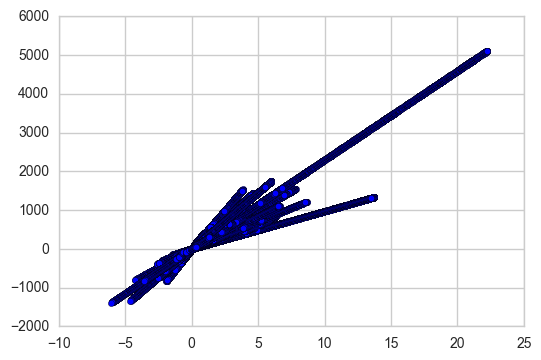

In [29]:
# Can I use count_percent_population AND count_percent_capacity?
plt.scatter(discrete_bike_data['Count_Percent_Population'], discrete_bike_data['Count_Percent_Capacity'])

While the above graph shows us that there is a relationship between these two, possible target features, the relationship is based on the same bike count value for each instance. These features are partly based on the same information and so it is not surprising that we see a relationship. It looks like we cannot use both features, and a combination does not make much sense either. Below, I continue and drop the Count_Percent_Population feature.

In [30]:
discrete_bike_data.drop('Count_Percent_Population', axis=1, inplace=True)

## Below I explore only the outage status subset of the newly formed dataframe.

In [31]:
# Take out only the outage status data
discrete_bike_data_status_only = discrete_bike_data[discrete_bike_data['Count_Percent_Capacity'].isnull()]
discrete_bike_data_status_only.reset_index(drop=True,inplace=True)
discrete_bike_data_status_only['Start_Station_Capacity'] = 0
discrete_bike_data_status_only.head()

Date  Start_Station_Capacity Station_Number       Status  \
0 2015-07-01 08:20:33                       0          31116  start empty   
1 2015-07-01 08:25:38                       0          31116    end empty   
2 2015-07-01 08:27:39                       0          31116  start empty   
3 2015-07-01 09:42:41                       0          31116    end empty   
4 2015-07-01 09:55:51                       0          31116  start empty   

   Bike_Count  Count_Percent_Capacity  
0         0.0                     NaN  
1         1.0                     NaN  
2         0.0                     NaN  
3         1.0                     NaN  
4         0.0                     NaN

In [32]:
# Create a station capacity dictionary for mapping
station_cap_df = station_locations.drop('Start_Location', axis=1)
station_cap_dict = {}

for row in station_cap_df.itertuples():
    station_cap_dict[row[1]] = row[2]

station_cap_dict[31709] = 11    
station_cap_dict

{31000: 15,
 31001: 11,
 31002: 17,
 31003: 11,
 31004: 11,
 31005: 19,
 31006: 15,
 31007: 19,
 31008: 11,
 31009: 18,
 31010: 11,
 31011: 17,
 31012: 11,
 31013: 15,
 31014: 31,
 31015: 19,
 31016: 15,
 31017: 15,
 31018: 11,
 31019: 15,
 31020: 11,
 31021: 15,
 31022: 17,
 31023: 11,
 31024: 19,
 31025: 11,
 31026: 15,
 31027: 11,
 31028: 11,
 31029: 14,
 31030: 18,
 31031: 11,
 31032: 11,
 31033: 10,
 31034: 11,
 31035: 11,
 31036: 15,
 31037: 23,
 31038: 11,
 31039: 15,
 31040: 11,
 31041: 19,
 31042: 14,
 31043: 15,
 31044: 15,
 31045: 15,
 31046: 17,
 31047: 29,
 31048: 23,
 31049: 11,
 31050: 11,
 31051: 11,
 31052: 23,
 31053: 15,
 31054: 11,
 31055: 15,
 31056: 11,
 31057: 11,
 31058: 11,
 31059: 10,
 31060: 15,
 31061: 11,
 31062: 11,
 31063: 11,
 31064: 11,
 31065: 11,
 31066: 11,
 31067: 11,
 31068: 14,
 31069: 11,
 31070: 11,
 31071: 11,
 31072: 11,
 31073: 15,
 31074: 15,
 31075: 11,
 31076: 15,
 31077: 19,
 31078: 11,
 31079: 15,
 31080: 15,
 31081: 15,
 31082: 15,
 310

In [33]:
# Fill in percent capacity values to the subset data df, discrete_bike_data_status_only
for row in discrete_bike_data_status_only.itertuples():
    station_now = discrete_bike_data_status_only.get_value(row[0],'Station_Number')
    discrete_bike_data_status_only.set_value(row[0], 'Start_Station_Capacity', station_cap_dict[int(station_now)])

discrete_bike_data_status_only['Count_Percent_Capacity'] = (discrete_bike_data_status_only['Bike_Count']/discrete_bike_data_status_only['Start_Station_Capacity'])*100

# Now that capacities are filled in, display
discrete_bike_data_status_only.head()  

Date  Start_Station_Capacity Station_Number       Status  \
0 2015-07-01 08:20:33                      19          31116  start empty   
1 2015-07-01 08:25:38                      19          31116    end empty   
2 2015-07-01 08:27:39                      19          31116  start empty   
3 2015-07-01 09:42:41                      19          31116    end empty   
4 2015-07-01 09:55:51                      19          31116  start empty   

   Bike_Count  Count_Percent_Capacity  
0         0.0                0.000000  
1         1.0                5.263158  
2         0.0                0.000000  
3         1.0                5.263158  
4         0.0                0.000000

In [60]:
# Are there still NaN values?
nan_stations = list(discrete_bike_data_status_only[discrete_bike_data_status_only['Count_Percent_Capacity'].isnull()]['Station_Number'].unique())
# After checking in historical and outage data for these stations
# it is clear that there was not enough data to back out bike counts
# or, in a special case, the live feed data shows station capacity is 0
nan_stations

['31630',
 '32010',
 '32031',
 '32009',
 '31068',
 '31061',
 '31711',
 '32032',
 '32041',
 '31910',
 '31909',
 '31905']

In [61]:
# I will continue while dropping these stations
discrete_bike_data_status_only = discrete_bike_data_status_only[np.logical_not(discrete_bike_data_status_only['Station_Number'].isin(nan_stations))]

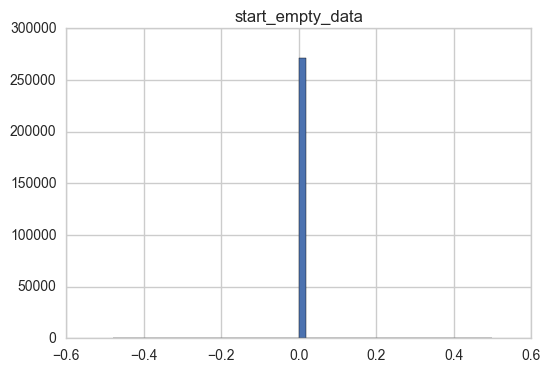

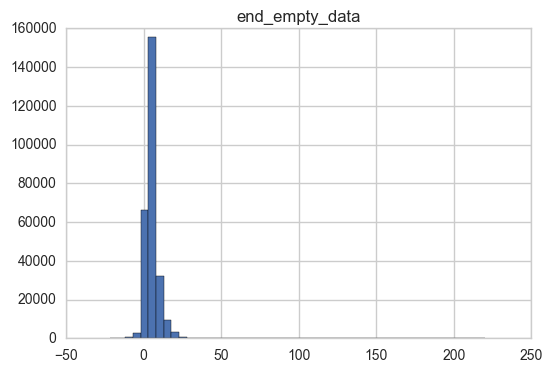

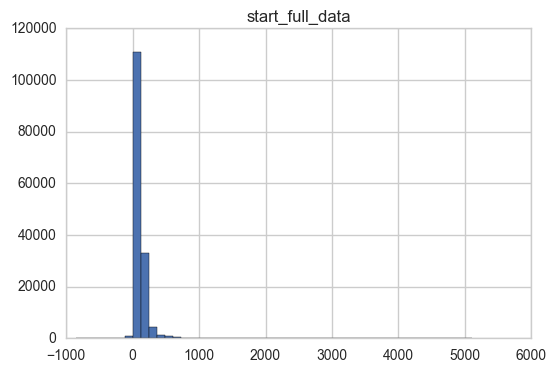

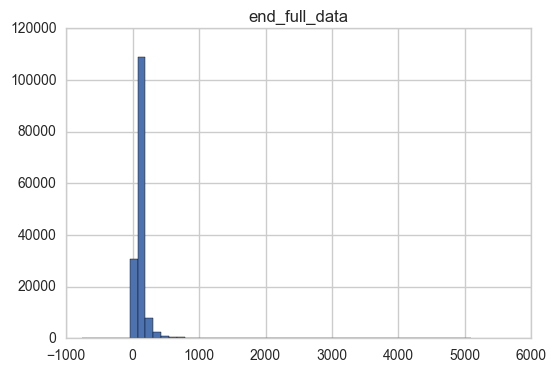

In [63]:
# Graphically explore what percent capacity values each outage flag take
start_empty_data = (discrete_bike_data_status_only[discrete_bike_data_status_only['Status'] == 'start empty'], 'start_empty_data')
end_empty_data = (discrete_bike_data_status_only[discrete_bike_data_status_only['Status'] == 'end empty'], 'end_empty_data')
start_full_data = (discrete_bike_data_status_only[discrete_bike_data_status_only['Status'] == 'start full'], 'start_full_data')
end_full_data = (discrete_bike_data_status_only[discrete_bike_data_status_only['Status'] == 'end full'], 'end_full_data')
status_list = [start_empty_data, end_empty_data, start_full_data, end_full_data]

for df, title in status_list:
    pd.DataFrame.hist(df, column='Count_Percent_Capacity', bins=50)
    pl.title(title)  

In [70]:
# Further explore what percent capacity values each outage flag take
for df, title in status_list:
    print(title)
    print(df['Count_Percent_Capacity'].describe())

start_empty_data
count    271683.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Count_Percent_Capacity, dtype: float64
end_empty_data
count    271683.000000
mean          5.183296
std           4.711650
min         -26.666667
25%           2.439024
50%           5.263158
75%           7.142857
max         220.000000
Name: Count_Percent_Capacity, dtype: float64
start_full_data
count    152420.000000
mean        120.274331
std         126.374072
min        -973.684211
25%          83.333333
50%         100.000000
75%         126.086957
max        5110.526316
Name: Count_Percent_Capacity, dtype: float64
end_full_data
count    152426.000000
mean        115.197275
std         126.432277
min        -884.210526
25%          78.571429
50%          94.444444
75%         120.588235
max        5100.000000
Name: Count_Percent_Capacity, dtype: float64


Above, we can see that start_empty statuses are zero across the board because I reset the counts at every instance of this status. The end_empty statuses tend to happen around 5% capacity, but are skewed to the right. The start_full statuses tend to happen around 100% capacity, but are skewed to the left. The end_full statuses tend to happen around 93% capacity, but are skewed to the left. These statuses are very much in line with what I would expect, which is great. However, there are some alarming outliers: start_full and end_full both have min and max of -900% ~ -1,000% and 5,100%, respectively. I explore these below using the bike data portion of the new dataframe.

## Now I transition to the bike data portion of the data set.

In [74]:
# Filter out outage status instances
discrete_bike_data_only = discrete_bike_data[(discrete_bike_data['Status'] == 'add bike') | (discrete_bike_data['Status'] == 'subtract bike')]

# Drop the NaN stations as explained above
discrete_bike_data_only = discrete_bike_data_only[np.logical_not(discrete_bike_data_only['Station_Number'].isin(nan_stations))]

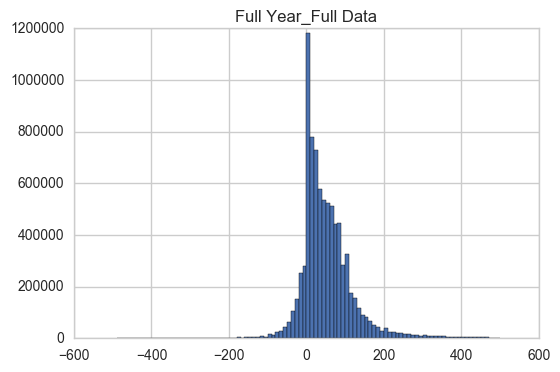

In [75]:
# Look at distribution of percent capacities for full year of full data for all stations
pd.DataFrame.hist(discrete_bike_data_only, column='Count_Percent_Capacity',
                  bins=100, range=(-500,500))
pl.title('Full Year_Full Data')

In [76]:
# What is the range of possible values of percent capacity?
print('min percent capacity:', min(discrete_bike_data_only['Count_Percent_Capacity']))
print('Max percent capacity:', max(discrete_bike_data_only['Count_Percent_Capacity']))

min percent capacity: -1389.47368421
Max percent capacity: 5110.52631579


Below I have used boxplots to explore whether there are certain stations in particular that are causing such a large, unexpected range of percent capacity values. Every 35 stations are plotted below. In the end, I need to reduce the dataset to exclude such values from the target feature.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

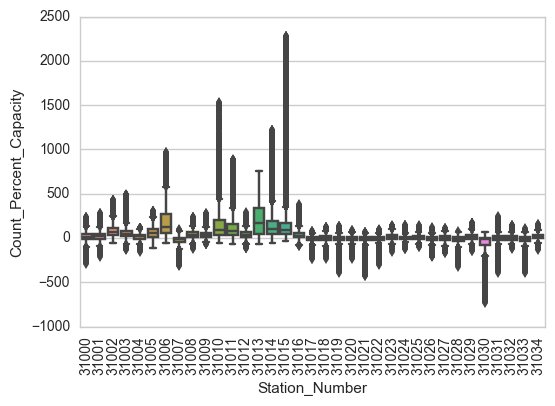

In [77]:
# Stations start - 35

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in sorted(list(bike_data['Start_Station_Number'].unique()))[0:35]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

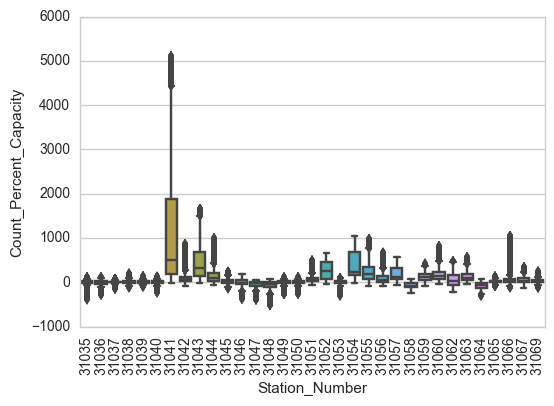

In [78]:
# Stations 35 - 70

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in sorted(list(bike_data['Start_Station_Number'].unique()))[35:70]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

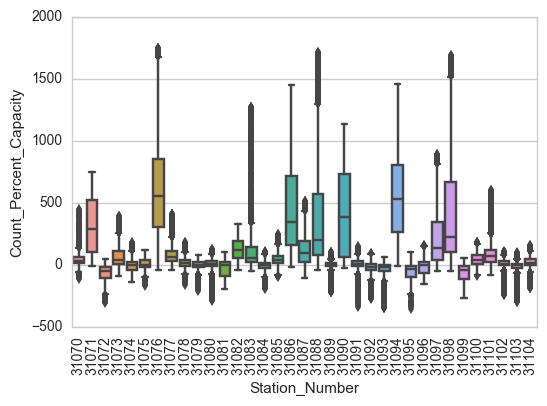

In [79]:
# Stations 70 - 105

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in sorted(list(bike_data['Start_Station_Number'].unique()))[70:105]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

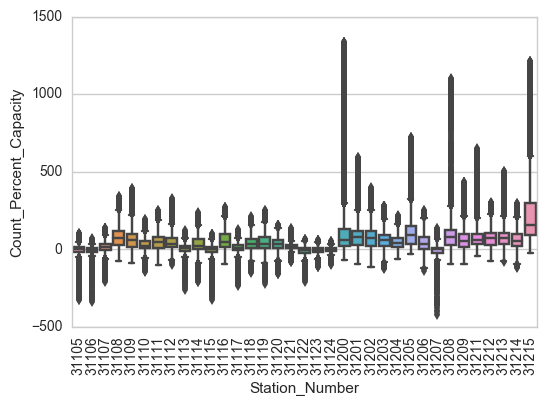

In [80]:
# Stations 105 - 140

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in sorted(list(bike_data['Start_Station_Number'].unique()))[105:140]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

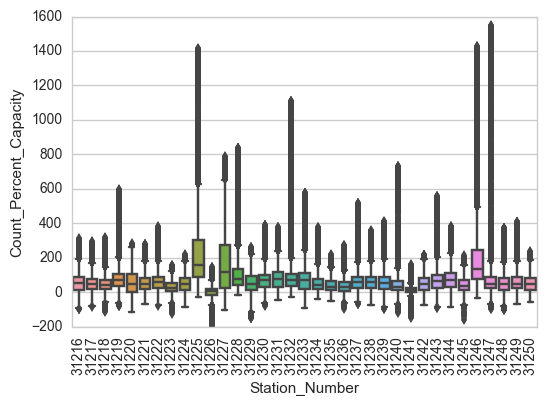

In [81]:
# Stations 140 - 175

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in sorted(list(bike_data['Start_Station_Number'].unique()))[140:175]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

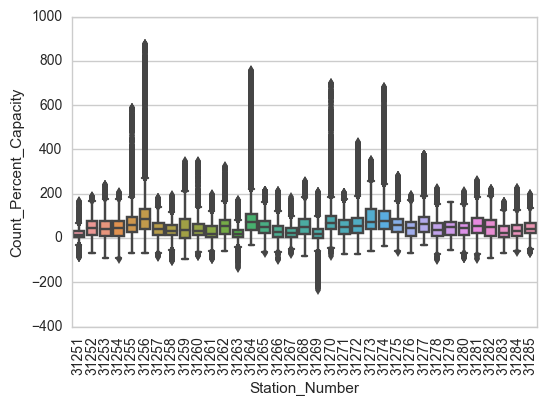

In [82]:
# Stations 175 - 210

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in sorted(list(bike_data['Start_Station_Number'].unique()))[175:210]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

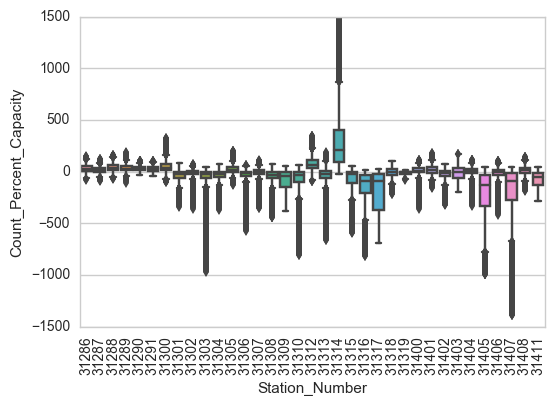

In [83]:
# Stations 210 - 245

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in sorted(list(bike_data['Start_Station_Number'].unique()))[210:245]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

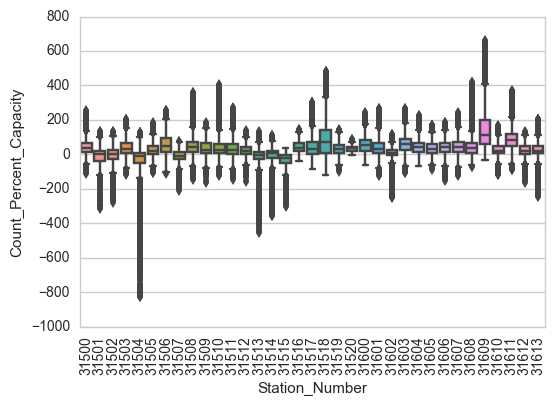

In [84]:
# Stations 245 - 280

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in sorted(list(bike_data['Start_Station_Number'].unique()))[245:280]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

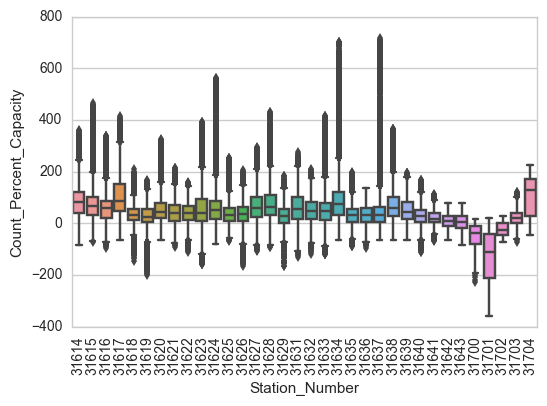

In [85]:
# Stations 280 - 315

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in sorted(list(bike_data['Start_Station_Number'].unique()))[280:315]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

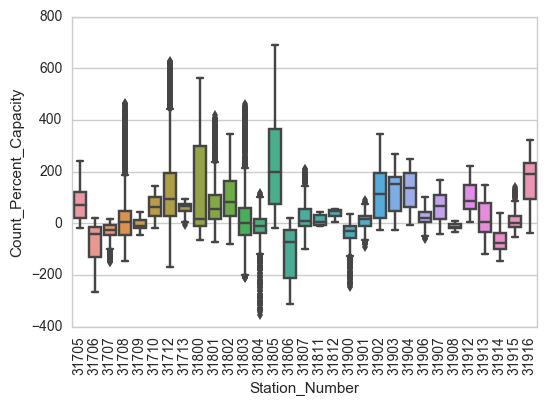

In [86]:
# Stations 315 - 350

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in sorted(list(bike_data['Start_Station_Number'].unique()))[315:350]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

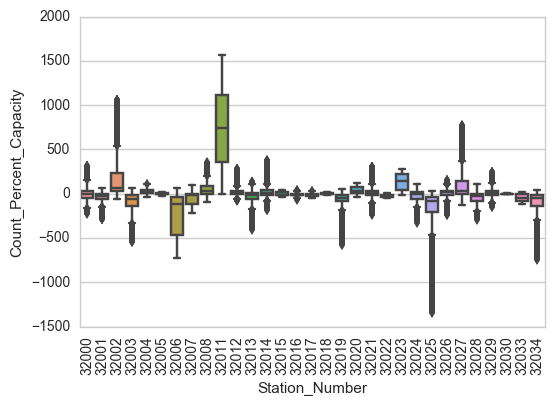

In [87]:
# Stations 350 - 385

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in sorted(list(bike_data['Start_Station_Number'].unique()))[350:385]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

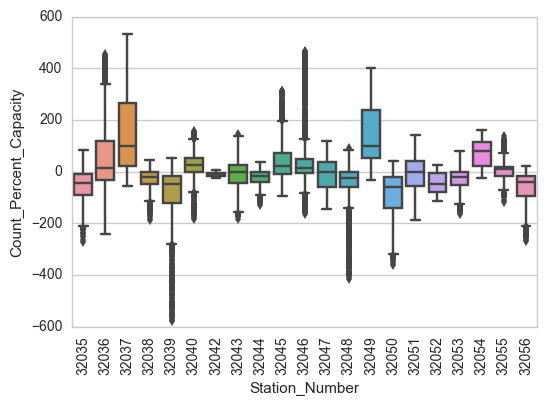

In [88]:
# Stations 385 - last

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in sorted(list(bike_data['Start_Station_Number'].unique()))[385:]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

<a id='3steps'></a>
# Three-Step Transformation  
Looking at the above boxplots, we can see that station median and IQR fluctuate and that some stations account for the unreasonable minimum and maximum Count_Percent_Capacity values explored previously. To handle these outliers, I will:  
1) Take out stations that have both unreasonable medians (too large or small) and IQRs (too large).  
2) Perform binning on instances that have unreasonably large Count_Percent_Capacity values.  
3) Take out stations that do not have a significant amount of activity left for analysis.  
  
[Back to Top](#top)  
[Back to Data Exploration](#section2)  
[Jump to Baseline Data](#baselinedata)

## 1) Take out stations that have both unreasonable medians (too large or small) and IQRs (too large). 

In [89]:
# Explore each station's Count_Percent_Capacity in a dataframe format
iqr_df = discrete_bike_data_only.groupby('Station_Number')[['Count_Percent_Capacity']].agg(lambda x: [min(x), 
                                                                                                      np.percentile(x, 10), 
                                                                                                      np.percentile(x, 25), 
                                                                                                      np.percentile(x, 50), 
                                                                                                      np.percentile(x, 75), 
                                                                                                      np.percentile(x, 90), 
                                                                                                      max(x)])

# Find percentiles and display dataframe
iqr_df.reset_index(drop=False, inplace=True)
iqr_df.columns = ['Station_Number', 'Percentiles']
iqr_df['Min'] = iqr_df['Percentiles'].apply(lambda x: x[0])
iqr_df['Perc10'] = iqr_df['Percentiles'].apply(lambda x: x[1])
iqr_df['Perc25'] = iqr_df['Percentiles'].apply(lambda x: x[2])
iqr_df['Median'] = iqr_df['Percentiles'].apply(lambda x: x[3])
iqr_df['Perc75'] = iqr_df['Percentiles'].apply(lambda x: x[4])
iqr_df['Perc90'] = iqr_df['Percentiles'].apply(lambda x: x[5])
iqr_df['Max'] = iqr_df['Percentiles'].apply(lambda x: x[-1])
iqr_df['IQR'] = iqr_df['Perc75'] - iqr_df['Perc25']
iqr_df.drop('Percentiles', axis=1, inplace=True)

In [92]:
# Find stations within acceptable median and IQR ranges
filtered_iqr_df = iqr_df[(iqr_df['Median'] >= 0) & (iqr_df['Median'] <= 100) & (iqr_df['IQR'] <= 100)]
filtered_iqr_df

Station_Number         Min      Perc10     Perc25     Median      Perc75  \
0            31000 -293.333333  -40.000000 -13.333333   6.666667   46.666667   
1            31001 -209.090909  -27.272727  -9.090909  18.181818   45.454545   
2            31002  -52.941176    5.882353  29.411765  70.588235  117.647059   
3            31003 -136.363636    0.000000  18.181818  45.454545   81.818182   
4            31004 -154.545455  -27.272727  -9.090909  18.181818   36.363636   
5            31005 -110.526316   -5.263158  15.789474  52.631579  105.263158   
8            31008 -127.272727   -9.090909   9.090909  36.363636   63.636364   
9            31009  -72.222222    0.000000  16.666667  38.888889   61.111111   
12           31012 -118.181818   -9.090909   9.090909  36.363636   63.636364   
16           31016  -86.666667   -6.666667   6.666667  26.666667   60.000000   
18           31018 -236.363636  -54.545455 -27.272727   0.000000   18.181818   
19           31019 -393.333333  -46.666667 -20.000000   0.000000   13.333333   
22           31022 -300.000000  -47.058824 -17.647059   0.000000   11.764706   
23           31023 -154.545455  -27.272727  -9.090909   9.090909   36.363636   
24           31024 -126.315789  -26.315789 -10.526316   5.263158   15.789474   
25           31025 -100.000000  -27.272727  -9.090909   9.090909   27.272727   
27           31027 -163.636364  -45.454545 -27.272727   0.000000   18.181818   
29           31029 -150.000000  -21.428571  -7.142857  14.285714   35.714286   
31           31031 -390.909091  -36.363636 -18.181818   0.000000   18.181818   
32           31032 -127.272727  -36.363636 -18.181818   0.000000   18.181818   
34           31034 -136.363636  -18.181818   0.000000  18.181818   36.363636   
35           31035 -390.909091  -36.363636  -9.090909   9.090909   27.272727   
36           31036 -293.333333 -106.666667 -33.333333   0.000000   20.000000   
37           31037 -143.478261  -17.391304  -4.347826   4.347826   17.391304   
38           31038 -118.181818  -36.363636 -18.181818   9.090909   27.272727   
39           31039 -100.000000  -20.000000  -6.666667  13.333333   26.666667   
40           31040 -236.363636  -36.363636 -18.181818   0.000000   18.181818   
45           31045 -146.666667  -33.333333  -6.666667  20.000000   60.000000   
49           31049 -272.727273  -54.545455 -18.181818   0.000000   18.181818   
50           31050 -272.727273  -36.363636 -18.181818   0.000000   18.181818   
..             ...         ...         ...        ...        ...         ...   
321          31801  -72.727273    0.000000  18.181818  54.545455  109.090909   
327          31807 -100.000000  -27.272727  -9.090909   9.090909   54.545455   
328          31811  -10.526316   -5.263158  -5.263158   5.263158   30.263158   
329          31812    4.347826   17.391304  28.260870  47.826087   52.173913   
331          31901  -90.909091  -27.272727  -9.090909  18.181818   27.272727   
335          31906  -61.111111  -11.111111   5.555556  22.222222   44.444444   
336          31907  -42.105263    0.000000  15.789474  68.421053  110.526316   
338          31912    6.666667   33.333333  53.333333  86.666667  146.666667   
341          31915  -53.333333  -26.666667 -13.333333   0.000000   26.666667   
343          32000 -227.272727  -90.909091 -45.454545   0.000000   36.363636   
347          32004  -42.105263   -5.263158   5.263158  31.578947   47.368421   
348          32005  -21.052632  -10.526316  -5.263158   0.000000   10.526316   
351          32008  -90.909091  -27.272727   0.000000  27.272727   81.818182   
353          32012  -78.947368  -21.052632  -5.263158  10.526316   31.578947   
355          32014 -184.210526  -36.842105 -10.526316  10.526316   36.842105   
359          32018  -20.000000  -13.333333  -6.666667   0.000000    6.666667   
361          32020  -40.000000   -6.666667   6.666667  33.333333   73.333333   
362          32021 -240.000000  -53.333333 -20.000000   6.666667   33.333333   
365 

In [93]:
print('Number of stations in acceptable range:', len(filtered_iqr_df))

Number of stations in acceptable range: 254


In [94]:
# Filter discrete_bike_data_only to include only the stations identified as acceptable in terms of median and IQR
remove_station_discrete_bike_data_only = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(list(filtered_iqr_df['Station_Number']))]

# Display
remove_station_discrete_bike_data_only

Date  Start_Station_Capacity Station_Number         Status  \
24 2015-07-01 08:25:00                    19.0          31116       add bike   
26 2015-07-01 08:26:00                    19.0          31116  subtract bike   
28 2015-07-01 09:42:00                    19.0          31116       add bike   
30 2015-07-01 09:55:00                    19.0          31116  subtract bike   
32 2015-07-01 10:38:00                    19.0          31116       add bike   
34 2015-07-01 11:11:00                    19.0          31116  subtract bike   
37 2015-07-01 14:16:00                    19.0          31116       add bike   
38 2015-07-01 14:32:00                    19.0          31116       add bike   
39 2015-07-01 14:49:00                    19.0          31116       add bike   
40 2015-07-01 15:00:00                    19.0          31116       add bike   
41 2015-07-01 15:08:00                    19.0          31116  subtract bike   
42 2015-07-01 15:20:00                    19.0          31116       add bike   
43 2015-07-01 15:39:00                    19.0          31116  subtract bike   
44 2015-07-01 15:49:00                    19.0          31116  subtract bike   
45 2015-07-01 15:49:00                    19.0          31116  subtract bike   
46 2015-07-01 15:50:00                    19.0          31116       add bike   
47 2015-07-01 15:58:00                    19.0          31116       add bike   
48 2015-07-01 16:01:00                    19.0          31116       add bike   
49 2015-07-01 16:03:00                    19.0          31116  subtract bike   
50 2015-07-01 16:07:00                    19.0          31116       add bike   
51 2015-07-01 16:09:00                    19.0          31116       add bike   
52 2015-07-01 16:10:00                    19.0          31116       add bike   
53 2015-07-01 16:10:00                    19.0          31116  subtract bike   
54 2015-07-01 16:26:00                    19.0          31116       add bike   
55 2015-07-01 16:26:00                    19.0          31116  subtract bike   
56 2015-07-01 16:26:00                    19.0          31116       add bike   
57 2015-07-01 16:28:00                    19.0          31116       add bike   
58 2015-07-01 16:46:00                    19.0          31116       add bike   
59 2015-07-01 16:49:00                    19.0          31116       add bike   
60 2015-07-01 16:52:00                    19.0          31116       add bike   
..                 ...                     ...            ...            ...   
3  2016-09-11 11:58:00                    23.0          31812       add bike   
4  2016-09-12 18:45:00                    23.0          31812       add bike   
5  2016-09-13 18:05:00                    23.0          31812       add bike   
6  2016-09-15 12:11:00                    23.0          31812       add bike   
7  2016-09-15 12:11:00                    23.0          31812  subtract bike   
8  2016-09-15 21:13:00                    23.0          31812       add bike   
9  2016-09-16 11:16:00                    23.0          31812       add bike   
10 2016-09-16 11:25:00                    23.0          31812       add bike   
11 2016-09-16 11:33:00                    23.0          31812       add bike   
12 2016-09-16 11:41:00                    23.0          31812       add bike   
13 2016-09-16 11:47:00                    23.0          31812       add bike   
14 2016-09-16 11:54:00                    23.0          31812       add bike   
15 2016-09-16 12:02:00                    23.0          31812       add bike   
16 2016-09-16 12:06:00                    23.0          31812  subtract bike   
17 2016-09-16 12:14:00                    23.0          31812       add bike   
18 2016-09-16 12:29:00                    23.0          31812  subtract bike   
19 2016-09-16 12:32:00                    23.0          31812       add bike   
20 2016-09-16 12:33:00                    23.0          31812  subtract bike   
21 2016-09-17 09:0

In [95]:
# Explore range of possible count_percent_capacity values
print('Minimum Count_Percent_Capacity:', min(remove_station_discrete_bike_data_only['Count_Percent_Capacity']))
print('Maximum Count_Percent_Capacity:', max(remove_station_discrete_bike_data_only['Count_Percent_Capacity']))

# We can see that the range has been significantly reduced, but still not reduced enough.

Minimum Count_Percent_Capacity: -427.272727273
Maximum Count_Percent_Capacity: 1550.0


In [96]:
# Did I take out too much data?
remove_station_discrete_bike_data_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7361771 entries, 24 to 32
Data columns (total 6 columns):
Date                      datetime64[ns]
Start_Station_Capacity    float64
Station_Number            object
Status                    object
Bike_Count                float64
Count_Percent_Capacity    float64
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 393.2+ MB


## 2) Perform binning on instances that have unreasonably large Count_Percent_Capacity values.

In [97]:
# I will truncate any values above a station's 90th percentile to equal the 90th percentile
# The same step will be taken for values below the 10th percentile
# First, explore the possible ranges of values
print('Minimum 10th Percentile:', min(filtered_iqr_df['Perc10']))
print('Maximum 10th Percentile:', max(filtered_iqr_df['Perc10']), end='\n\n')

print('Minimum 90th Percentile:', min(filtered_iqr_df['Perc90']))
print('Maximum 90th Percentile:', max(filtered_iqr_df['Perc90']))

Minimum 10th Percentile: -127.272727273
Maximum 10th Percentile: 33.3333333333

Minimum 90th Percentile: 5.33333333333
Maximum 90th Percentile: 306.666666667


In [98]:
# Merge the data sets so that 10th and 90th percentile ranges by station are included as features
bin_remove_station_discrete_bike_data_only = remove_station_discrete_bike_data_only.merge(filtered_iqr_df[['Station_Number', 'Perc10', 'Perc90']], 
                                                             how='left',
                                                             on = 'Station_Number')

bin_remove_station_discrete_bike_data_only.head()

Date  Start_Station_Capacity Station_Number         Status  \
0 2015-07-01 08:25:00                    19.0          31116       add bike   
1 2015-07-01 08:26:00                    19.0          31116  subtract bike   
2 2015-07-01 09:42:00                    19.0          31116       add bike   
3 2015-07-01 09:55:00                    19.0          31116  subtract bike   
4 2015-07-01 10:38:00                    19.0          31116       add bike   

   Bike_Count  Count_Percent_Capacity  Perc10      Perc90  
0         1.0                5.263158     0.0  131.578947  
1         0.0                0.000000     0.0  131.578947  
2         1.0                5.263158     0.0  131.578947  
3         0.0                0.000000     0.0  131.578947  
4         1.0                5.263158     0.0  131.578947

In [99]:
# How often is Count_Percent_Capacity > the 90th percentile or < the 10th percentile?
len(bin_remove_station_discrete_bike_data_only[(bin_remove_station_discrete_bike_data_only['Count_Percent_Capacity'] < bin_remove_station_discrete_bike_data_only['Perc10'])
                                               | (bin_remove_station_discrete_bike_data_only['Count_Percent_Capacity'] > bin_remove_station_discrete_bike_data_only['Perc90'])])

1272796

In [100]:
for row in bin_remove_station_discrete_bike_data_only.itertuples():
    try:
        if row[6] < row[7]:
            #below 10th percentile
            bin_remove_station_discrete_bike_data_only.set_value(row[0], 'Count_Percent_Capacity', 
                                              bin_remove_station_discrete_bike_data_only.get_value(row[0], 'Perc10'))

        elif row[6] > row[8]:
            bin_remove_station_discrete_bike_data_only.set_value(row[0], 'Count_Percent_Capacity', 
                                              bin_remove_station_discrete_bike_data_only.get_value(row[0], 'Perc90'))
    except:
        print('Error on station', row[3], 'index', row[0])

bin_remove_station_discrete_bike_data_only.head()

Date  Start_Station_Capacity Station_Number         Status  \
0 2015-07-01 08:25:00                    19.0          31116       add bike   
1 2015-07-01 08:26:00                    19.0          31116  subtract bike   
2 2015-07-01 09:42:00                    19.0          31116       add bike   
3 2015-07-01 09:55:00                    19.0          31116  subtract bike   
4 2015-07-01 10:38:00                    19.0          31116       add bike   

   Bike_Count  Count_Percent_Capacity  Perc10      Perc90  
0         1.0                5.263158     0.0  131.578947  
1         0.0                0.000000     0.0  131.578947  
2         1.0                5.263158     0.0  131.578947  
3         0.0                0.000000     0.0  131.578947  
4         1.0                5.263158     0.0  131.578947

In [101]:
# Check again: How often is Count_Percent_Capacity > the 90th percentile or < the 10th percentile?
len(bin_remove_station_discrete_bike_data_only[(bin_remove_station_discrete_bike_data_only['Count_Percent_Capacity'] < bin_remove_station_discrete_bike_data_only['Perc10'])
                                               | (bin_remove_station_discrete_bike_data_only['Count_Percent_Capacity'] > bin_remove_station_discrete_bike_data_only['Perc90'])])

0

In [102]:
# Again, explore the possible ranges of values and see if they make sense
print('Minimum Count_Percent_Capacity:', min(bin_remove_station_discrete_bike_data_only['Count_Percent_Capacity']))
print('Maximum Count_Percent_Capacity:', max(bin_remove_station_discrete_bike_data_only['Count_Percent_Capacity']))

Minimum Count_Percent_Capacity: -127.272727273
Maximum Count_Percent_Capacity: 306.666666667


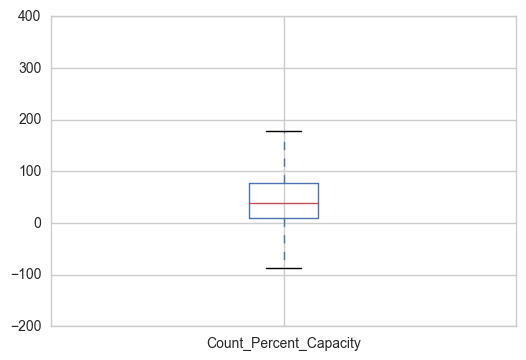

In [103]:
# Explore the range of Count_Percent_Capacity values in a boxplot
pd.DataFrame.boxplot(bin_remove_station_discrete_bike_data_only, column='Count_Percent_Capacity')

## 3) Take out stations that do not have a significant amount of activity left for analysis.

In [104]:
# See whether there are stations with counts that are too low for analysis
bin_remove_station_discrete_bike_data_only_station_counts = pd.DataFrame(pd.value_counts(bin_remove_station_discrete_bike_data_only['Station_Number']))
bin_remove_station_discrete_bike_data_only_station_counts.reset_index(drop=False, inplace=True)
bin_remove_station_discrete_bike_data_only_station_counts.columns=['Station_Number', 'Count']
bin_remove_station_discrete_bike_data_only_station_counts['Count'] = bin_remove_station_discrete_bike_data_only_station_counts['Count'].astype(int)

for row in bin_remove_station_discrete_bike_data_only_station_counts.itertuples():
    print('Station', row[1], ':', row[2])

Station 31623 : 184647
Station 31258 : 178113
Station 31247 : 157496
Station 31201 : 112337
Station 31241 : 99795
Station 31101 : 96567
Station 31249 : 96559
Station 31229 : 88516
Station 31613 : 83137
Station 31600 : 81383
Station 31222 : 78595
Station 31248 : 78429
Station 31228 : 77633
Station 31214 : 76597
Station 31243 : 74451
Station 31603 : 73367
Station 31624 : 72577
Station 31203 : 72447
Station 31202 : 71500
Station 31271 : 69348
Station 31212 : 67307
Station 31265 : 64987
Station 31213 : 64575
Station 31110 : 64080
Station 31277 : 63913
Station 31232 : 63312
Station 31266 : 61027
Station 31230 : 59840
Station 31109 : 59609
Station 31104 : 59083
Station 31267 : 58897
Station 31108 : 58334
Station 31231 : 58323
Station 31281 : 57456
Station 31257 : 57087
Station 31237 : 56967
Station 31278 : 55853
Station 31239 : 55756
Station 31234 : 55395
Station 31121 : 54865
Station 31233 : 54154
Station 31218 : 53861
Station 31272 : 53320
Station 31616 : 53220
Station 31602 : 52815
Statio

In [105]:
# Which stations have the least counts (below 8760, since this is 1 per hour per year)? How many are there?
least_counts_df = bin_remove_station_discrete_bike_data_only_station_counts[bin_remove_station_discrete_bike_data_only_station_counts['Count'] <= 8760]
print(len(least_counts_df))
least_counts_df

79


Station_Number  Count
175          31284   8417
176          31031   8376
177          32014   8268
178          31084   8236
179          31065   8213
180          31035   7912
181          31019   7748
182          31004   7747
183          31025   7699
184          31079   7332
185          31511   7030
186          31040   6939
187          32026   6841
188          31051   6650
189          31018   6631
190          32046   6539
191          31001   6493
192          31091   6460
193          31012   6278
194          31045   6186
195          31027   6057
196          31069   5952
197          31036   5890
198          31049   5854
199          31050   5524
200          31514   5364
201          31124   5328
202          31403   5309
203          31287   5275
204          31000   4807
..             ...    ...
224          31291   2620
225          31318   2428
226          31708   2049
227          32055   2033
228          31510   2016
229          31807   1984
230          32051   1427
231          31901   1197
232          31075   1186
233          32043   1151
234          31642    987
235          31643    909
236          31907    891
237          31906    846
238          31703    809
239          32004    766
240          32047    727
241          32020    706
242          31915    612
243          31705    528
244          32054    428
245          31520    271
246          31710    266
247          31912    133
248          32005     96
249          31713     45
250          32018     38
251          31812     31
252          31811     22
253          32030     13

[79 rows x 2 columns]

In [106]:
# Take bin_remove_station_discrete_bike_data_only and filter out any stations that have counts below 8760
reduced_discrete_bike_data = bin_remove_station_discrete_bike_data_only[np.logical_not(bin_remove_station_discrete_bike_data_only['Station_Number'].isin(list(least_counts_df['Station_Number'])))]

# Did I take out too much data?
reduced_discrete_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7061761 entries, 0 to 7349943
Data columns (total 8 columns):
Date                      datetime64[ns]
Start_Station_Capacity    float64
Station_Number            object
Status                    object
Bike_Count                float64
Count_Percent_Capacity    float64
Perc10                    float64
Perc90                    float64
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 484.9+ MB


In [107]:
# How many stations are left for analysis?
len(list(reduced_discrete_bike_data['Station_Number'].unique()))

175

In [114]:
# Are there any missing?
for column in reduced_discrete_bike_data.columns:
    print(column, ':', len(reduced_discrete_bike_data[reduced_discrete_bike_data[column].isnull()]))   

Date : 0
Start_Station_Capacity : 0
Station_Number : 0
Status : 0
Bike_Count : 0
Count_Percent_Capacity : 0
Perc10 : 0
Perc90 : 0


<a id='baselinedata'></a>  
# I now have an acceptable, final, baseline dataset that shows station percent capacity values over time.  
[Back to Top](#top)  
[Back to 3-step transformation](#3steps)  
[Jump to Predictions](#predictions)

In [117]:
# Now I can drop the unnecessary columns
target_discrete_bike_data = reduced_discrete_bike_data.drop(['Start_Station_Capacity','Status', 'Bike_Count', 
                                                             'Perc10', 'Perc90'], axis=1)

# Display
target_discrete_bike_data.head()

Date Station_Number  Count_Percent_Capacity
0 2015-07-01 08:25:00          31116                5.263158
1 2015-07-01 08:26:00          31116                0.000000
2 2015-07-01 09:42:00          31116                5.263158
3 2015-07-01 09:55:00          31116                0.000000
4 2015-07-01 10:38:00          31116                5.263158

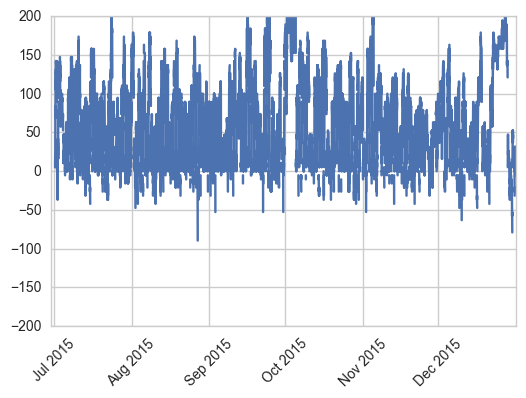

In [147]:
# Look at the time series before transformations
reduced_31116 = discrete_bike_data[discrete_bike_data['Station_Number'] == '31116']
plt.plot(reduced_31116['Date'], reduced_31116['Count_Percent_Capacity'])
plt.ylim(-200, 200)
plt.xlim('2015-06-30 00:00:00', '2015-12-31 23:59:59')
#plt.xlim('2016-01-01 00:00:00', '2016-02-01 00:00:00')
plt.xticks(rotation=45);

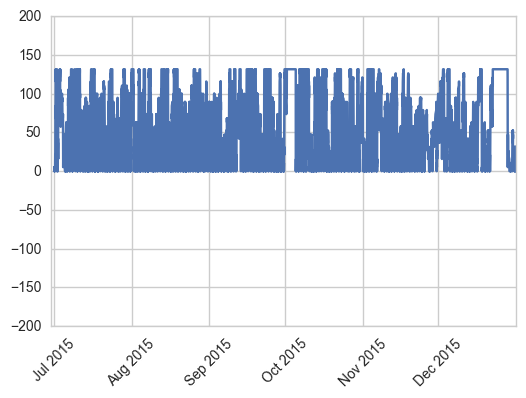

In [150]:
# Look at the time series after transformations
reduced_31116 = target_discrete_bike_data[target_discrete_bike_data['Station_Number'] == '31116']
plt.plot(reduced_31116['Date'], reduced_31116['Count_Percent_Capacity'])
plt.ylim(-200, 200)
plt.xlim('2015-06-30 00:00:00', '2015-12-31 23:59:59')
#plt.xlim('2016-01-01 00:00:00', '2016-02-01 00:00:00')
plt.xticks(rotation=45);

# Determine whether the three transformations above had the desired effect.

In [108]:
# Finally, after all transformations, explore what percent capacity values each outage flag take
for df, title in status_list:
    print(title)
    
    
    # Remove stations based on median and IQR
    df = df[df['Station_Number'].isin(list(filtered_iqr_df['Station_Number']))] 
    
    
    # Bin instances of too high or low count_percent_capacity
    df = df.merge(filtered_iqr_df[['Station_Number', 'Perc10', 'Perc90']], 
                  how='left', on = 'Station_Number')
    
    for row in df.itertuples():
        try:
            if row[6] < row[7]:
                df.set_value(row[0], 'Count_Percent_Capacity', 
                             df.get_value(row[0], 'Perc10'))

            elif row[6] > row[8]:
                df.set_value(row[0], 'Count_Percent_Capacity', 
                             df.get_value(row[0], 'Perc90'))
        except:
            print('Error on station', row[3], 'index', row[0])

            
    # Remove stations with < 8760 instances
    df = df[np.logical_not(df['Station_Number'].isin(list(least_counts_df['Station_Number'])))] 
    
    
    print(df['Count_Percent_Capacity'].describe())

start_empty_data
count    235189.000000
mean          2.267956
std           3.484986
min           0.000000
25%           0.000000
50%           0.000000
75%           4.761905
max          18.181818
Name: Count_Percent_Capacity, dtype: float64
end_empty_data
count    235189.000000
mean          6.110445
std           4.604333
min         -21.428571
25%           4.347826
50%           5.555556
75%           7.407407
max         159.090909
Name: Count_Percent_Capacity, dtype: float64
start_full_data
count    133224.000000
mean         94.985437
std          30.802003
min         -72.727273
25%          78.947368
50%          94.444444
75%         107.692308
max         221.739130
Name: Count_Percent_Capacity, dtype: float64
end_full_data
count    133224.000000
mean         91.419964
std          31.695499
min         -72.727273
25%          76.666667
50%          90.909091
75%         106.666667
max         221.739130
Name: Count_Percent_Capacity, dtype: float64


Compared to the original flag data overall, we can see that:  
• start_empty is very close to 0 across the board - as expected.  
• end_empty is virtually the same with excepting of a lowered max. This is as expected since I did not target any instances of count_percent_capacity near 0.  
• start_full min and max have been significantly reduced, and the median and the mean have become significantly closer.  
• end_full min and max have been significantly reduced, and the median and the mean have become significantly closer. 

# Below I isolate a single station and inspect its distribution over time.

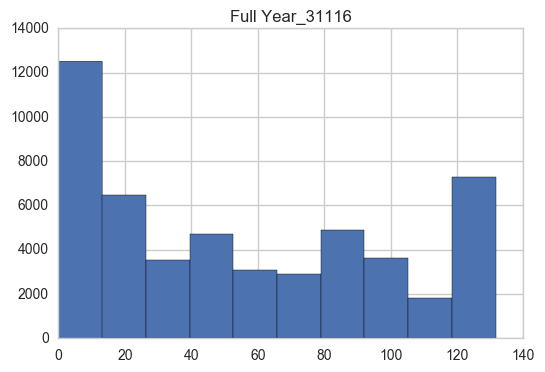

In [110]:
# Isolate station 31116
discrete_bike_data_31116 = reduced_discrete_bike_data[reduced_discrete_bike_data['Station_Number'] == '31116']

# Look at its distribution over the full year of data
pd.DataFrame.hist(discrete_bike_data_31116, column='Count_Percent_Capacity')
pl.title('Full Year_31116')

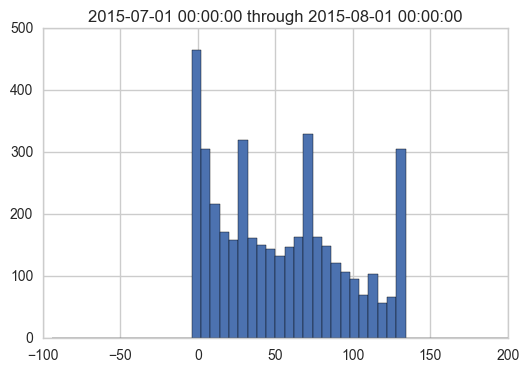

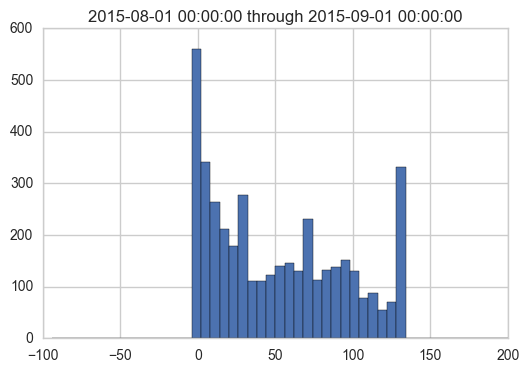

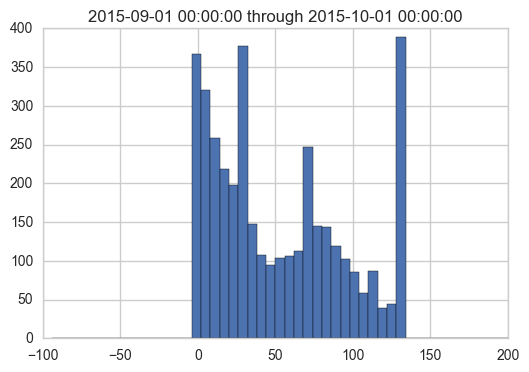

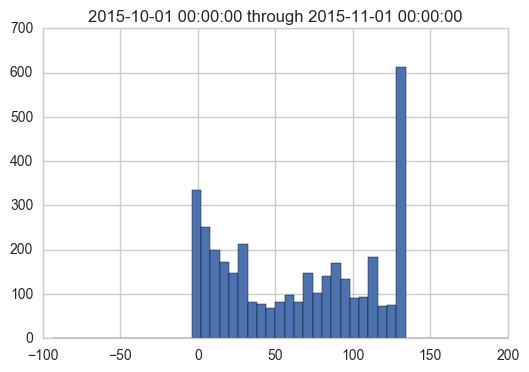

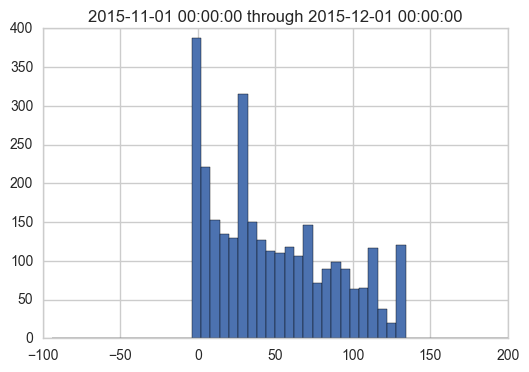

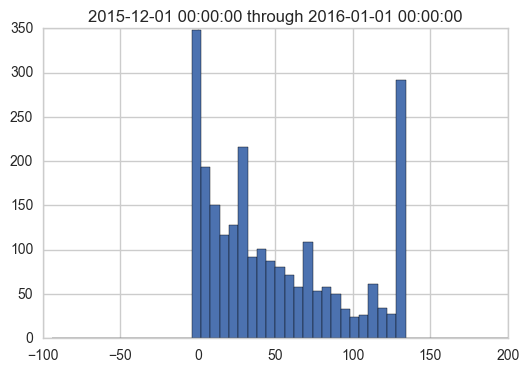

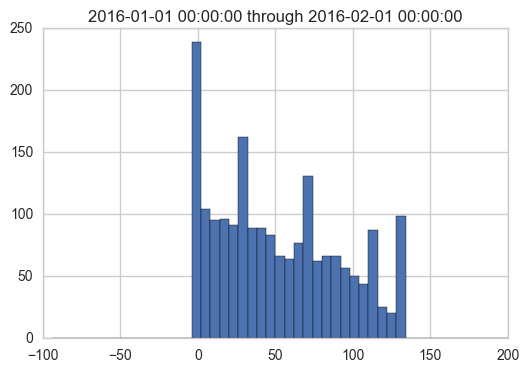

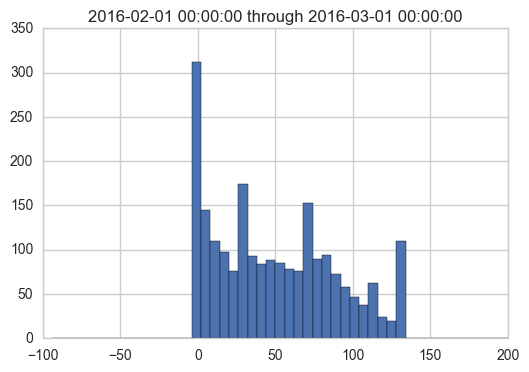

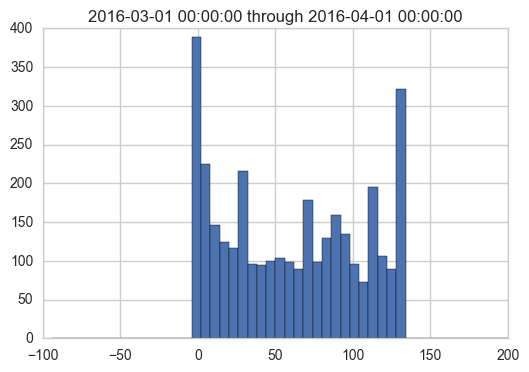

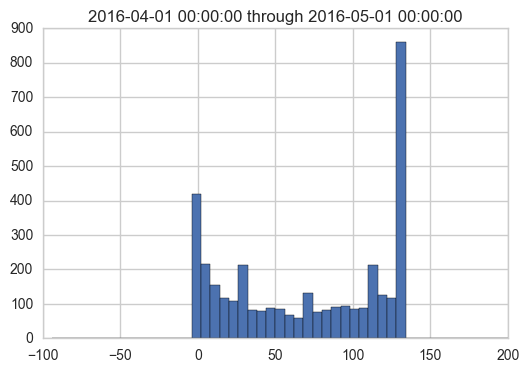

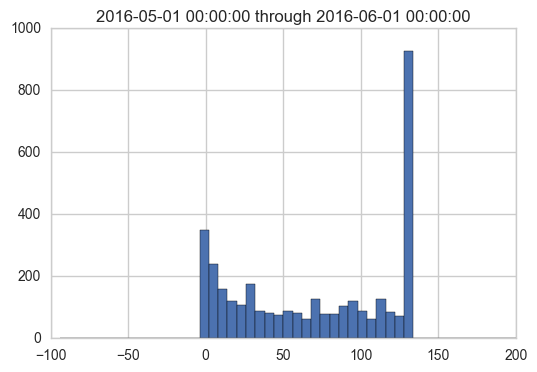

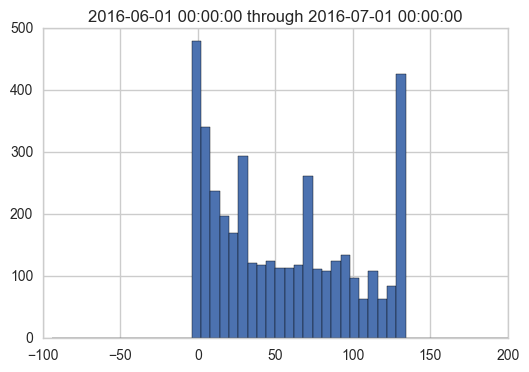

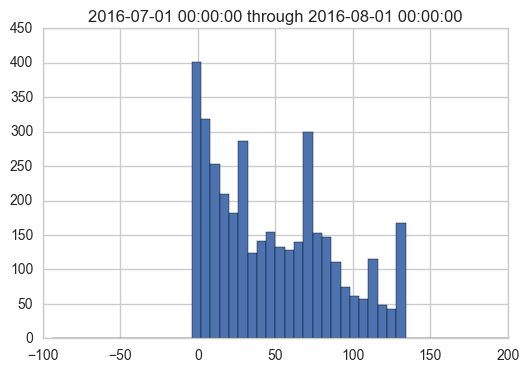

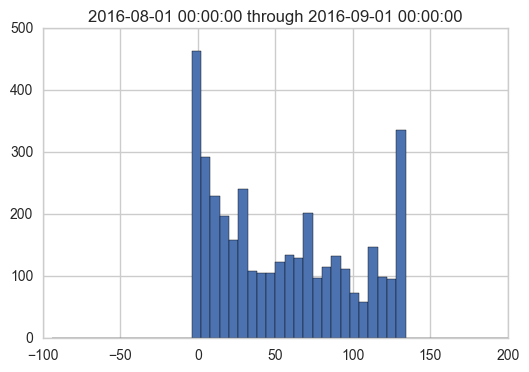

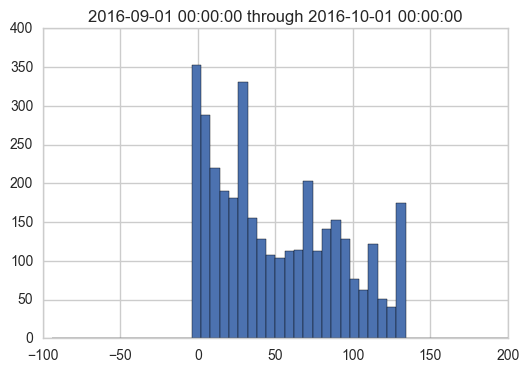

In [111]:
# Look at distributions each month
start = pd.to_datetime('2015-07-01 00:00:00')
end = pd.to_datetime('2015-08-01 00:00:00')
stop = pd.to_datetime('2016-10-01 00:00:00')
add_month = relativedelta(months=1)

while end <= stop:
    pd.DataFrame.hist(discrete_bike_data_31116[((discrete_bike_data_31116['Date'] >= start) & 
                                                (discrete_bike_data_31116['Date'] <= end))], 
                      column='Count_Percent_Capacity', 
                      bins=50, range=(-100,200))
    pl.title(str(start) + ' through ' + str(end))
    start += add_month
    end += add_month

/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


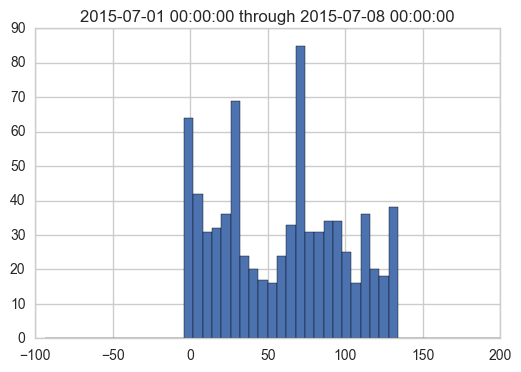

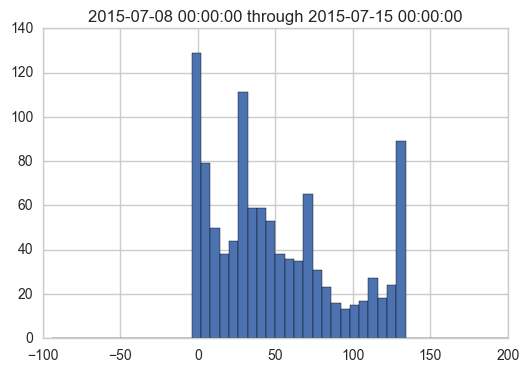

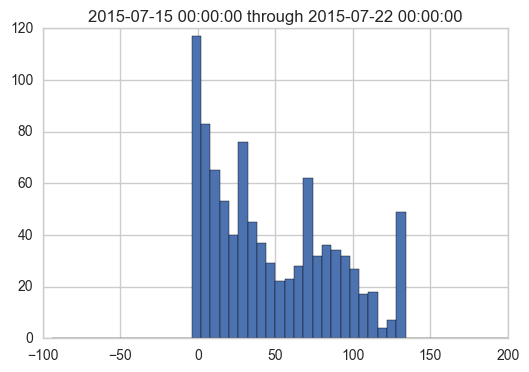

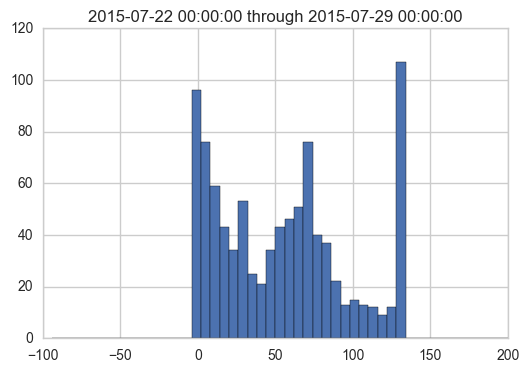

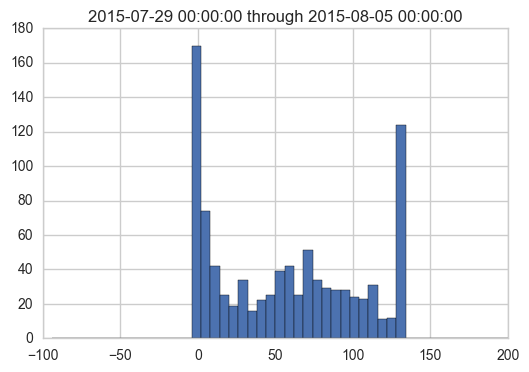

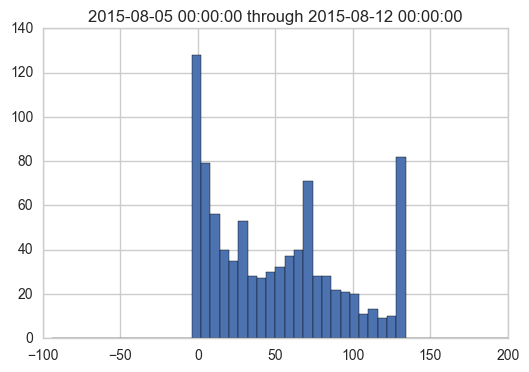

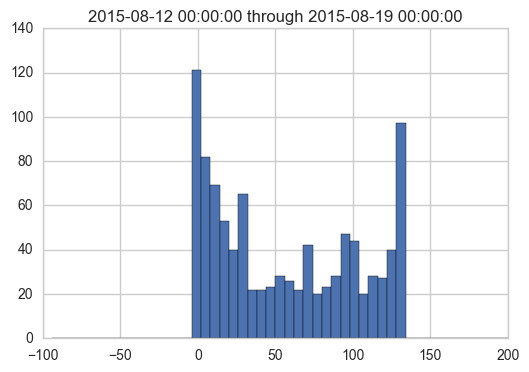

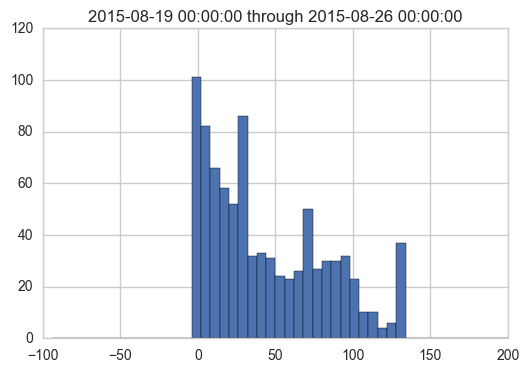

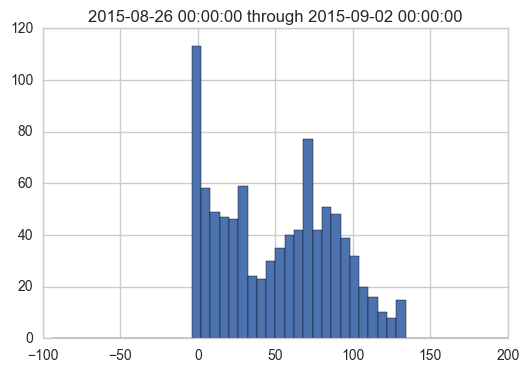

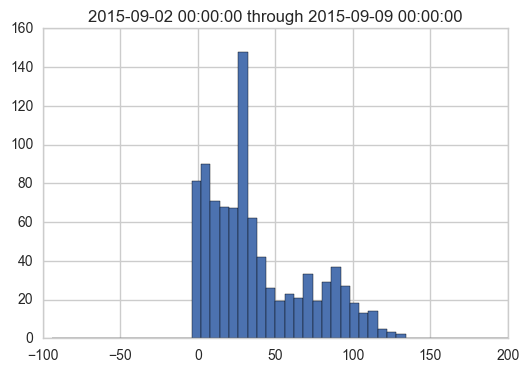

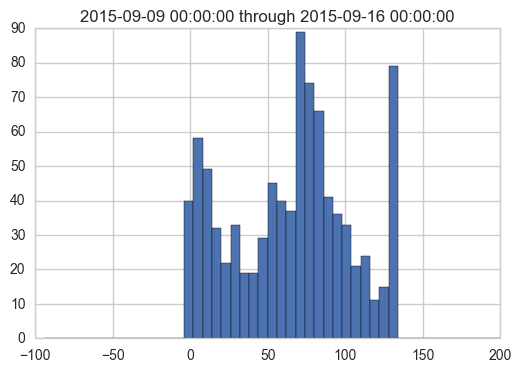

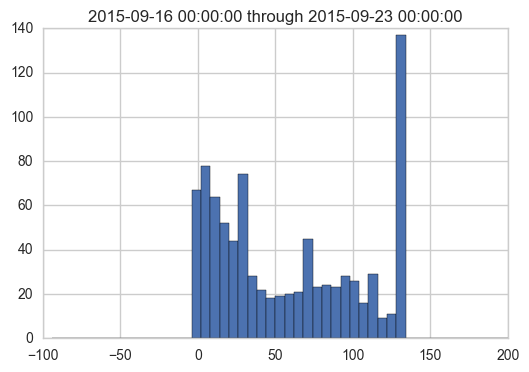

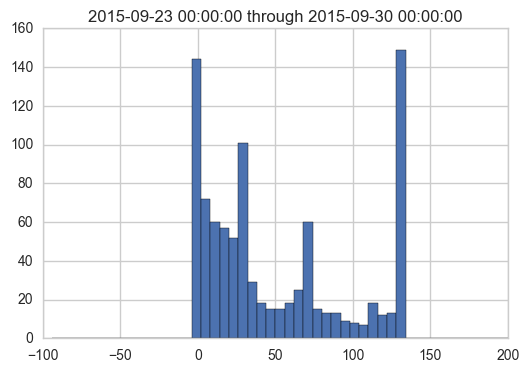

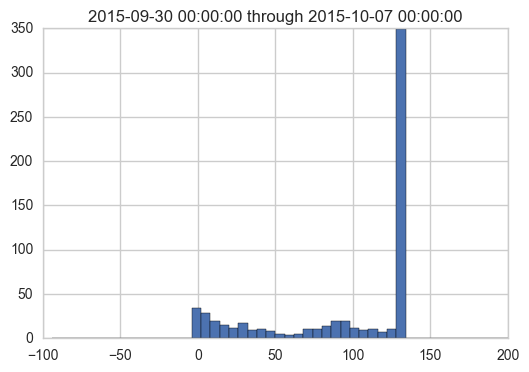

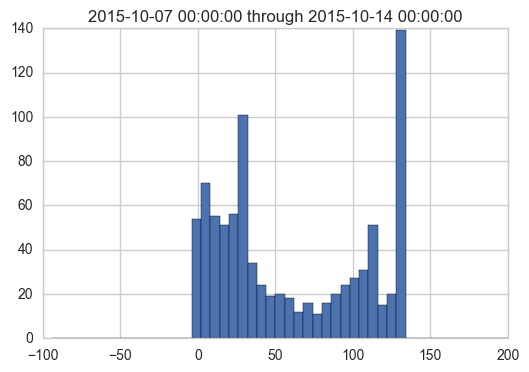

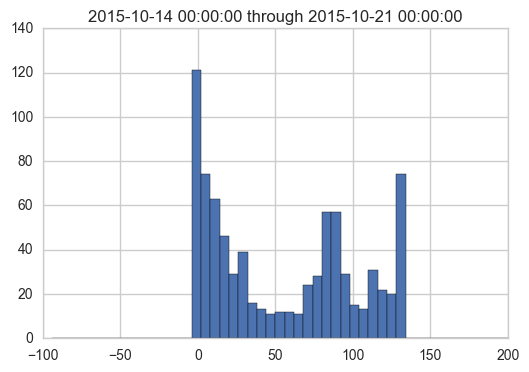

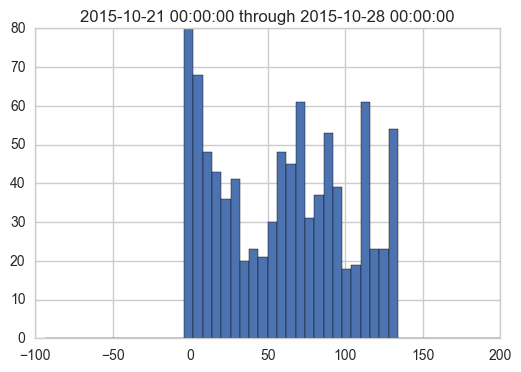

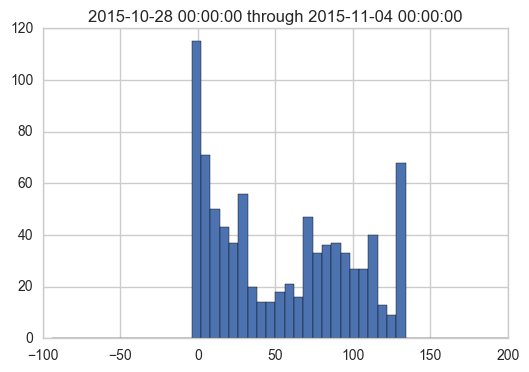

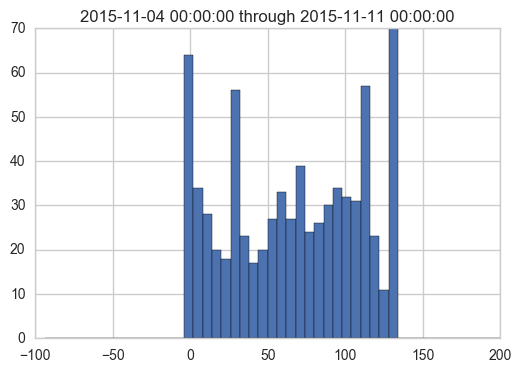

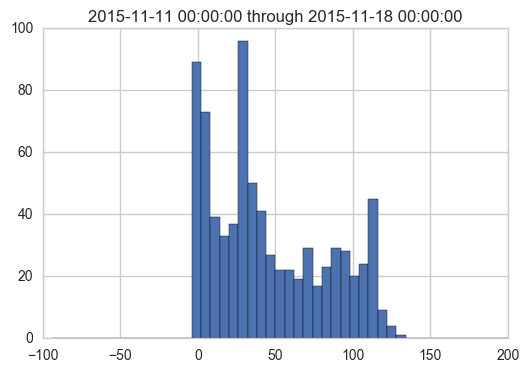

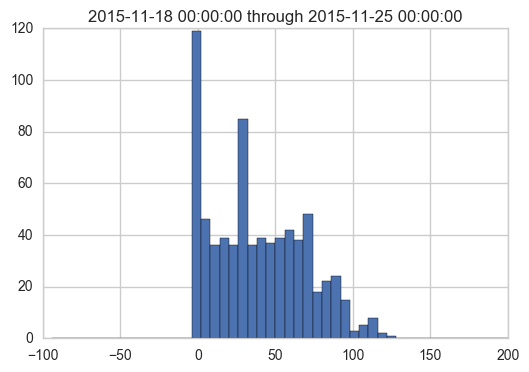

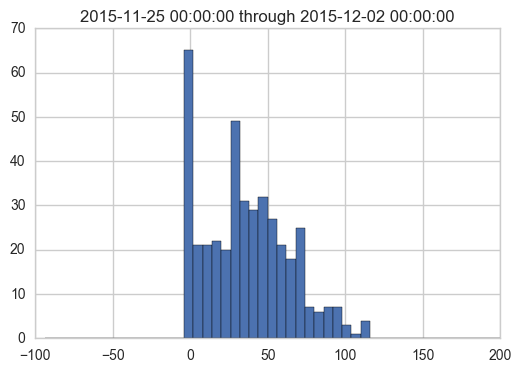

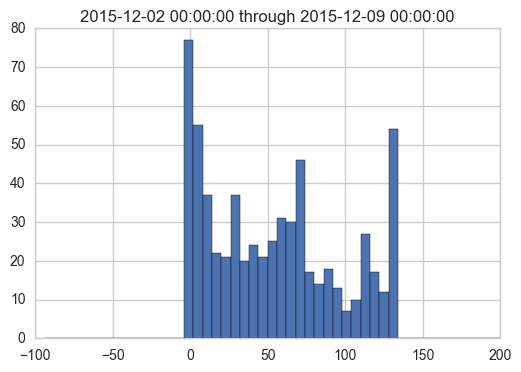

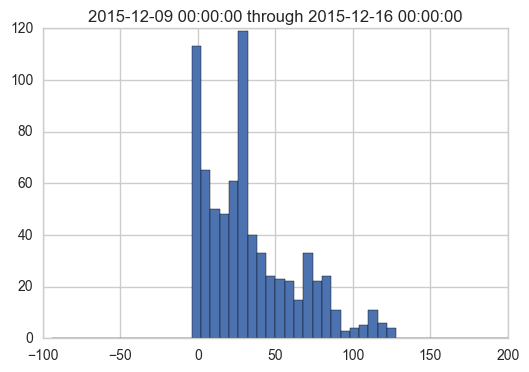

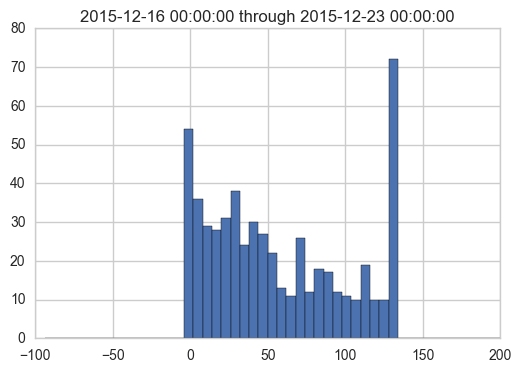

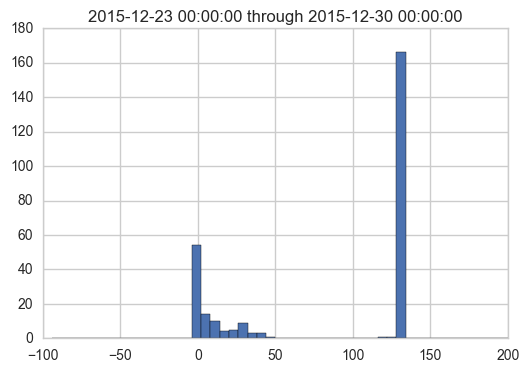

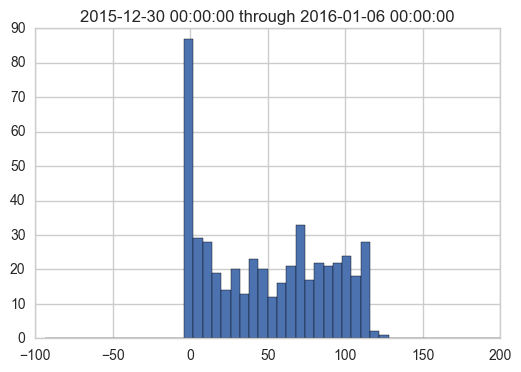

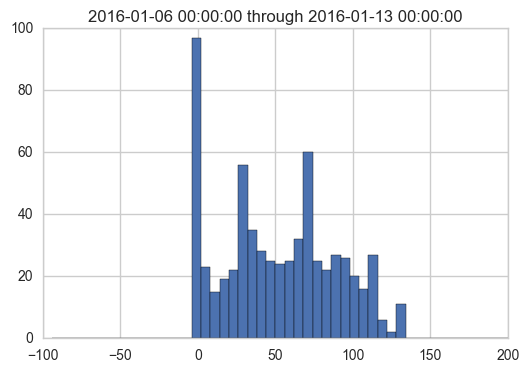

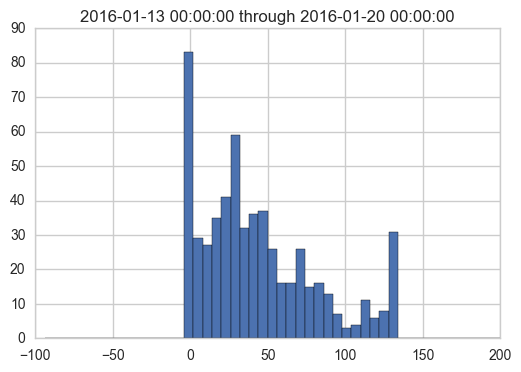

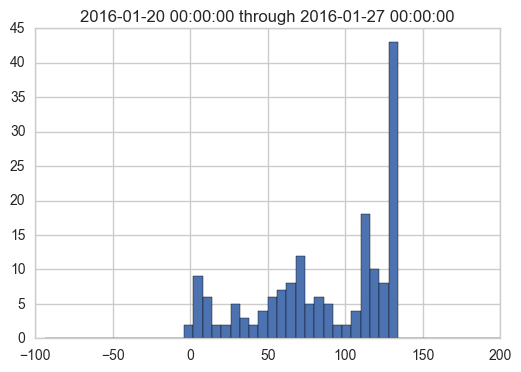

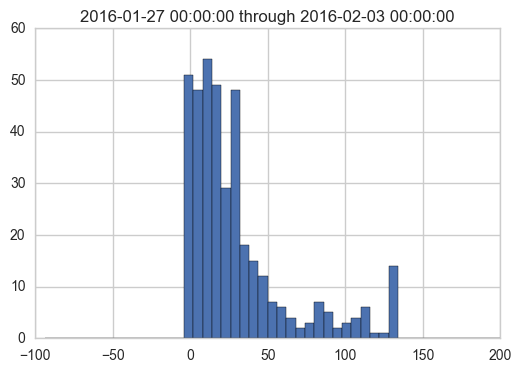

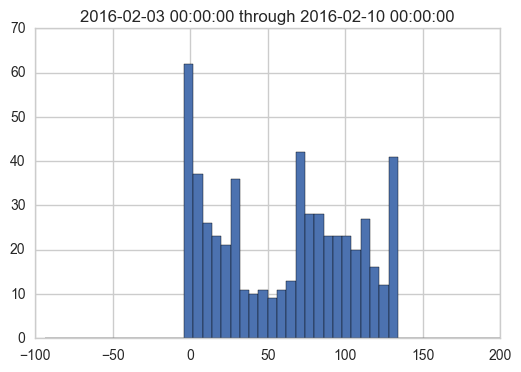

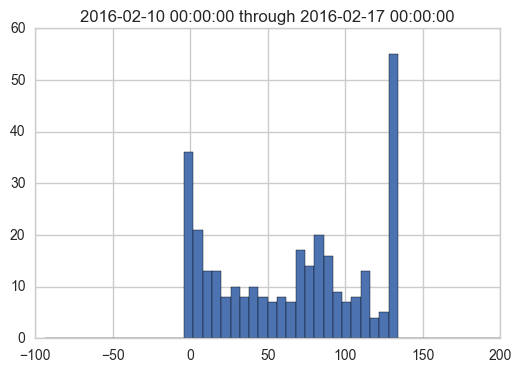

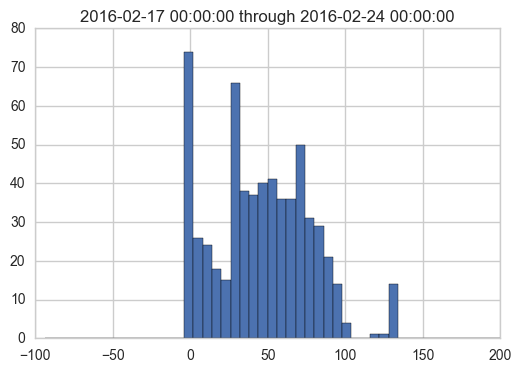

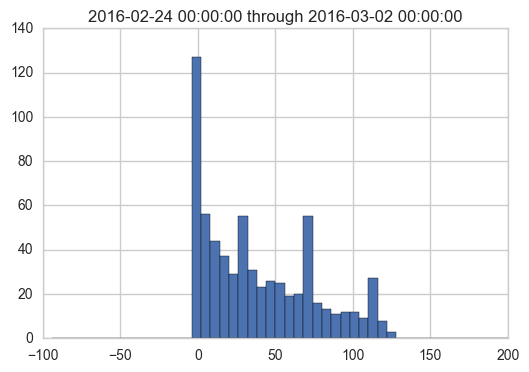

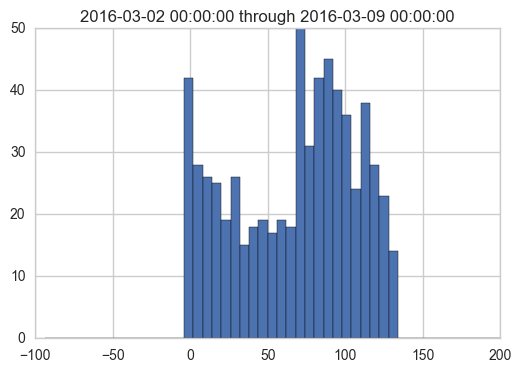

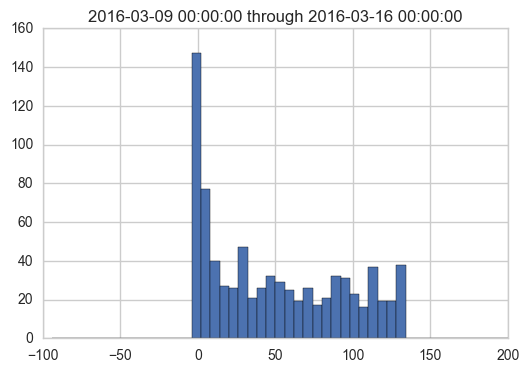

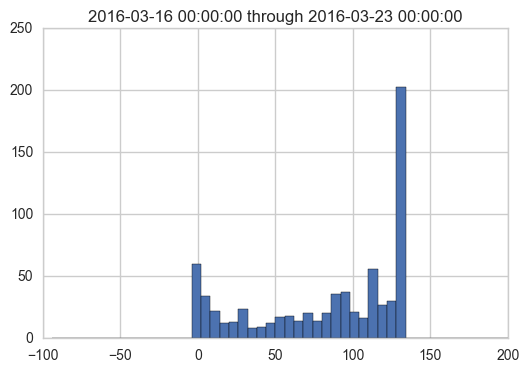

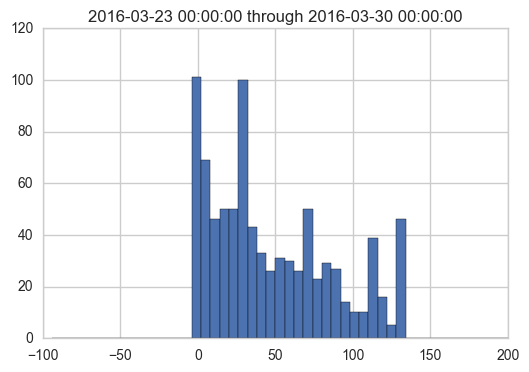

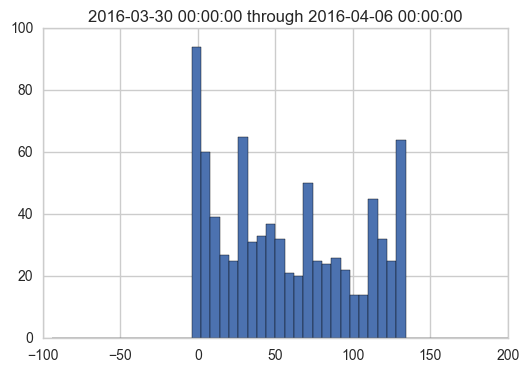

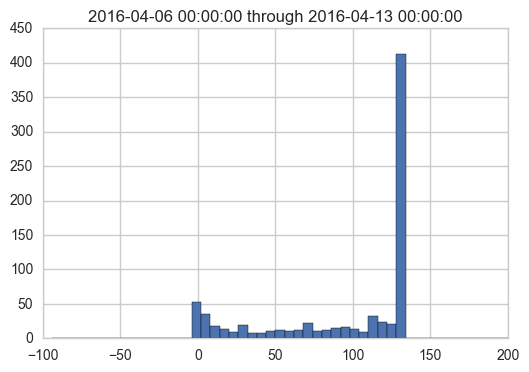

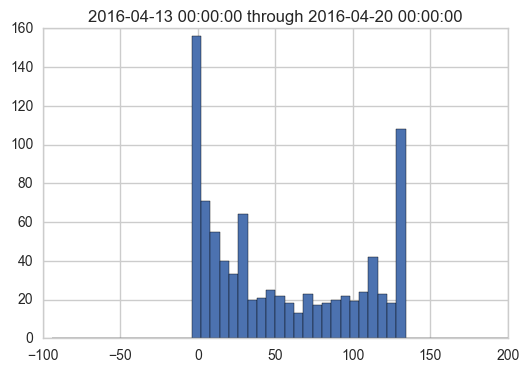

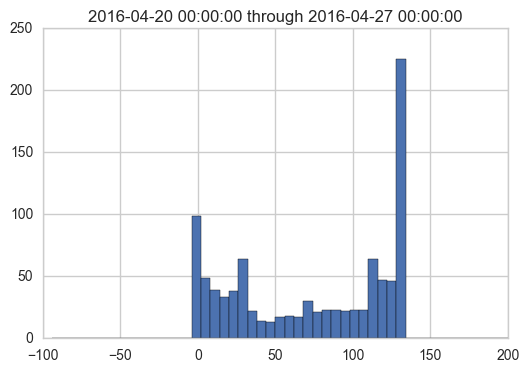

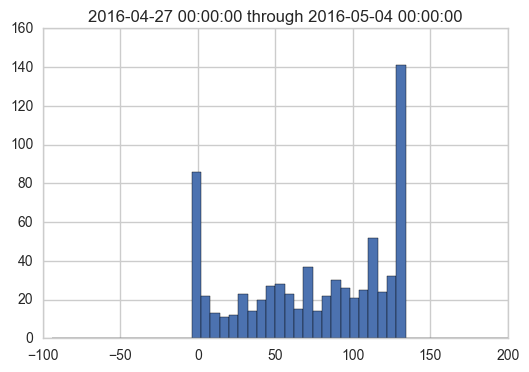

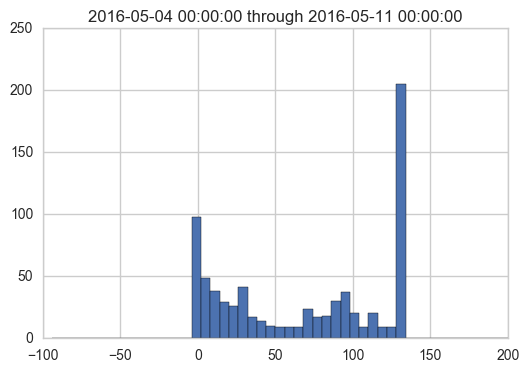

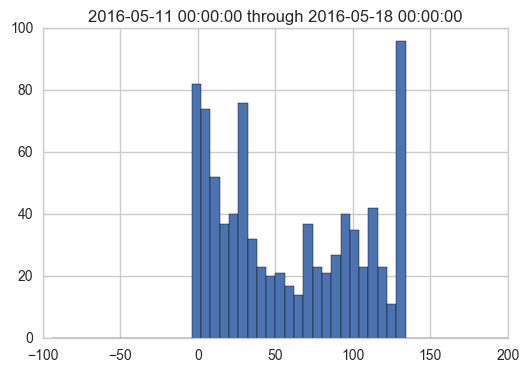

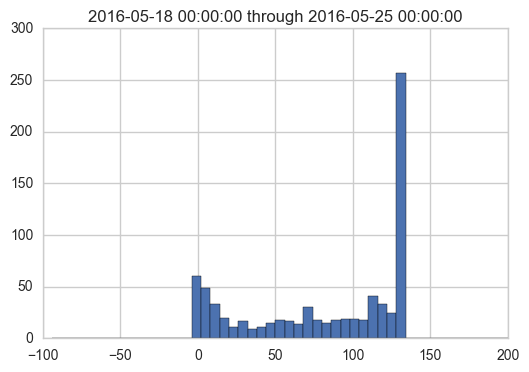

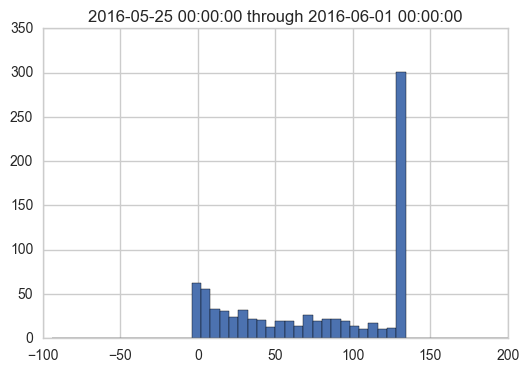

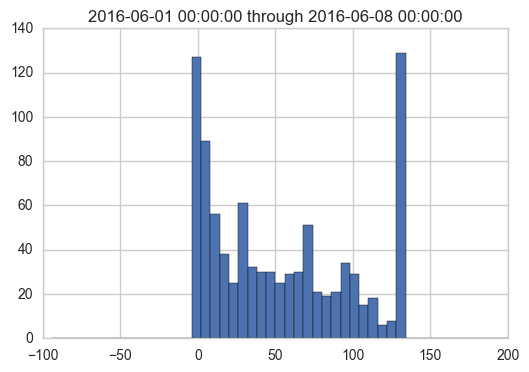

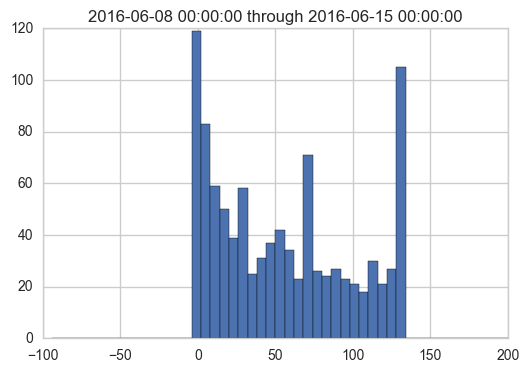

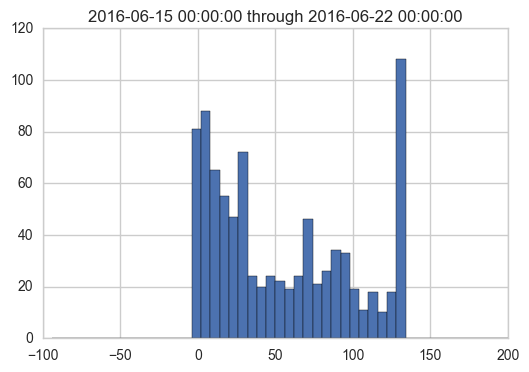

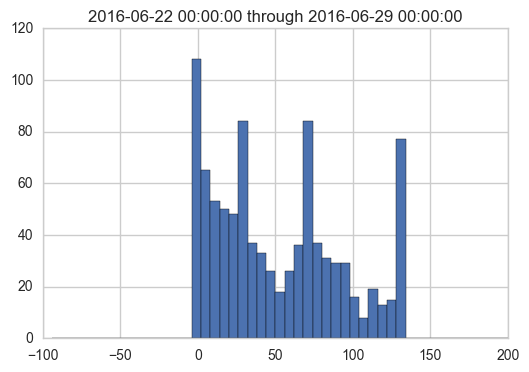

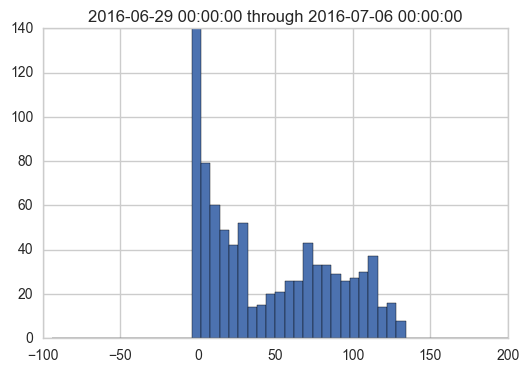

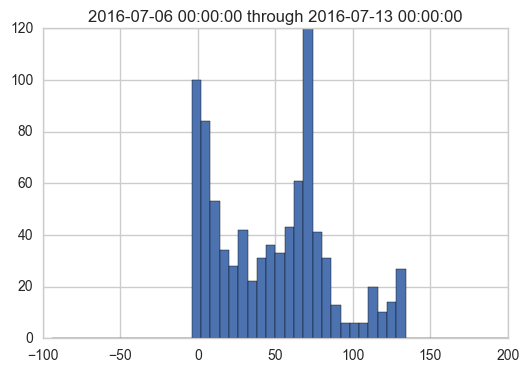

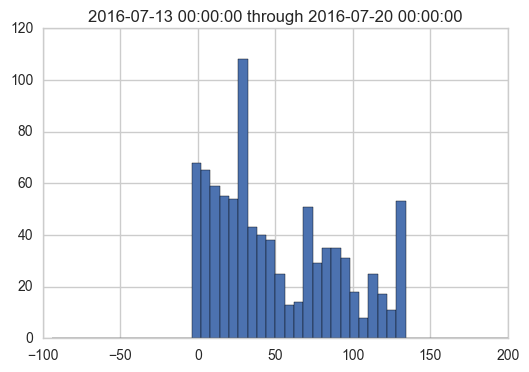

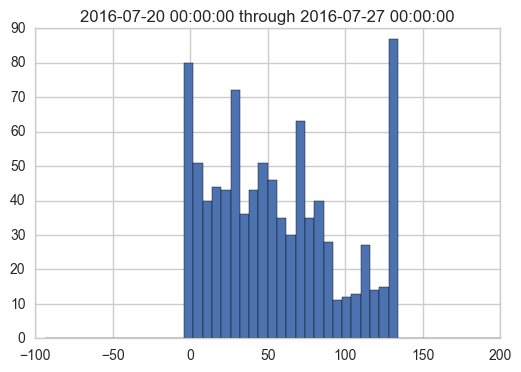

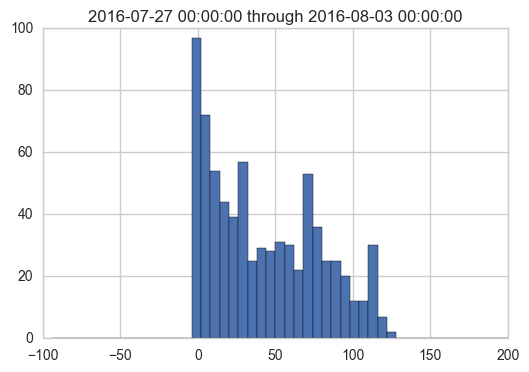

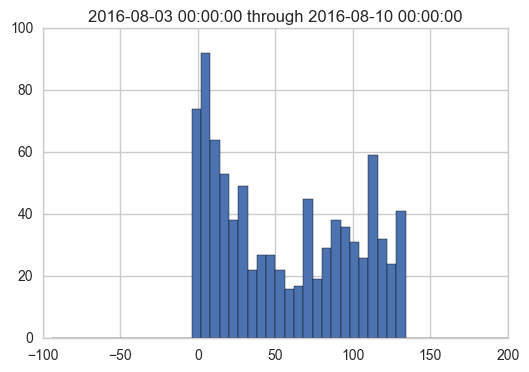

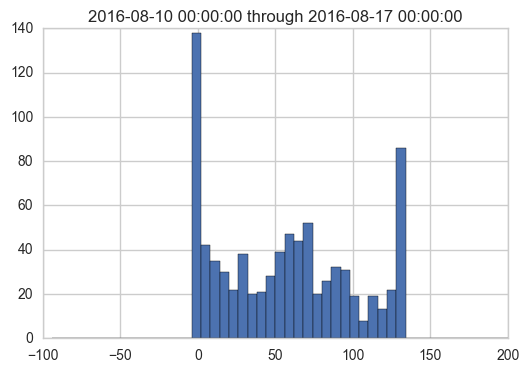

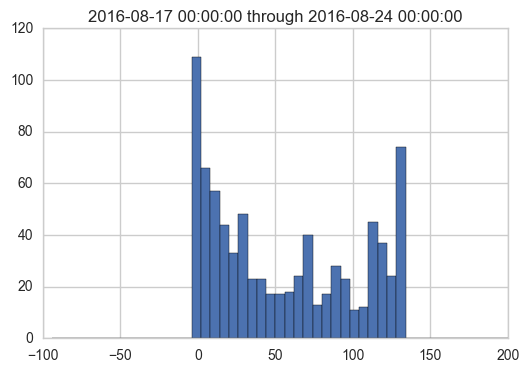

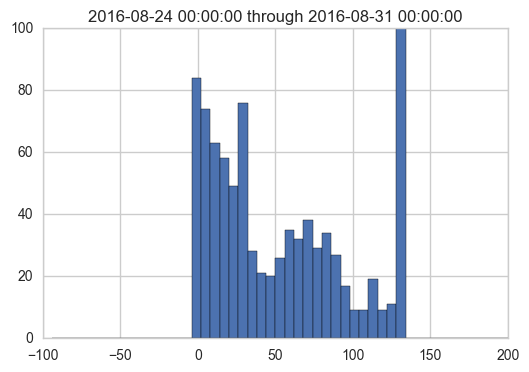

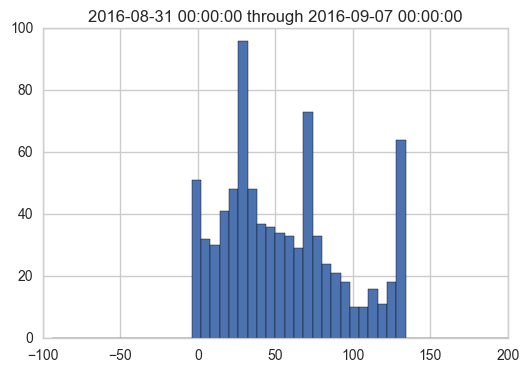

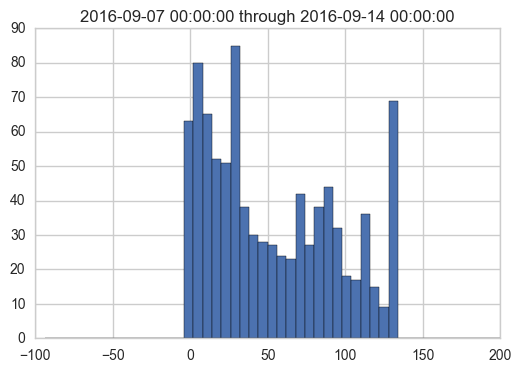

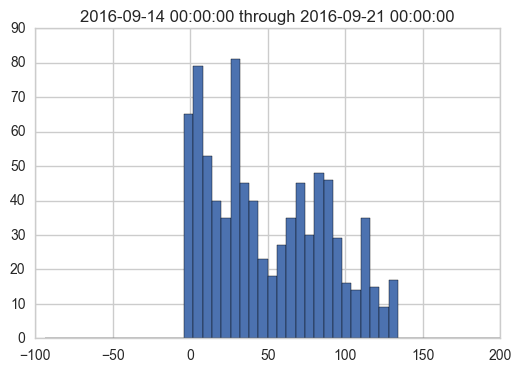

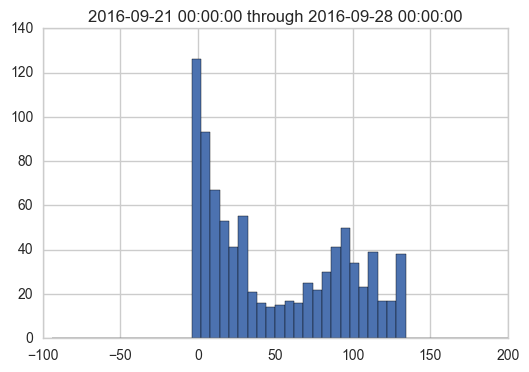

In [112]:
# Look at distributions each week
start = pd.to_datetime('2015-07-01 00:00:00')
end = pd.to_datetime('2015-07-08 00:00:00')
stop = pd.to_datetime('2016-10-01 00:00:00')
add_week = datetime.timedelta(days=7)

while end <= stop:
    pd.DataFrame.hist(discrete_bike_data_31116[((discrete_bike_data_31116['Date'] >= start) & 
                                                (discrete_bike_data_31116['Date'] <= end))], 
                      column='Count_Percent_Capacity', 
                      bins=50, range=(-100,200))
    pl.title(str(start) + ' through ' + str(end))
    start += add_week
    end += add_week

/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


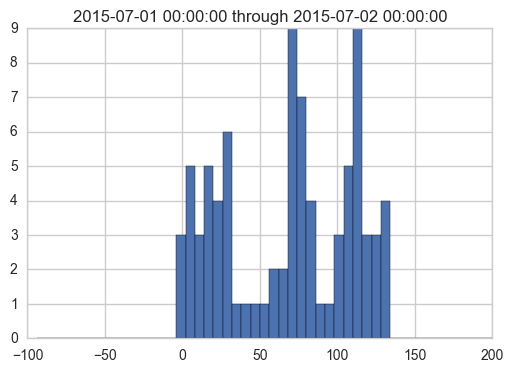

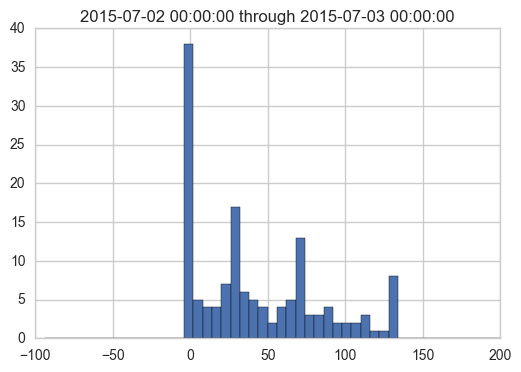

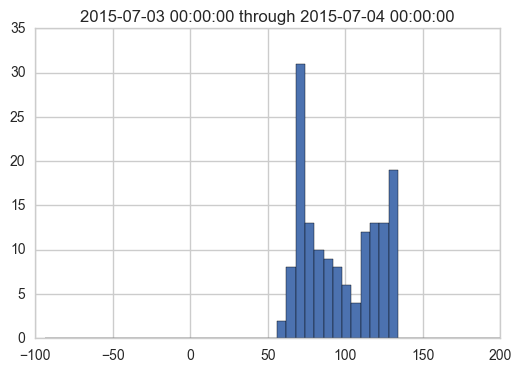

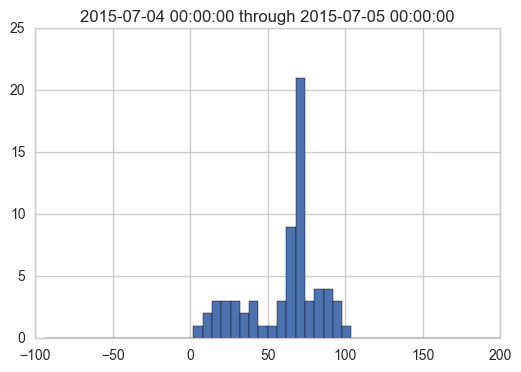

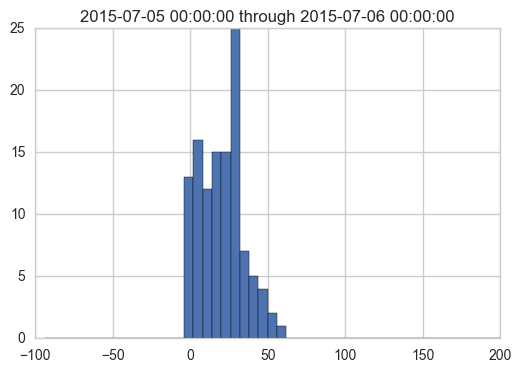

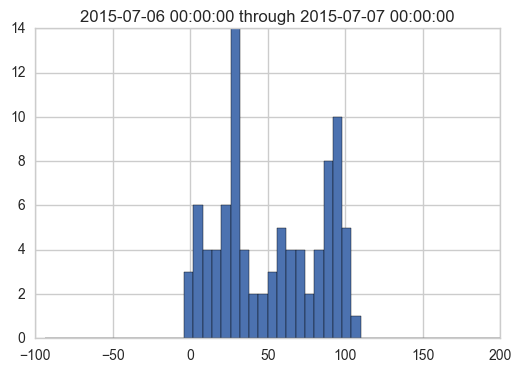

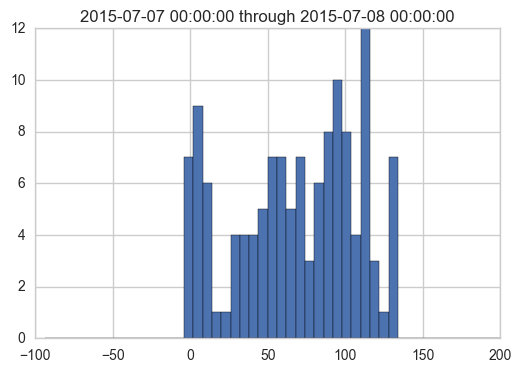

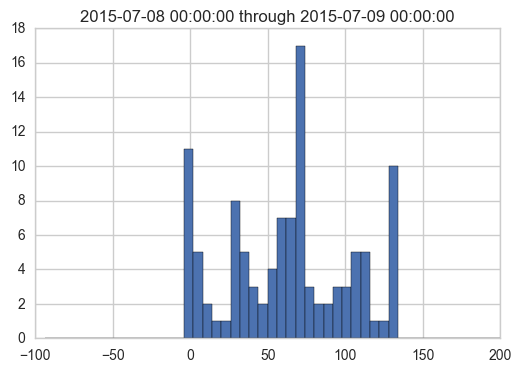

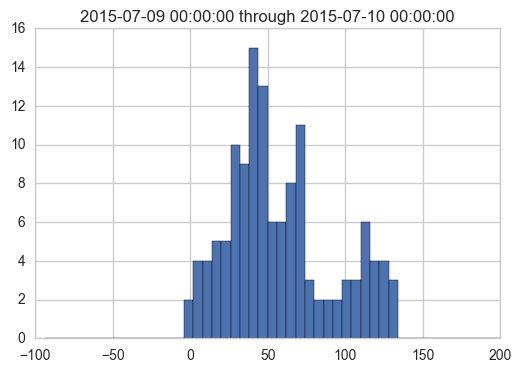

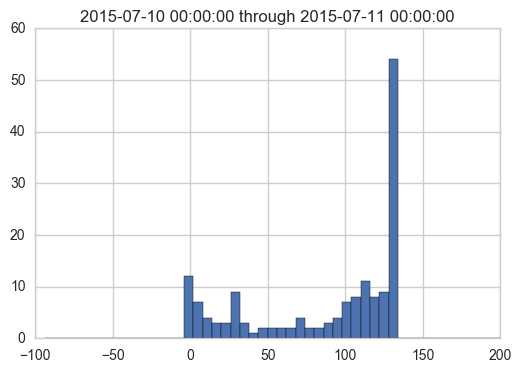

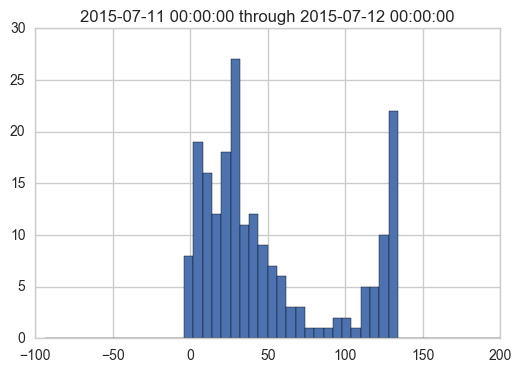

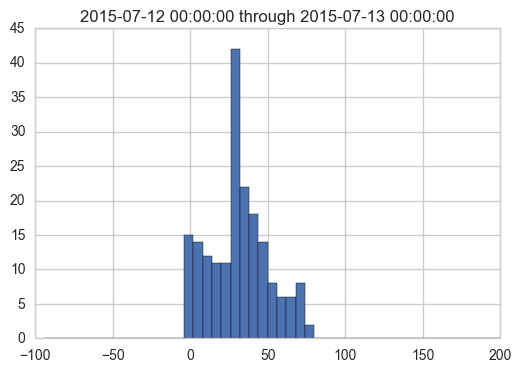

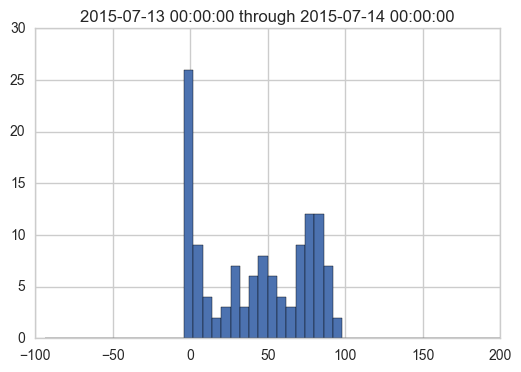

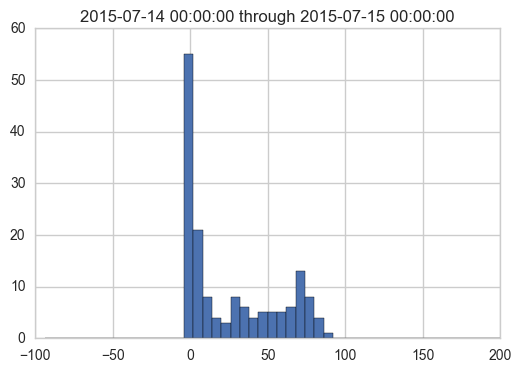

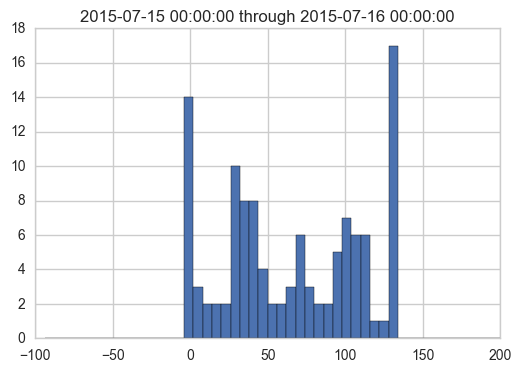

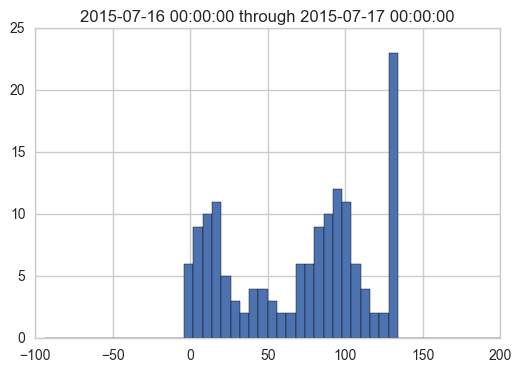

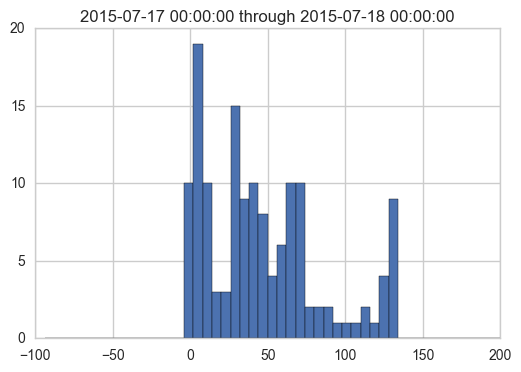

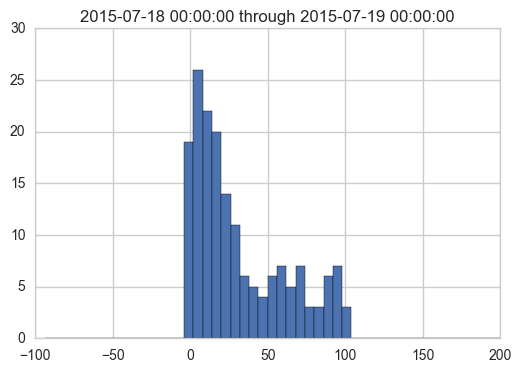

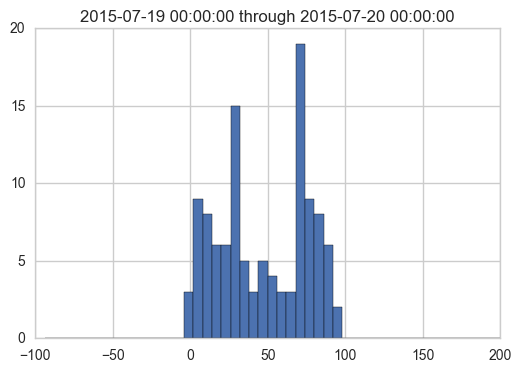

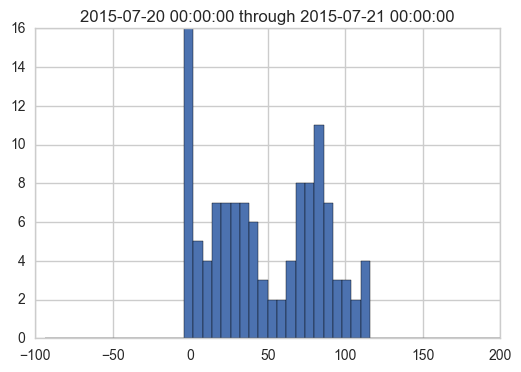

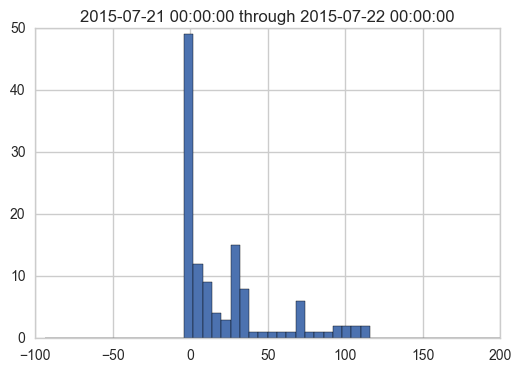

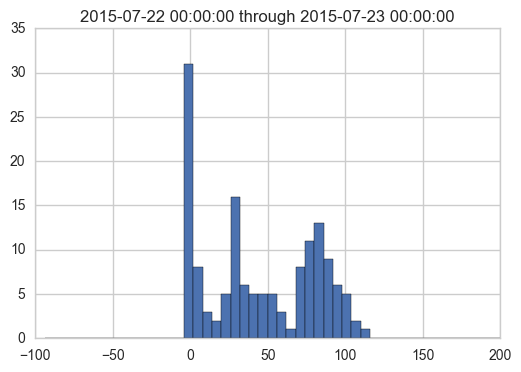

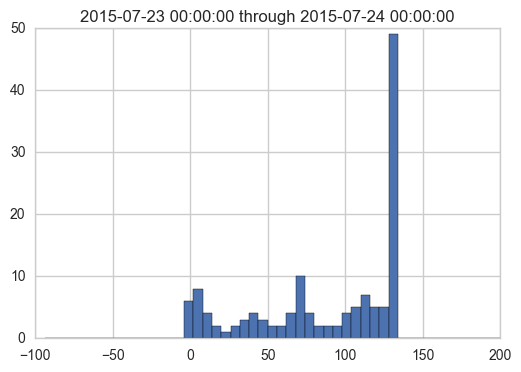

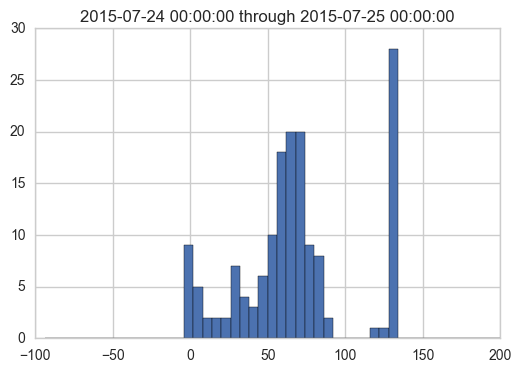

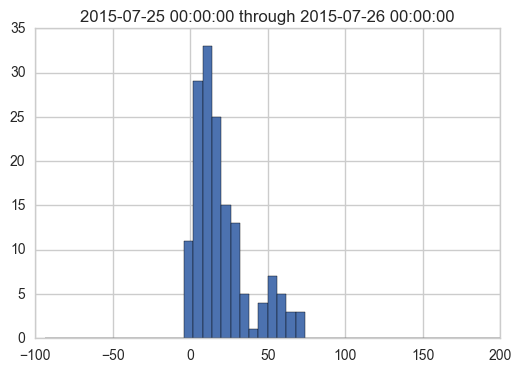

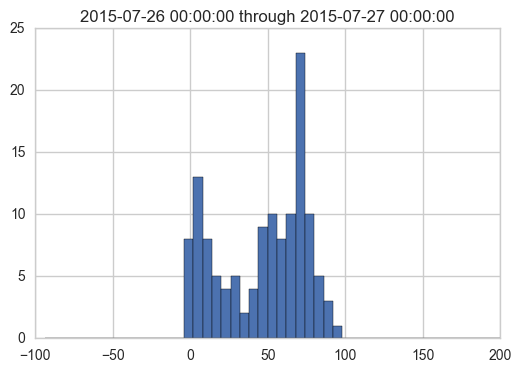

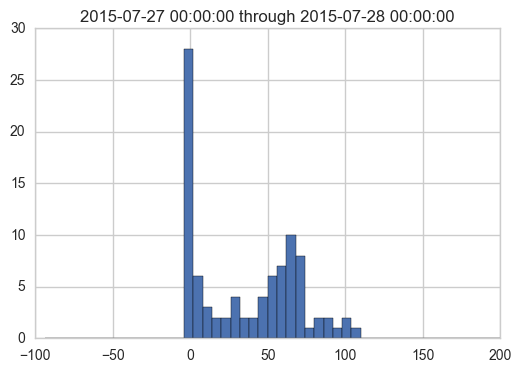

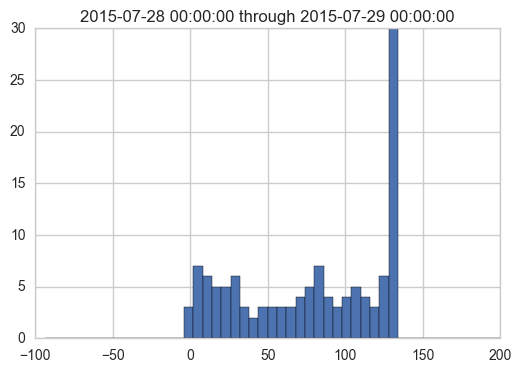

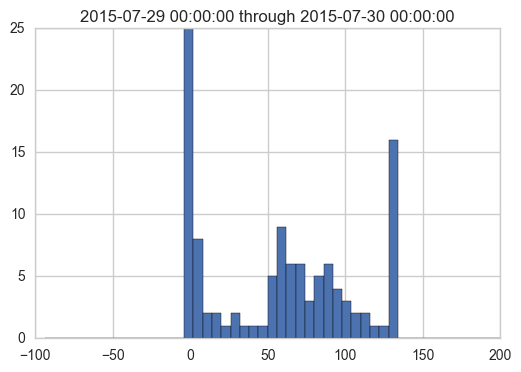

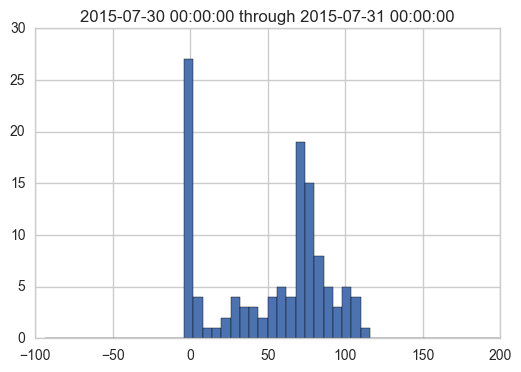

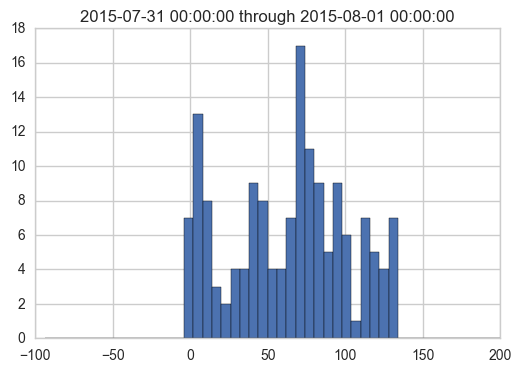

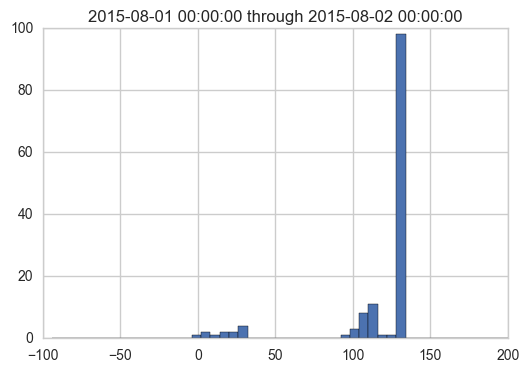

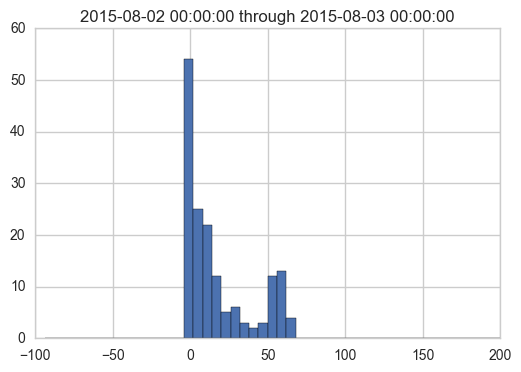

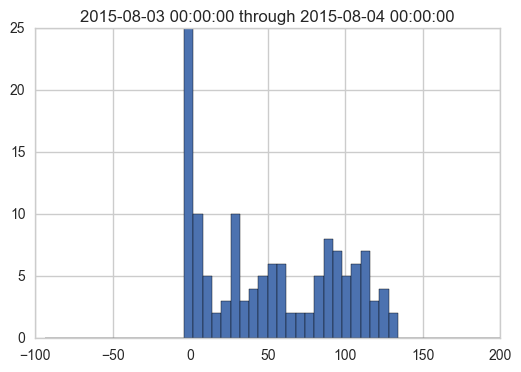

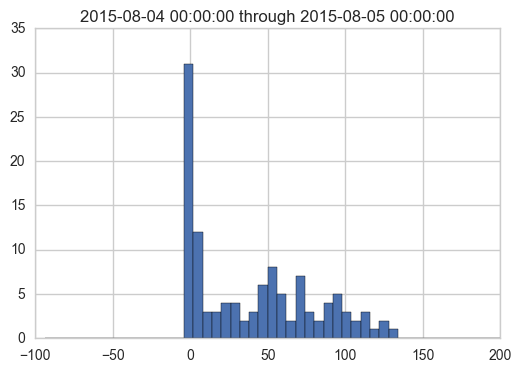

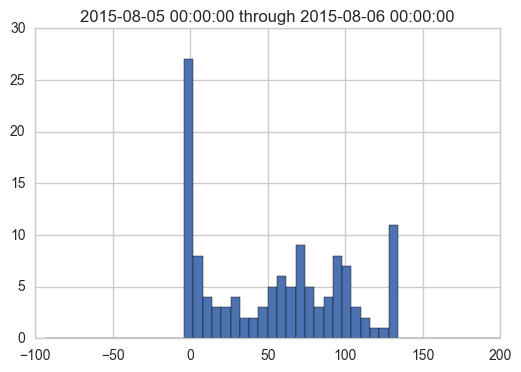

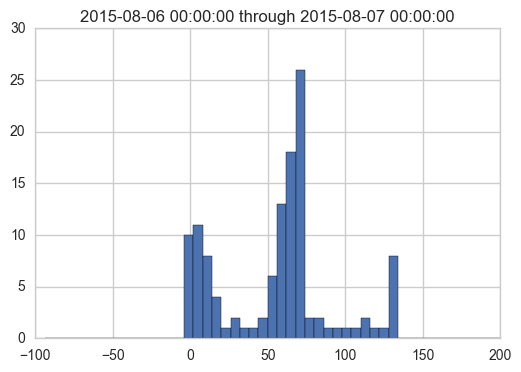

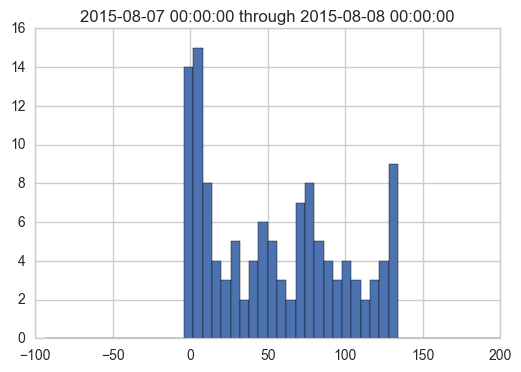

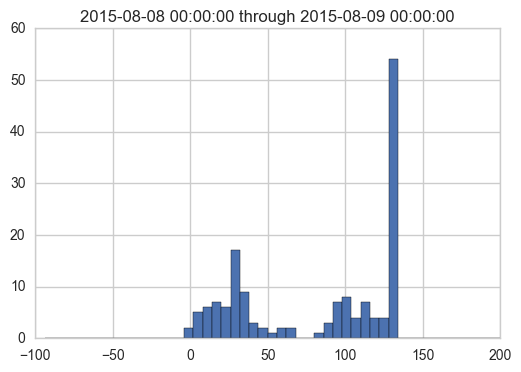

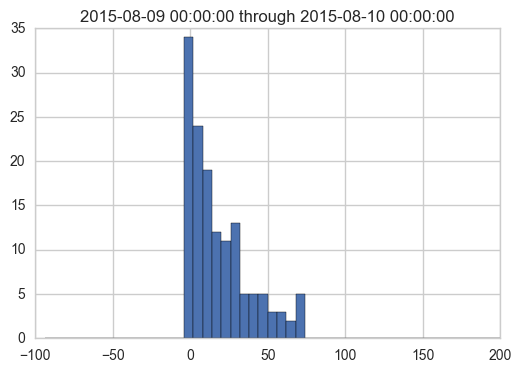

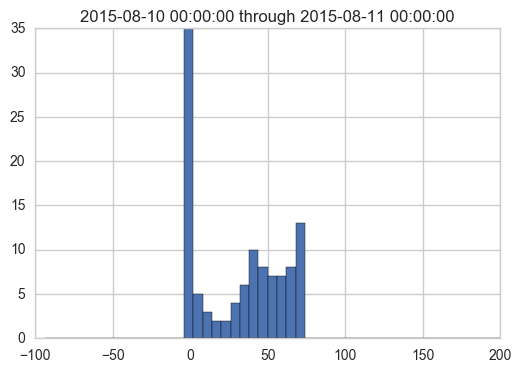

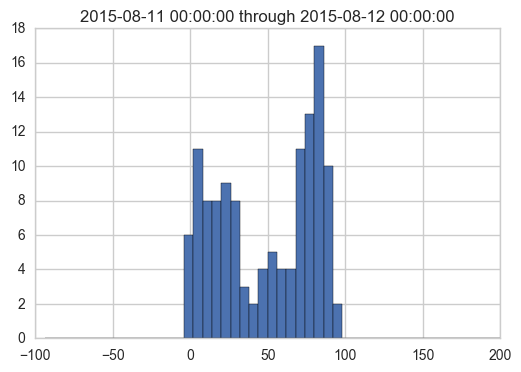

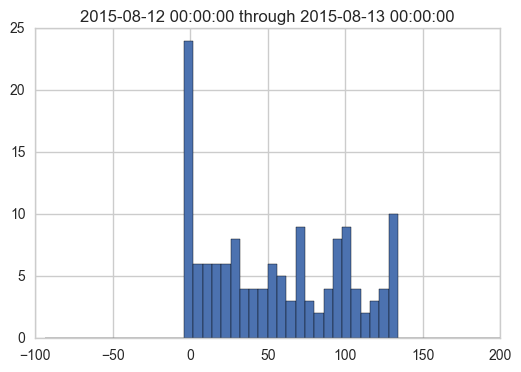

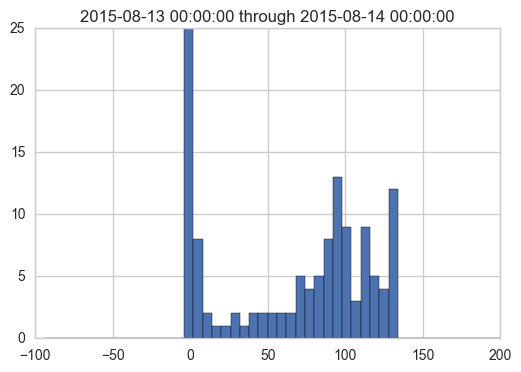

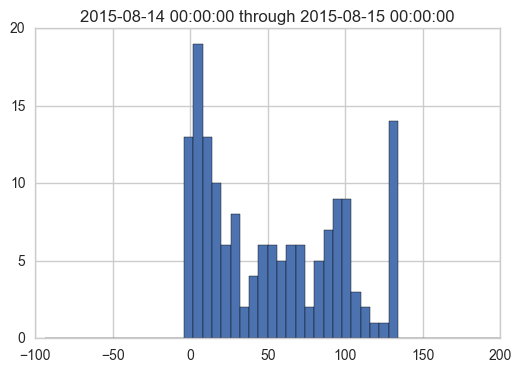

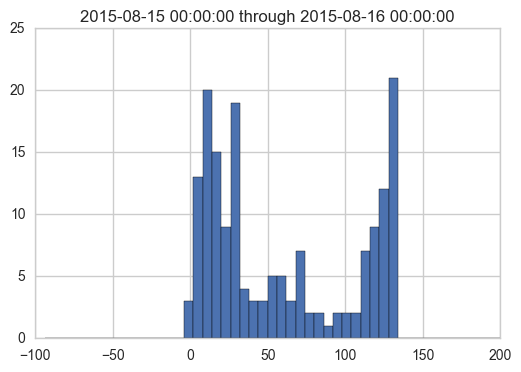

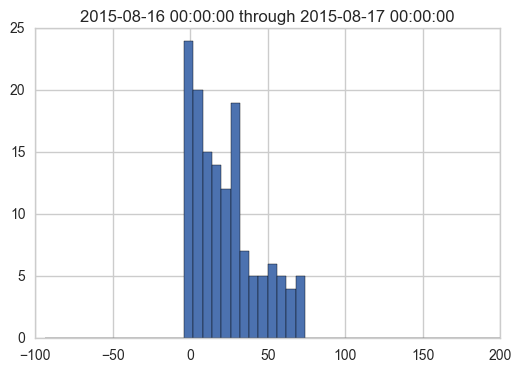

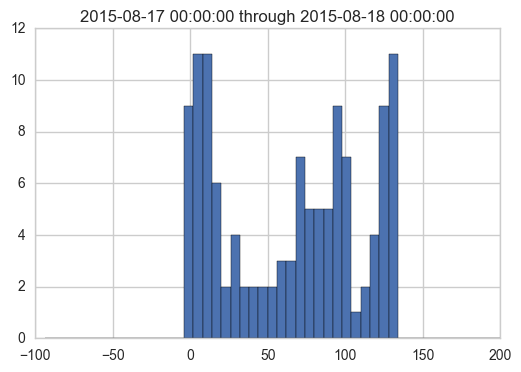

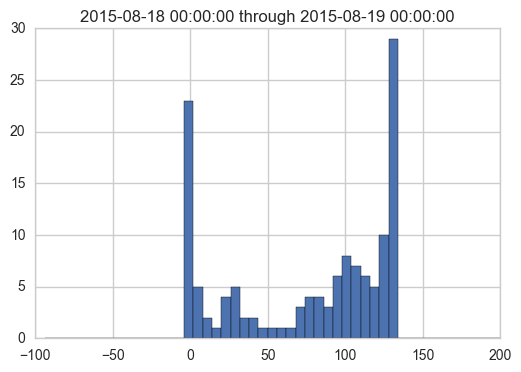

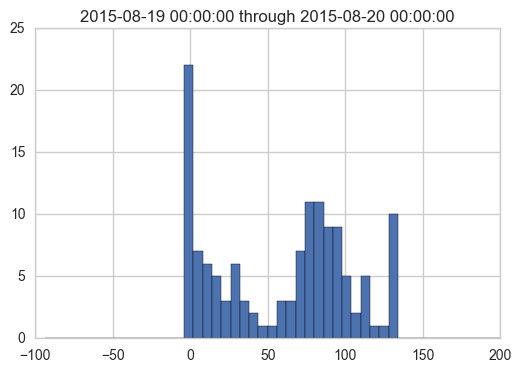

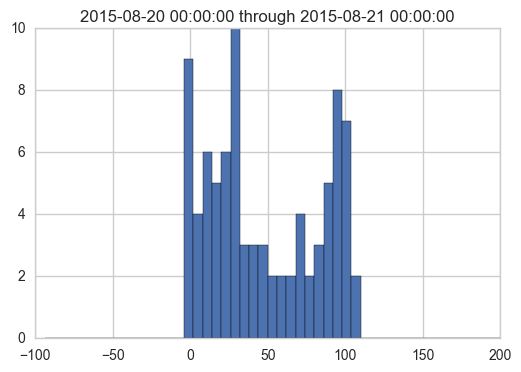

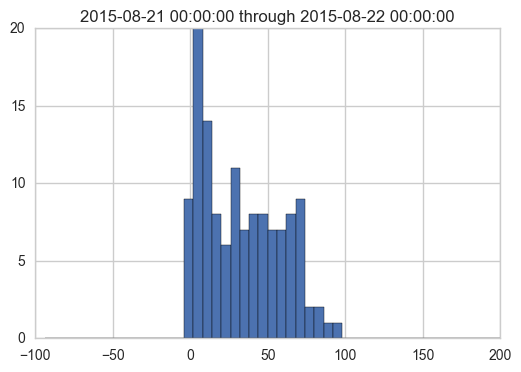

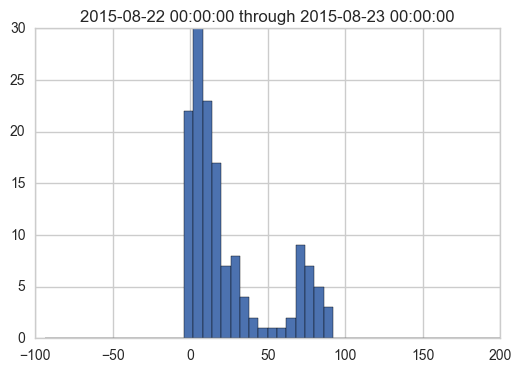

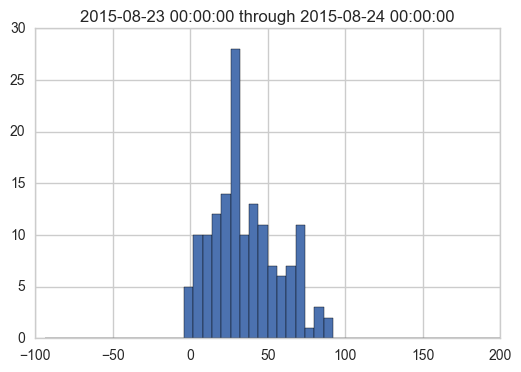

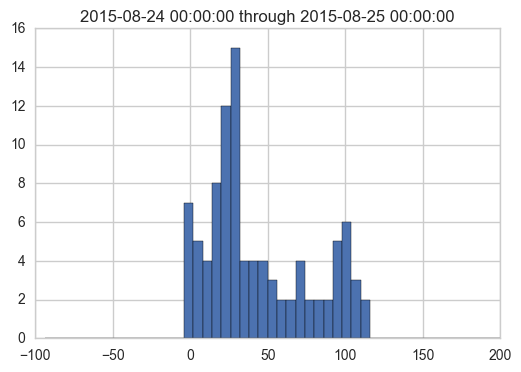

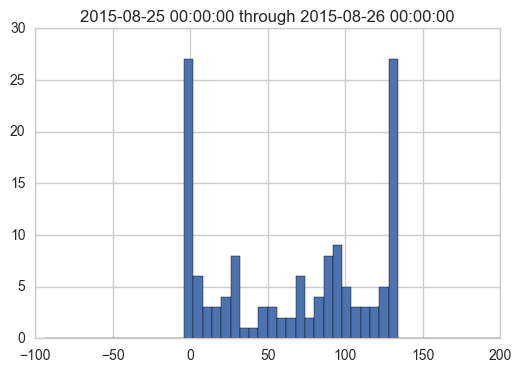

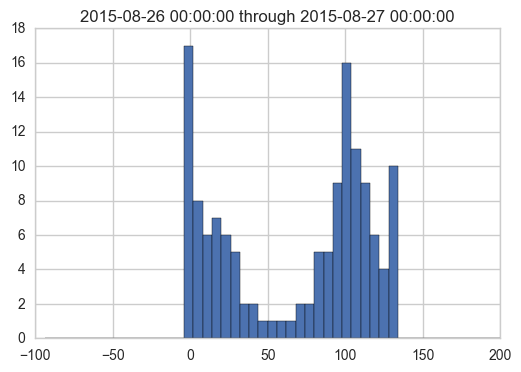

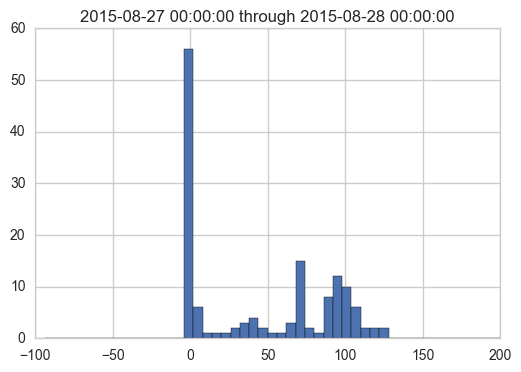

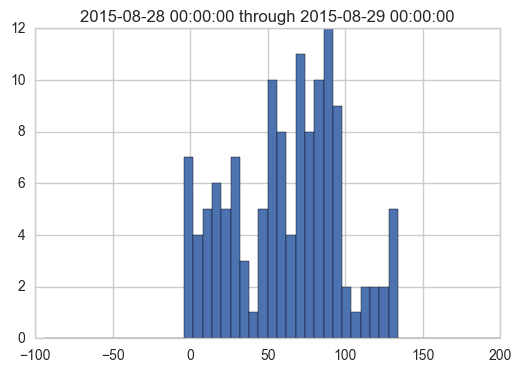

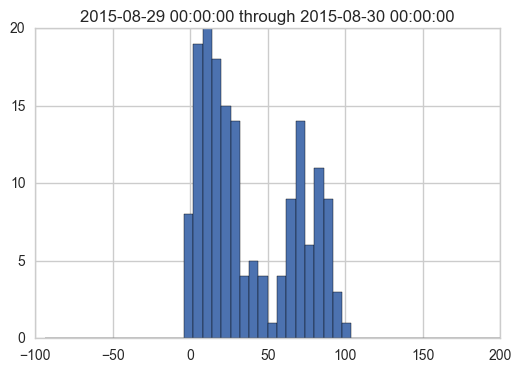

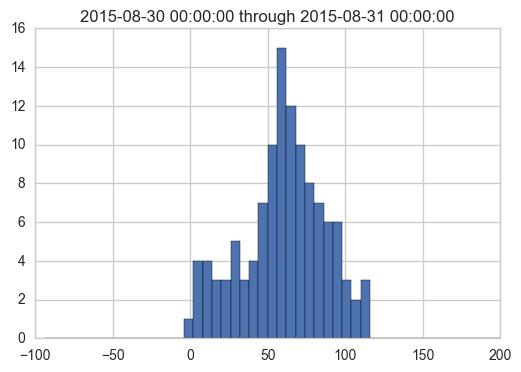

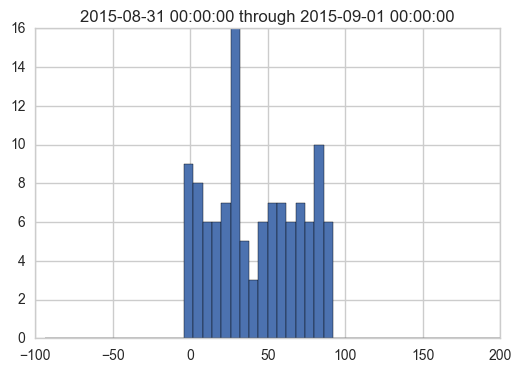

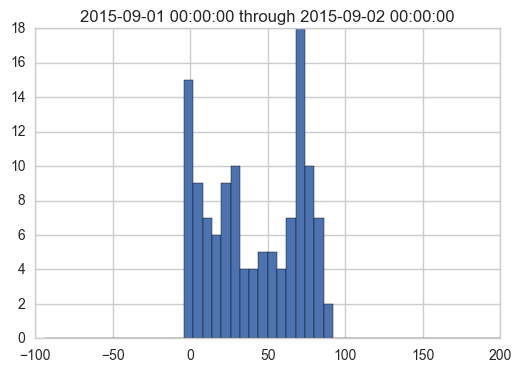

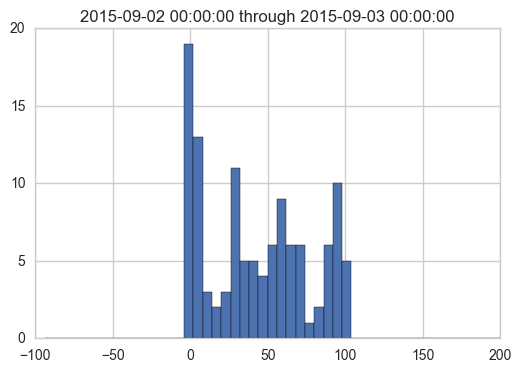

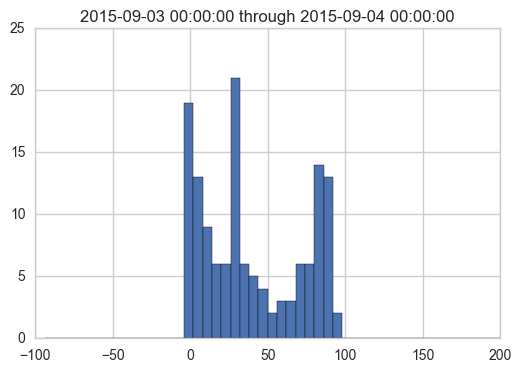

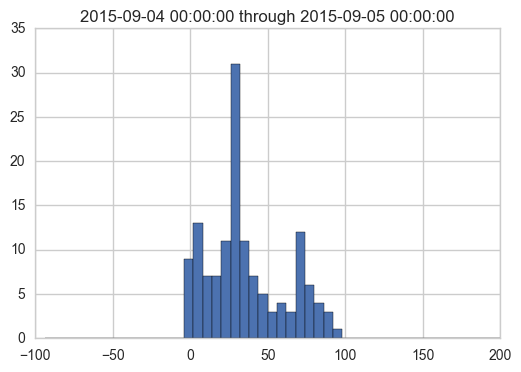

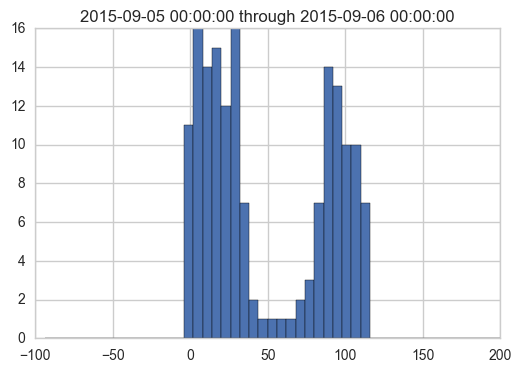

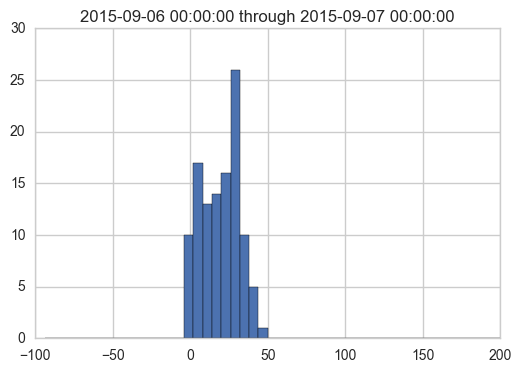

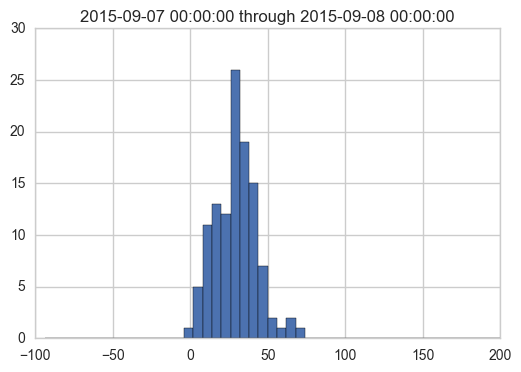

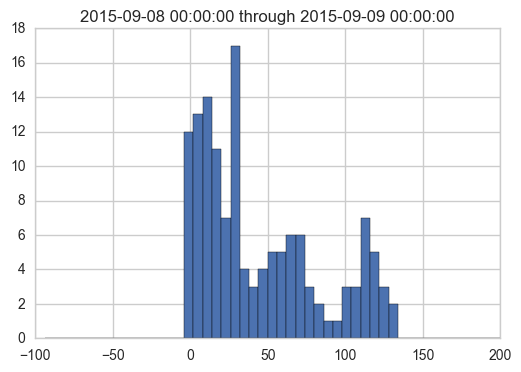

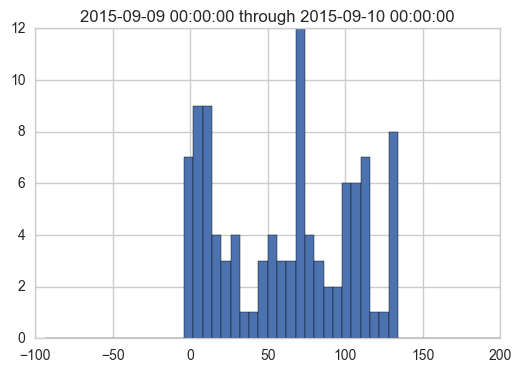

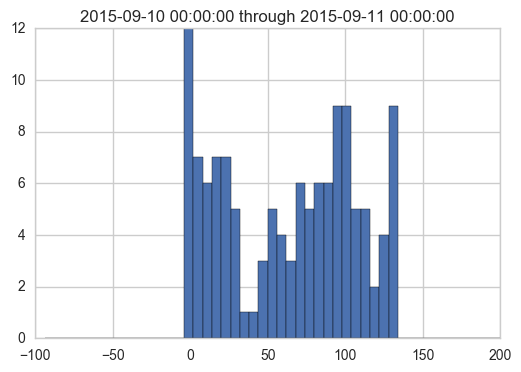

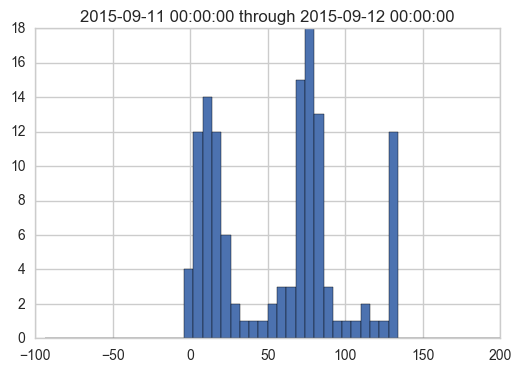

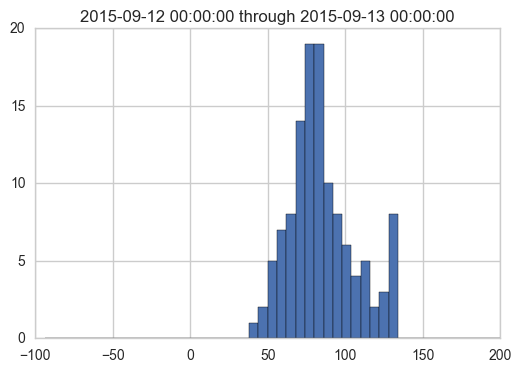

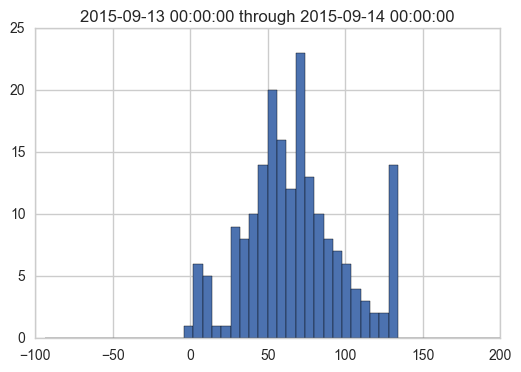

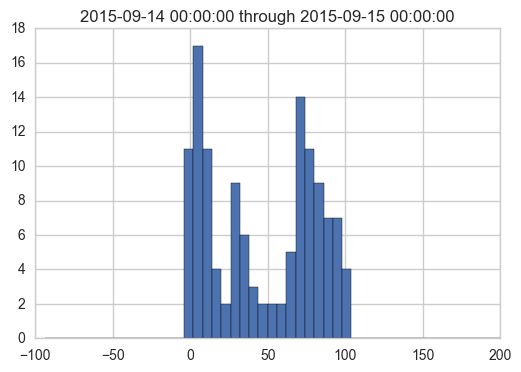

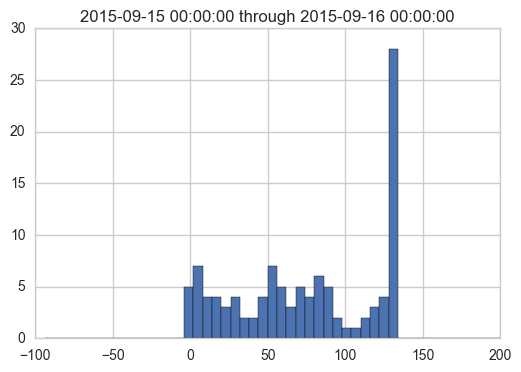

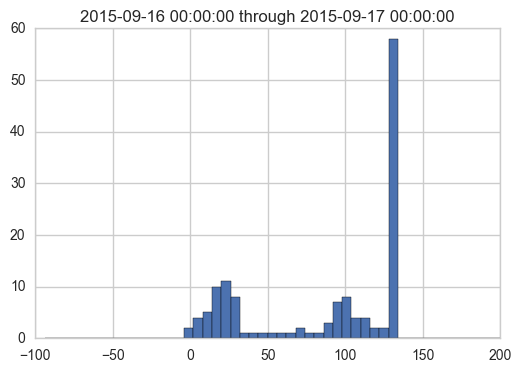

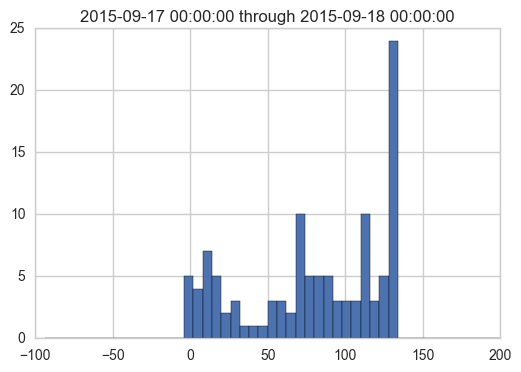

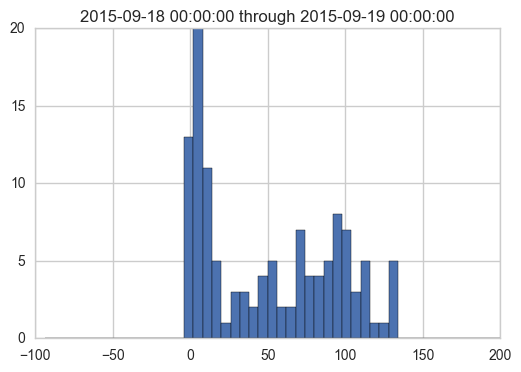

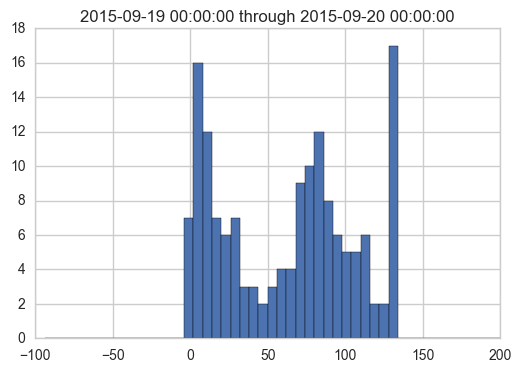

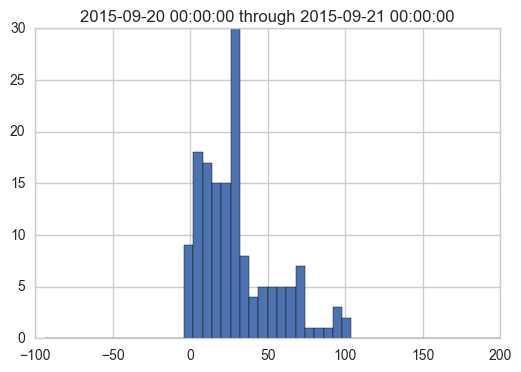

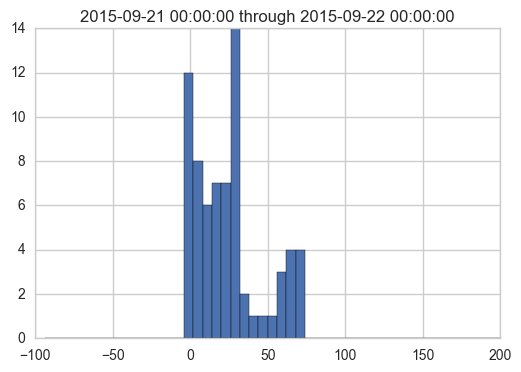

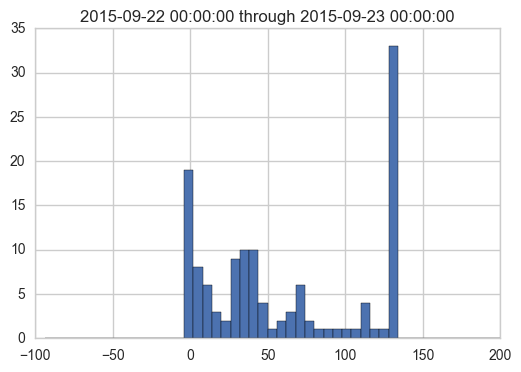

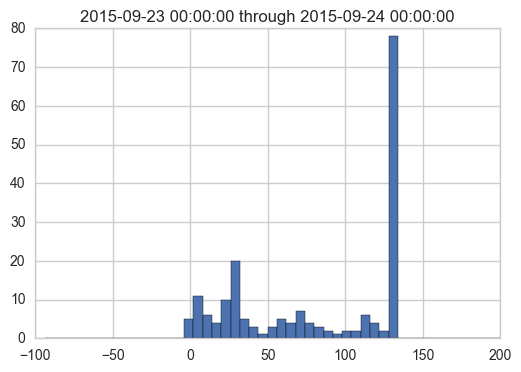

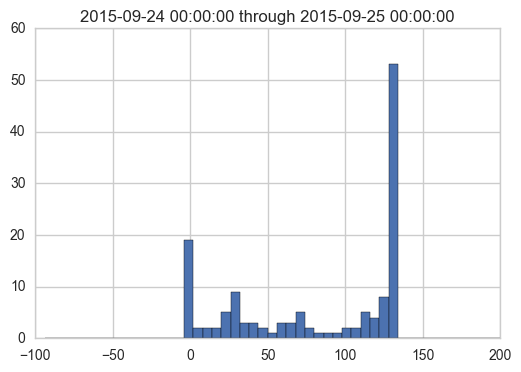

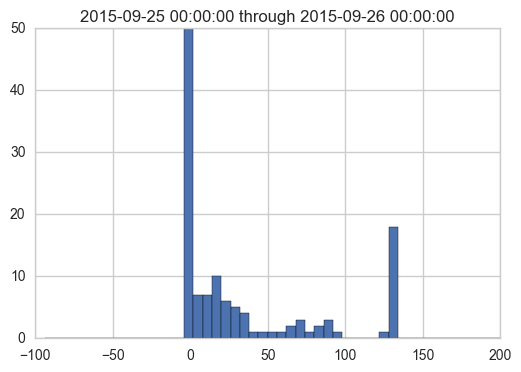

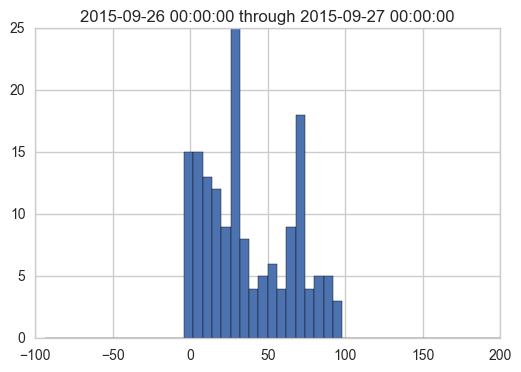

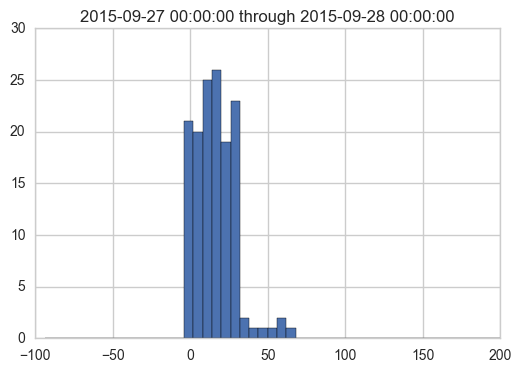

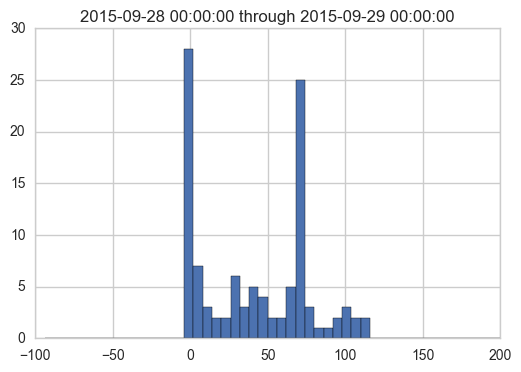

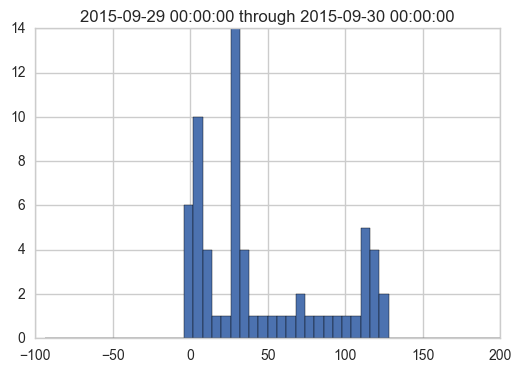

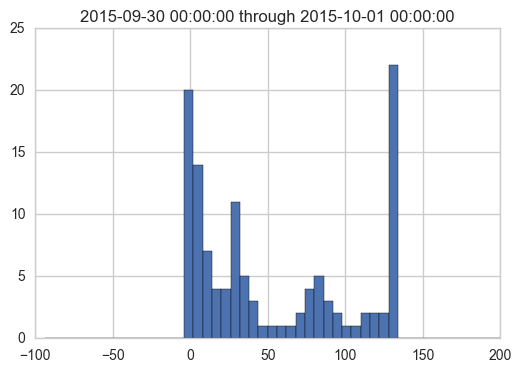

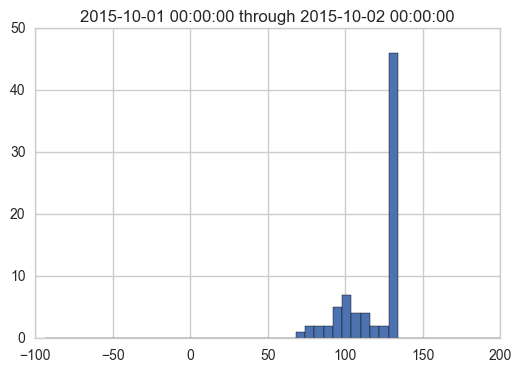

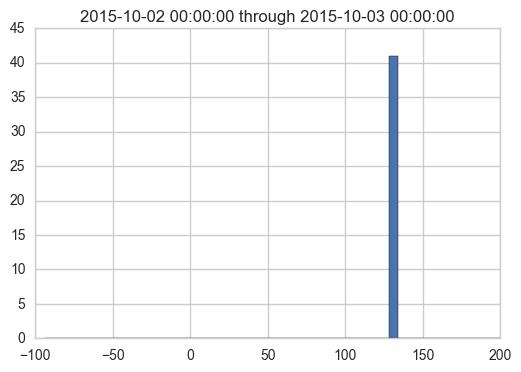

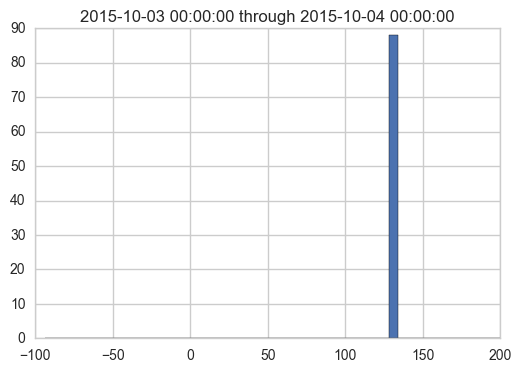

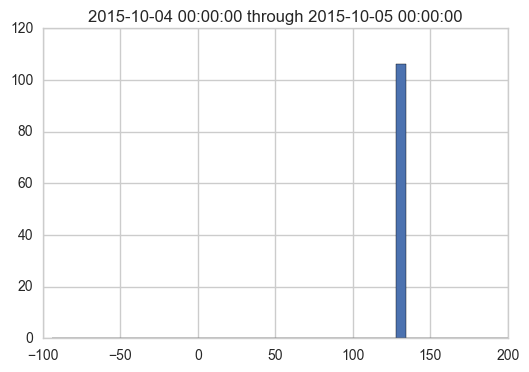

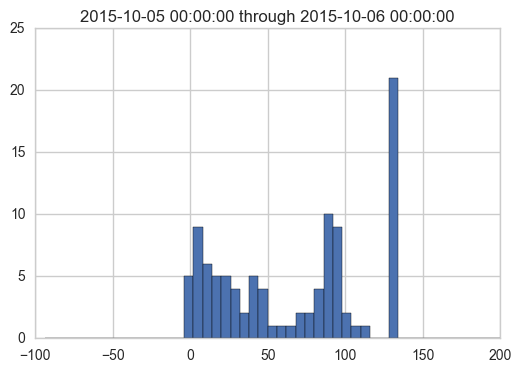

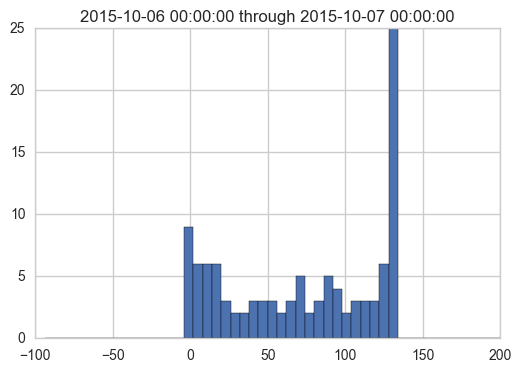

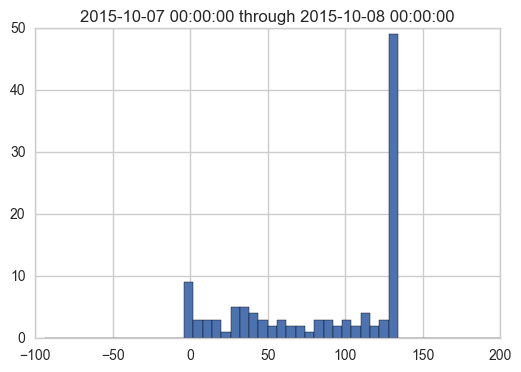

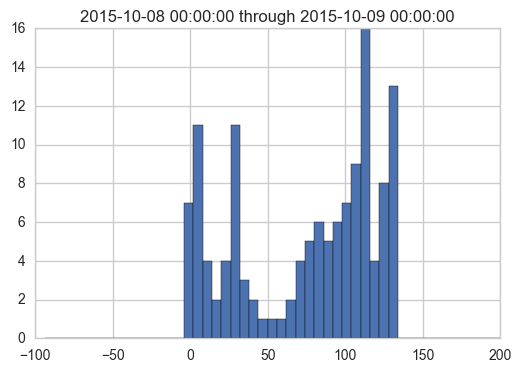

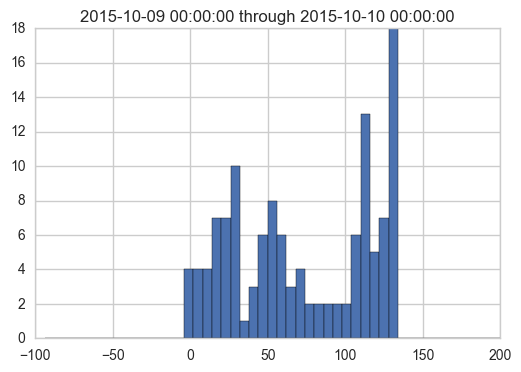

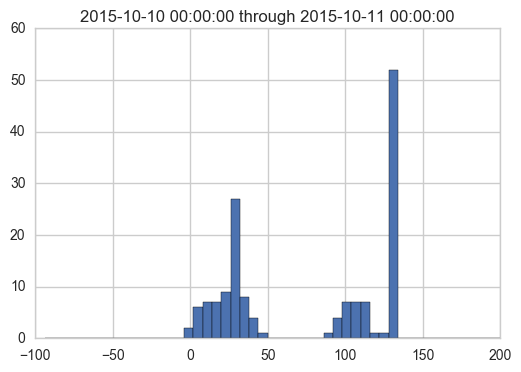

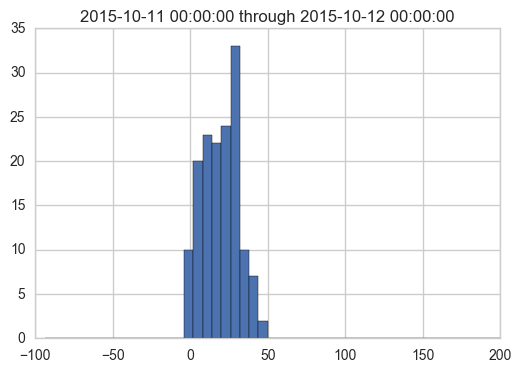

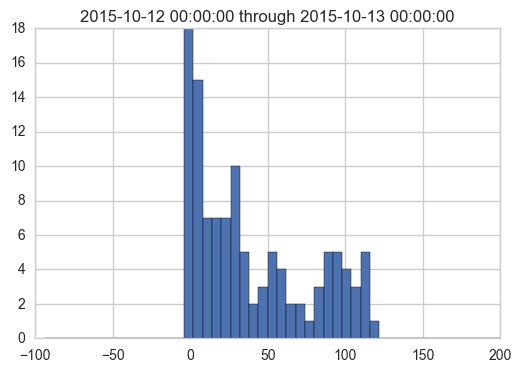

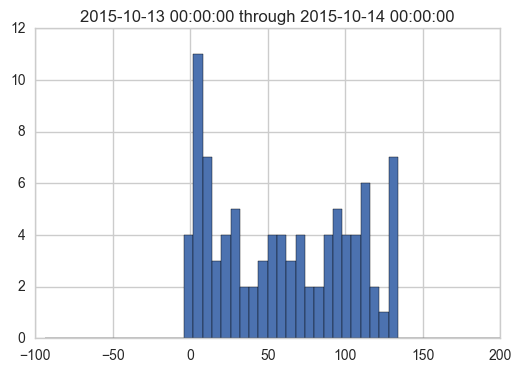

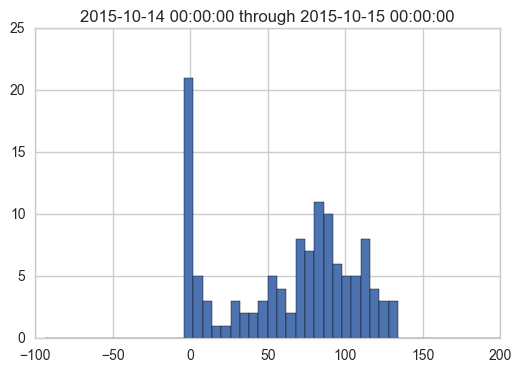

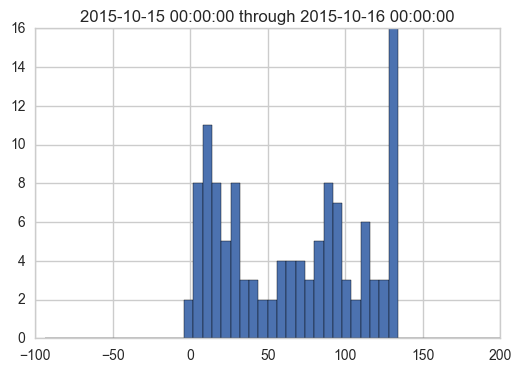

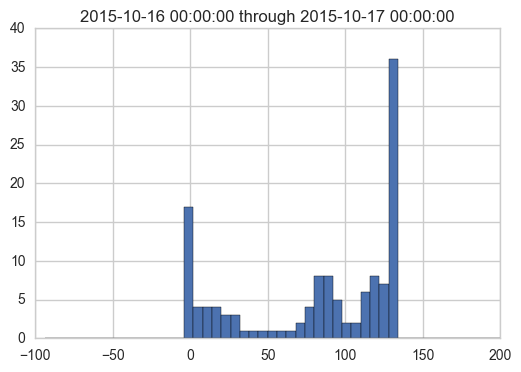

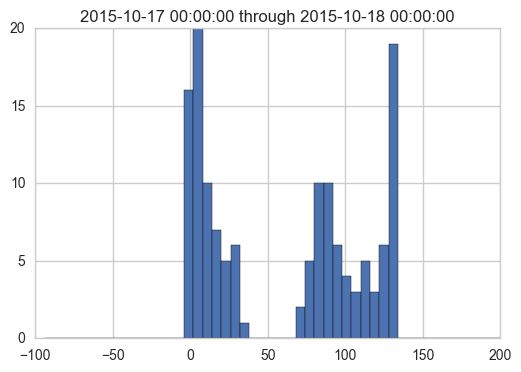

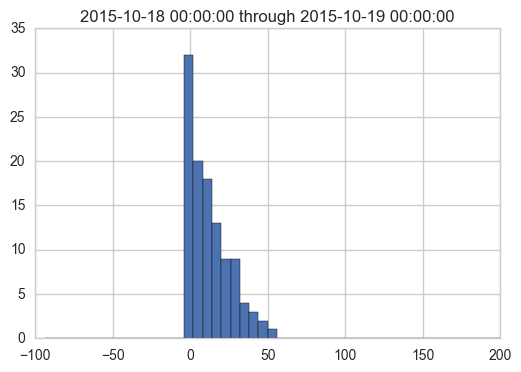

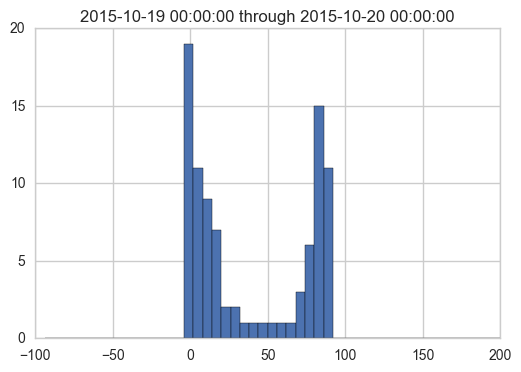

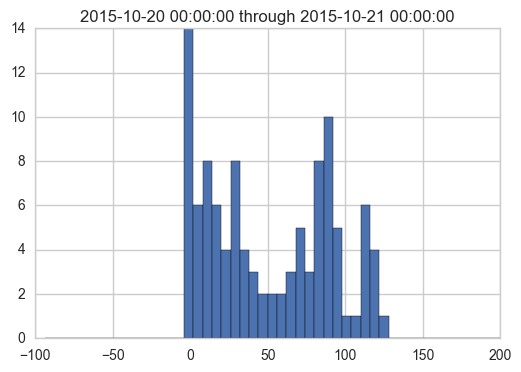

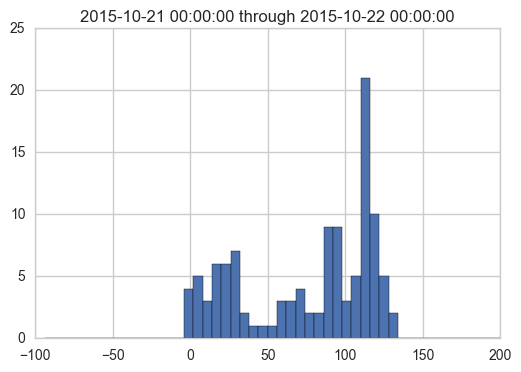

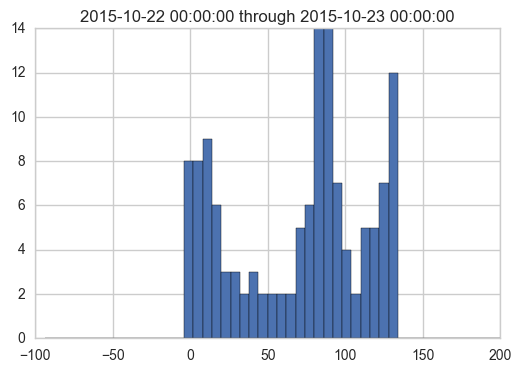

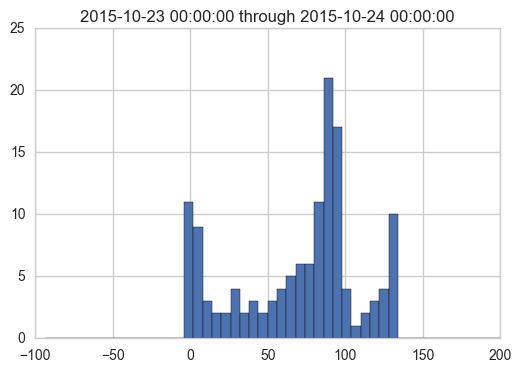

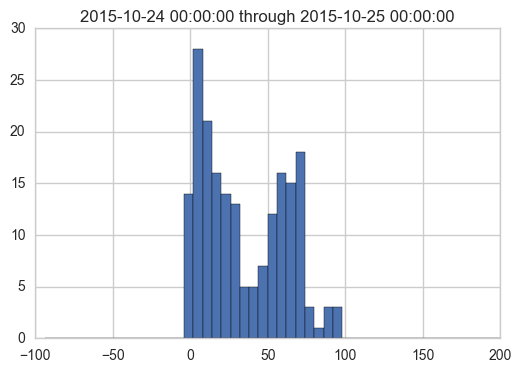

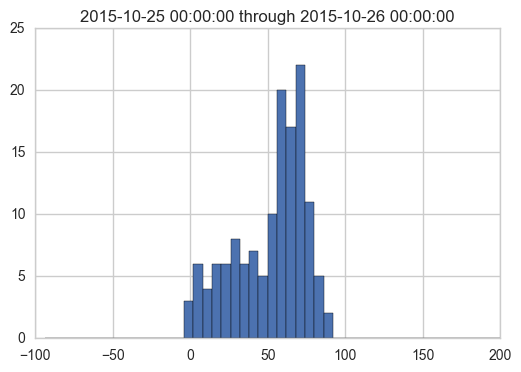

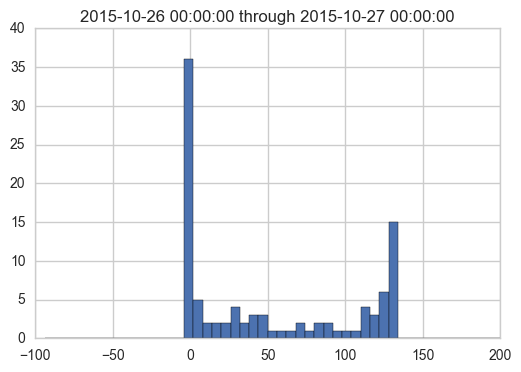

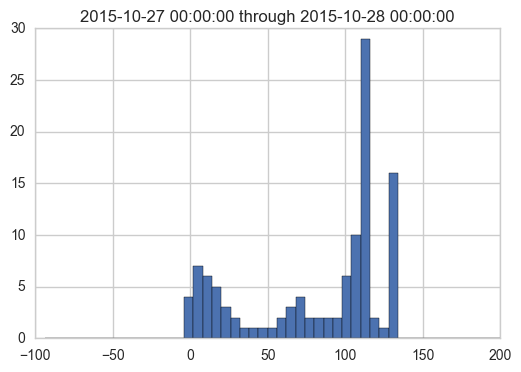

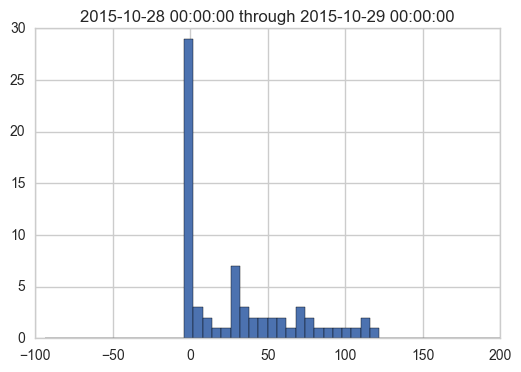

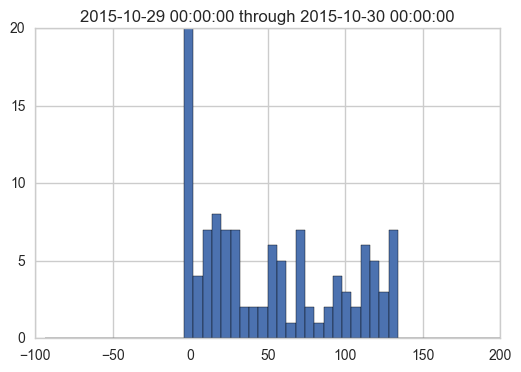

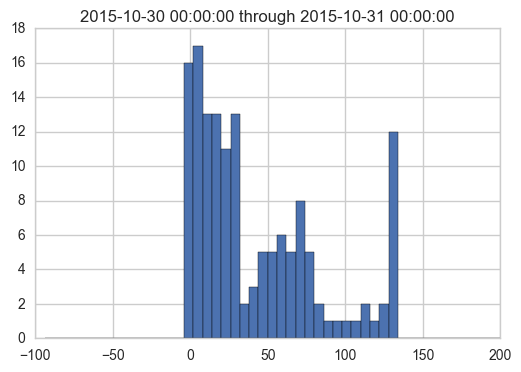

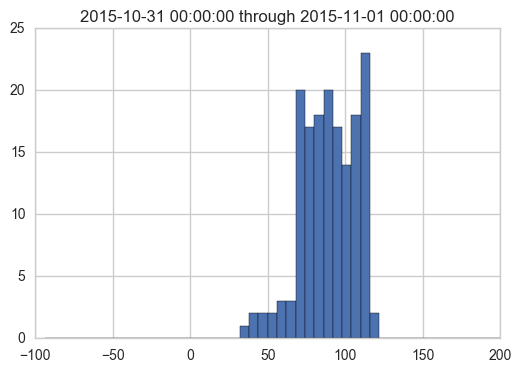

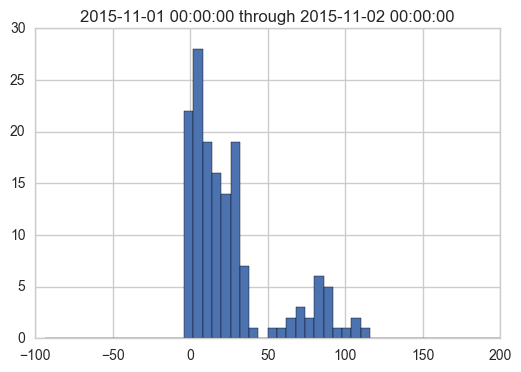

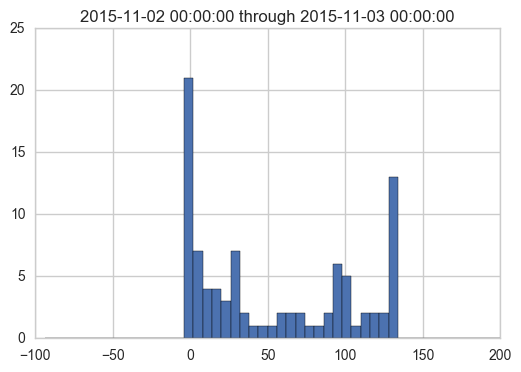

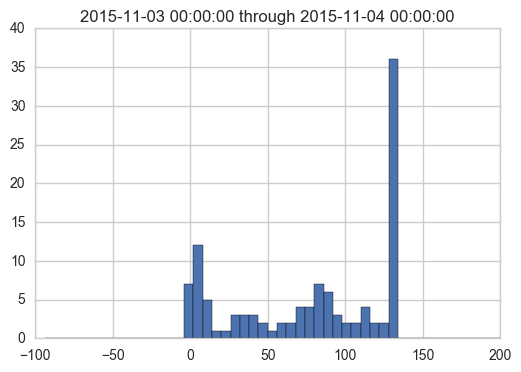

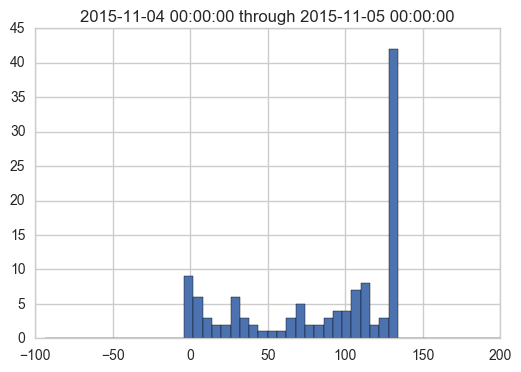

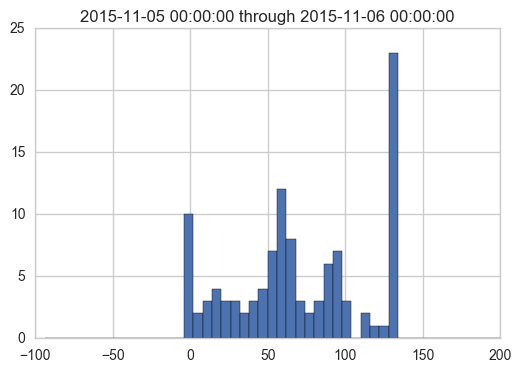

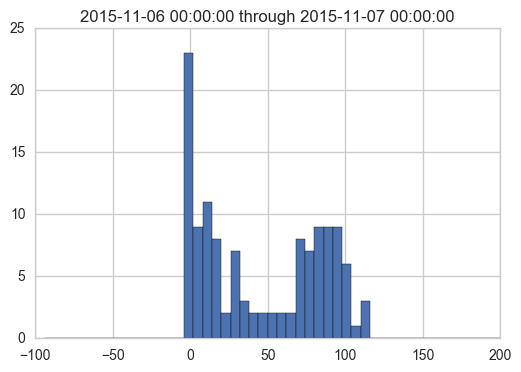

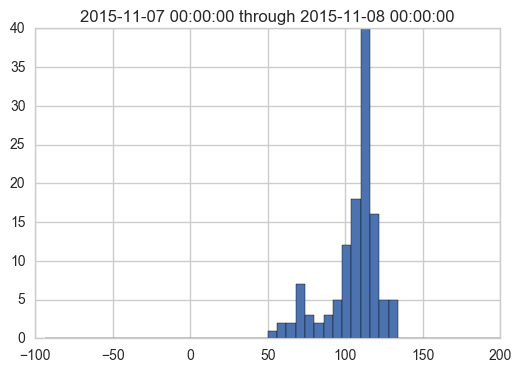

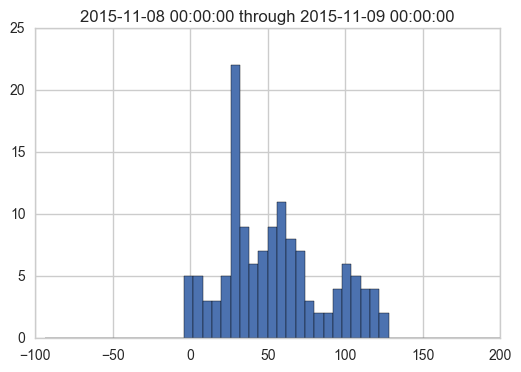

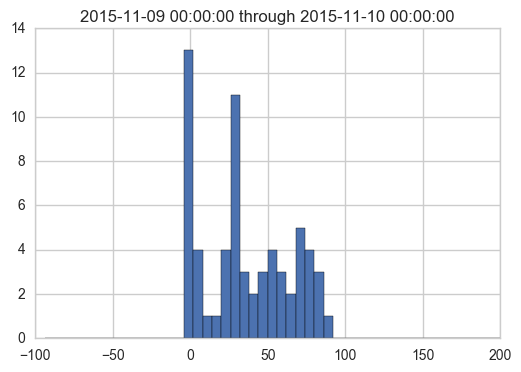

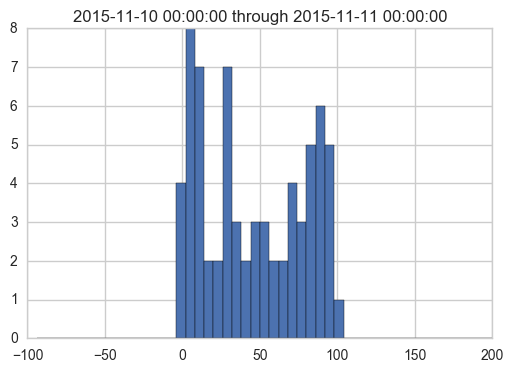

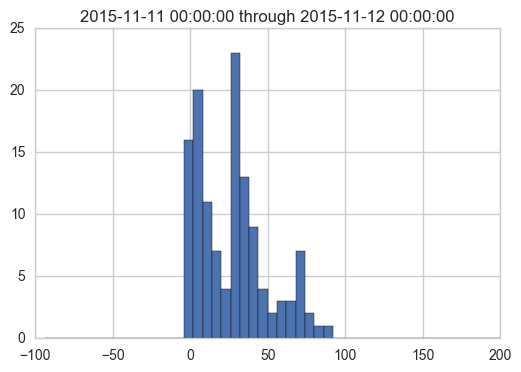

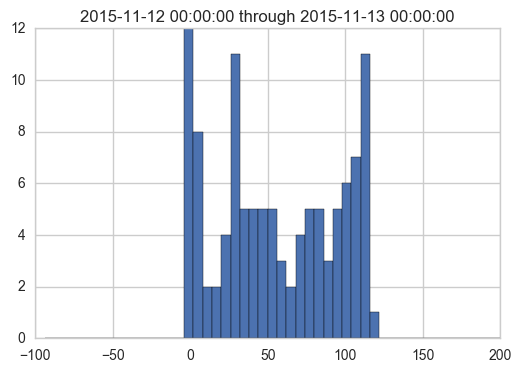

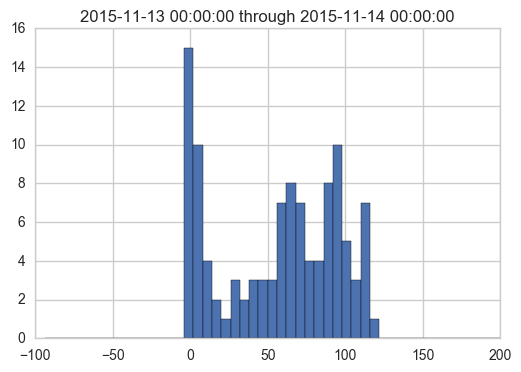

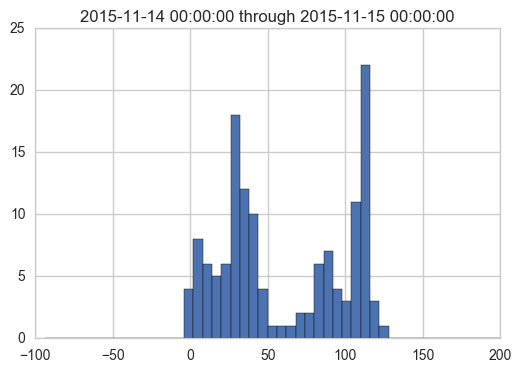

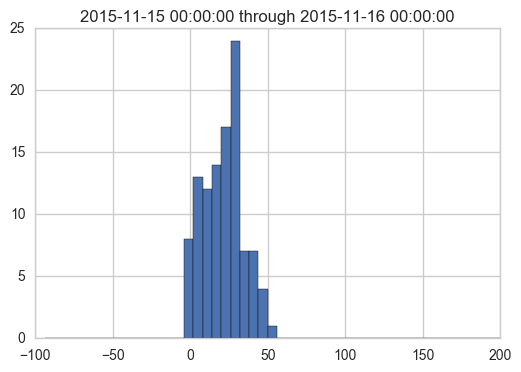

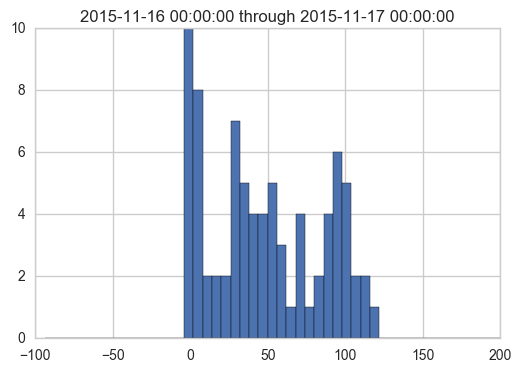

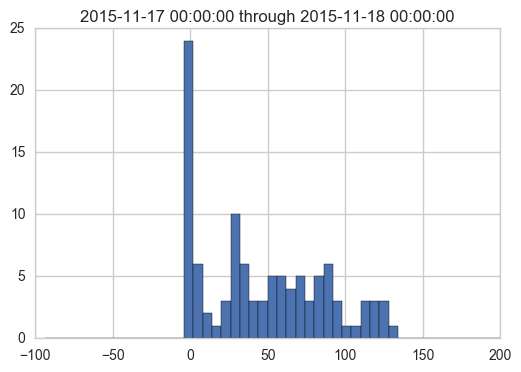

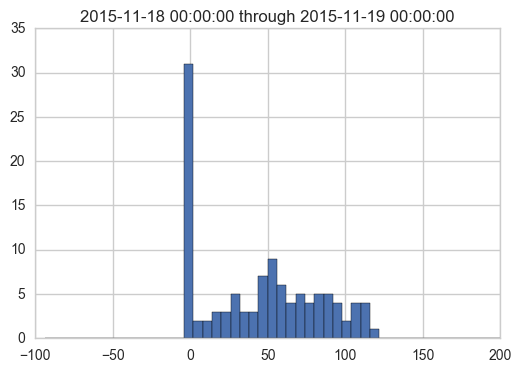

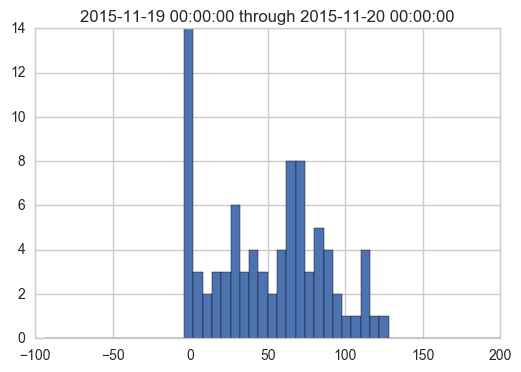

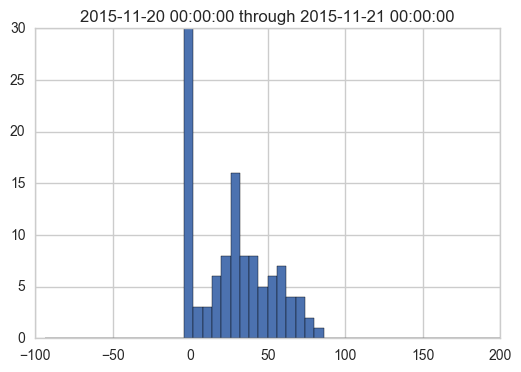

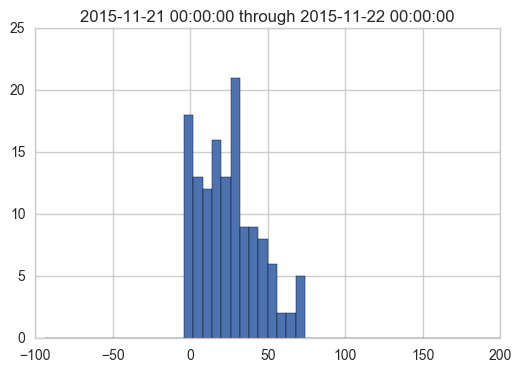

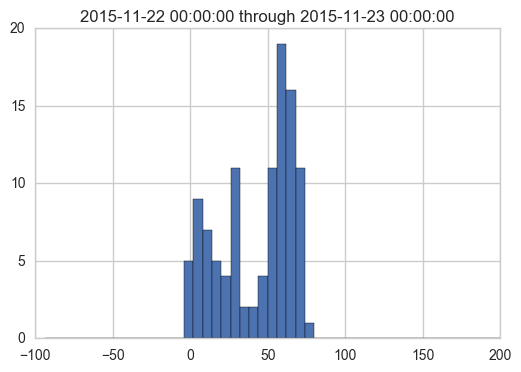

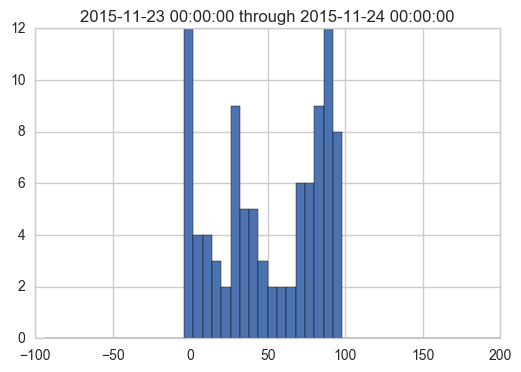

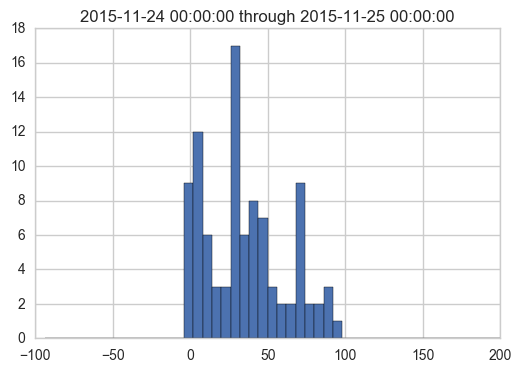

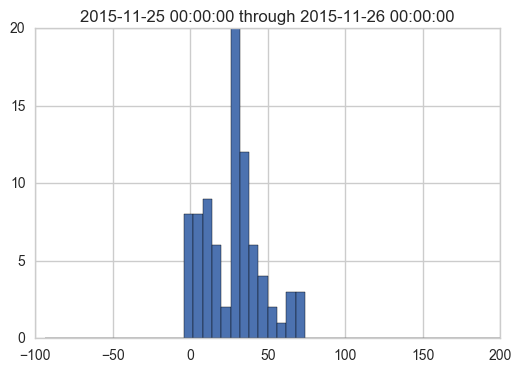

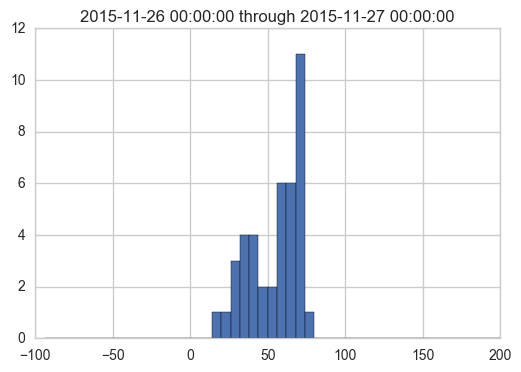

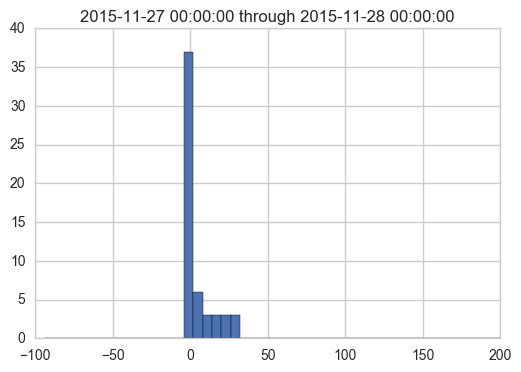

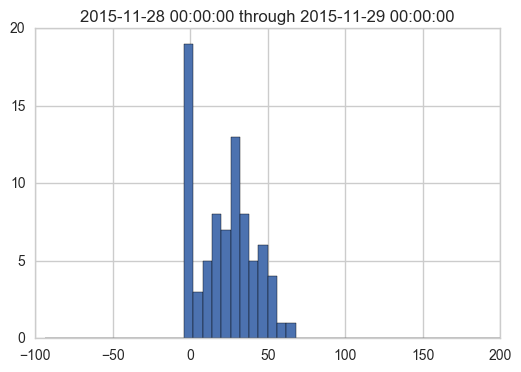

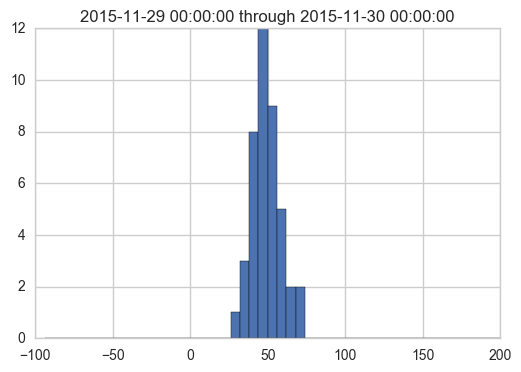

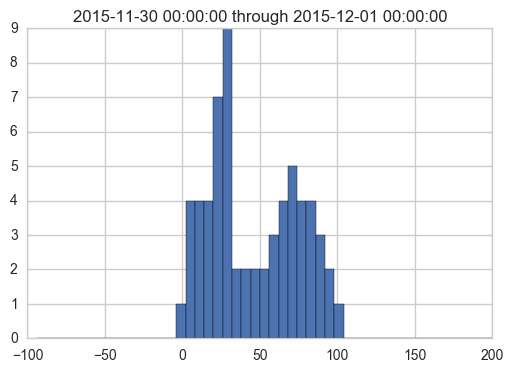

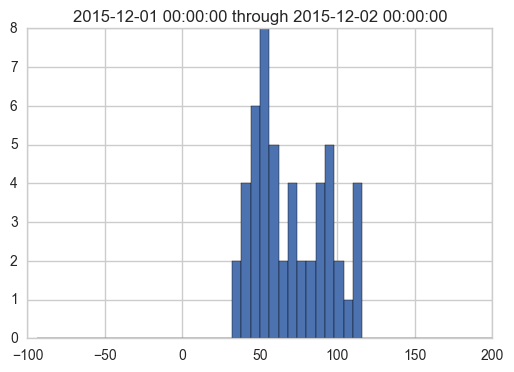

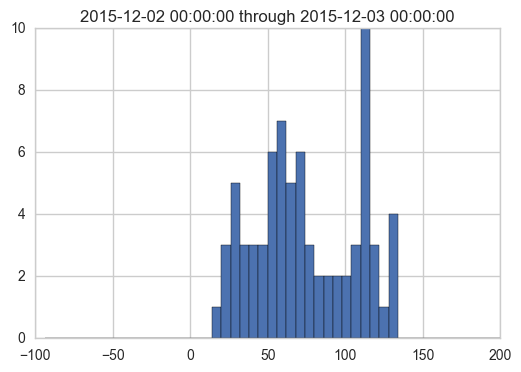

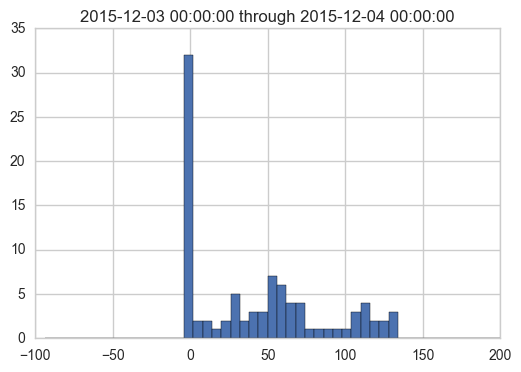

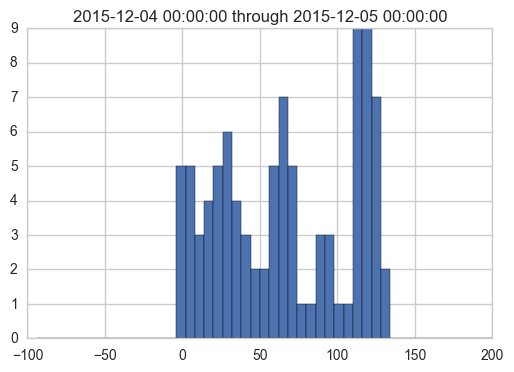

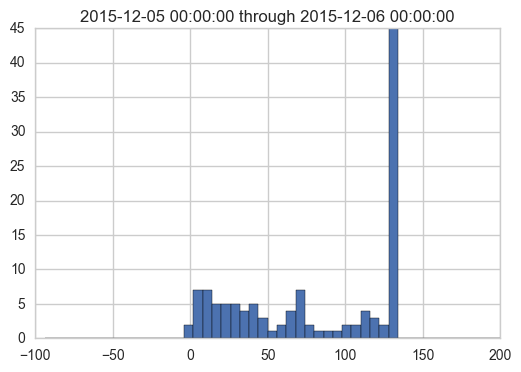

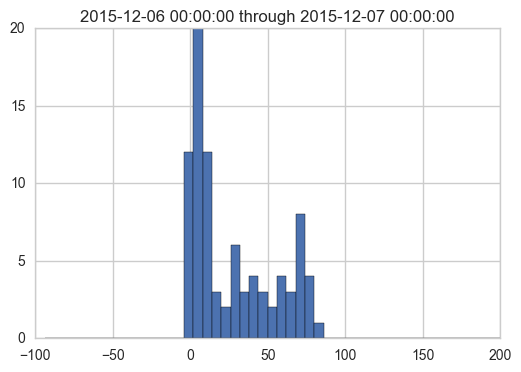

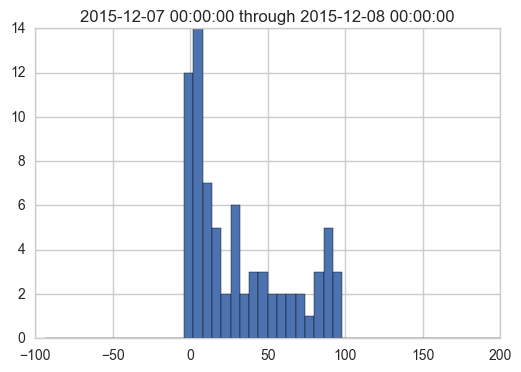

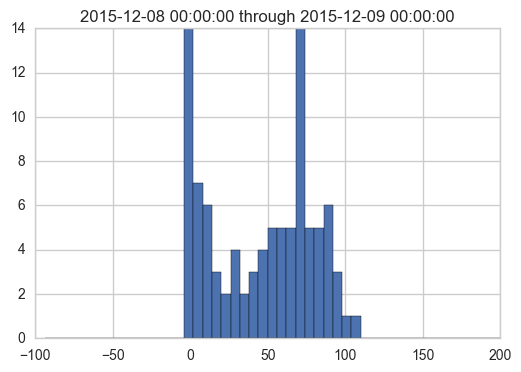

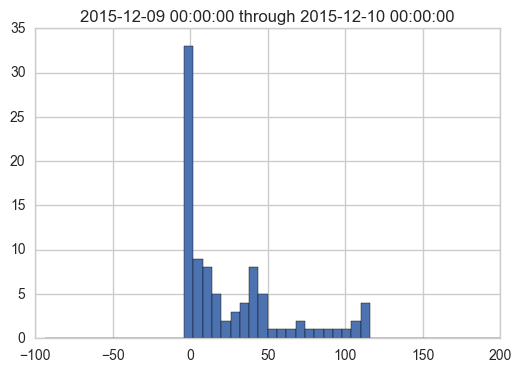

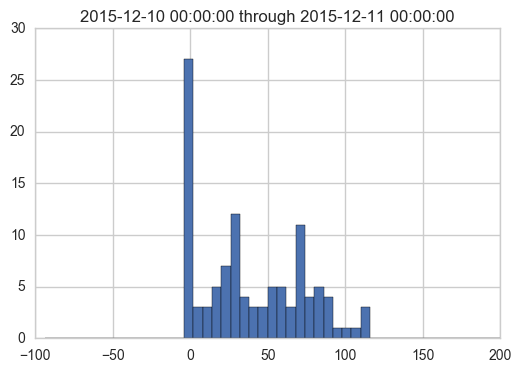

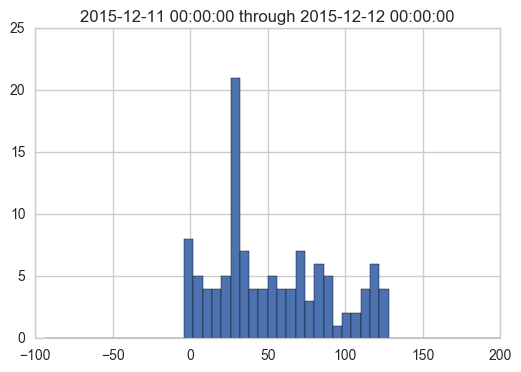

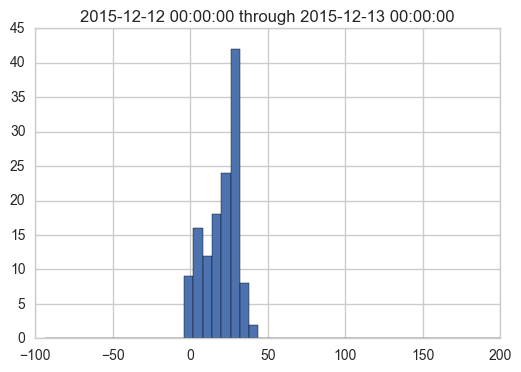

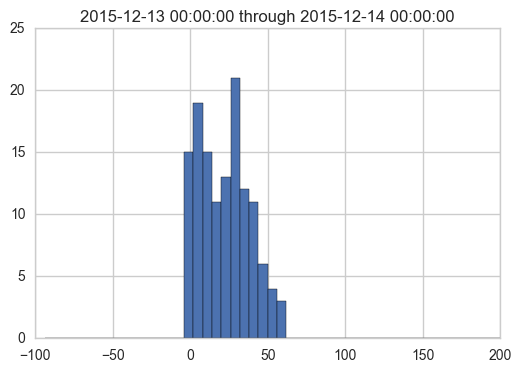

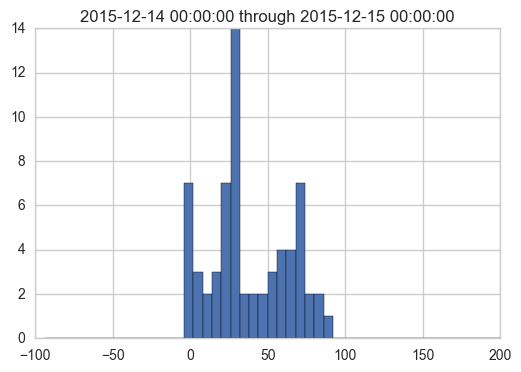

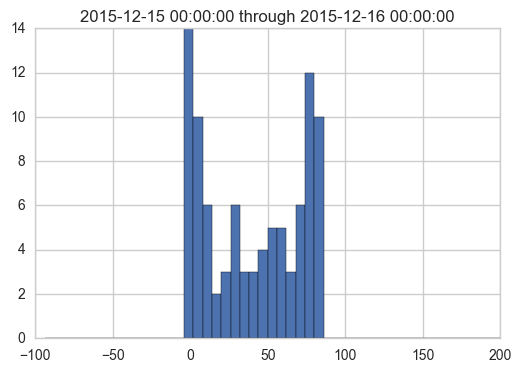

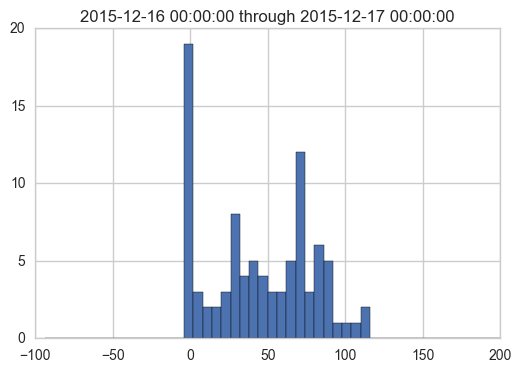

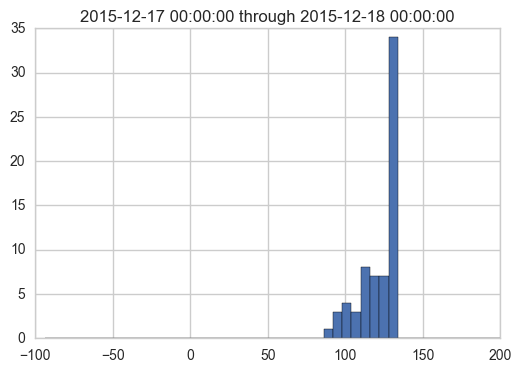

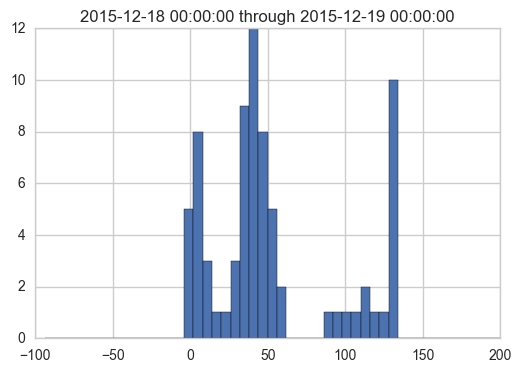

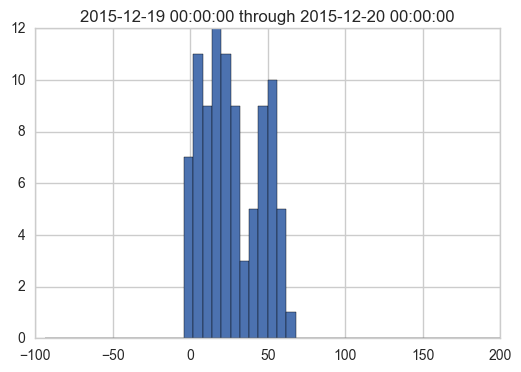

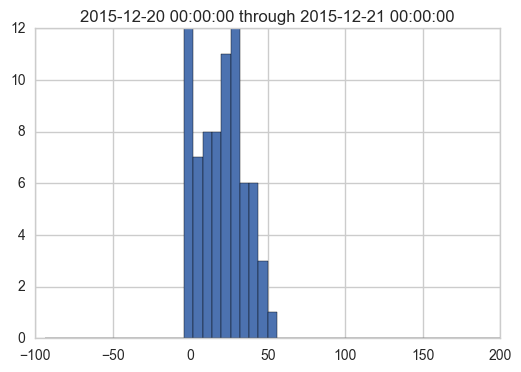

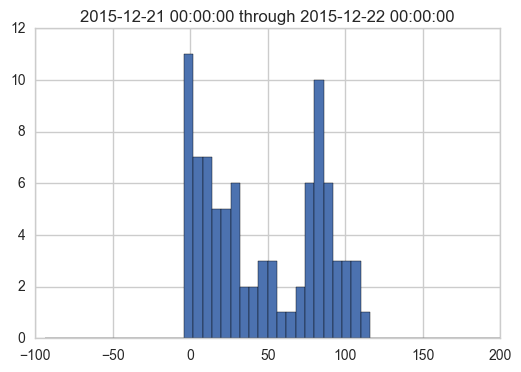

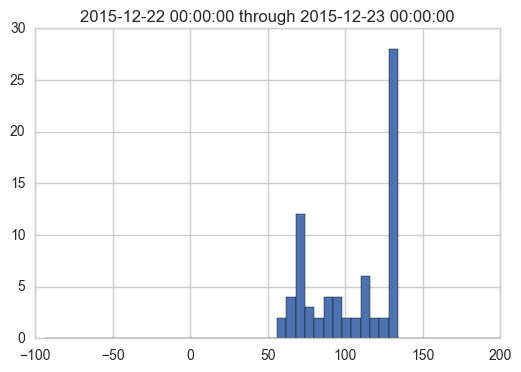

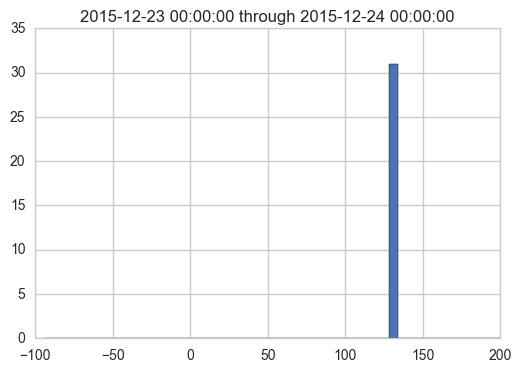

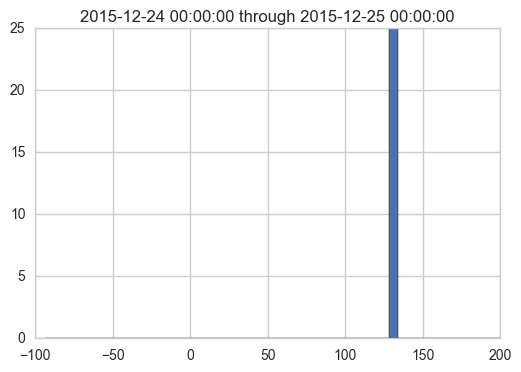

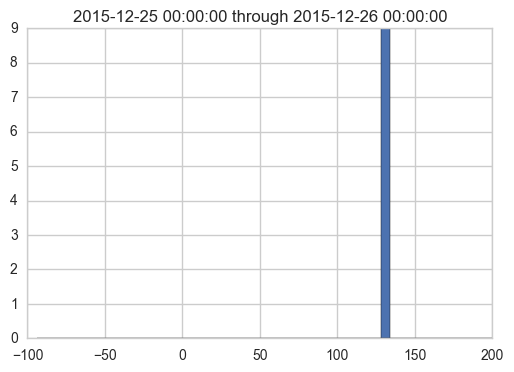

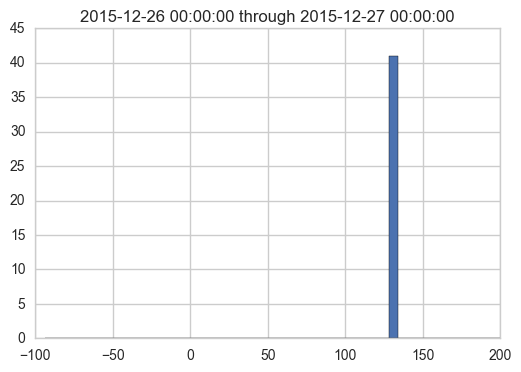

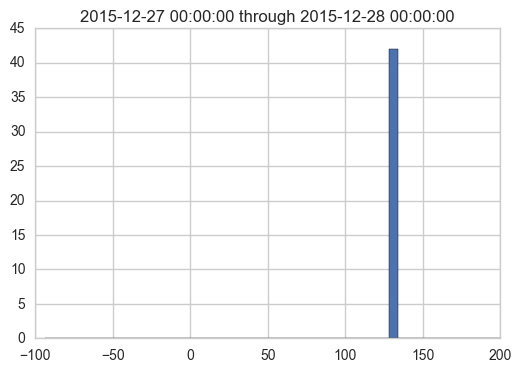

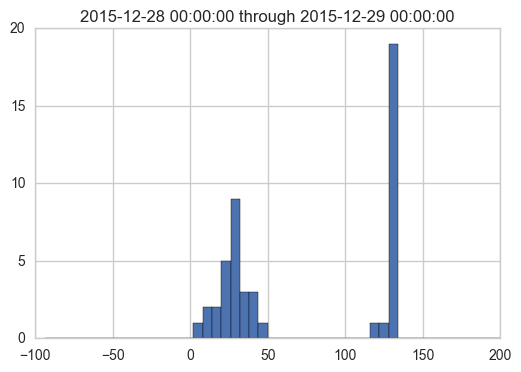

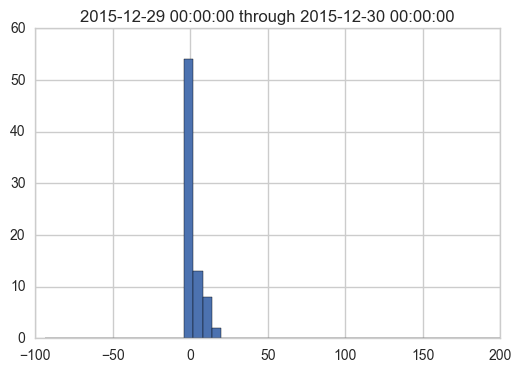

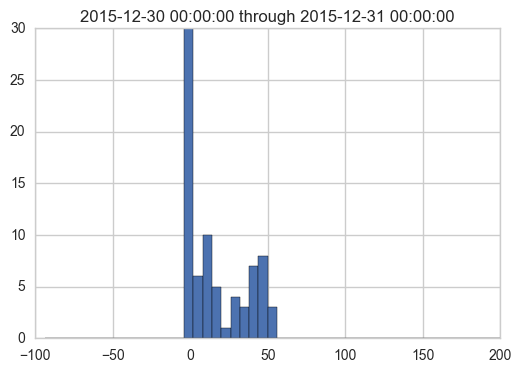

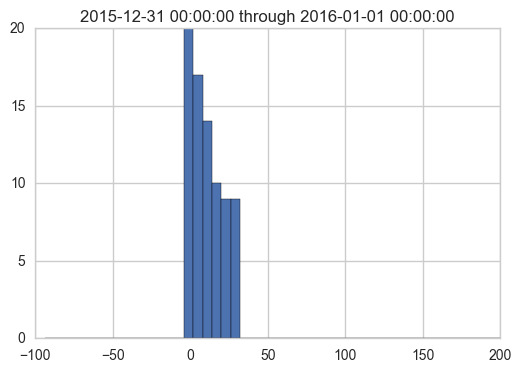

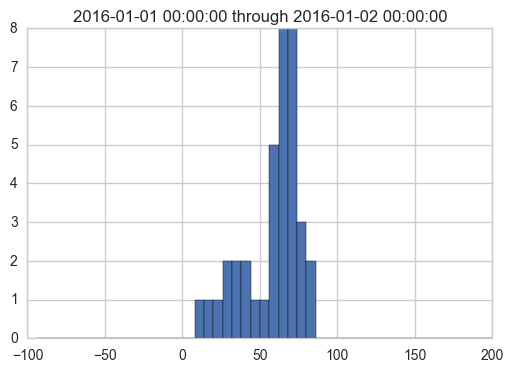

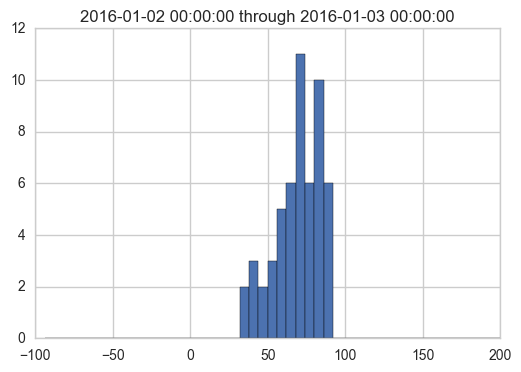

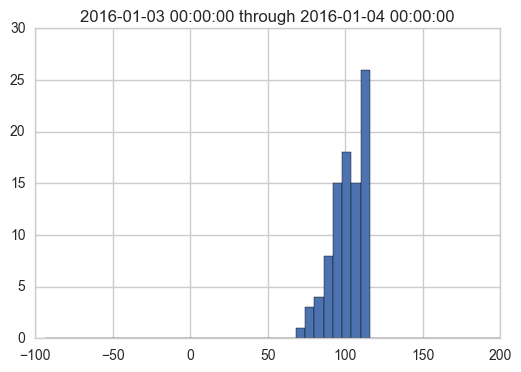

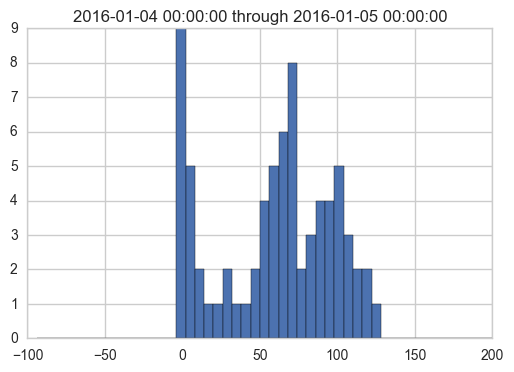

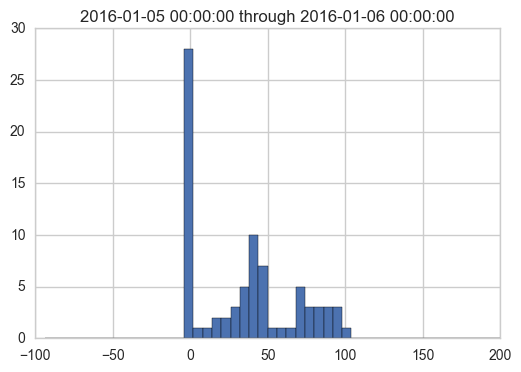

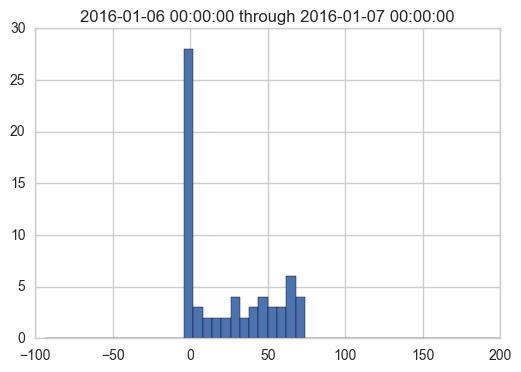

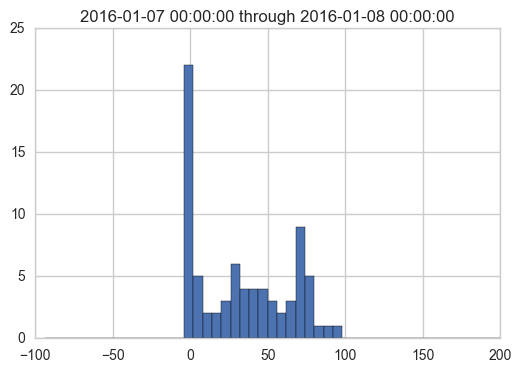

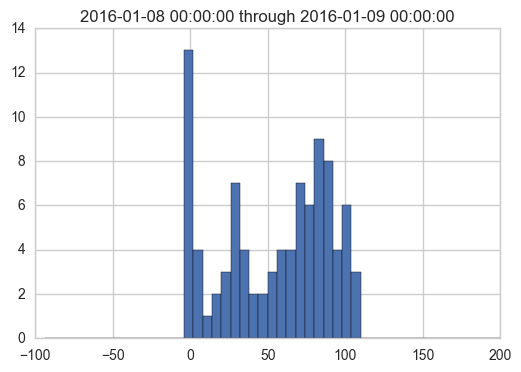

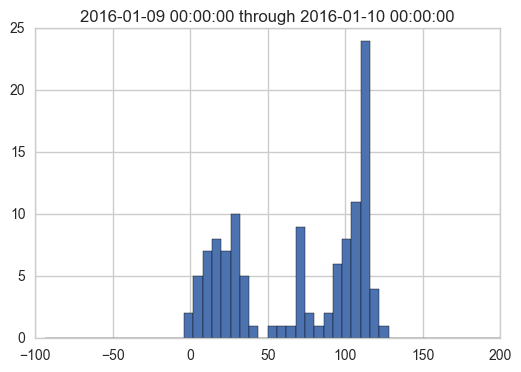

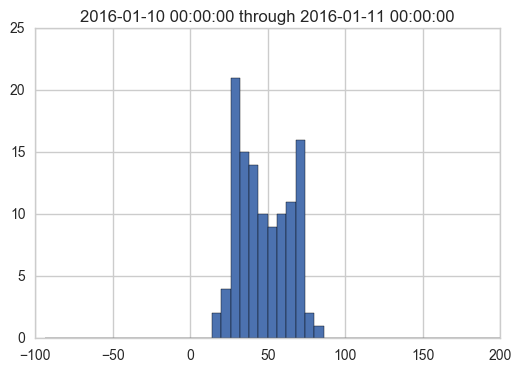

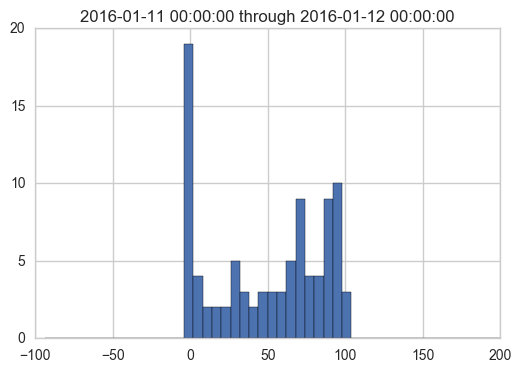

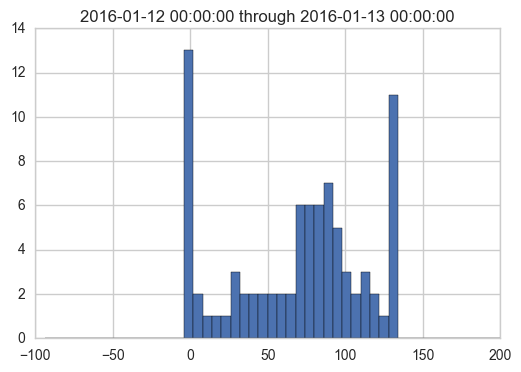

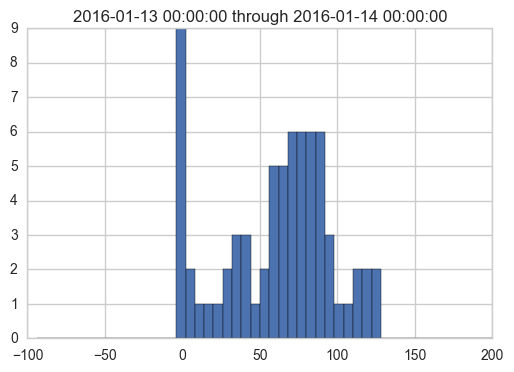

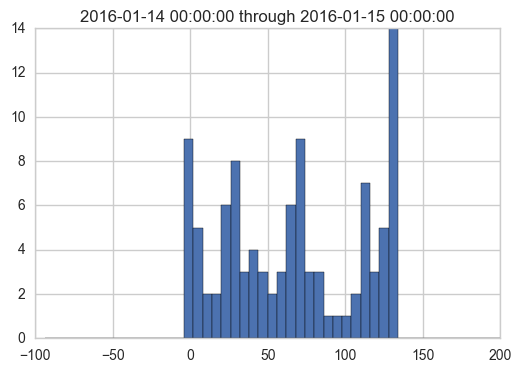

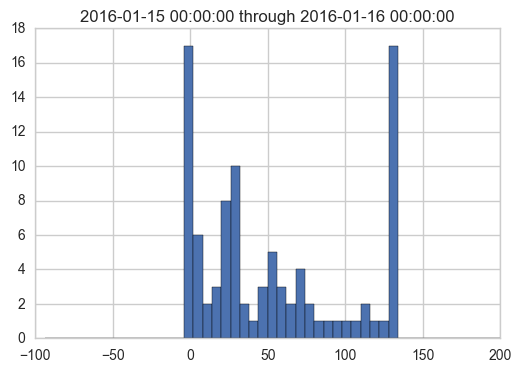

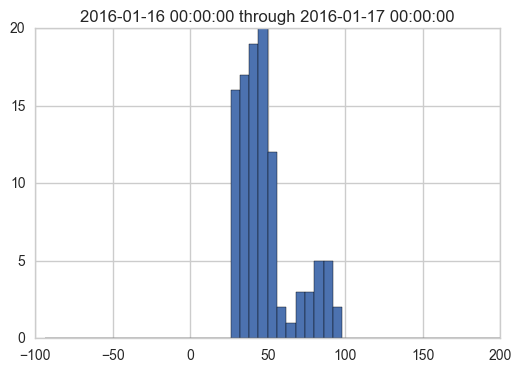

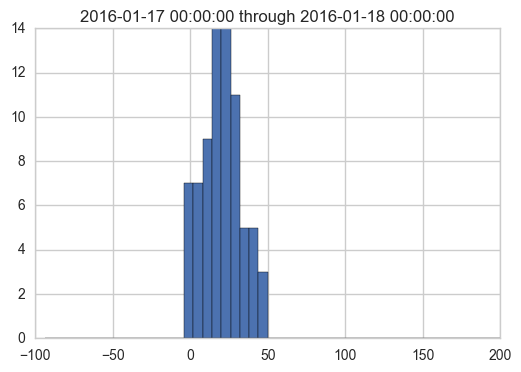

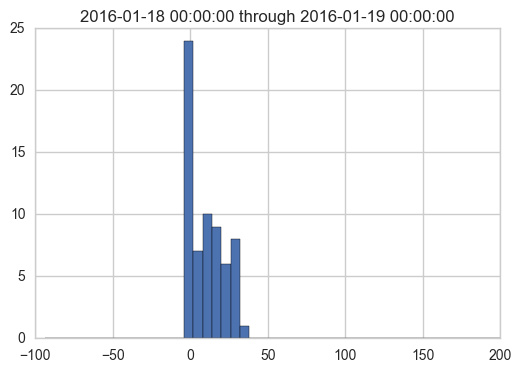

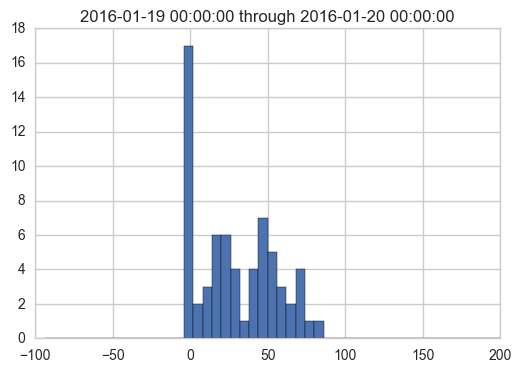

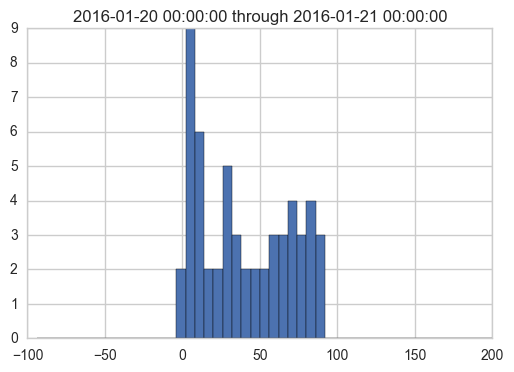

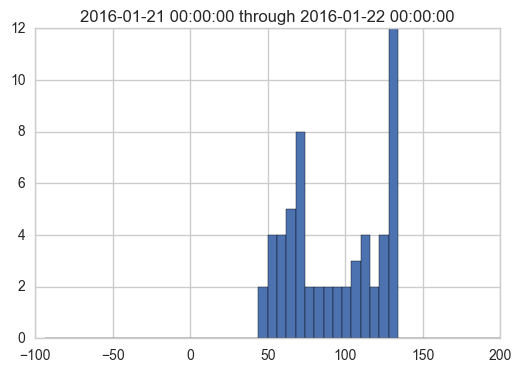

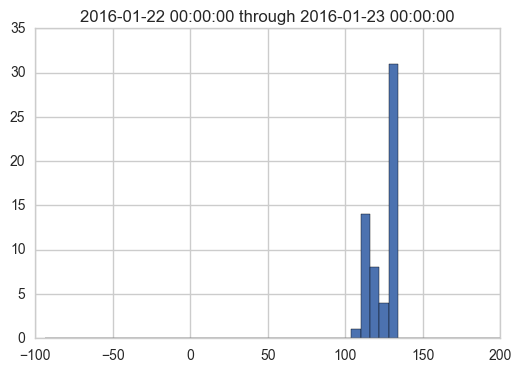

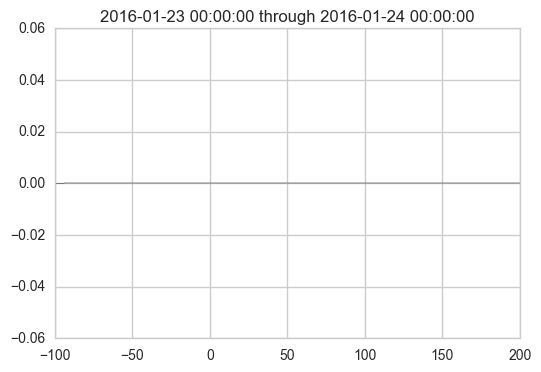

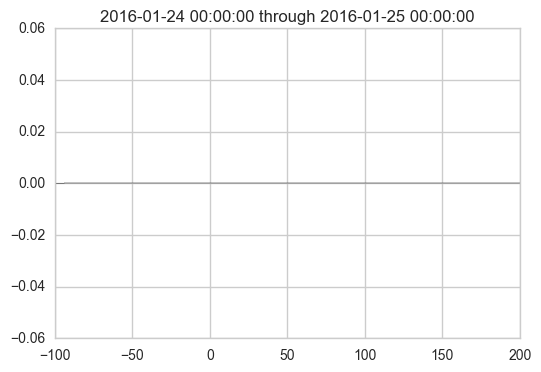

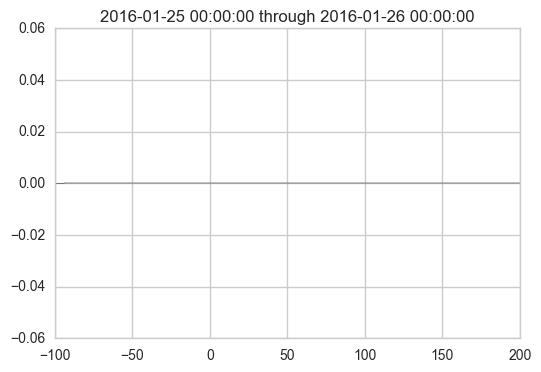

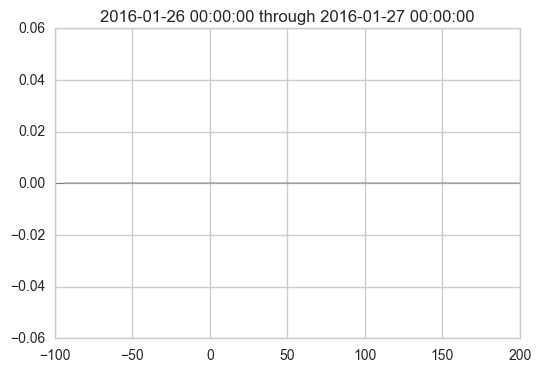

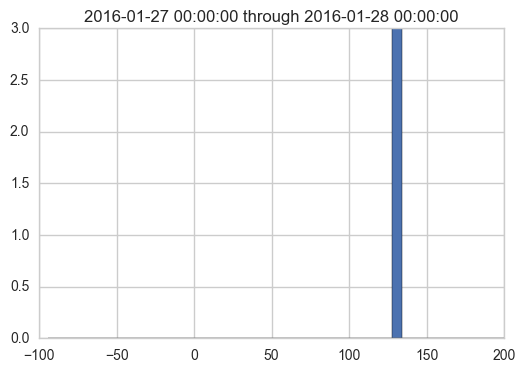

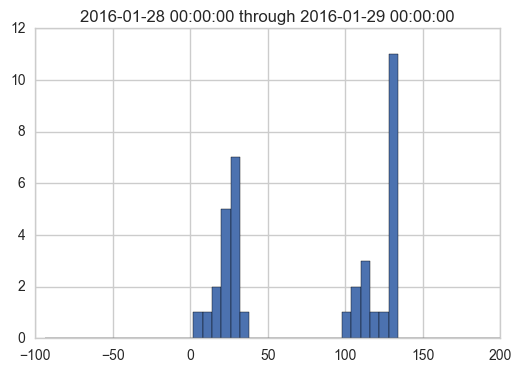

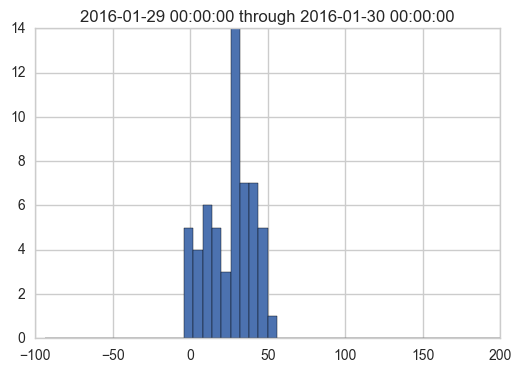

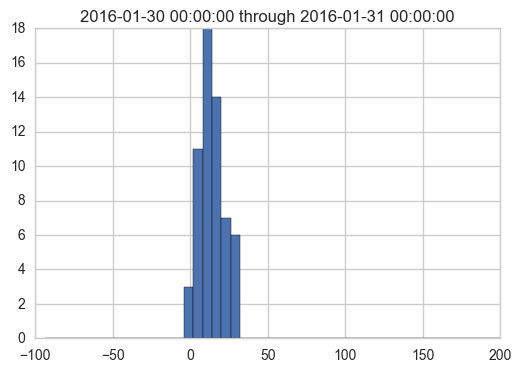

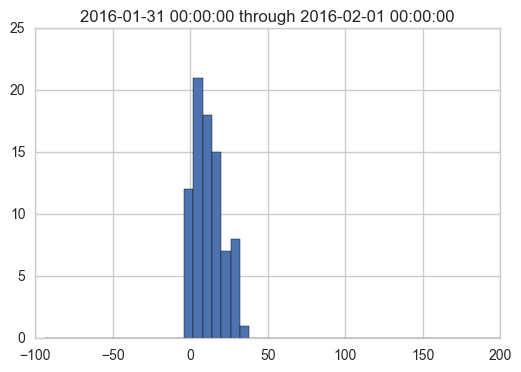

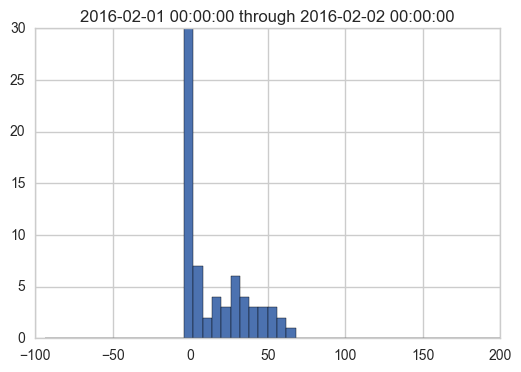

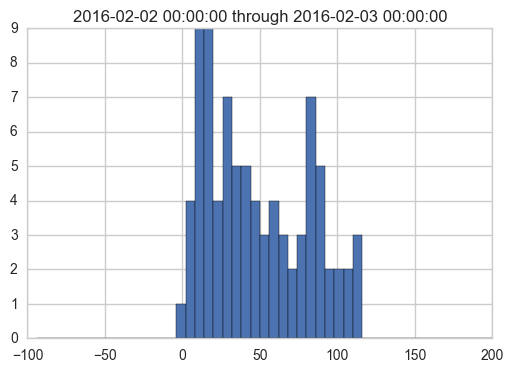

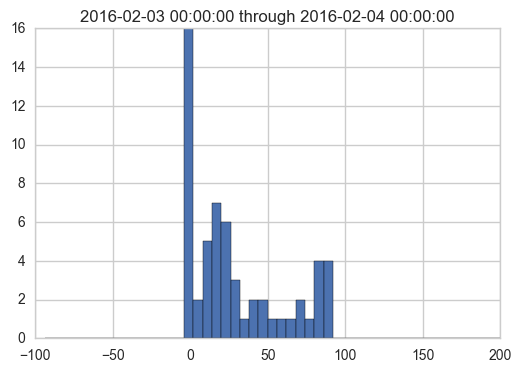

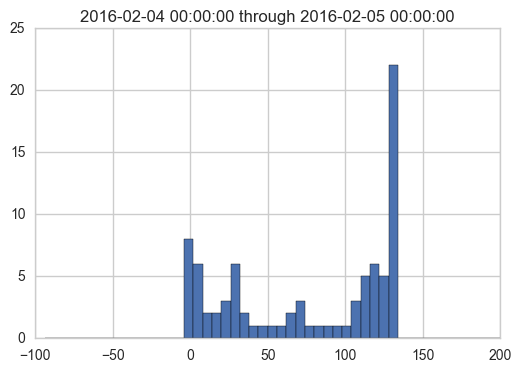

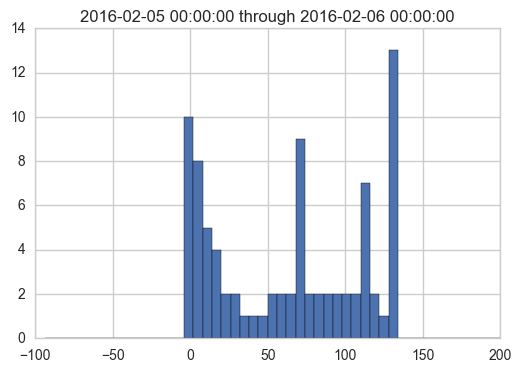

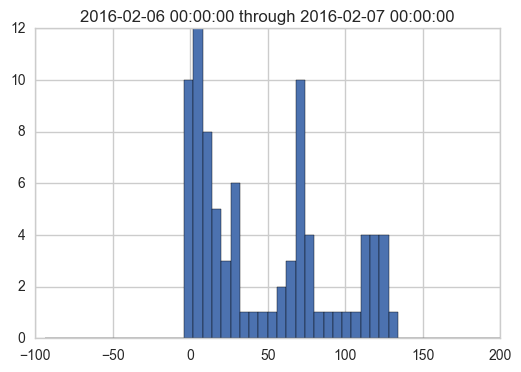

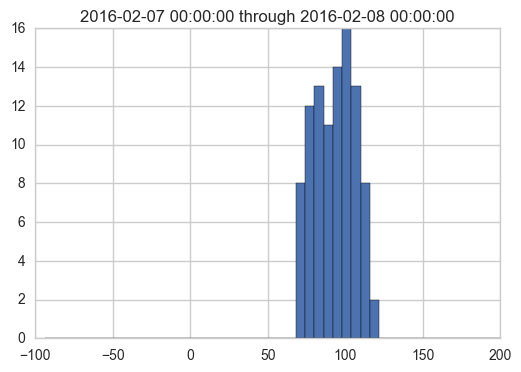

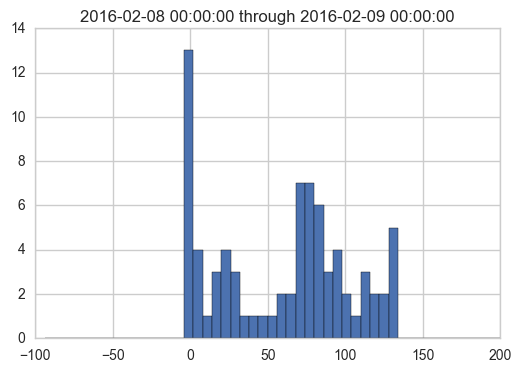

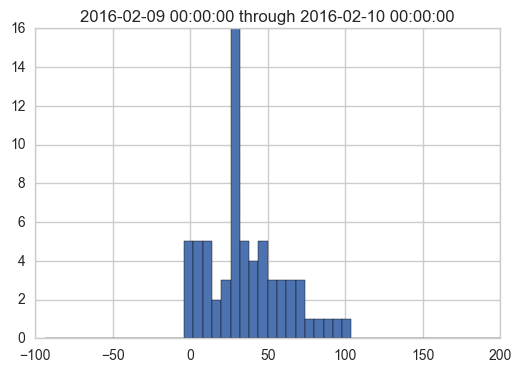

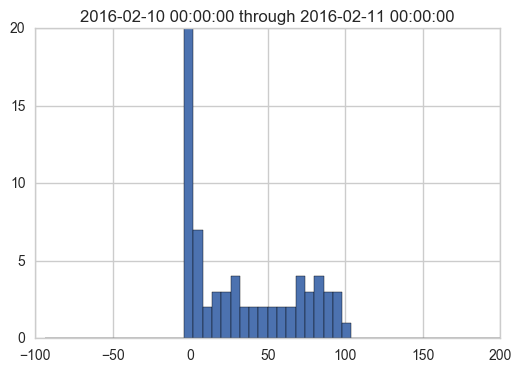

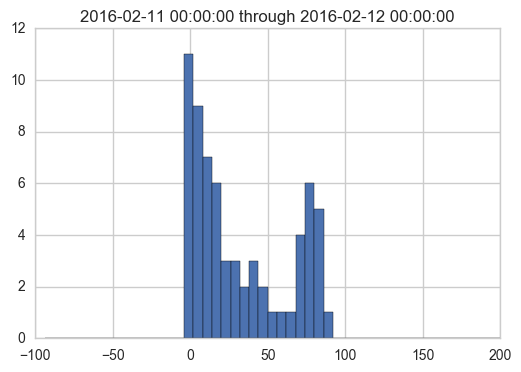

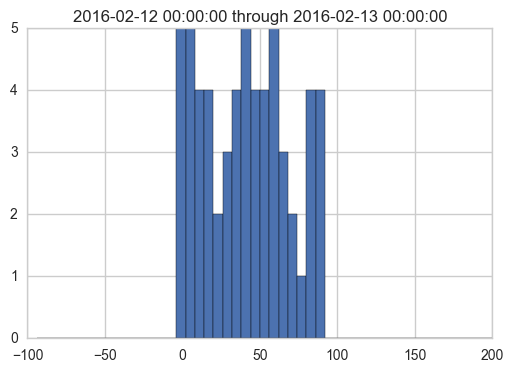

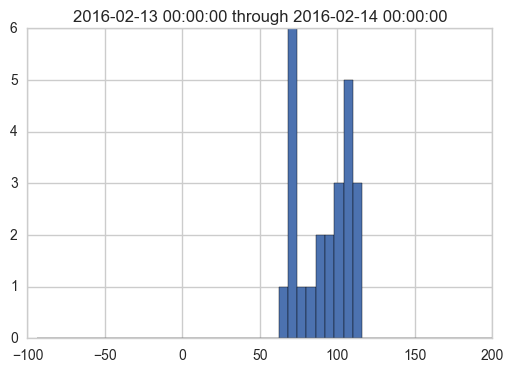

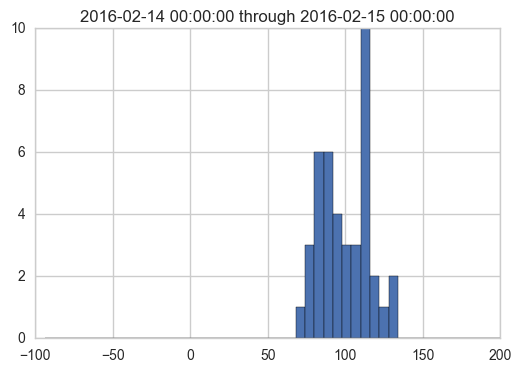

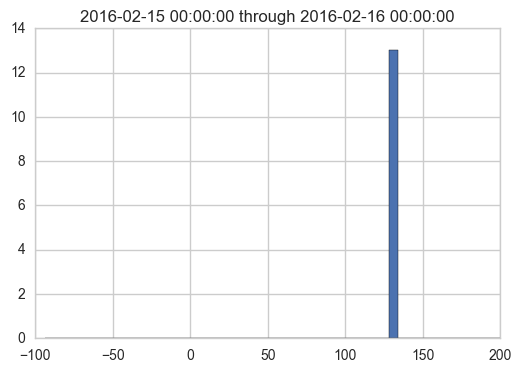

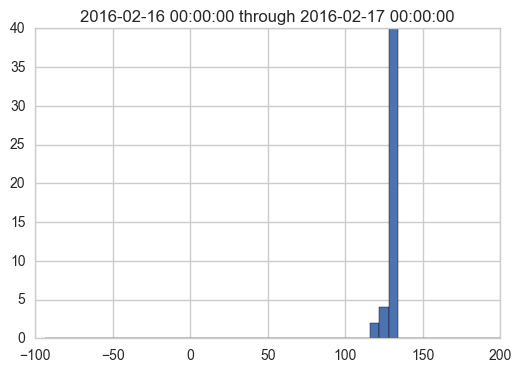

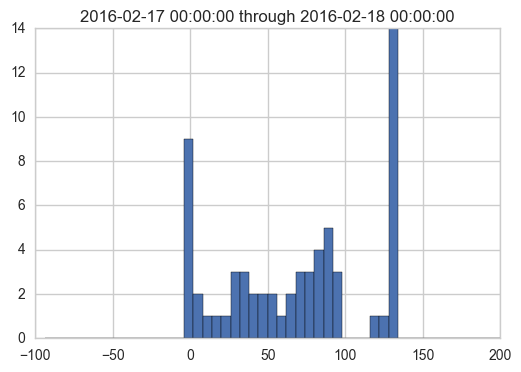

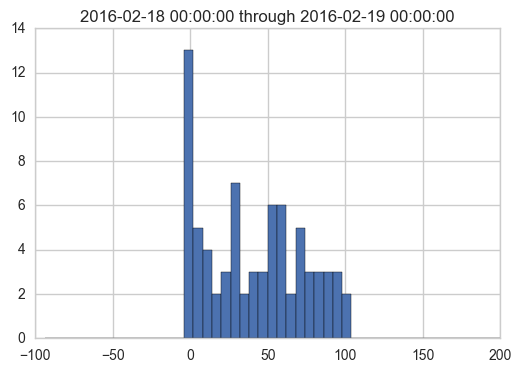

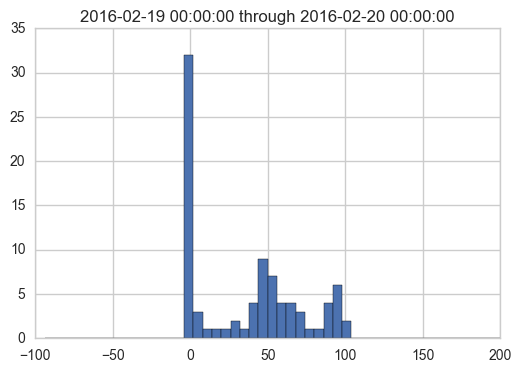

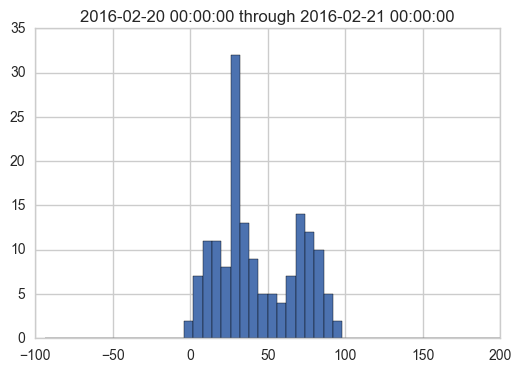

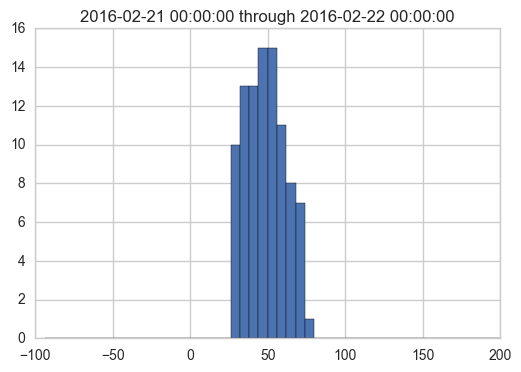

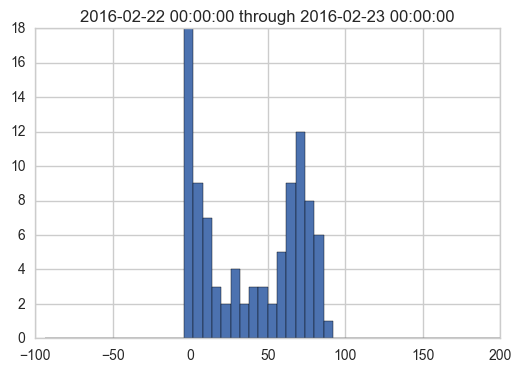

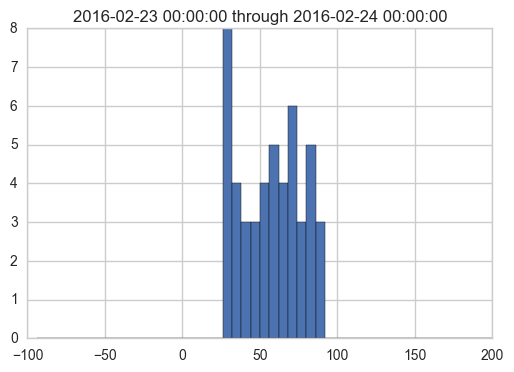

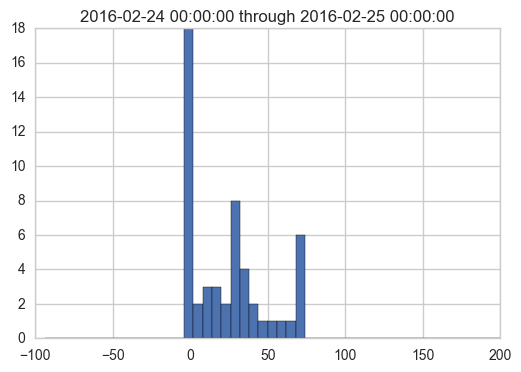

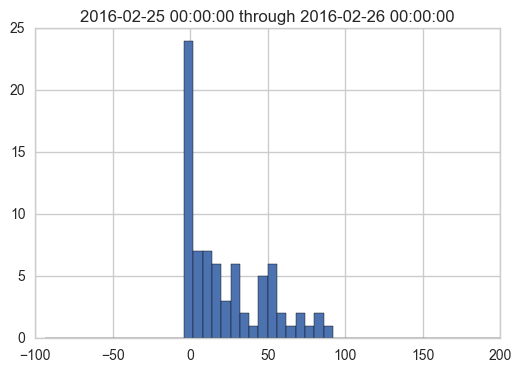

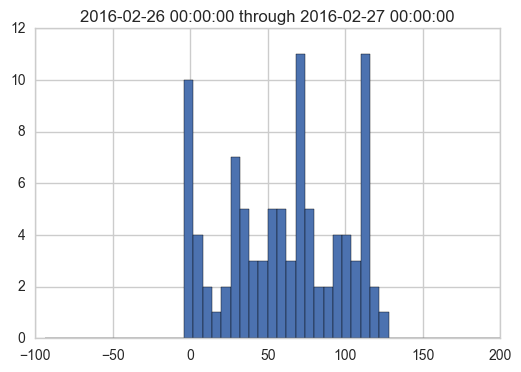

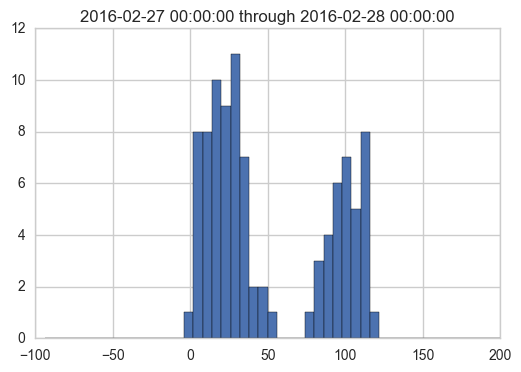

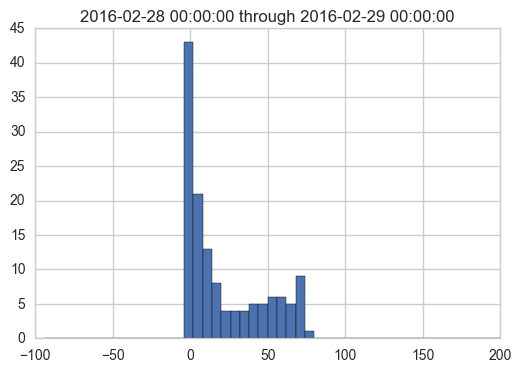

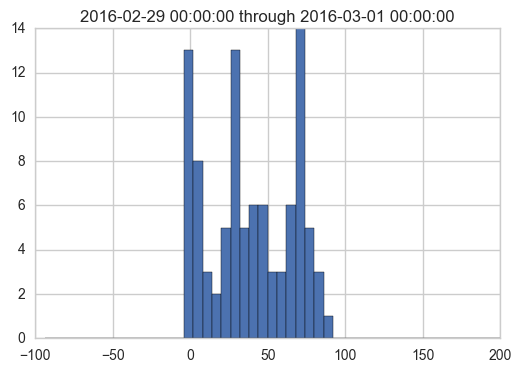

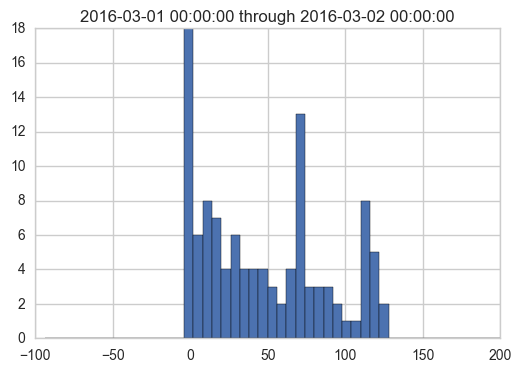

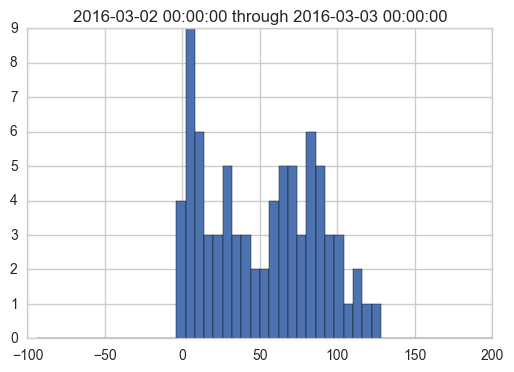

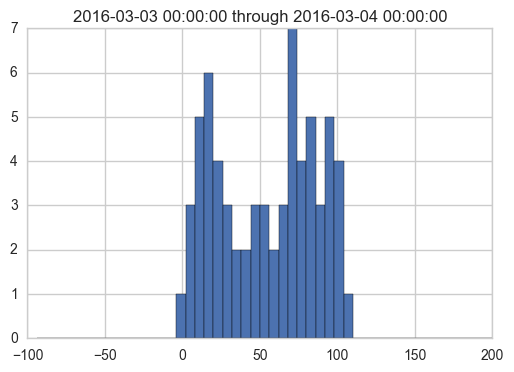

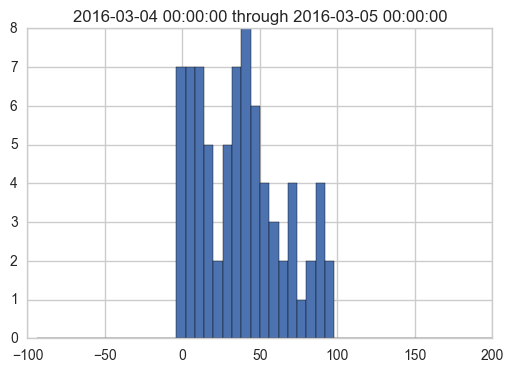

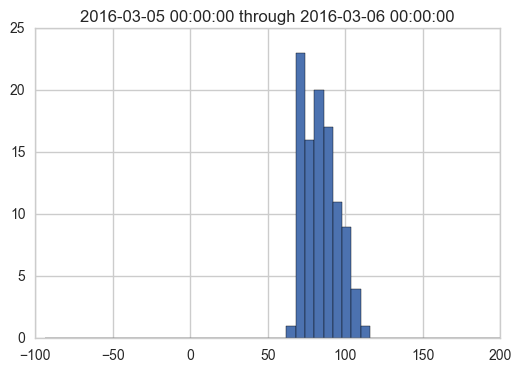

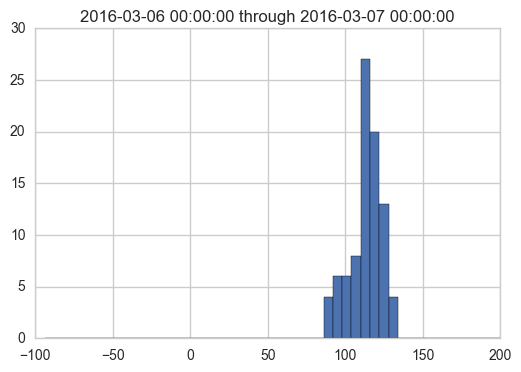

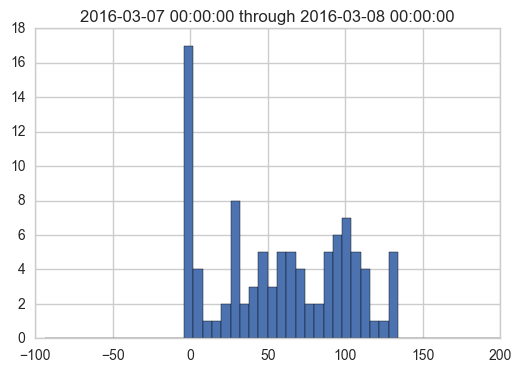

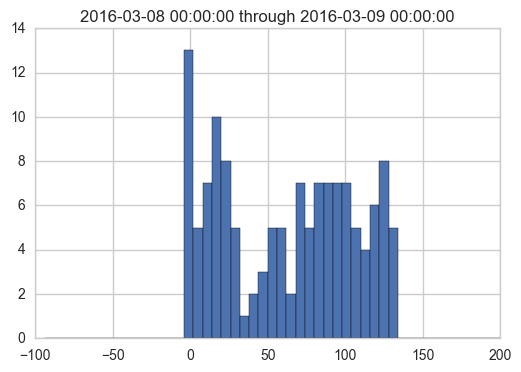

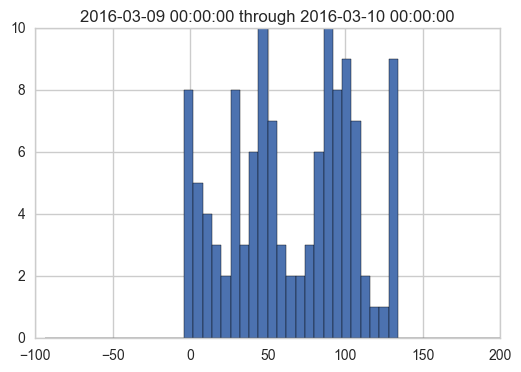

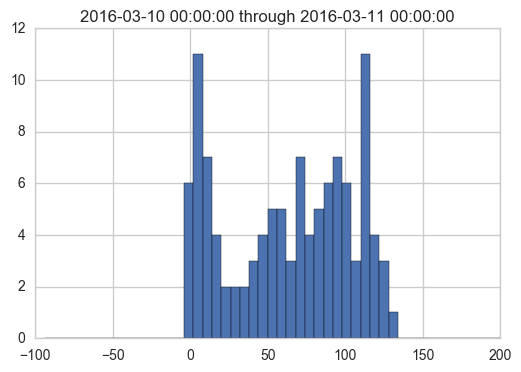

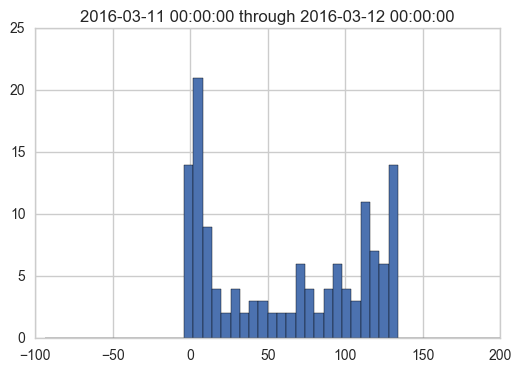

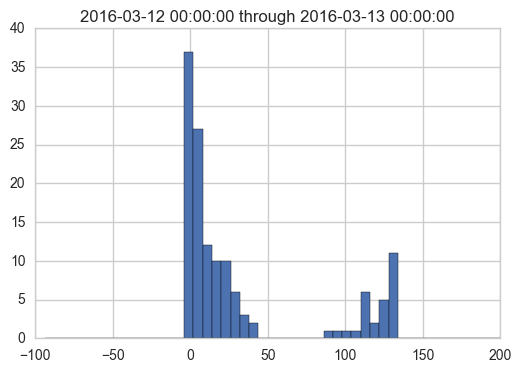

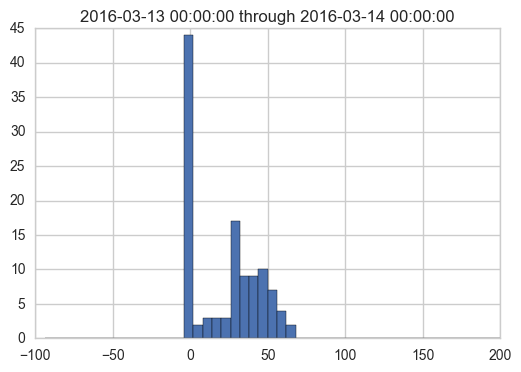

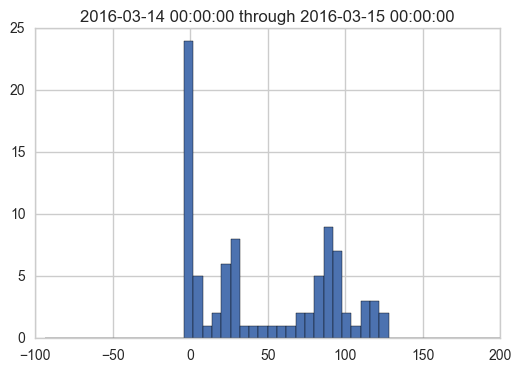

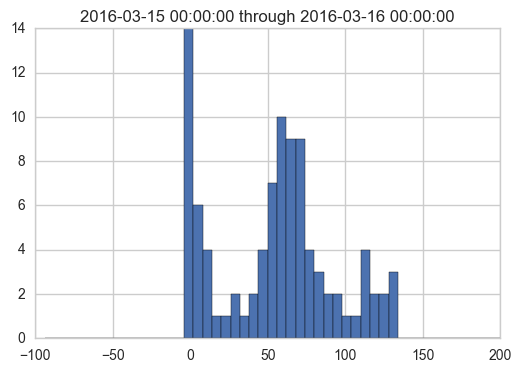

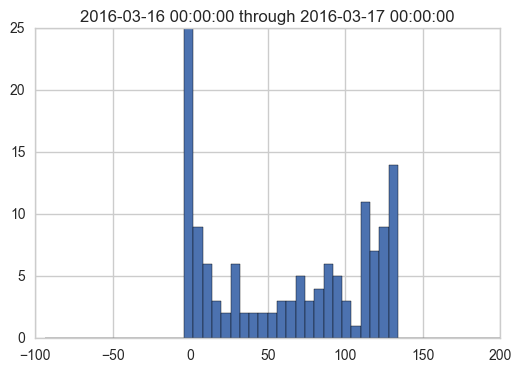

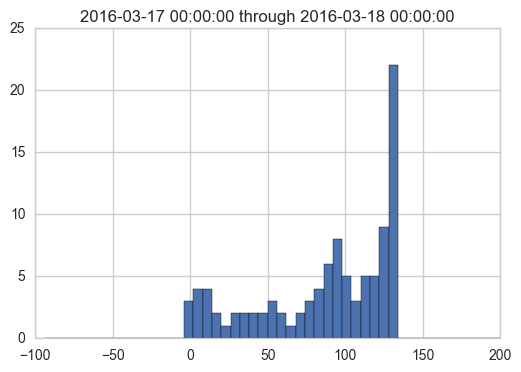

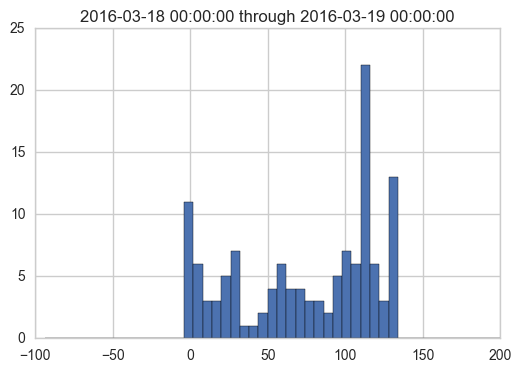

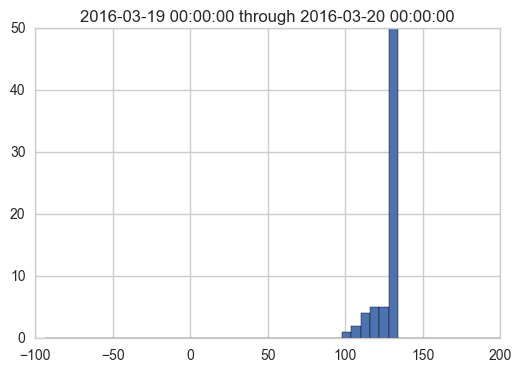

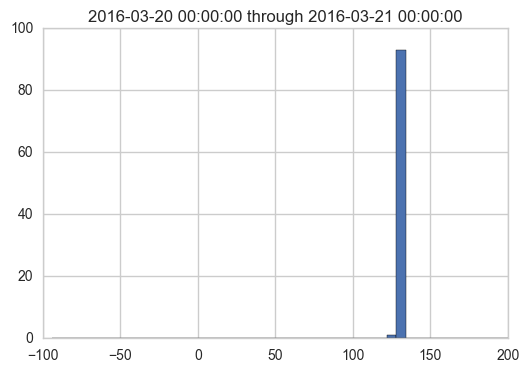

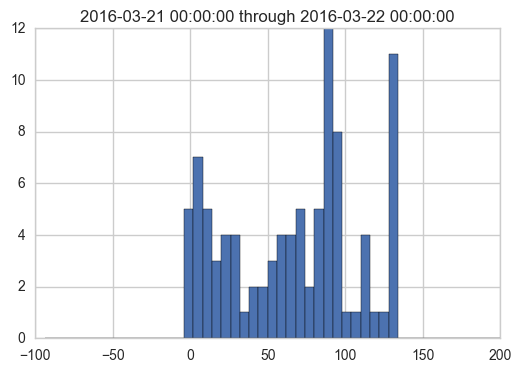

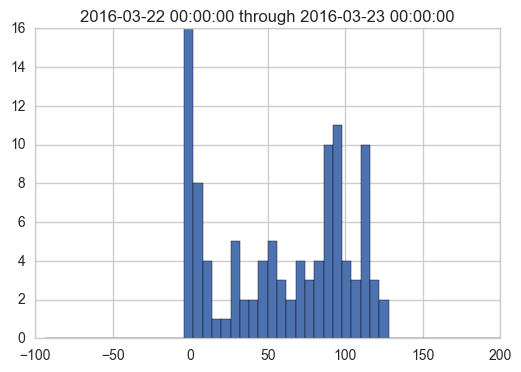

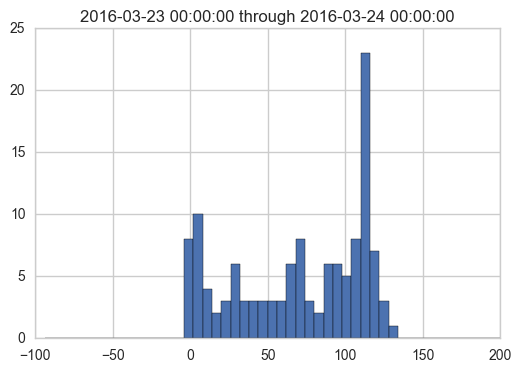

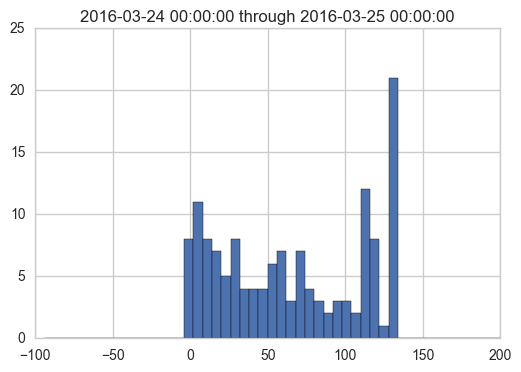

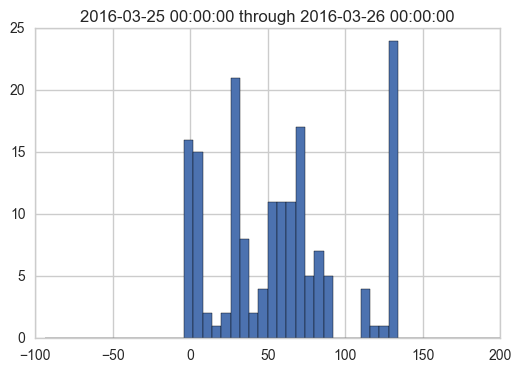

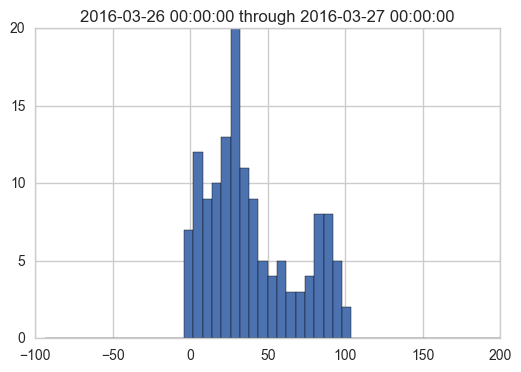

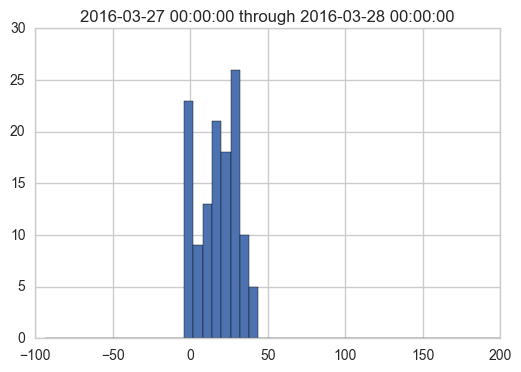

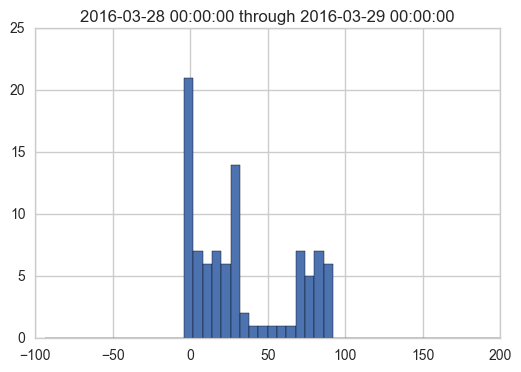

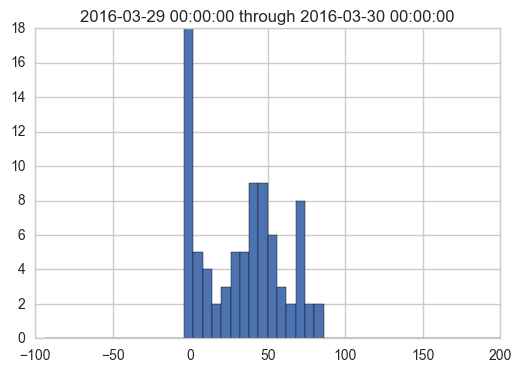

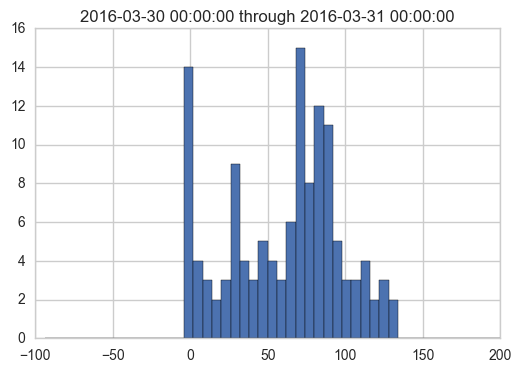

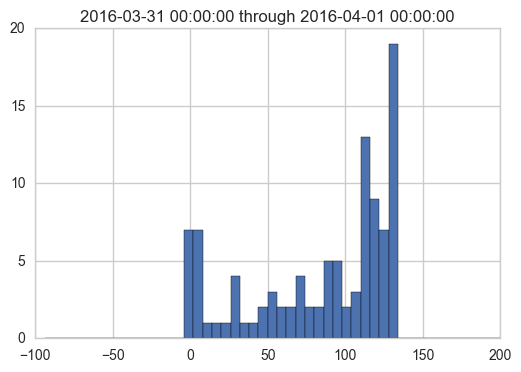

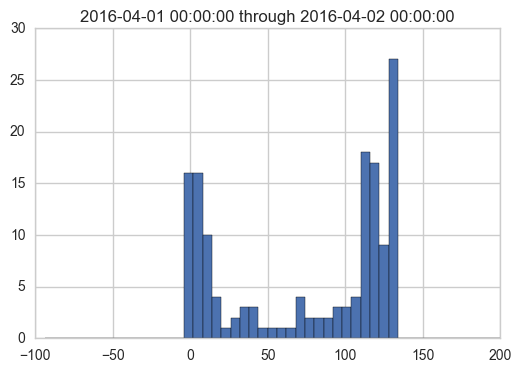

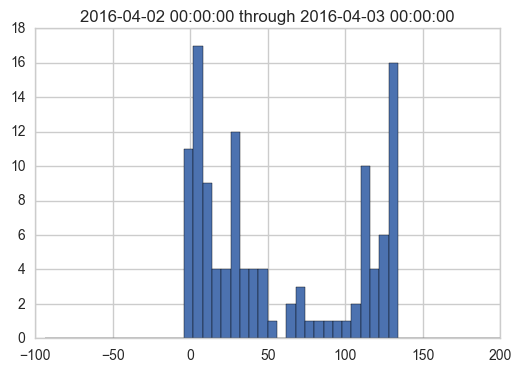

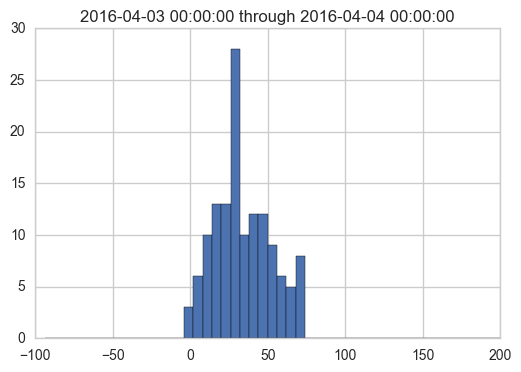

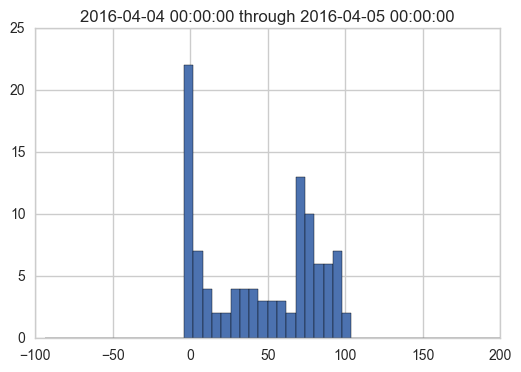

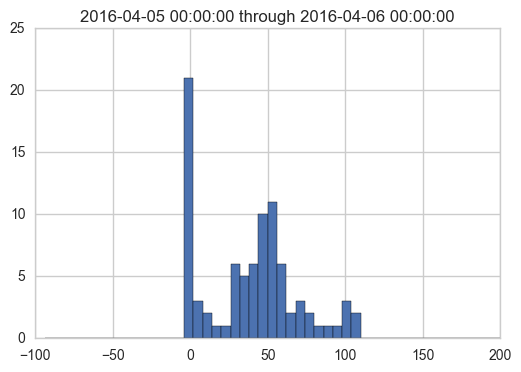

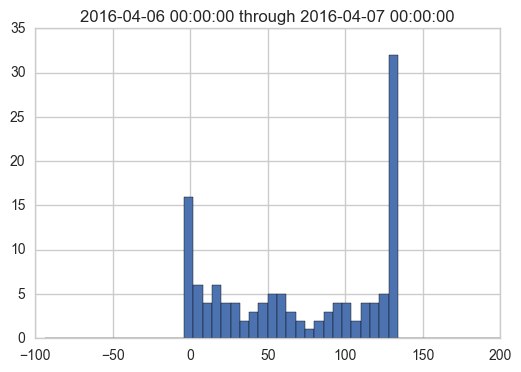

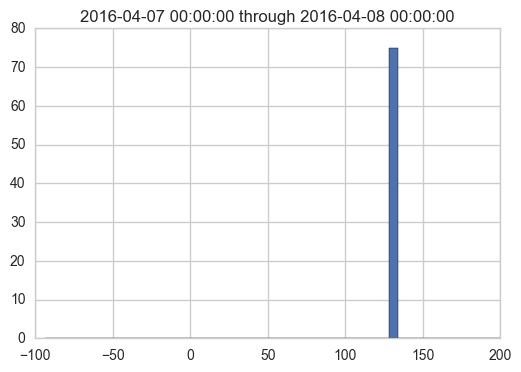

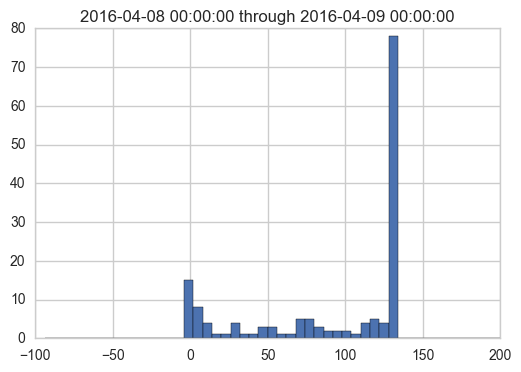

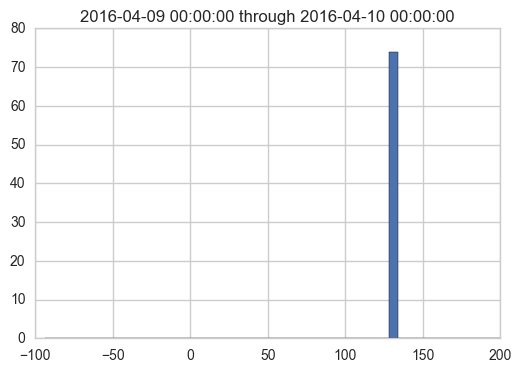

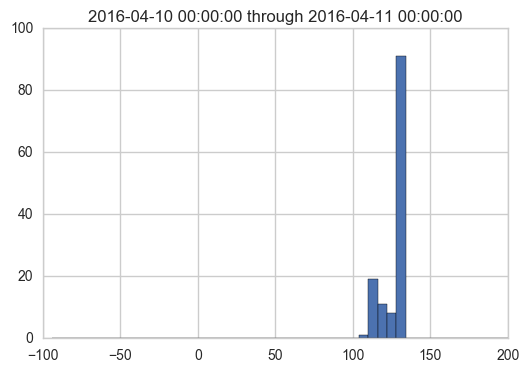

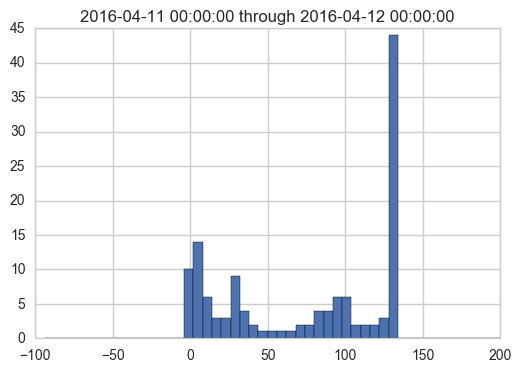

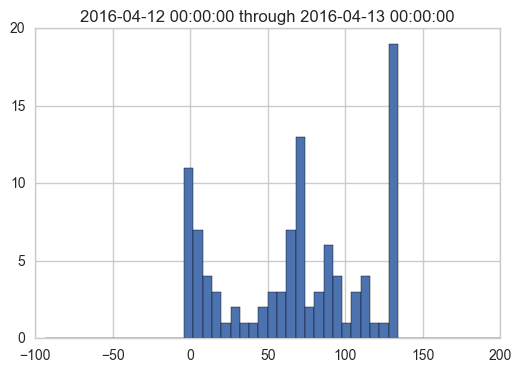

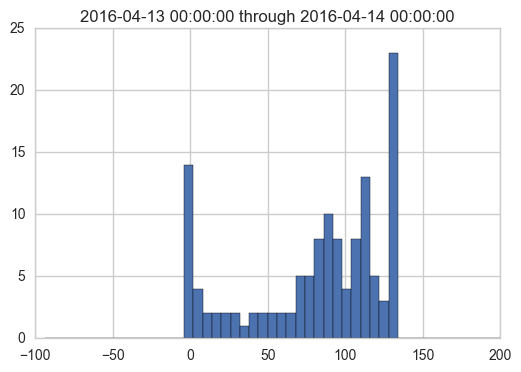

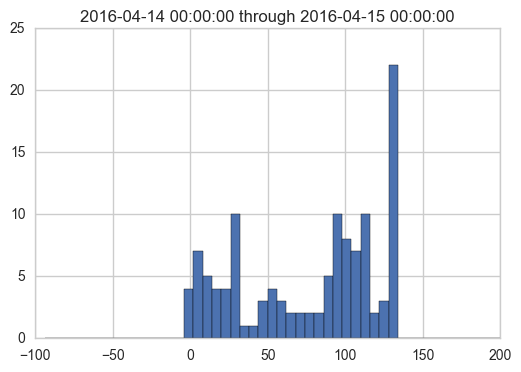

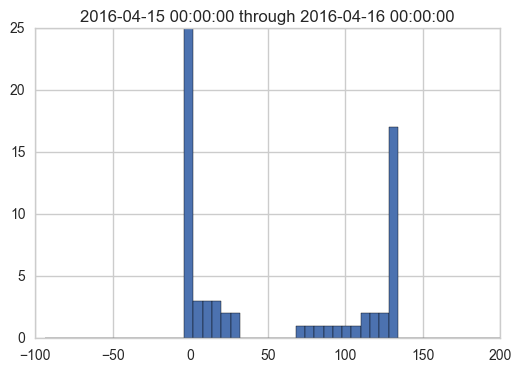

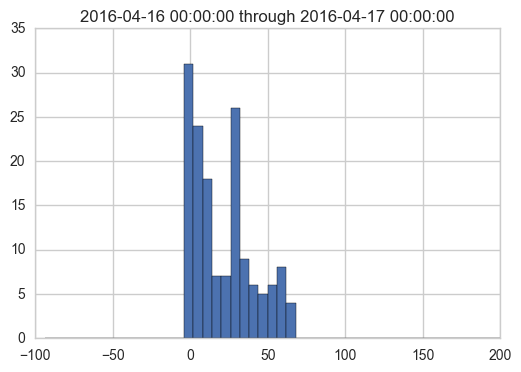

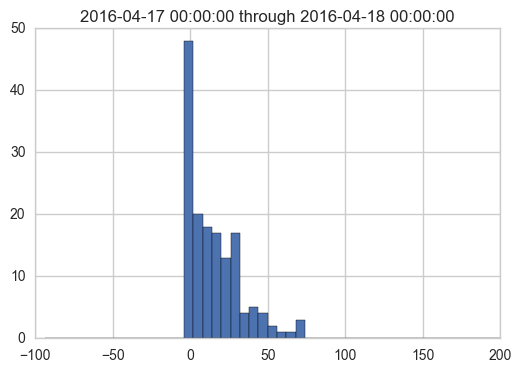

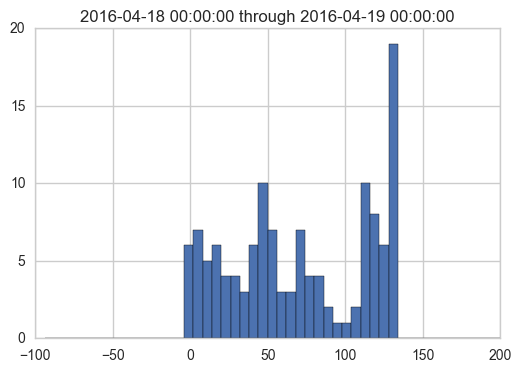

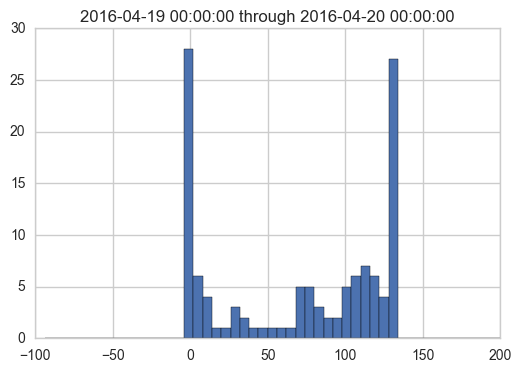

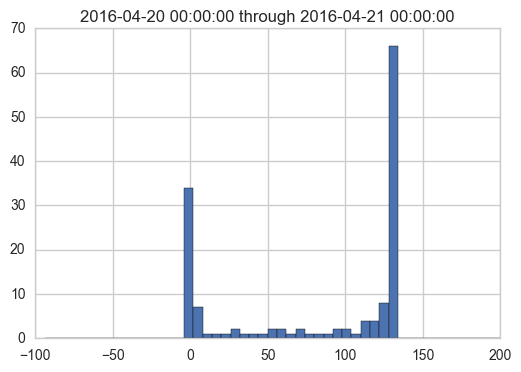

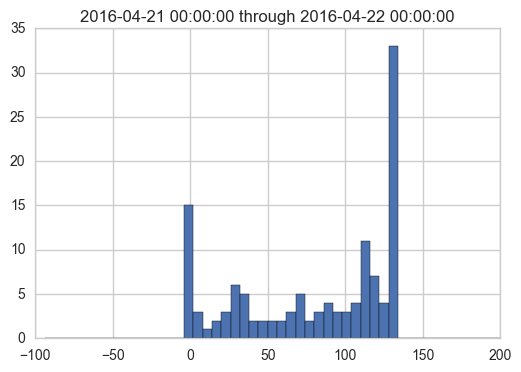

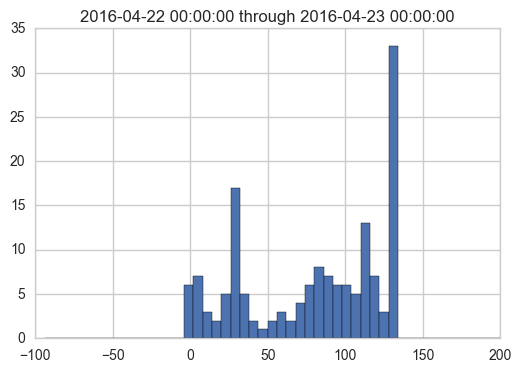

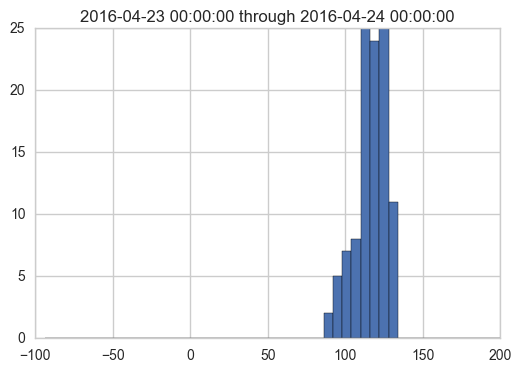

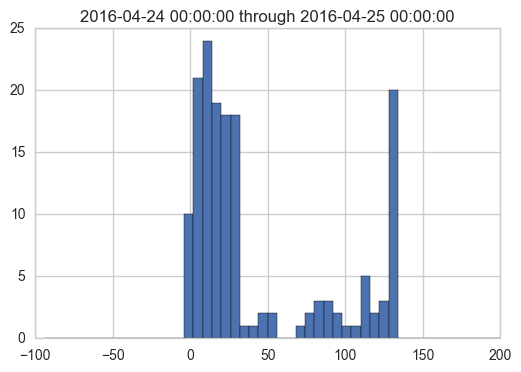

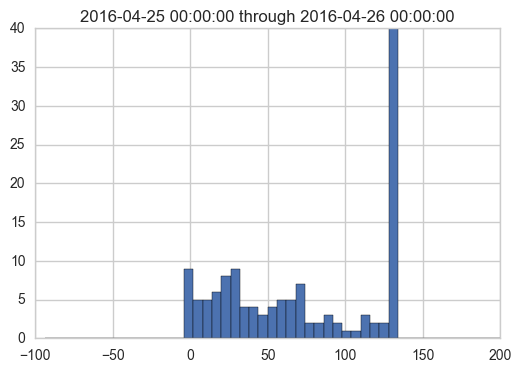

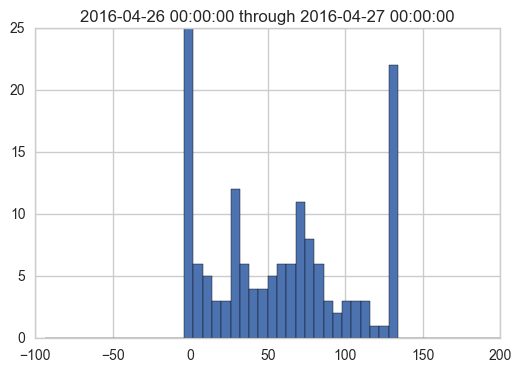

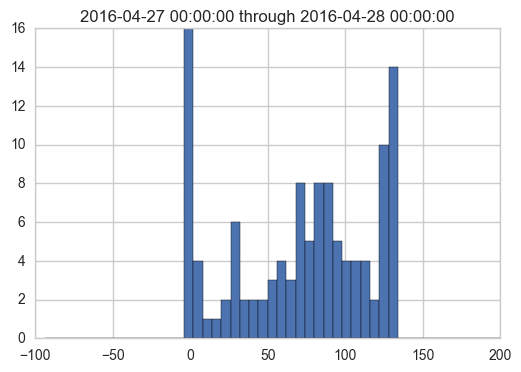

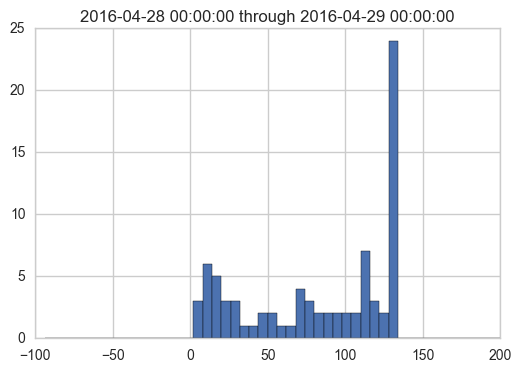

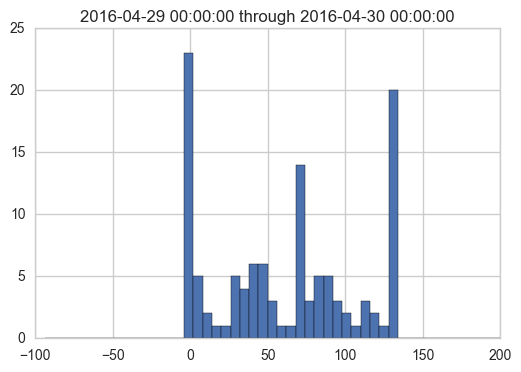

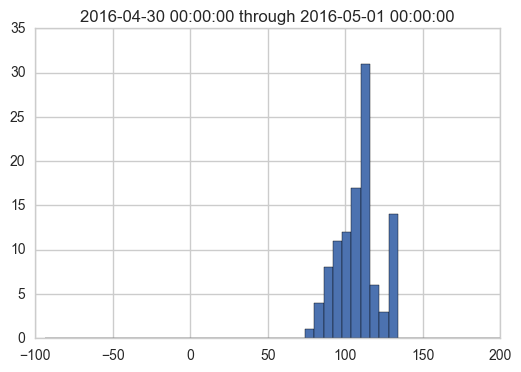

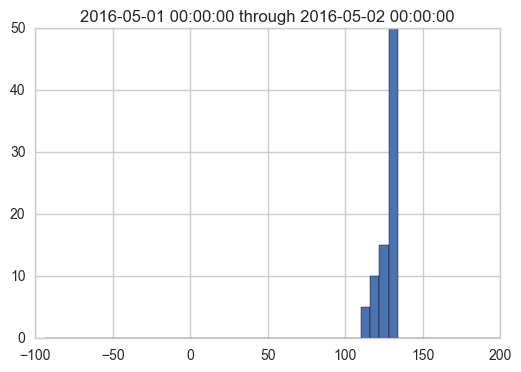

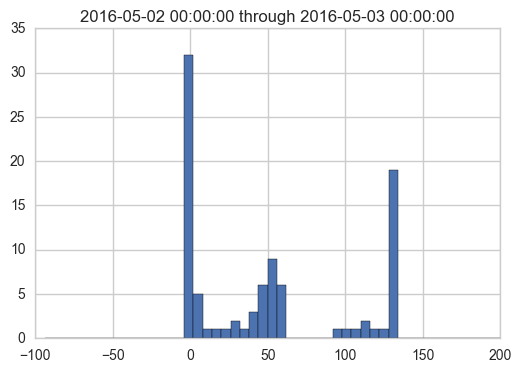

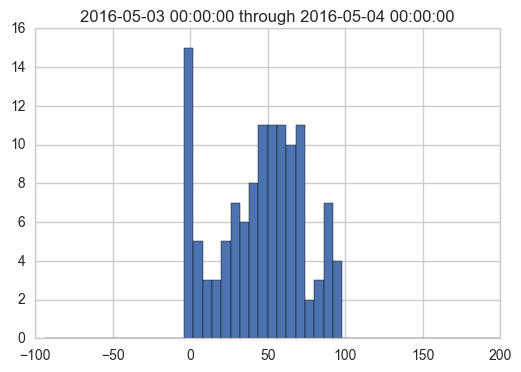

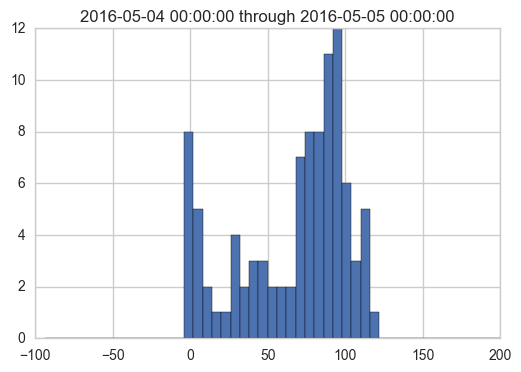

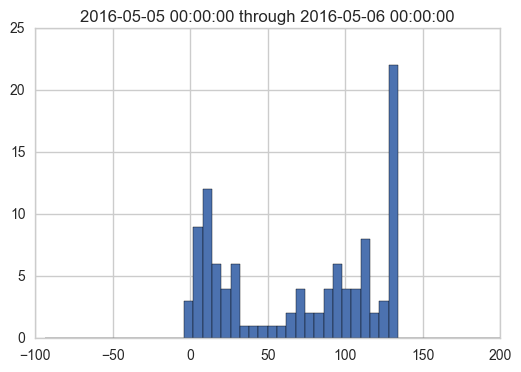

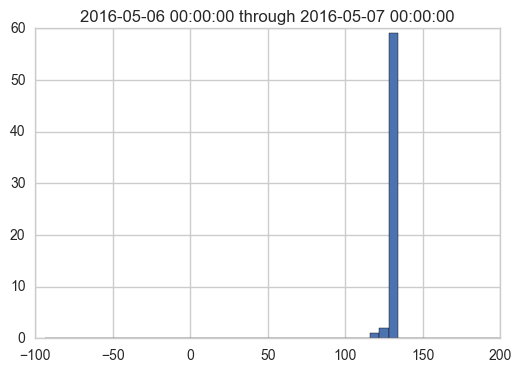

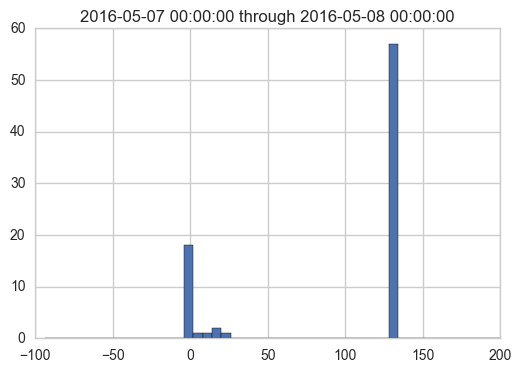

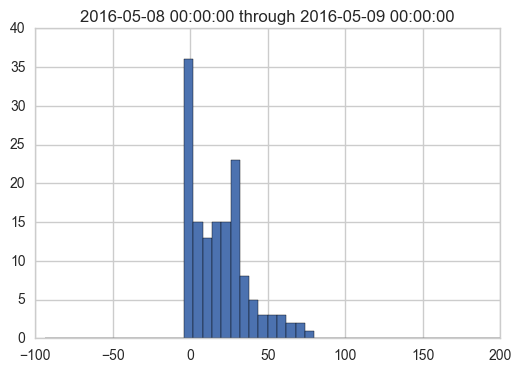

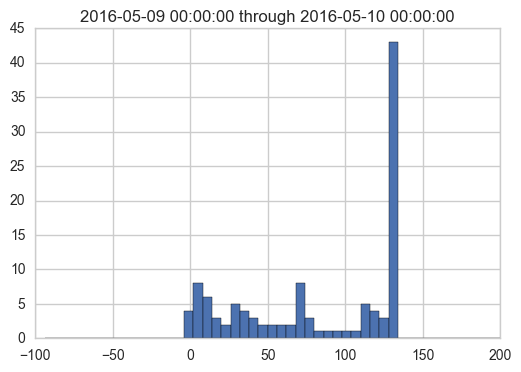

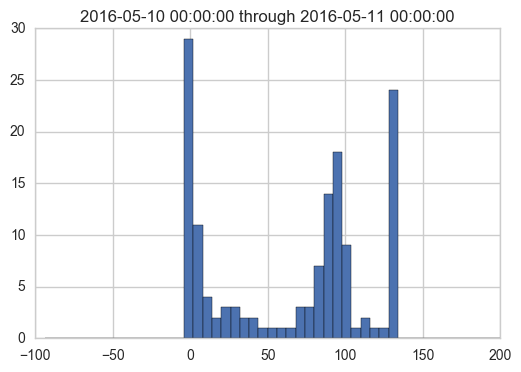

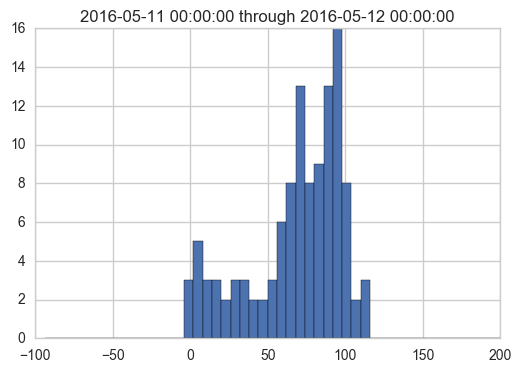

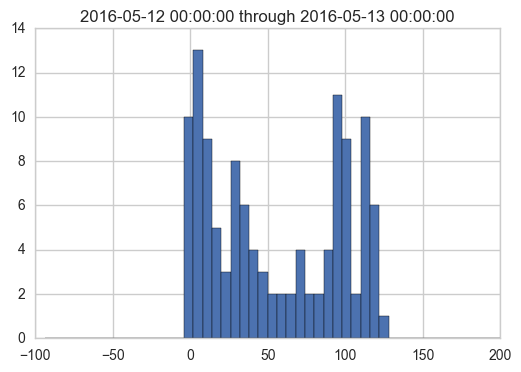

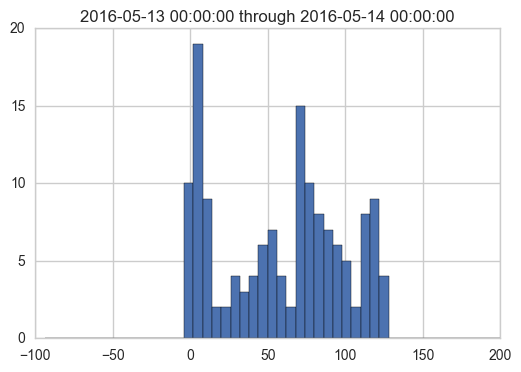

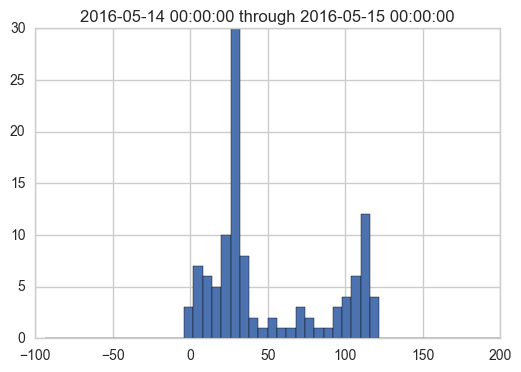

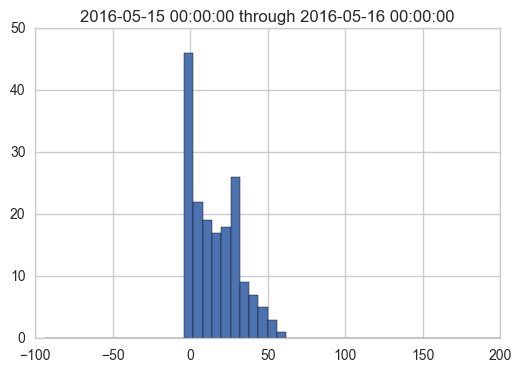

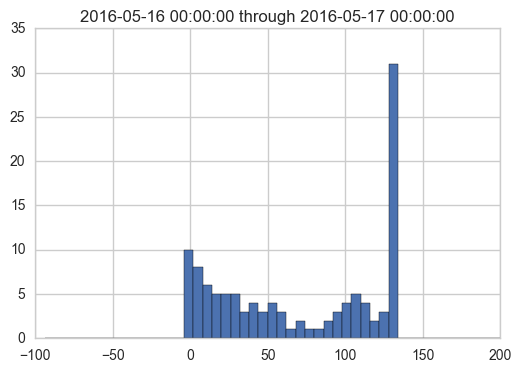

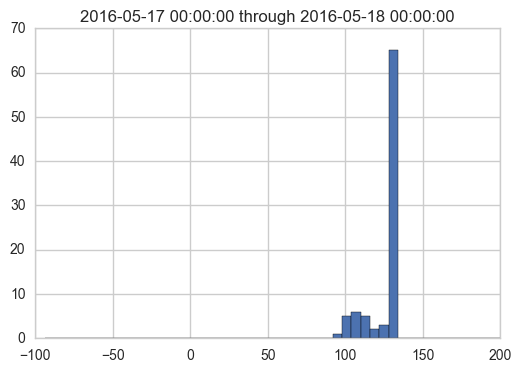

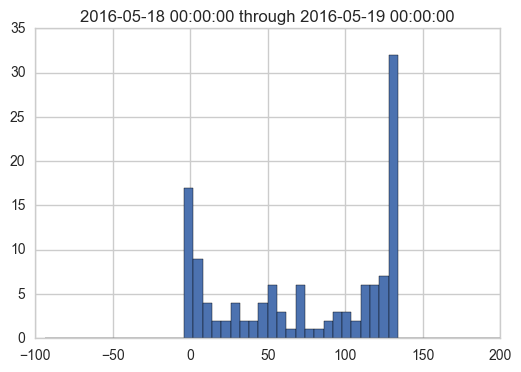

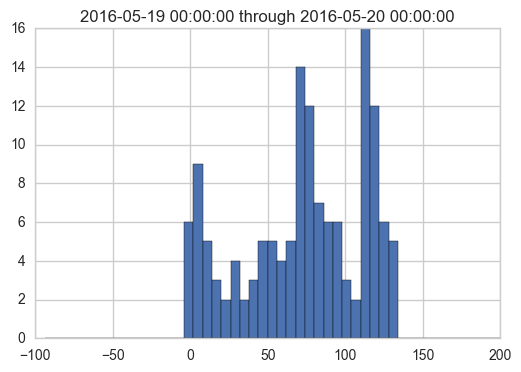

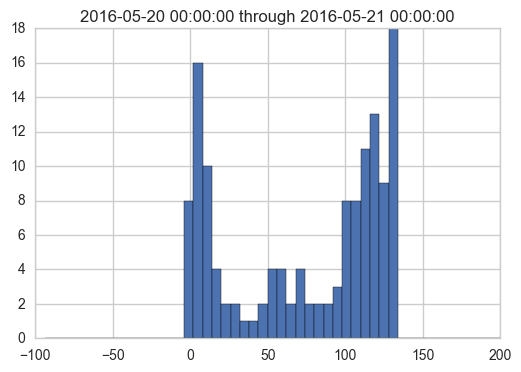

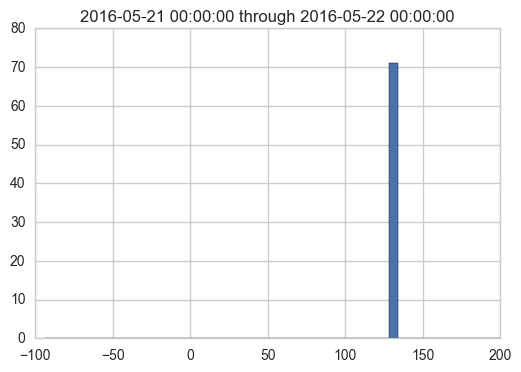

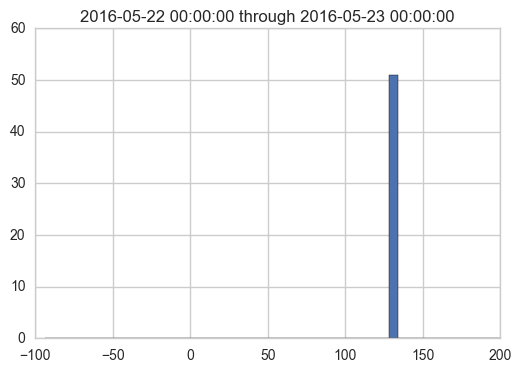

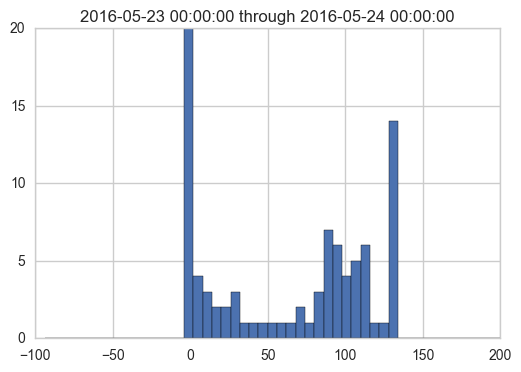

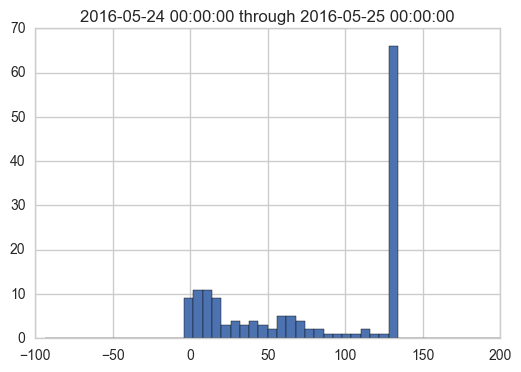

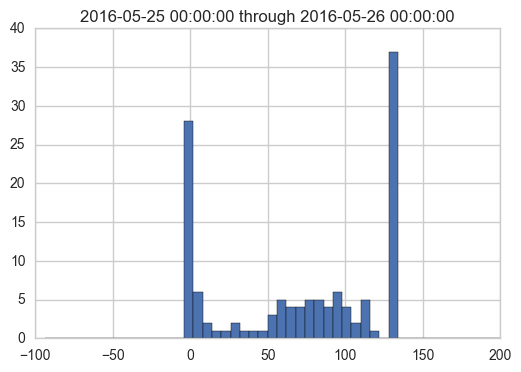

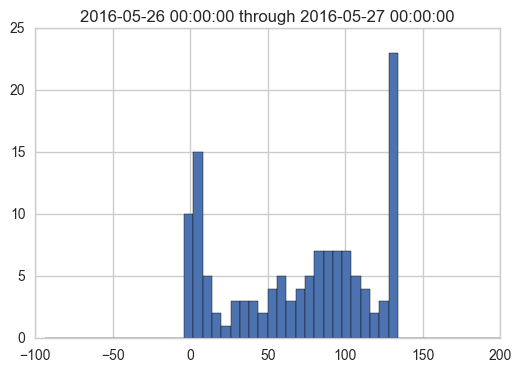

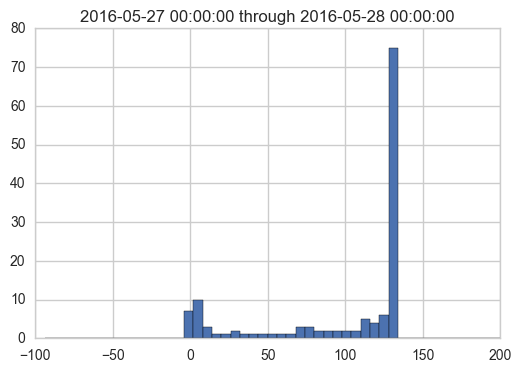

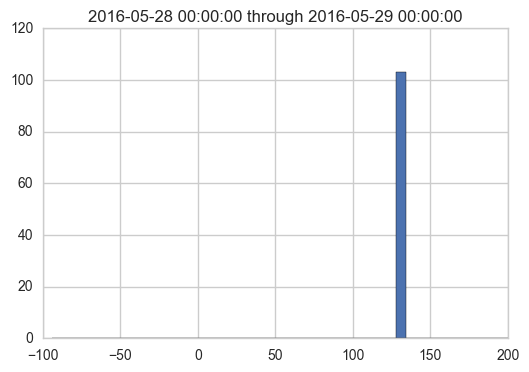

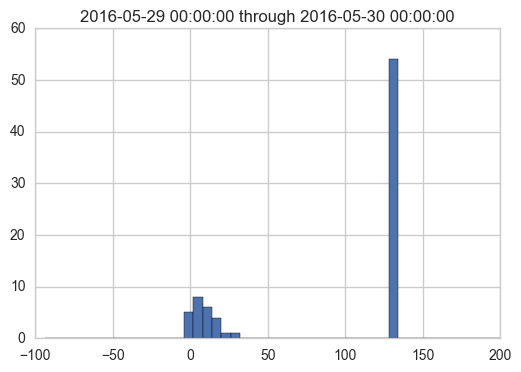

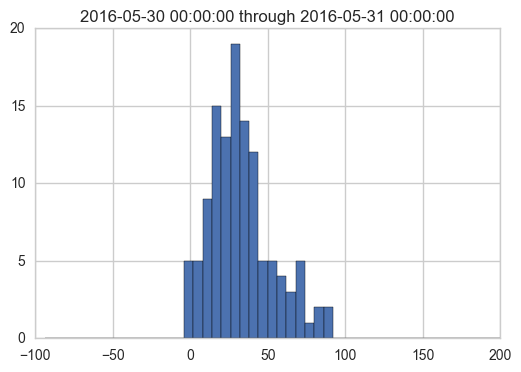

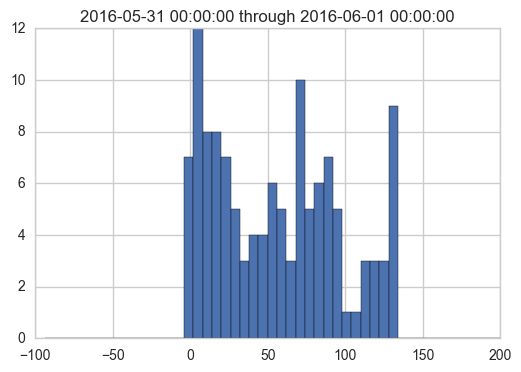

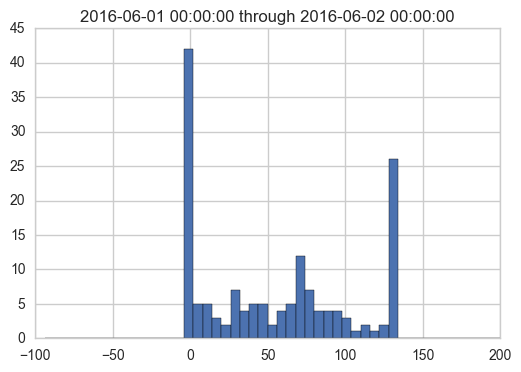

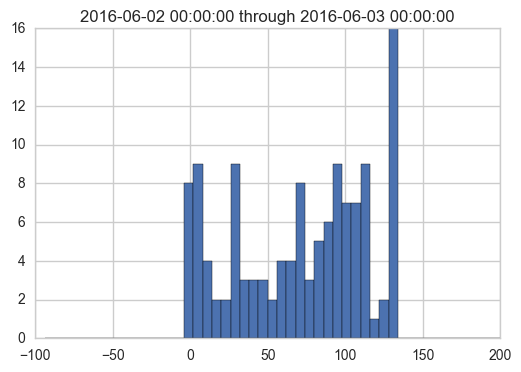

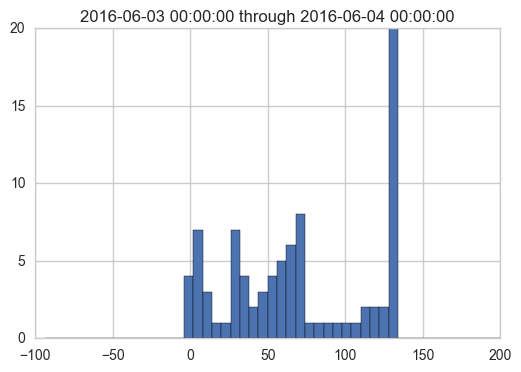

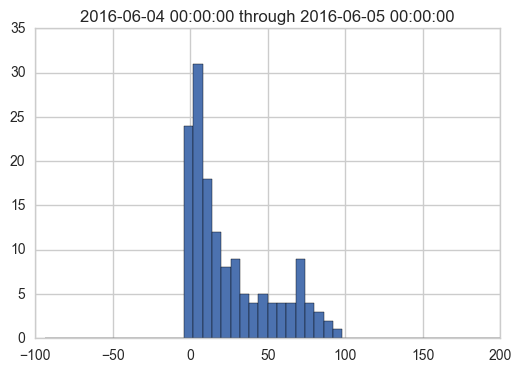

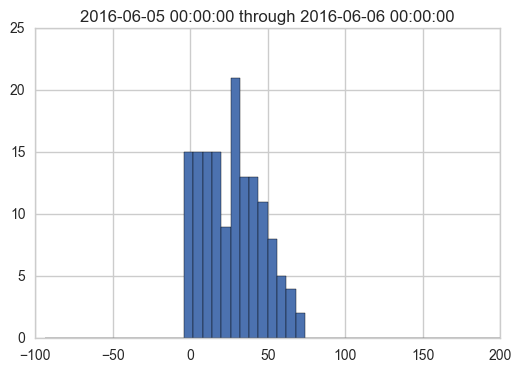

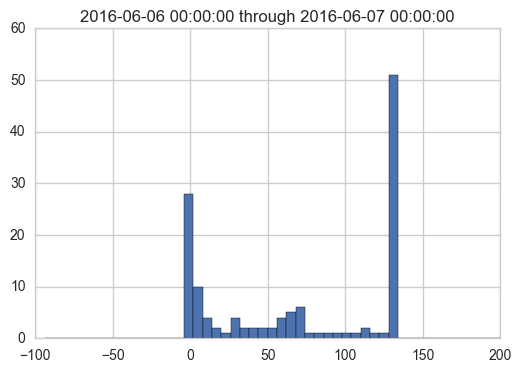

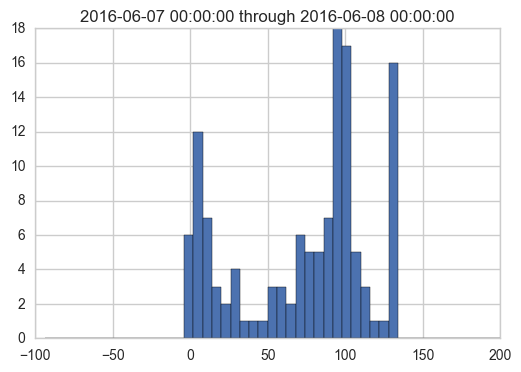

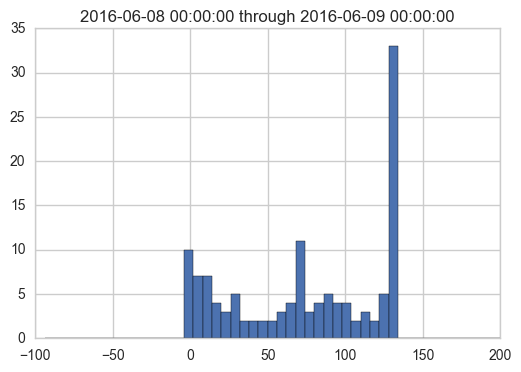

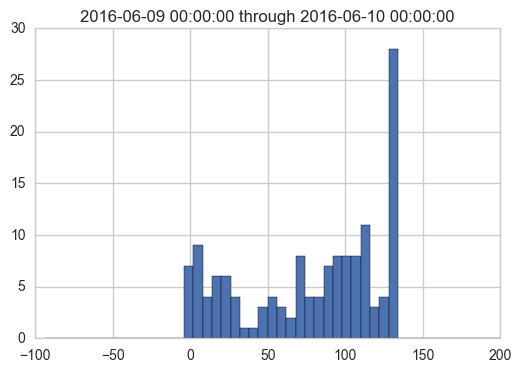

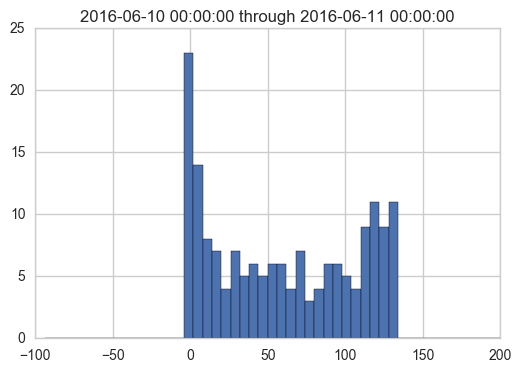

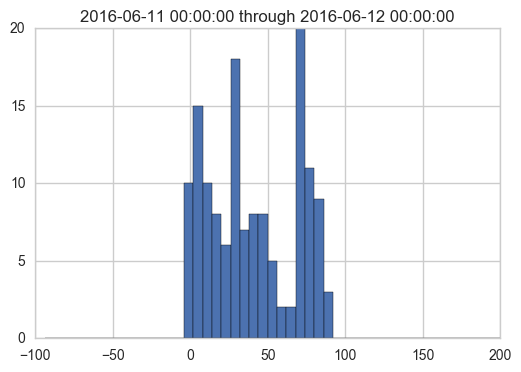

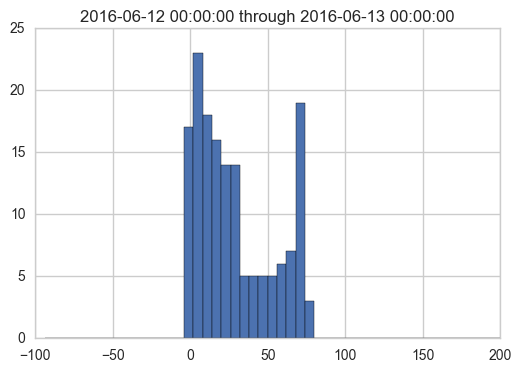

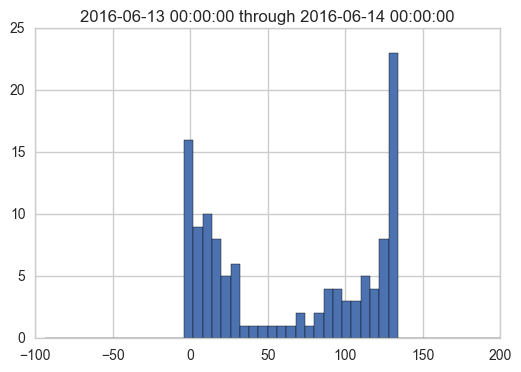

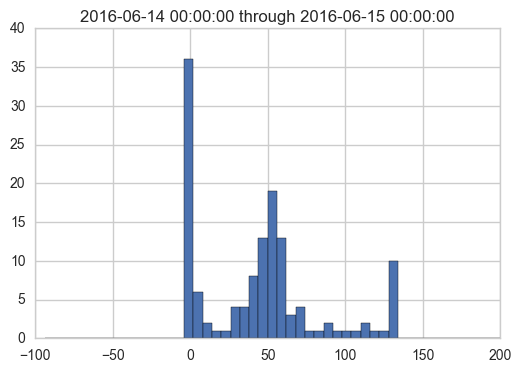

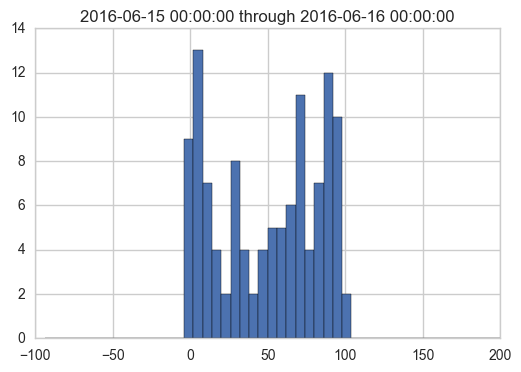

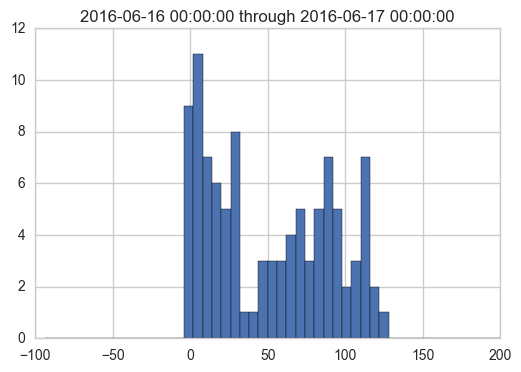

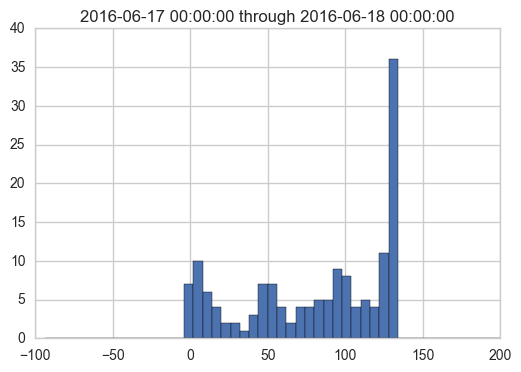

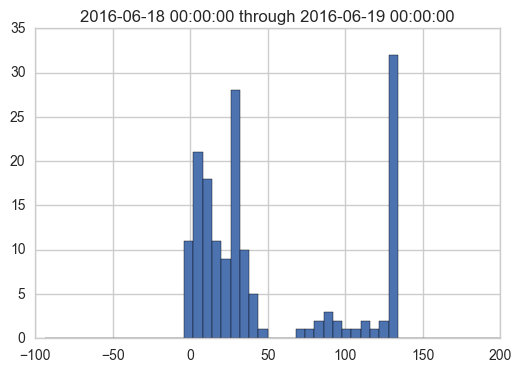

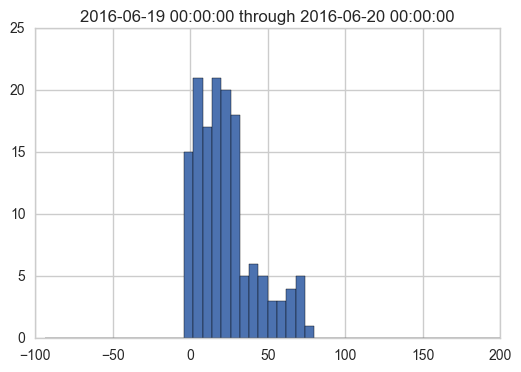

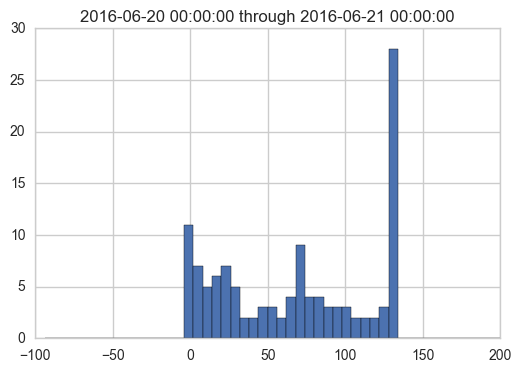

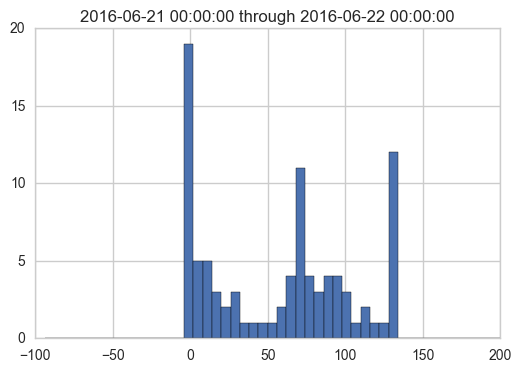

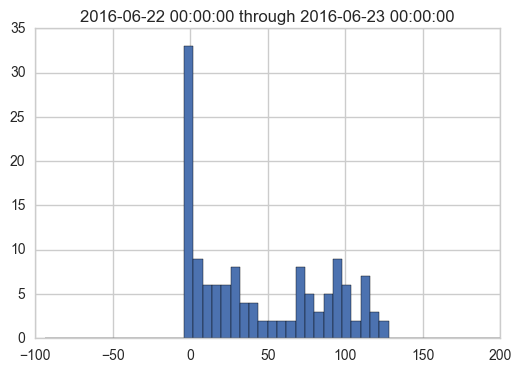

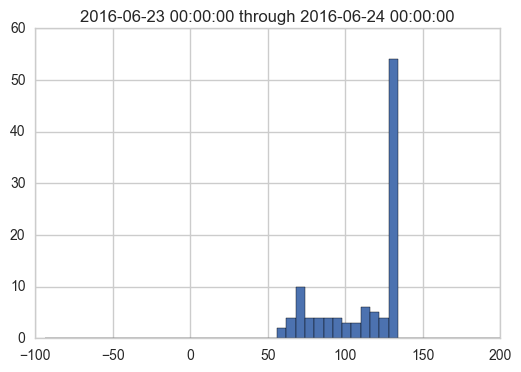

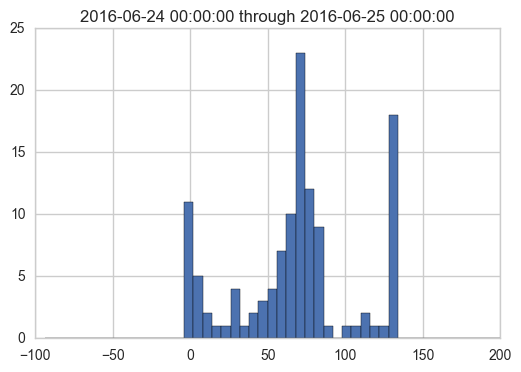

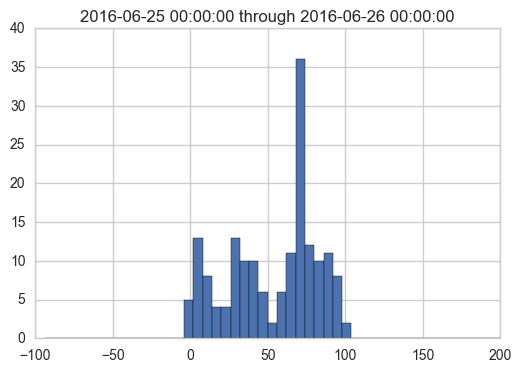

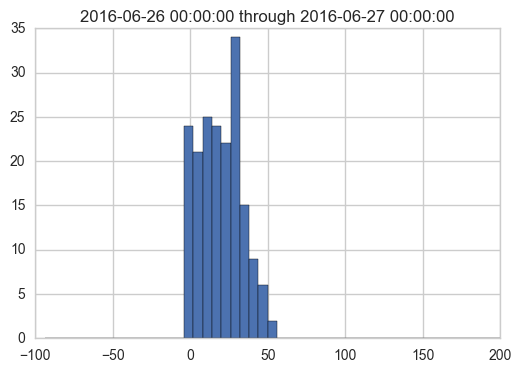

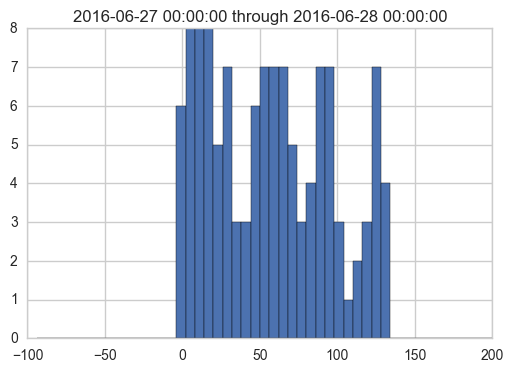

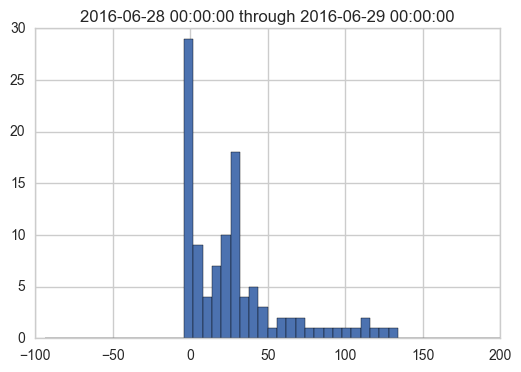

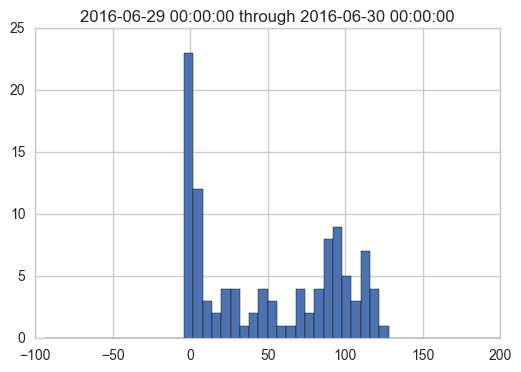

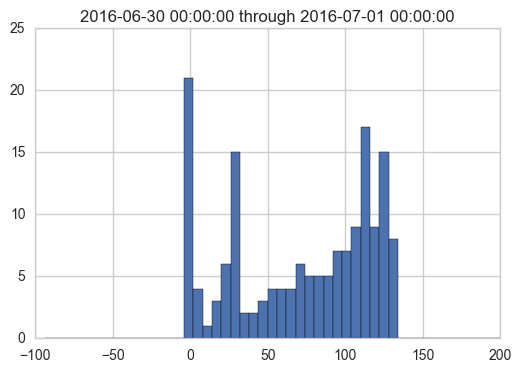

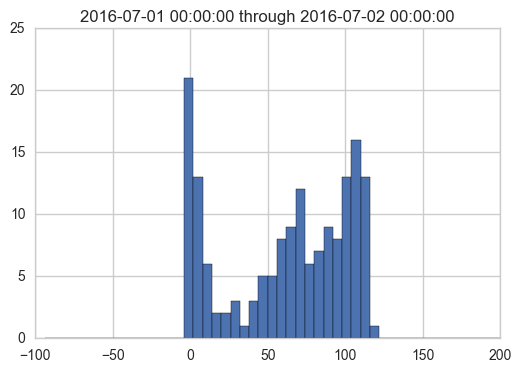

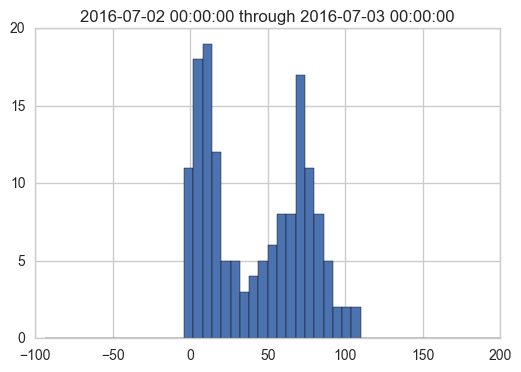

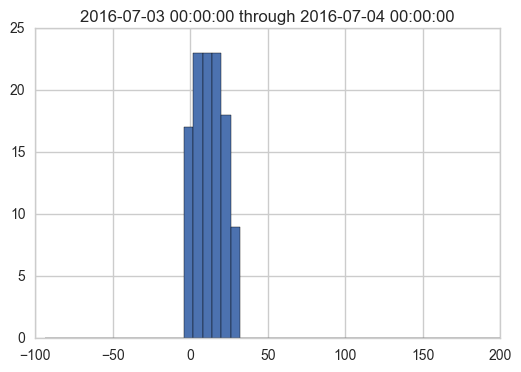

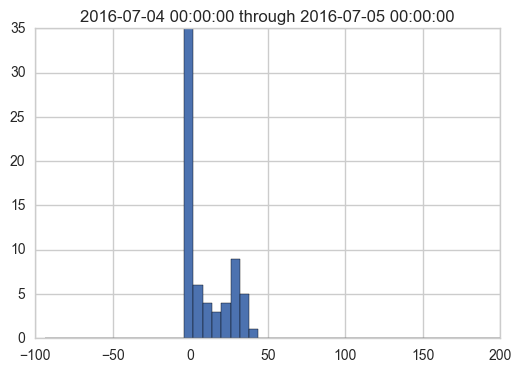

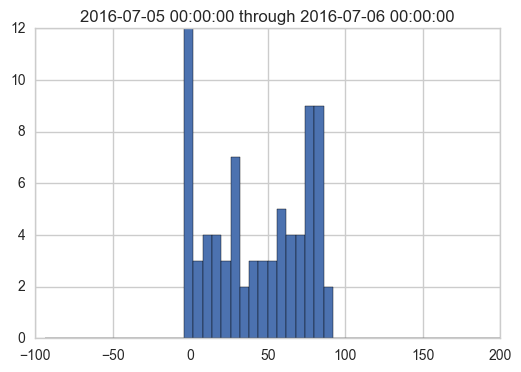

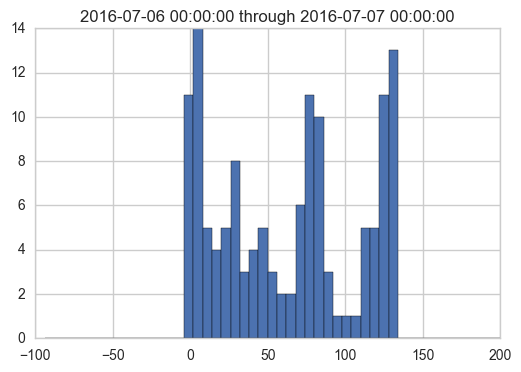

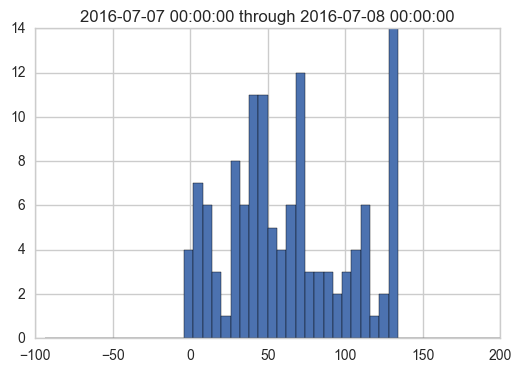

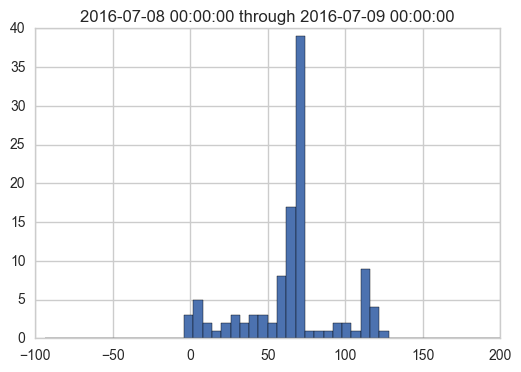

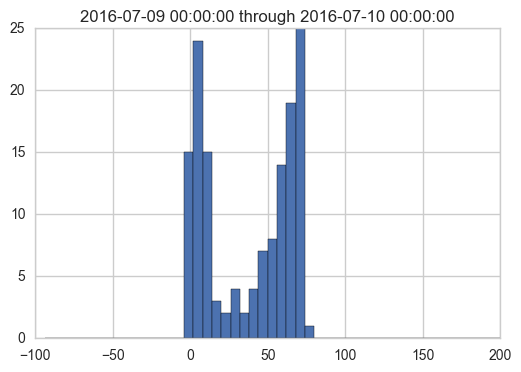

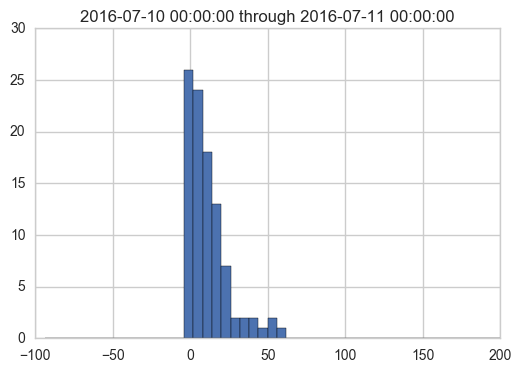

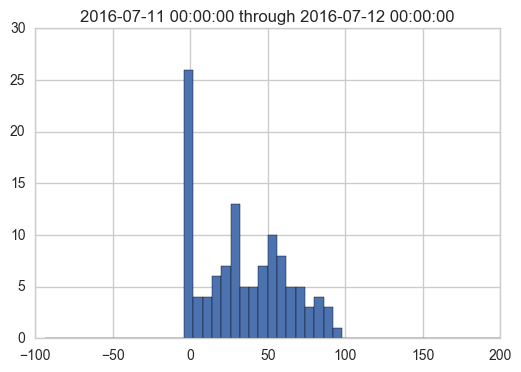

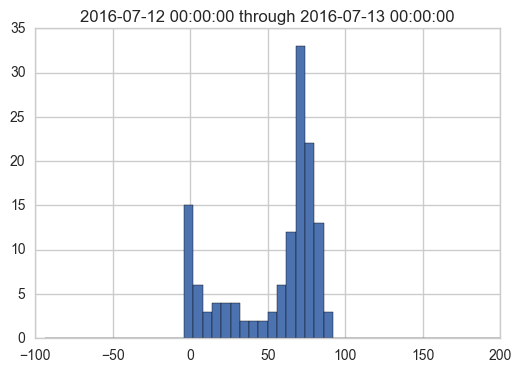

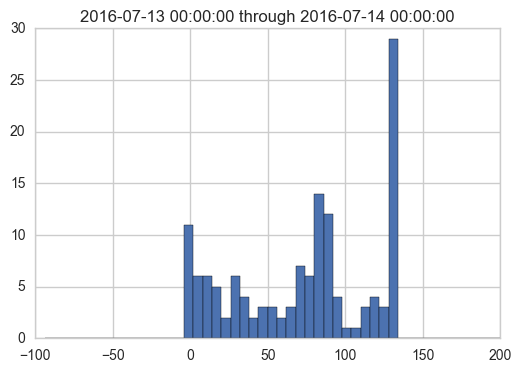

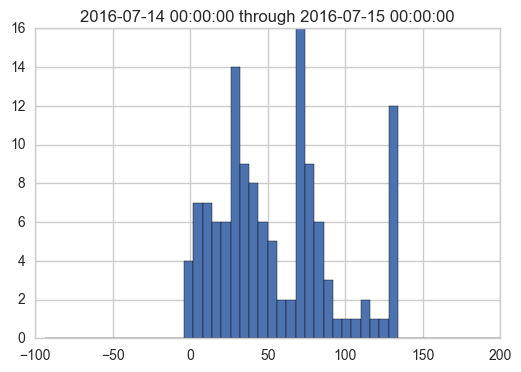

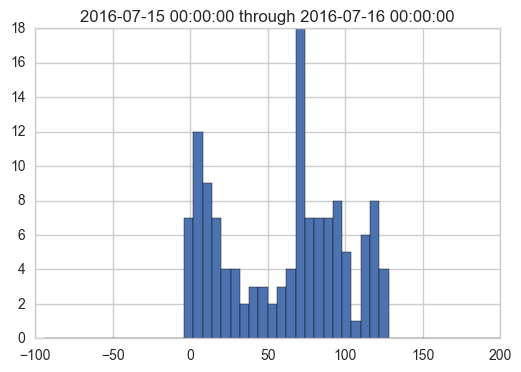

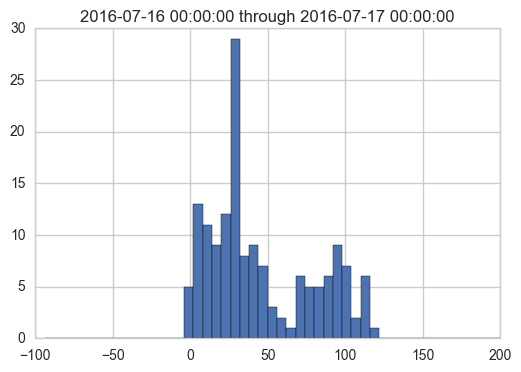

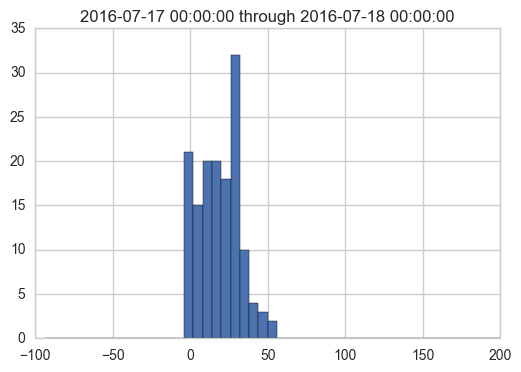

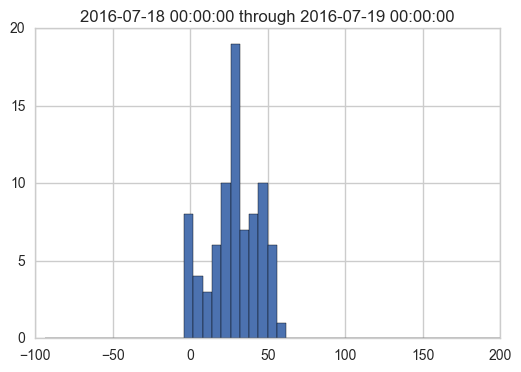

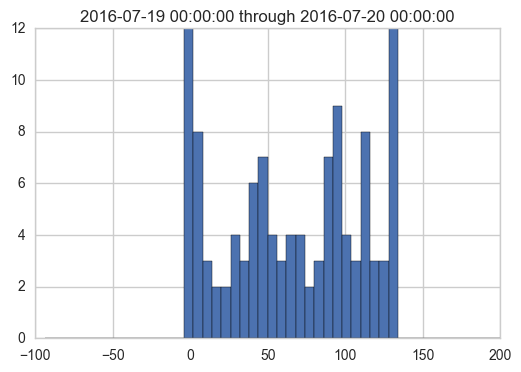

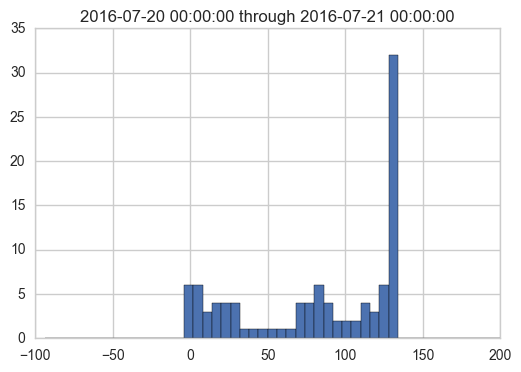

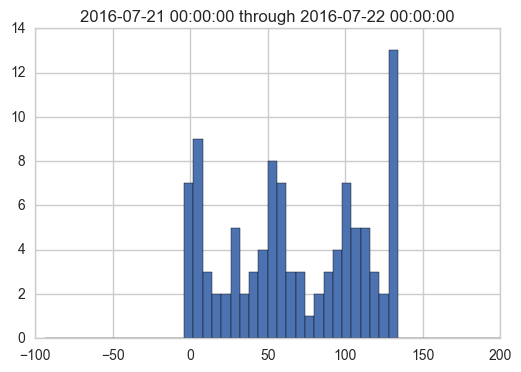

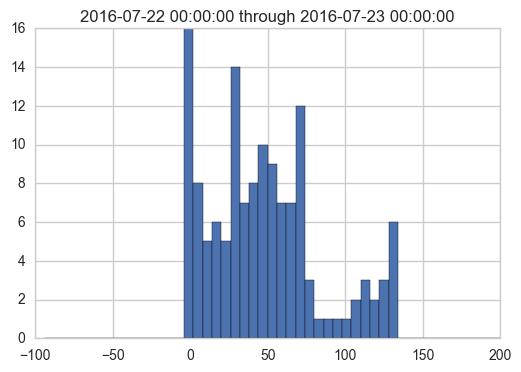

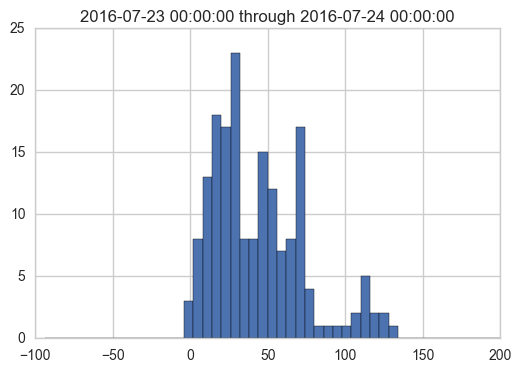

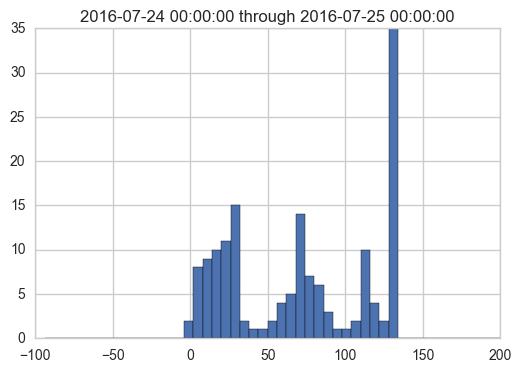

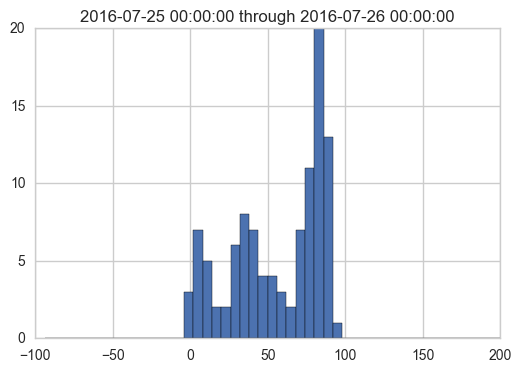

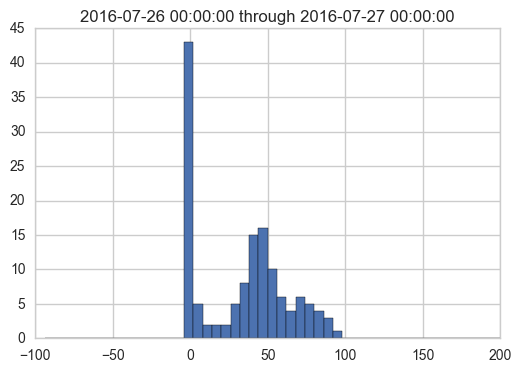

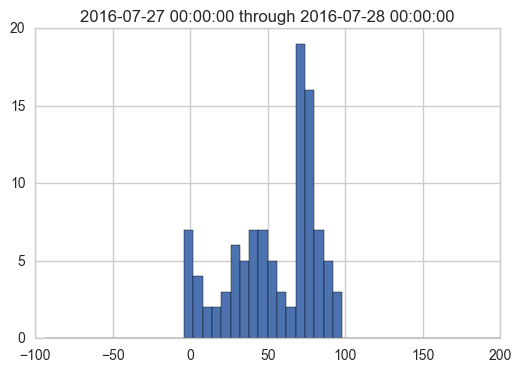

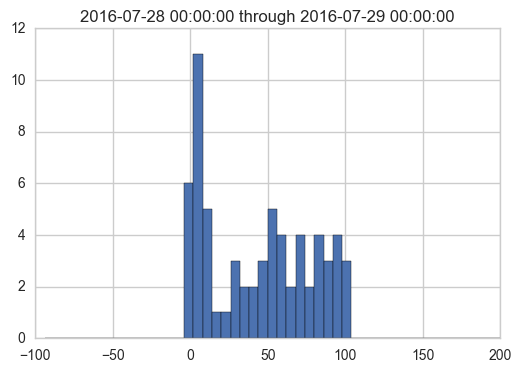

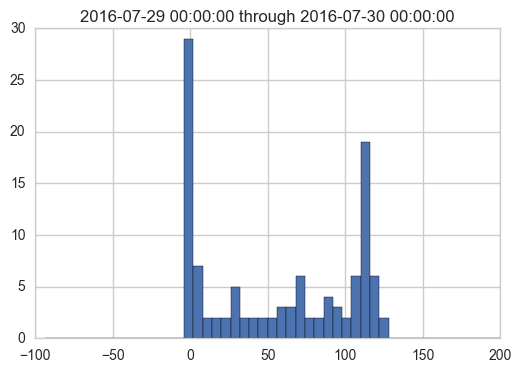

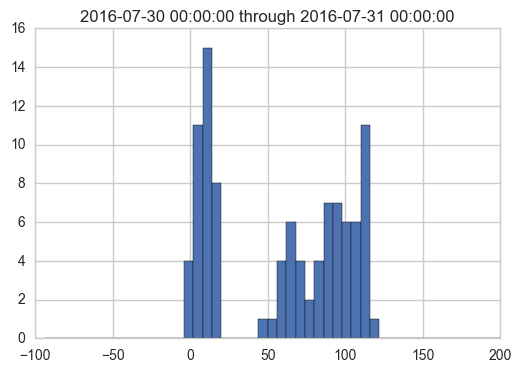

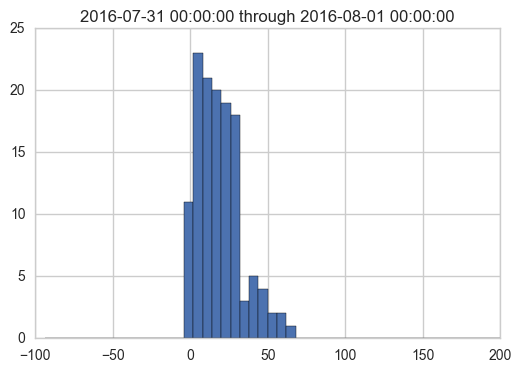

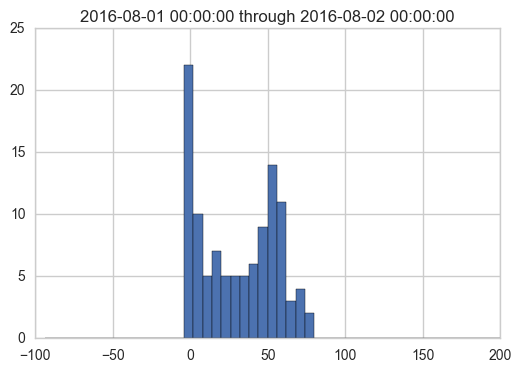

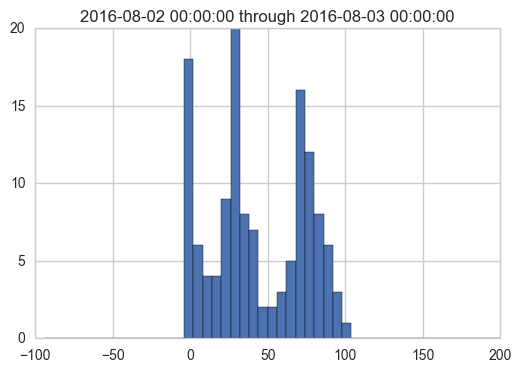

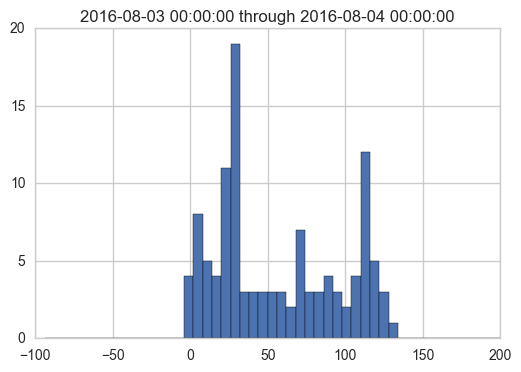

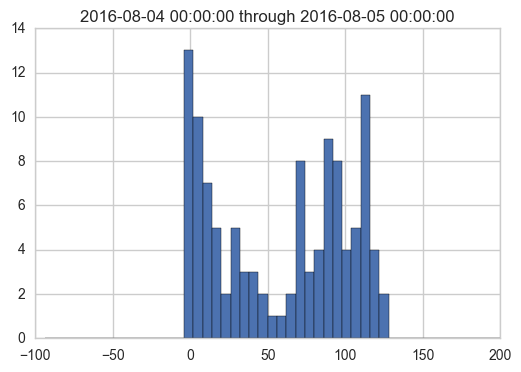

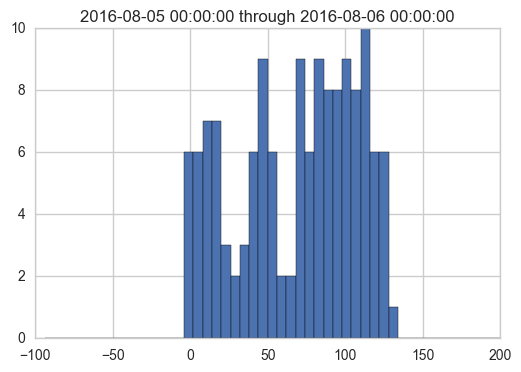

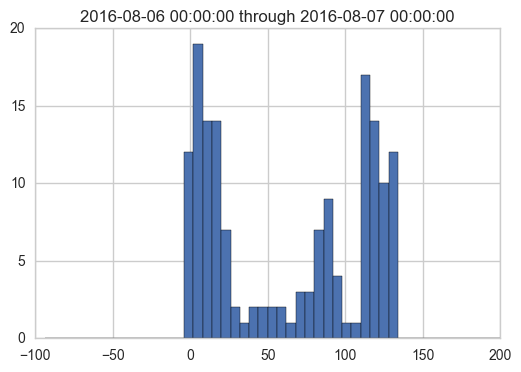

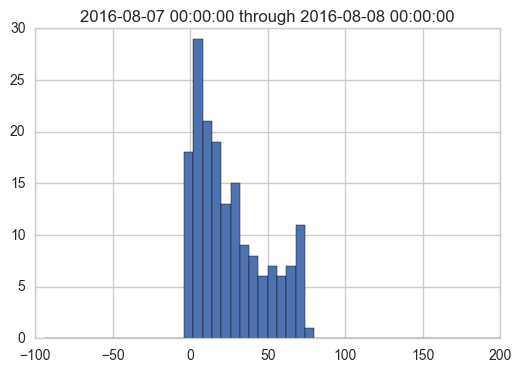

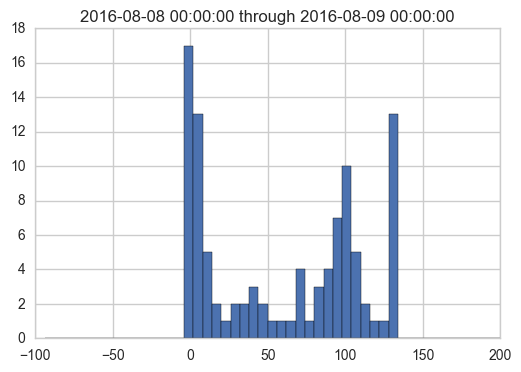

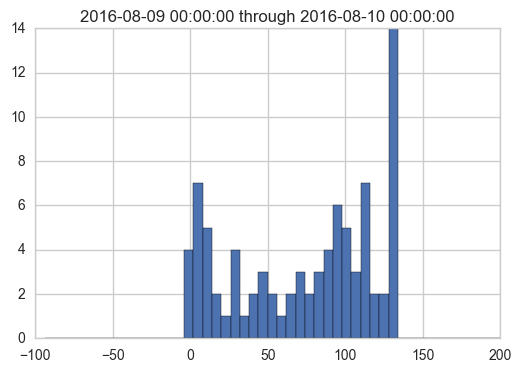

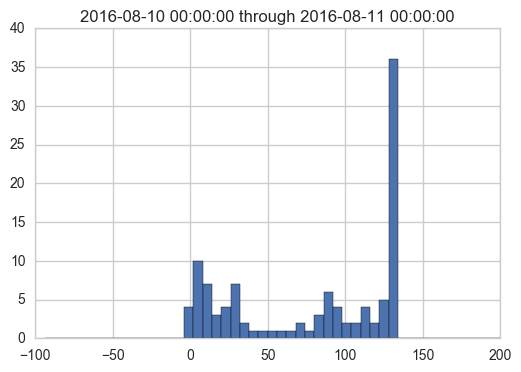

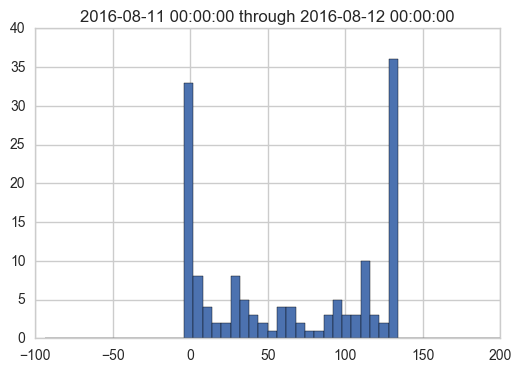

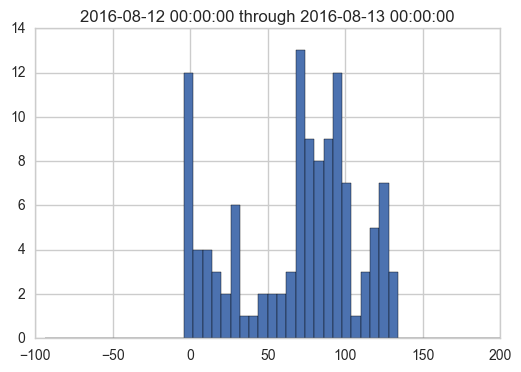

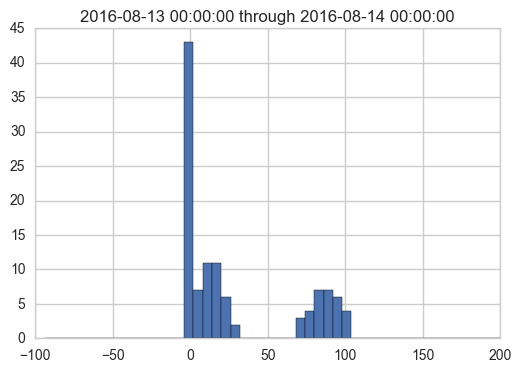

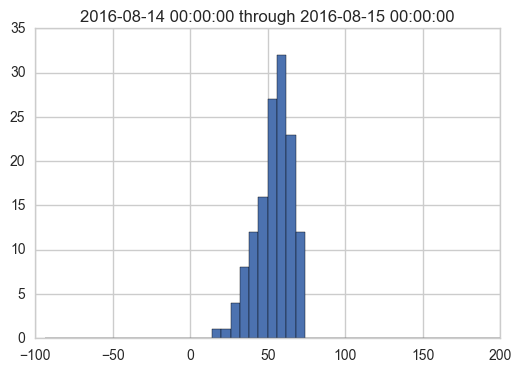

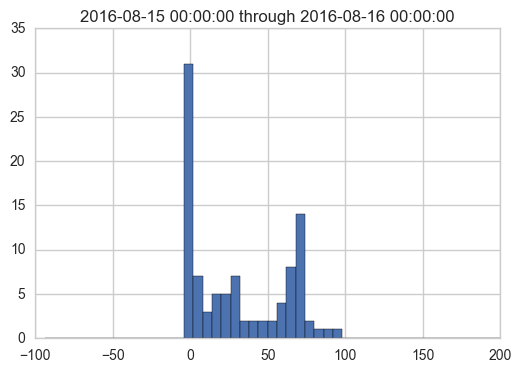

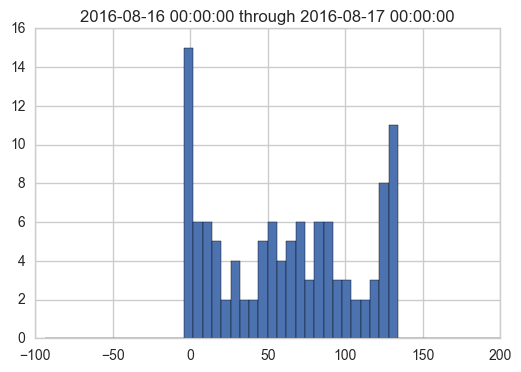

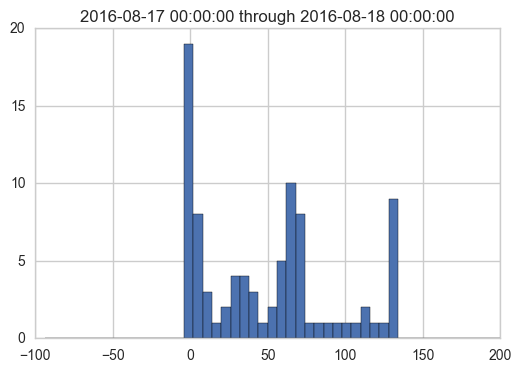

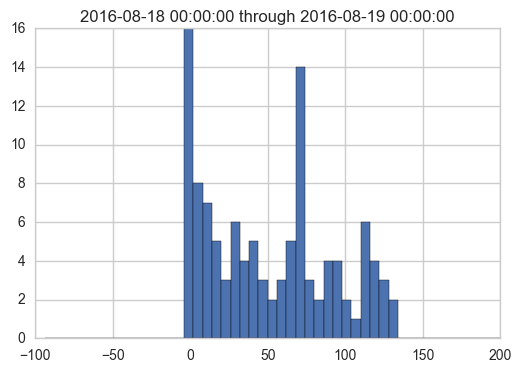

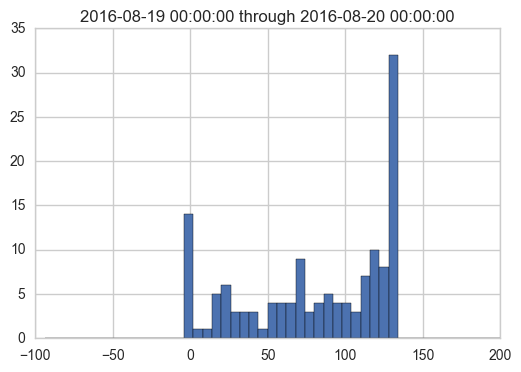

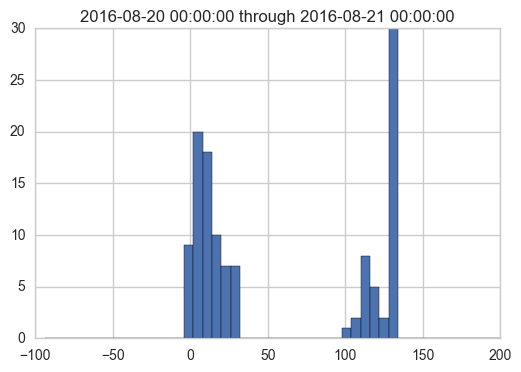

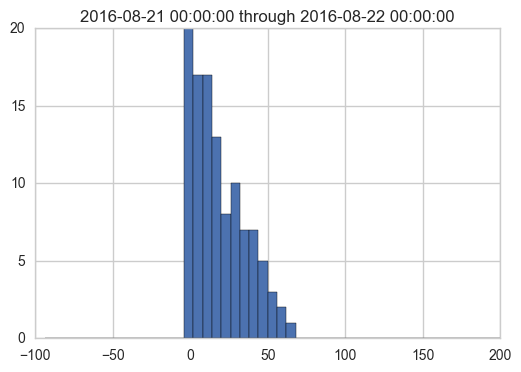

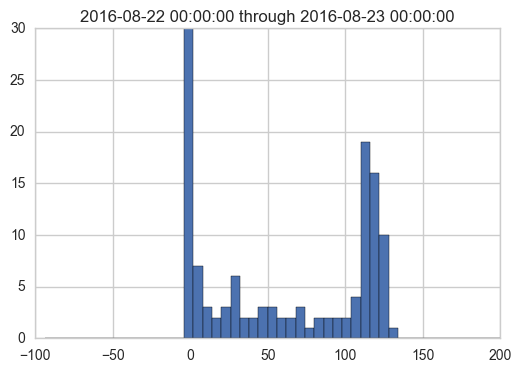

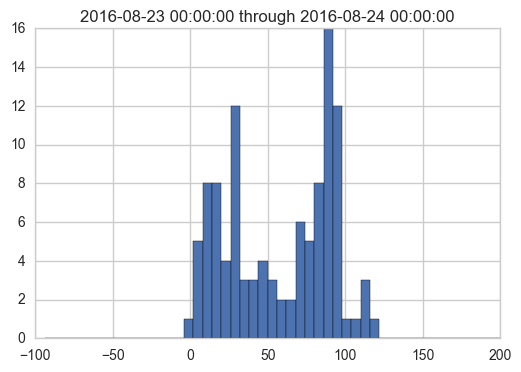

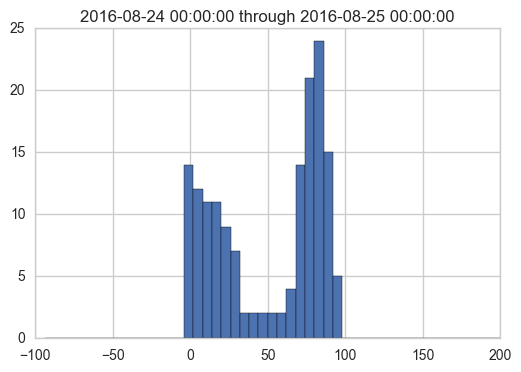

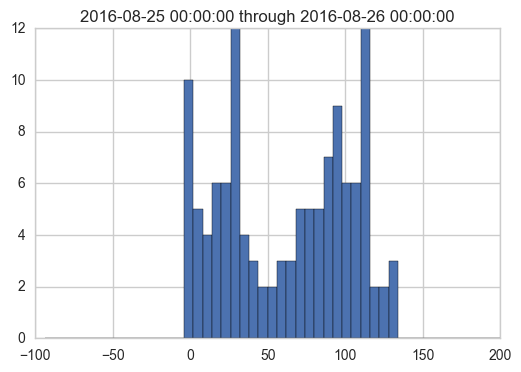

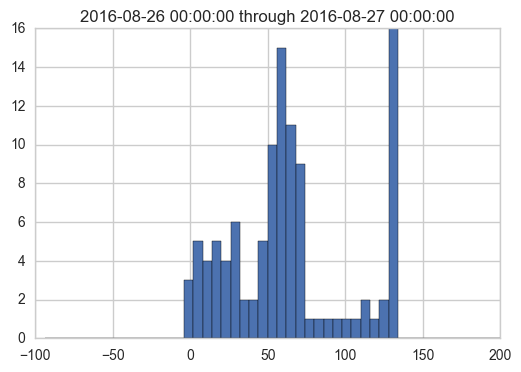

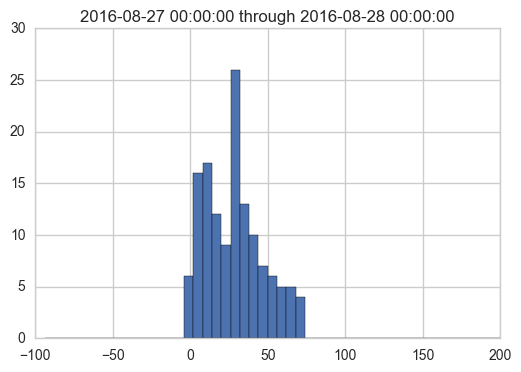

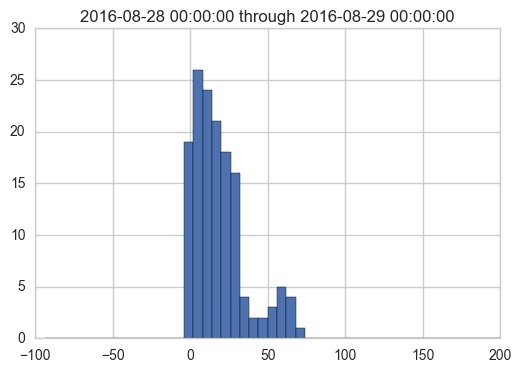

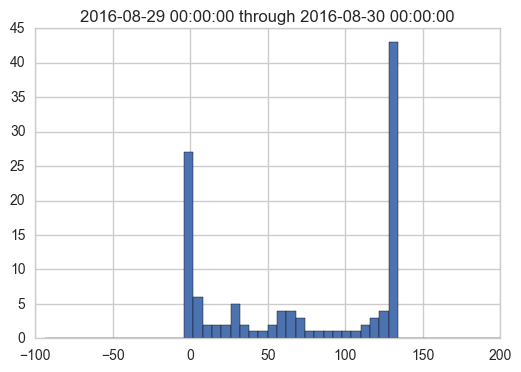

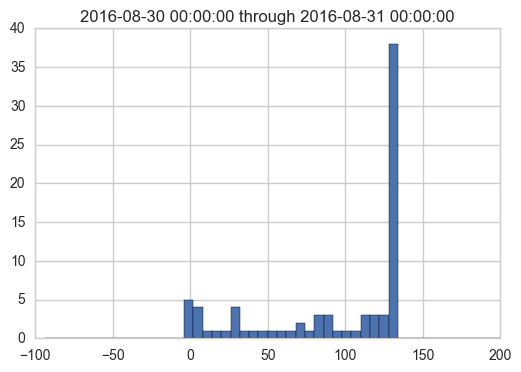

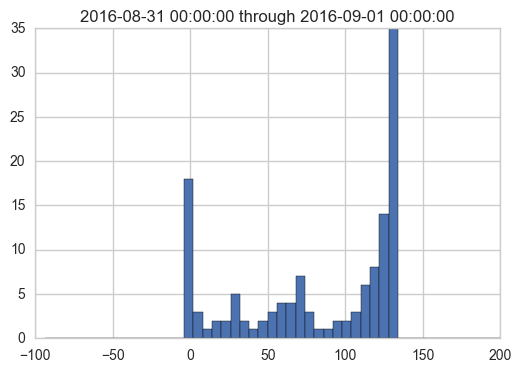

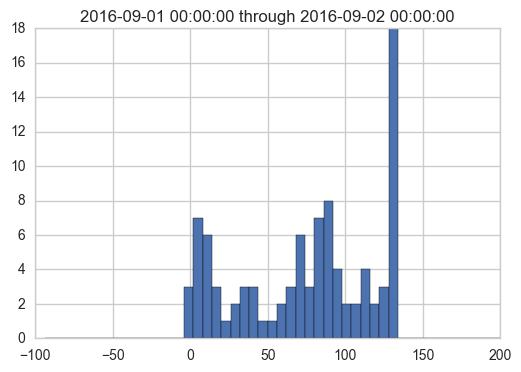

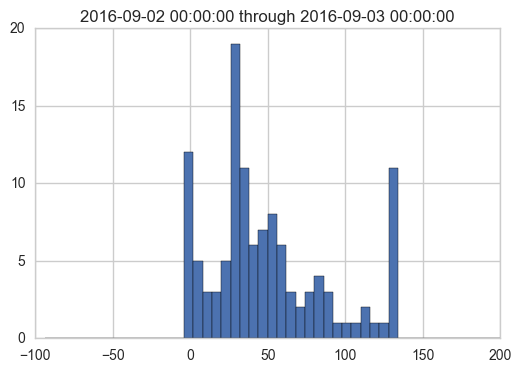

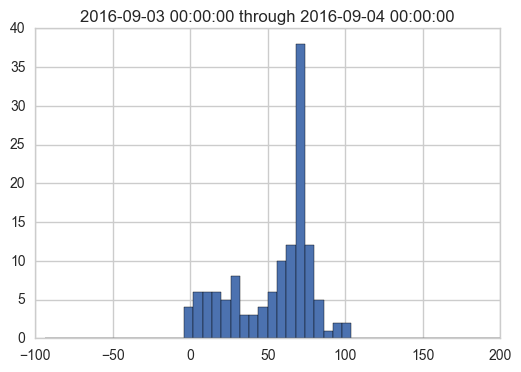

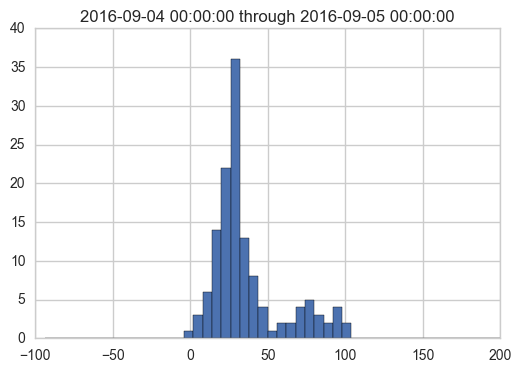

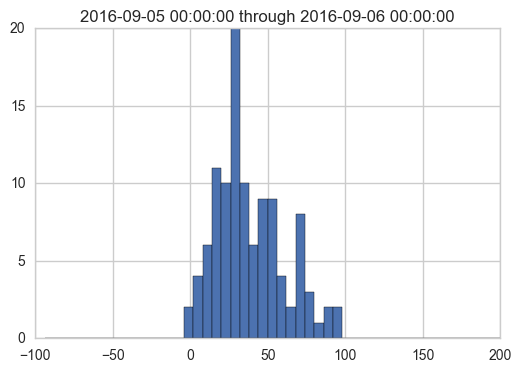

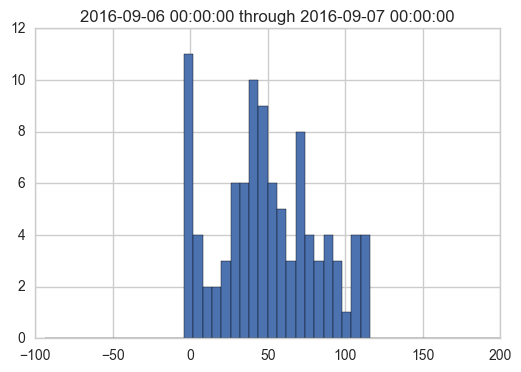

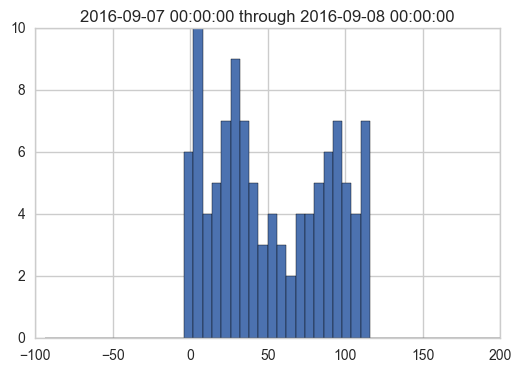

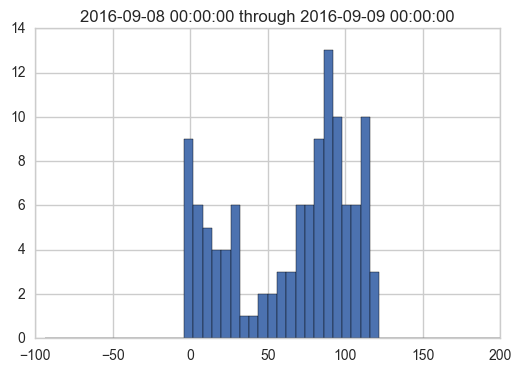

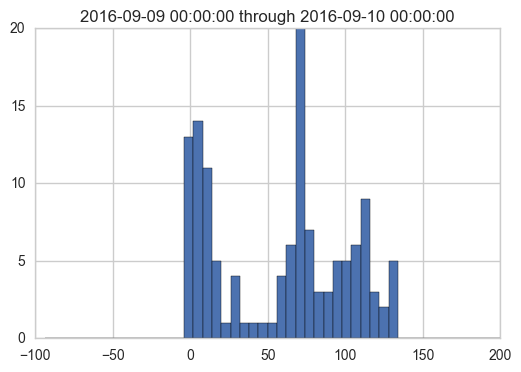

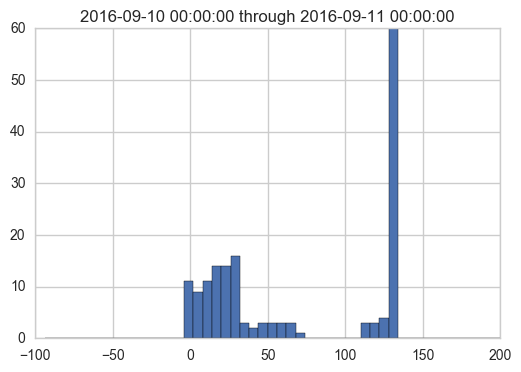

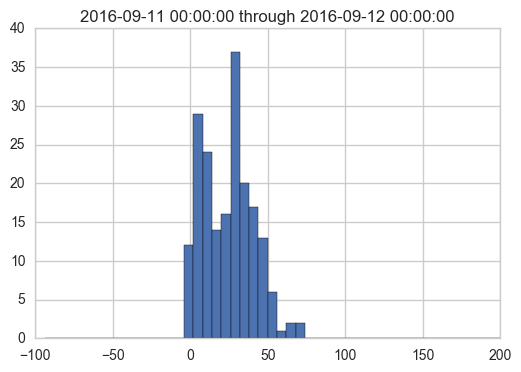

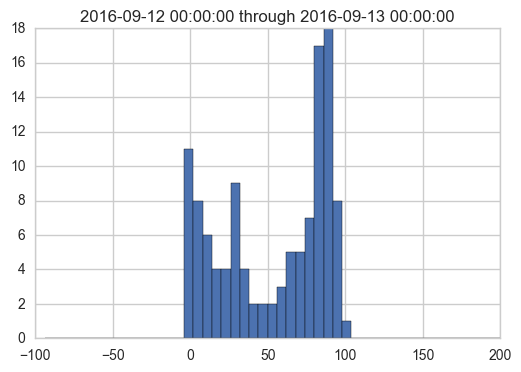

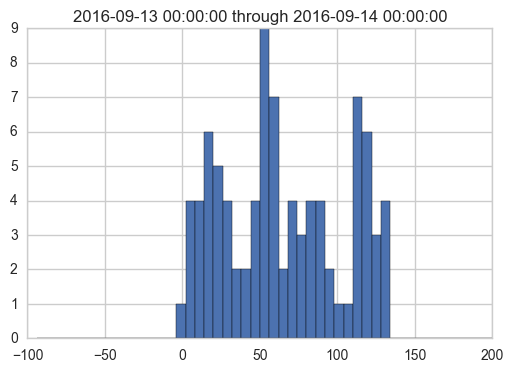

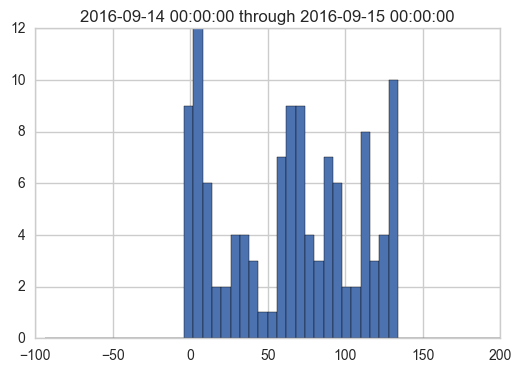

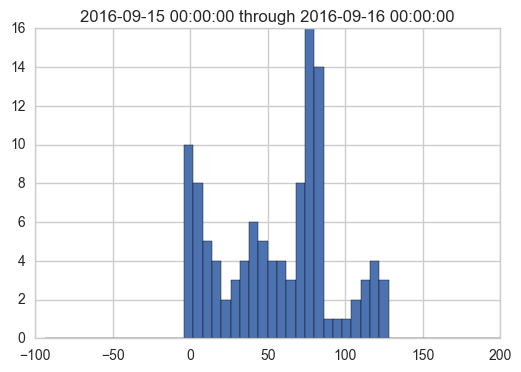

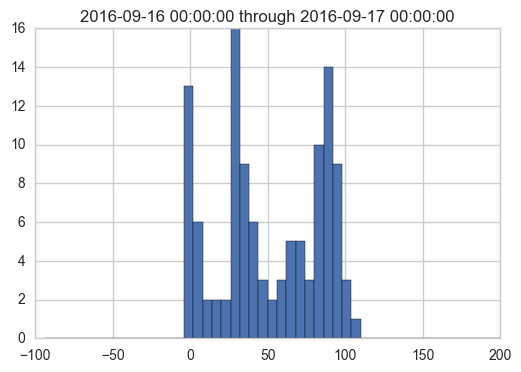

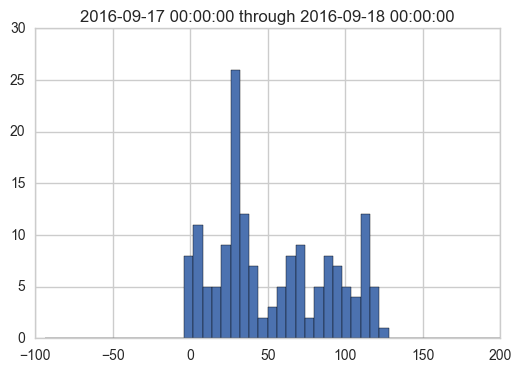

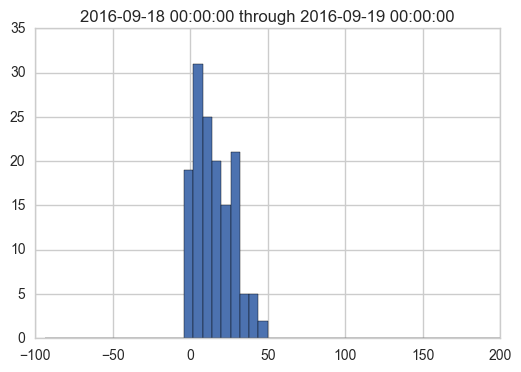

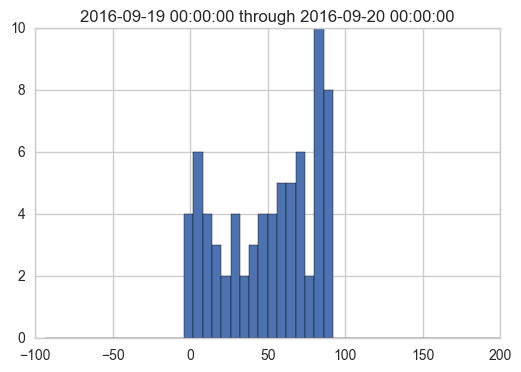

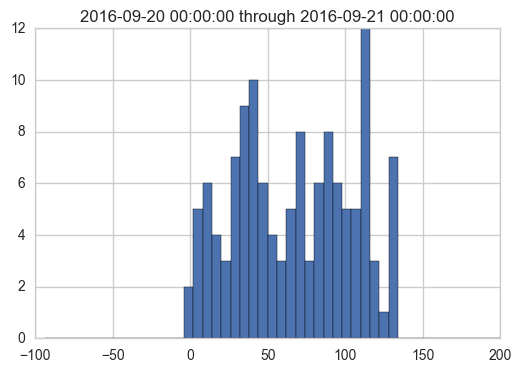

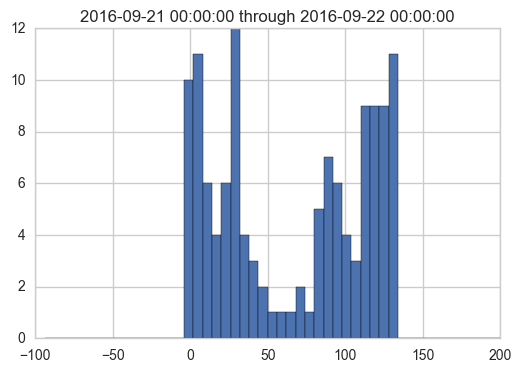

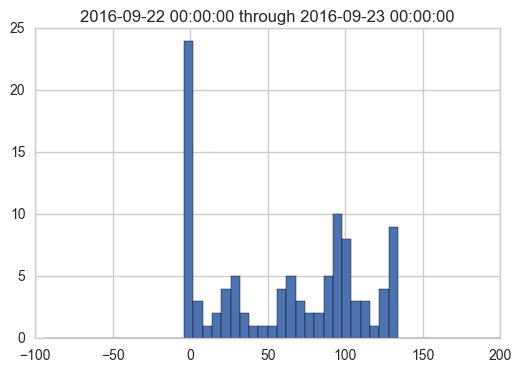

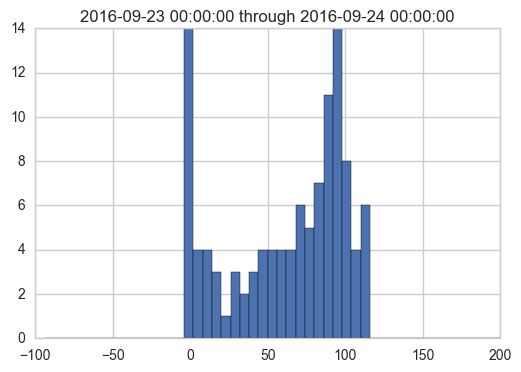

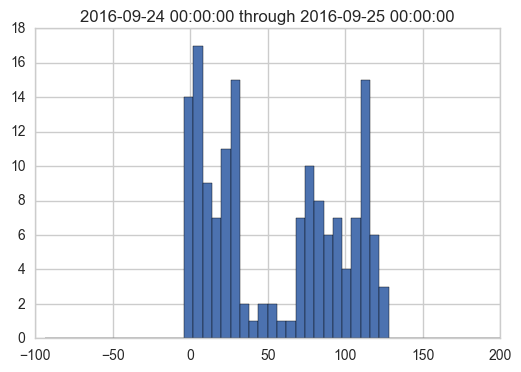

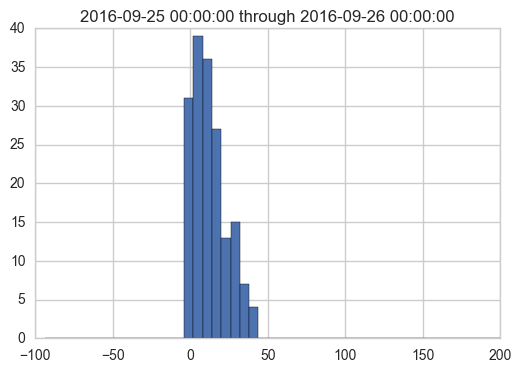

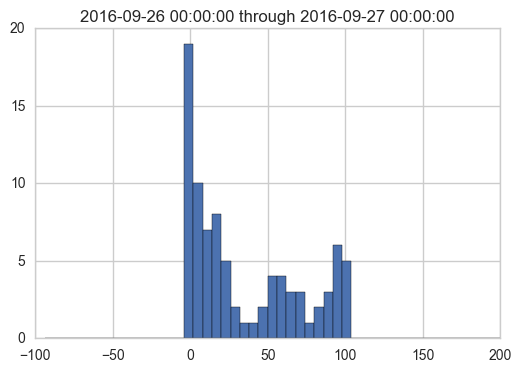

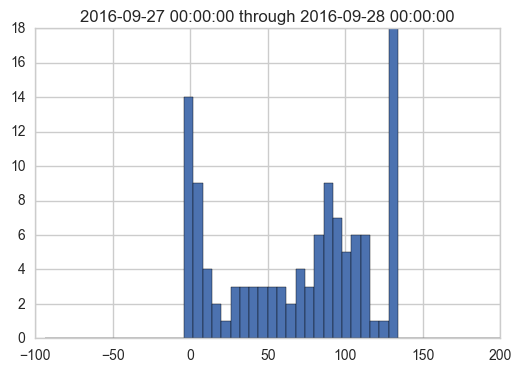

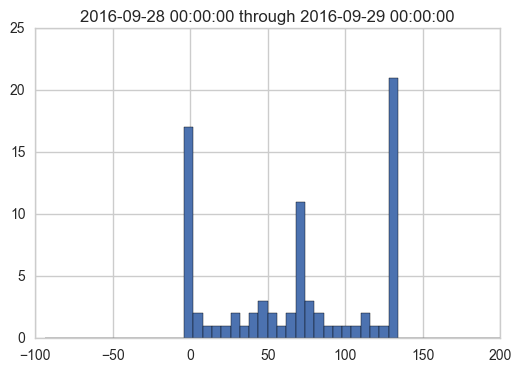

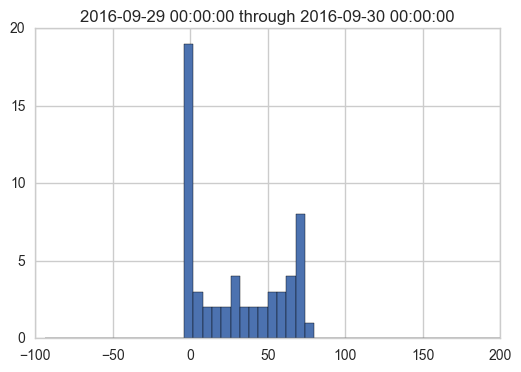

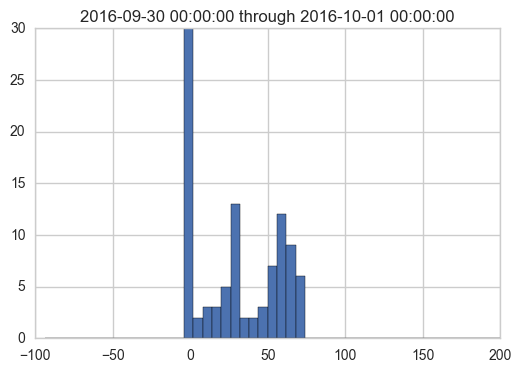

In [113]:
# Look at distributions each day
start = pd.to_datetime('2015-07-01 00:00:00')
end = pd.to_datetime('2015-07-02 00:00:00')
stop = pd.to_datetime('2016-10-01 00:00:00')
add_day = datetime.timedelta(days=1)

while end <= stop:
    pd.DataFrame.hist(discrete_bike_data_31116[((discrete_bike_data_31116['Date'] >= start) & 
                                                (discrete_bike_data_31116['Date'] <= end))], 
                      column='Count_Percent_Capacity', 
                      bins=50, range=(-100,200))
    pl.title(str(start) + ' through ' + str(end))
    start += add_day
    end += add_day

<a id='predictions'></a>  
# How does a prediction model fare on the newly formed data set?
[Back to Top](#top)  
[Back to Baseline Data](#baselinedata)

In [153]:
reduced_31116.set_index('Date', inplace=True)
reduced_31116.drop('Station_Number', axis=1, inplace=True)
reduced_31116 

Count_Percent_Capacity
Date                                       
2015-07-01 08:25:00                5.263158
2015-07-01 08:26:00                0.000000
2015-07-01 09:42:00                5.263158
2015-07-01 09:55:00                0.000000
2015-07-01 10:38:00                5.263158
2015-07-01 11:11:00                0.000000
2015-07-01 14:16:00                5.263158
2015-07-01 14:32:00               10.526316
2015-07-01 14:49:00               15.789474
2015-07-01 15:00:00               21.052632
2015-07-01 15:08:00               15.789474
2015-07-01 15:20:00               21.052632
2015-07-01 15:39:00               15.789474
2015-07-01 15:49:00               10.526316
2015-07-01 15:49:00                5.263158
2015-07-01 15:50:00               10.526316
2015-07-01 15:58:00               15.789474
2015-07-01 16:01:00               21.052632
2015-07-01 16:03:00               15.789474
2015-07-01 16:07:00               21.052632
2015-07-01 16:09:00               26.315789
2015-07-01 16:10:00               31.578947
2015-07-01 16:10:00               26.315789
2015-07-01 16:26:00               31.578947
2015-07-01 16:26:00               26.315789
2015-07-01 16:26:00               31.578947
2015-07-01 16:28:00               36.842105
2015-07-01 16:46:00               42.105263
2015-07-01 16:49:00               47.368421
2015-07-01 16:52:00               52.631579
...                                     ...
2016-09-30 16:40:00               31.578947
2016-09-30 16:53:00               26.315789
2016-09-30 16:56:00               21.052632
2016-09-30 17:10:00               26.315789
2016-09-30 17:15:00               31.578947
2016-09-30 17:33:00               26.315789
2016-09-30 17:37:00               21.052632
2016-09-30 17:41:00               26.315789
2016-09-30 18:06:00               31.578947
2016-09-30 18:16:00               36.842105
2016-09-30 18:23:00               42.105263
2016-09-30 18:23:00               47.368421
2016-09-30 18:23:00               52.631579
2016-09-30 18:29:00               57.894737
2016-09-30 18:37:00               63.157895
2016-09-30 18:40:00               57.894737
2016-09-30 18:48:00               63.157895
2016-09-30 18:49:00               57.894737
2016-09-30 18:57:00               52.631579
2016-09-30 19:08:00               57.894737
2016-09-30 19:15:00               63.157895
2016-09-30 19:26:00               57.894737
2016-09-30 19:41:00               63.157895
2016-09-30 19:46:00               57.894737
2016-09-30 19:51:00               52.631579
2016-09-30 21:45:00               57.894737
2016-09-30 22:06:00               63.157895
2016-09-30 23:00:00               57.894737
2016-09-30 23:53:00               52.631579
2016-09-30 23:58:00               57.894737

[50836 rows x 1 columns]

In [167]:
reduced_31116_series = reduced_31116['Count_Percent_Capacity'] 
reduced_31116_series.head(10)

Date
2015-07-01 08:25:00     5.263158
2015-07-01 08:26:00     0.000000
2015-07-01 09:42:00     5.263158
2015-07-01 09:55:00     0.000000
2015-07-01 10:38:00     5.263158
2015-07-01 11:11:00     0.000000
2015-07-01 14:16:00     5.263158
2015-07-01 14:32:00    10.526316
2015-07-01 14:49:00    15.789474
2015-07-01 15:00:00    21.052632
Name: Count_Percent_Capacity, dtype: float64

In [160]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.DataFrame.rolling(timeseries, window=12,center=False).mean()
    rolstd = pd.DataFrame.rolling(timeseries, window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

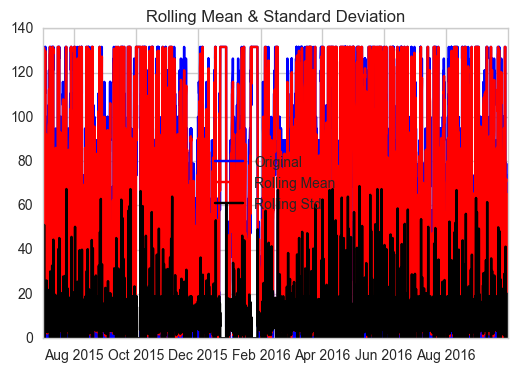

Results of Dickey-Fuller Test:
Test Statistic                   -28.408636
p-value                            0.000000
#Lags Used                        28.000000
Number of Observations Used    50807.000000
Critical Value (5%)               -2.861597
Critical Value (1%)               -3.430479
Critical Value (10%)              -2.566800
dtype: float64


In [168]:
test_stationarity(reduced_31116_series)

In [172]:
# Since the test statistic is less than any of the critical values
# we can reject the null and assume this time series is stationary?

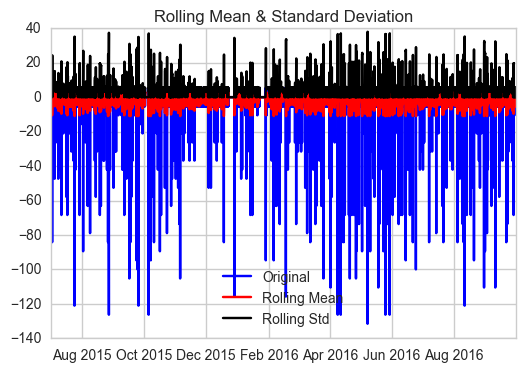

Results of Dickey-Fuller Test:
Test Statistic                   -40.279677
p-value                            0.000000
#Lags Used                        57.000000
Number of Observations Used    50777.000000
Critical Value (5%)               -2.861597
Critical Value (1%)               -3.430479
Critical Value (10%)              -2.566800
dtype: float64


In [208]:
reduced_31116_series_diff = reduced_31116_series - reduced_31116_series.shift()
reduced_31116_series_diff.dropna(inplace=True)
test_stationarity(reduced_31116_series_diff)

In [201]:
# Since the test statistic is now even less than any of the critical values
# we can reject the null and assume this time series is even more stationary?

In [202]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [209]:
lag_acf = acf(reduced_31116_series_diff, nlags=20)
lag_pacf = pacf(reduced_31116_series_diff, nlags=20, method='ols')

(-0.05, 0.05)

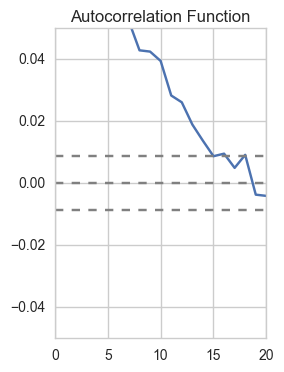

In [216]:
# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(reduced_31116_series_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(reduced_31116_series_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.ylim(-.05, .05)

(-0.05, 0.05)

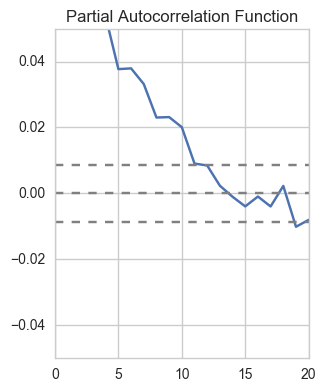

In [211]:
# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(reduced_31116_series_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(reduced_31116_series_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.ylim(-.05, .05)

In [181]:
# Load the ARIMA model
from statsmodels.tsa.arima_model import ARIMA

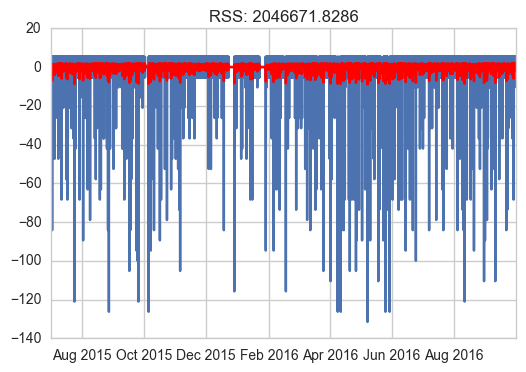

In [213]:
# AR Model
model = ARIMA(reduced_31116_series, order=(11, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(reduced_31116_series_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-reduced_31116_series_diff)**2))

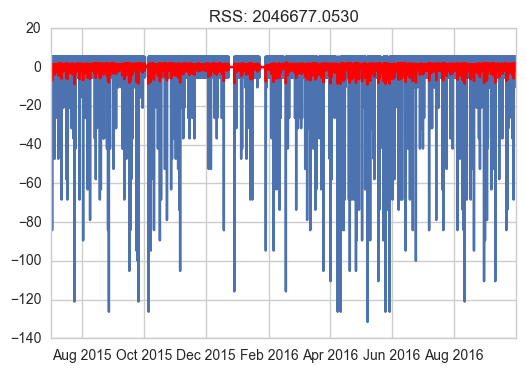

In [214]:
# MA Model
model = ARIMA(reduced_31116_series, order=(0, 1, 15))  
results_MA = model.fit(disp=-1)  
plt.plot(reduced_31116_series_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-reduced_31116_series_diff)**2))

In [217]:
# Combined Model
model = ARIMA(reduced_31116_series, order=(11, 1, 15))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(reduced_31116_series_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-reduced_31116_series_diff)**2))

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.